#Codigo de Daiana Gareis, Uruguay Secundaria 2023

In [1]:
suppressPackageStartupMessages({
library(dplyr)
library(readr)
library(readxl)
library('stringr')
library(ggplot2)
library(scales)
library(ggradar)
library(psych)
library(tidyr)
library(corrplot)
library(ppcor)
library(ggcorrplot)
library(plotly)
library(htmlwidgets)
library(stats)
library(car)
library(pwr)
library(reshape2)
library(carData)  
library("DescTools")
library(rstatix) 
library(scales)
library(ggradar)
library("aplpack")
library('DMwR2') 
library("MASS")
library("lattice")
library("grid")
library(scatterplot3d) 
library(GGally)
})
ruta_guardado <- "C:/Users/HP/Desktop/DAIA/EPLOTACIONDEDATOSMULTIVARIADOS/URUGUAY.csv"
# Lee el archivo CSV con read_csv()
URUGUAY <- read.csv(ruta_guardado)

ruta_archivo <- "C:/Users/HP/Desktop/DAIA/EPLOTACIONDEDATOSMULTIVARIADOS/secundaria 2023.xlsx"
SECUNDARIA <- read_excel(ruta_archivo)

ruta_archivo <- "C:/Users/HP/Desktop/DAIA/EPLOTACIONDEDATOSMULTIVARIADOS/secundaria por departamentos 2023.xlsx"
sec_por_dep <- read_excel(ruta_archivo)

ruta_archivo_2 <- "C:/Users/HP/Desktop/DAIA/EPLOTACIONDEDATOSMULTIVARIADOS/NOTAS_SEC.csv"


ruta_archivo_3 <- "C:/Users/HP/Desktop/DAIA/EPLOTACIONDEDATOSMULTIVARIADOS/NOTAS_SEC_ASIGNATURASMODIF.csv"

# Función para calcular la frecuencia
Calcular_frecuencias <- function(DF, columna) { # Esta función calcula la frecuencia de datos
  resultado <- DF %>% group_by({{ columna }}) %>% 
    summarise(Frecuencia = n()) %>% # Con summarise sumo las frecuencias y le cambio el nombre a la columna, de n a Frecuencia
    arrange(Frecuencia) # Ordeno los datos de menor a 
  return(resultado)
}

# Suprimir los mensajes de carga del paquete dplyr
suppressPackageStartupMessages(library(dplyr))

# Ver las primeras filas del dataframe URUGUAY
head(URUGUAY)
columnas <- names(URUGUAY)
print(columnas)

New names:
* `` -> `...1`
* `` -> `...2`
* `` -> `...3`
* `` -> `...4`
* `` -> `...5`
* `` -> `...7`
* `` -> `...8`
* `` -> `...10`
* `` -> `...11`
* `` -> `...12`
* `` -> `...13`
* `` -> `...14`


X CUE     departamento localidad CodigoPostal EsPrivada turno  curso     
1 1 9004536 URUGUAY      URUGUAY   3260         S         MAÑANA 2 - B Prim
2 2 9004536 URUGUAY      URUGUAY   3260         S         MAÑANA 2 - B Prim
3 3 9004536 URUGUAY      URUGUAY   3260         S         MAÑANA 2 - B Prim
4 4 9004536 URUGUAY      URUGUAY   3260         S         MAÑANA 2 - B Prim
5 5 9004536 URUGUAY      URUGUAY   3260         S         MAÑANA 2 - B Prim
6 6 9004536 URUGUAY      URUGUAY   3260         S         MAÑANA 2 - B Prim
  periodoEvaluatorio idalumno ... idDivision NivelEnsenanza orden
1 Primer Trimestre   893891   ... 104508     PRIMARIO       1    
2 Primer Trimestre   893891   ... 104508     PRIMARIO       1    
3 Primer Trimestre   893891   ... 104508     PRIMARIO       1    
4 Primer Trimestre   893891   ... 104508     PRIMARIO       1    
5 Primer Trimestre   893891   ... 104508     PRIMARIO       1    
6 Primer Trimestre   893891   ... 104508     PRIMARIO       1    
  idOrganizaciones ddivision Nivel esMultianio IdModEnsenanza Modalidad
1 1347             104508    2     N           5              Primaria 
2 1347             104508    2     N           5              Primaria 
3 1347             104508    2     N           5              Primaria 
4 1347             104508    2     N           5              Primaria 
5 1347             104508    2     N           5              Primaria 
6 1347             104508    2     N           5              Primaria 
  ModEnsenaza
1 Comun      
2 Comun      
3 Comun      
4 Comun      
5 Comun      
6 Comun

 [1] "X"                  "CUE"                "departamento"      
 [4] "localidad"          "CodigoPostal"       "EsPrivada"         
 [7] "turno"              "curso"              "periodoEvaluatorio"
[10] "idalumno"           "Documento"          "anioLectivo"       
[13] "asignatura"         "nota"               "observaciones"     
[16] "idSubOrganizacion"  "idDivision"         "NivelEnsenanza"    
[19] "orden"              "idOrganizaciones"   "ddivision"         
[22] "Nivel"              "esMultianio"        "IdModEnsenanza"    
[25] "Modalidad"          "ModEnsenaza"       


In [2]:
# Cambiar los nombres de las variables
URUGUAY_RENOMBRADOS <- URUGUAY %>%
  rename(
    Departamento = departamento,
    Curso = curso,
    PeriodoEvaluatorio = periodoEvaluatorio,
    IdAlumno = idalumno,
    División = ddivision,
    Multianio = esMultianio,
    ModEnsenianza = ModEnsenaza # Corregido
  )

In [3]:
dim(URUGUAY_RENOMBRADOS)
Uruguay1 <- select(URUGUAY_RENOMBRADOS, -observaciones) #se elimina columna observaciones

dim(Uruguay1)

URUGUAY_NA<-na.omit(Uruguay1) 
dim(URUGUAY_NA)
URUGUAY_NA <- subset(URUGUAY_NA, !grepl("EPAC|NULL|PA|PD", nota)) #se elimina valores nulos de nota"

print(unique(URUGUAY_NA$nota))
print(unique(URUGUAY_NA$Modalidad))

[1] 727721     26

[1] 727721     25

[1] 727456     25

 [1] "8"  "9"  "6"  "7"  "10" "5"  "4"  "3"  "2"  "1" 
[1] "Primaria"          "Inicial"           "NULL"             
[4] "Secundaria"        "Primaria 3 ciclos" "Secundaria 3 años"


In [4]:
datos_sin_repeticiones <- unique(URUGUAY_NA$CUE)

cantidad_datos_unicos <- length(unique(URUGUAY_NA$CUE))
print(cantidad_datos_unicos)

[1] 144


In [5]:

# Filtrar el dataset URUGUAY usando las condiciones mencionadas
URUGUAY_SECUNDARIA<- filter(URUGUAY_NA,
                           Modalidad == "Secundaria", # Agrega el operador de comparación ==
                           ModEnsenianza %in% c("Comun", "Agrotécnica", "Técnica", "EGB3") &
                           Multianio == "N" & 
                           anioLectivo=="2023" & 
                           NivelEnsenanza == "SECUNDARIO")


In [6]:


#Matricula Total
Matriculas_uruguay <- filter(sec_por_dep, ...1 == "URUGUAY")

Matriculas_uruguay_FIX <- Matriculas_uruguay %>%
  rename(
    Primero = `Ciclo Básico`,
    Segundo = `...7`,
    Tercero = `...8`,
    Cuarto = `Orientado`,
    Quinto = `...10`,
    Sexto = `...11`,
    Séptimo = `...12`
  )

#Limpieza
columnas <- c("Primero", "Segundo", "Tercero", "Cuarto", "Quinto", "Sexto", "Séptimo")
for (x in columnas) {
  Matriculas_uruguay_FIX[[x]] <- gsub(",", "", Matriculas_uruguay_FIX[[x]]) #Les saco la , si es que tienen
  Matriculas_uruguay_FIX[[x]] <- as.integer(Matriculas_uruguay_FIX[[x]])} #Los paso a INT

print(Matriculas_uruguay_FIX)

for (x in columnas) {
  total_primero <- sum(Matriculas_uruguay_FIX[[x]], na.rm = TRUE)
  print(paste(x, total_primero))
}

# A tibble: 10 x 14
   ...1    ...2    ...3  ...4  ...5  Primero Segundo Tercero Cuarto Quinto Sexto
   <chr>   <chr>   <chr> <chr> <chr>   <int>   <int>   <int>  <int>  <int> <int>
 1 URUGUAY Estatal Urba~ AGRO  243.0      50      53      37     41     25    14
 2 URUGUAY Estatal Urba~ ORIE~ 4503~     858     973     846    716    620   490
 3 URUGUAY Estatal Urba~ TECN~ 1607~     294     320     249    258    171   152
 4 URUGUAY Estatal Rura~ AGRO  58.0       18      16      17      1      5     1
 5 URUGUAY Estatal Rura~ ORIE~ 940.0     220     181     156    134    138   111
 6 URUGUAY Estatal Rura~ TECN~ 101.0      13      22      25     18     17     6
 7 URUGUAY Estatal Rura~ ORIE~ 314.0      54      64      57     55     41    43
 8 URUGUAY Privado Urba~ ORIE~ 2240~     405     362     367    379    375   352
 9 URUGUAY Privado Rura~ AGRO  125.0      33      28      12     13     15    13
10 URUGUAY Privado Rura~ ORIE~ 142.0      27      31      24     21     18    21
# i 3 mo

In [7]:
PrimerT<-filter(URUGUAY_SECUNDARIA, PeriodoEvaluatorio=="Primer Trimestre")
names(PrimerT)
PrimerT<-rename(PrimerT,NotasPrimerT=nota)

[1] "X"                  "CUE"                "Departamento"      
 [4] "localidad"          "CodigoPostal"       "EsPrivada"         
 [7] "turno"              "Curso"              "PeriodoEvaluatorio"
[10] "IdAlumno"           "Documento"          "anioLectivo"       
[13] "asignatura"         "nota"               "idSubOrganizacion" 
[16] "idDivision"         "NivelEnsenanza"     "orden"             
[19] "idOrganizaciones"   "División"           "Nivel"             
[22] "Multianio"          "IdModEnsenanza"     "Modalidad"         
[25] "ModEnsenianza"

In [8]:
SegundoT<-filter(URUGUAY_SECUNDARIA,PeriodoEvaluatorio=="Segundo Trimestre")
SegundoT<-rename(SegundoT,NotasSegundoT=nota)
dim(SegundoT)

[1] 100532     25

In [9]:
prueba<-merge(x = PrimerT, y = SegundoT, by = c("Documento", "asignatura"))
dim(prueba)

[1] 112489     48

In [10]:
TercerT<-filter(URUGUAY_SECUNDARIA,PeriodoEvaluatorio=="Tercer Trimestre")
TercerT<-rename(TercerT,NotasTercerT=nota)
dim(TercerT)

[1] 97038    25

In [11]:
prueba1<-merge(x = prueba, y = TercerT, by = c("Documento", "asignatura"))
dim(prueba1)

[1] 143125     71

In [12]:
URUGUAY_NOTAS_SEC<-select(prueba1, 'CUE', 'Departamento', 'EsPrivada', 'turno' , 'Curso' , 'Documento', 'asignatura','IdAlumno', 'idDivision', 'NivelEnsenanza', 'Multianio', 'IdModEnsenanza', 'Modalidad', 'ModEnsenianza','NotasPrimerT','NotasSegundoT', 'NotasTercerT', 'ModEnsenianza')
dim(URUGUAY_NOTAS_SEC)


[1] 143125     17

In [13]:
table(URUGUAY_NOTAS_SEC$Curso)


              1 - 1 CB RCBCET               1 - 1 CB RCBEAT 
                          837                           321 
                    1 - 1 CBC                  1 - 1 RCBCET 
                           80                           286 
                 1 - 1 RCBEAT               1 - 2 CB RCBCET 
                          325                           507 
                    1 - 2 CBC                  1 - 2 RCBEAT 
                          223                           209 
              1 - 3 CB RCBCET                  1 - 3 RCBEAT 
                          338                           210 
              1 - 4 CB RCBCET               1 - 5 CB RCBCET 
                          208                           240 
              1 - 6 CB RCBCET                  1 - 7 RCBCET 
                          241                           391 
                  1 - A 4000E               1 - A ANEXO CBC 
                          236                            28 
                    1 -

In [14]:
library('stringr')

URUGUAY_NOTAS_SEC$Curso<-as.character(URUGUAY_NOTAS_SEC$Curso)
URUGUAY_NOTAS_SEC$Año_cursado<-str_sub(URUGUAY_NOTAS_SEC$Curso,1, 1)
print(head(URUGUAY_NOTAS_SEC$Año_cursado),2)
table(URUGUAY_NOTAS_SEC$Año_cursado)

[1] "2" "2" "2" "2" "2" "2"



    1     2     3     4     5     6     7 
22323 29927 22570 27052 19763 18473  3017 

In [15]:
URUGUAY_NOTAS_SEC$Año_cursado <- str_replace (URUGUAY_NOTAS_SEC$Año_cursado, "1" , "PRIMERO")
URUGUAY_NOTAS_SEC$Año_cursado <- str_replace (URUGUAY_NOTAS_SEC$Año_cursado, "2" , "SEGUNDO")
URUGUAY_NOTAS_SEC$Año_cursado <- str_replace (URUGUAY_NOTAS_SEC$Año_cursado, "3" , "TERCERO")
URUGUAY_NOTAS_SEC$Año_cursado <- str_replace (URUGUAY_NOTAS_SEC$Año_cursado, "4" , "CUARTO")
URUGUAY_NOTAS_SEC$Año_cursado <- str_replace (URUGUAY_NOTAS_SEC$Año_cursado, "5" , "QUINTO")
URUGUAY_NOTAS_SEC$Año_cursado <- str_replace (URUGUAY_NOTAS_SEC$Año_cursado, "6" , "SEXTO")
URUGUAY_NOTAS_SEC$Año_cursado <- str_replace (URUGUAY_NOTAS_SEC$Año_cursado, "7" , "SEPTIMO")

In [16]:
URUGUAY_NOTAS_SEC$Promedio<-round((as.numeric(URUGUAY_NOTAS_SEC$NotasPrimerT)+as.numeric(URUGUAY_NOTAS_SEC$NotasSegundoT)+as.numeric(URUGUAY_NOTAS_SEC$NotasTercerT))/3,2)
URUGUAY_NOTAS_SEC<- unique(URUGUAY_NOTAS_SEC)
URUGUAY_NOTAS_SEC

CUE     Departamento EsPrivada turno      Curso           Documento
1      9009048 URUGUAY      N         MAÑANA     2 - 1 CB RCBEAT 162757350
2      9009048 URUGUAY      N         MAÑANA     2 - 1 CB RCBEAT 162757350
3      9009048 URUGUAY      N         MAÑANA     2 - 1 CB RCBEAT 162757350
4      9009048 URUGUAY      N         MAÑANA     2 - 1 CB RCBEAT 162757350
5      9009048 URUGUAY      N         MAÑANA     2 - 1 CB RCBEAT 162757350
6      9009048 URUGUAY      N         MAÑANA     2 - 1 CB RCBEAT 162757350
7      9009048 URUGUAY      N         MAÑANA     2 - 1 CB RCBEAT 162757350
8      9009048 URUGUAY      N         MAÑANA     2 - 1 CB RCBEAT 162757350
9      9009048 URUGUAY      N         MAÑANA     2 - 1 CB RCBEAT 162757350
10     9009048 URUGUAY      N         MAÑANA     2 - 1 CB RCBEAT 162757350
11     9009048 URUGUAY      N         MAÑANA     2 - 1 CB RCBEAT 162757350
12     9009048 URUGUAY      N         MAÑANA     2 - 1 CB RCBEAT 162757350
13     9009048 URUGUAY      N         MAÑANA     2 - 1 CB RCBEAT 162757350
14     9009048 URUGUAY      N         MAÑANA     2 - 1 CB RCBEAT 162757350
15     9009048 URUGUAY      N         MAÑANA     2 - 1 CB RCBEAT 162757350
16     9009150 URUGUAY      N         NOCHE      2 - A 4000E      18842177
17     9009150 URUGUAY      N         NOCHE      2 - A 4000E      18842177
18     9003834 URUGUAY      N         VESPERTINO 3 - B CBC        19094454
19     9003834 URUGUAY      N         VESPERTINO 3 - B CBC        19094454
20     9003834 URUGUAY      N         VESPERTINO 3 - B CBC        19094454
21     9003834 URUGUAY      N         VESPERTINO 3 - B CBC        19094454
22     9003834 URUGUAY      N         VESPERTINO 3 - B CBC        19094454
23     9003834 URUGUAY      N         VESPERTINO 3 - B CBC        19094454
24     9003834 URUGUAY      N         VESPERTINO 3 - B CBC        19094454
25     9003834 URUGUAY      N         VESPERTINO 3 - B CBC        19094454
26     9003834 URUGUAY      N         VESPERTINO 3 - B CBC        19094454
27     9003834 URUGUAY      N         VESPERTINO 3 - B CBC        19094454
28     9003834 URUGUAY      N         VESPERTINO 3 - B CBC        19094454
29     9009150 URUGUAY      N         NOCHE      1 - A 4000E      20367825
30     9009150 URUGUAY      N         NOCHE      1 - A 4000E      20367825
...    ...     ...          ...       ...        ...             ...      
143096 9003342 URUGUAY      N         MAÑANA     5 - 3 3322S     96162043 
143097 9003342 URUGUAY      N         MAÑANA     5 - 3 3322S     96162043 
143098 9003342 URUGUAY      N         MAÑANA     5 - 3 3322S     96162043 
143099 9003342 URUGUAY      N         MAÑANA     5 - 3 3322S     96162043 
143100 9004542 URUGUAY      S         MAÑANA     6 - A 3322N     96189429 
143101 9004542 URUGUAY      S         MAÑANA     6 - A 3322N     96189429 
143102 9004542 URUGUAY      S         MAÑANA     6 - A 3322N     96189429 
143103 9004542 URUGUAY      S         MAÑANA     6 - A 3322N     96189429 
143104 9004542 URUGUAY      S         MAÑANA     6 - A 3322N     96189429 
143105 9004542 URUGUAY      S         MAÑANA     6 - A 3322N     96189429 
143106 9004542 URUGUAY      S         MAÑANA     6 - A 3322N     96189429 
143107 9004542 URUGUAY      S         MAÑANA     6 - A 3322N     96189429 
143108 9004542 URUGUAY      S         MAÑANA     6 - A 3322N     96189429 
143109 9004542 URUGUAY      S         MAÑANA     6 - A 3322N     96189429 
143110 9004542 URUGUAY      S         MAÑANA     6 - A 3322N     96189429 
143111 9004542 URUGUAY      S         MAÑANA     6 - A 3322N     96189429 
143112 9004542 URUGUAY      S         MAÑANA     6 - A 3322N     96189429 
143113 9004542 URUGUAY      S         MAÑANA     6 - A 3322N     96189429 
143114 9003342 URUGUAY      N         TARDE      3 - B CBC       96213905 
143115 9003342 URUGUAY      N         TARDE      3 - B CBC       96213905 
143116 9003342 URUGUAY      N         TARDE      3 - B CBC       96213905 
143117 9003342 URUGUAY      N   

In [17]:
table(URUGUAY_NOTAS_SEC$asignatura)
unique(URUGUAY_NOTAS_SEC$asignatura)


                                     ANALISIS MATEMATICO 
                                                      68 
                                          ARQUITECTURA I 
                                                      21 
                                         ARQUITECTURA II 
                                                       8 
                                          ARTES VISUALES 
                                                    4463 
                                                BIOLOGIA 
                                                    4573 
                                             BIOLOGIA II 
                                                      13 
                                              CATEQUESIS 
                                                     148 
                   CENTRALES Y CANALIZACIONES ELECTRICAS 
                                                      24 
                                  CEREALES Y OLEAGINOSAS 
             

[1] "ARTES VISUALES"                                          
  [2] "CIENCIAS NATURALES BIOLOGIA"                             
  [3] "CIENCIAS NATURALES FISICA  QUIMICA"                      
  [4] "CIENCIAS SOCIALES (GEOGRAFIA)"                           
  [5] "CIENCIAS SOCIALES (HISTORIA)"                            
  [6] "DIBUJO TECNICO"                                          
  [7] "EDUCACION FISICA"                                        
  [8] "EDUCACION TECNOLOGICA"                                   
  [9] "FORMACION ETICA Y CIUDADANA"                             
 [10] "LENGUA EXTRANJERA"                                       
 [11] "LENGUA Y LITERATURA"                                     
 [12] "MATEMATICA"                                              
 [13] "MUSICA"                                                  
 [14] "SECTOR DE TECNOLOGIAS ESPECIFICAS"                       
 [15] "STE PRODUCCION VEGETAL"                                  
 [16] "PRINCIPIOS BASICOS DE CONTABILIDAD"                      
 [17] "BIOLOGIA"                                                
 [18] "FISICA Y QUIMICA"                                        
 [19] "GEOGRAFIA"                                               
 [20] "HISTORIA"                                                
 [21] "LENGUAS EXTRANJERAS"                                     
 [22] "ECONOMIA"                                                
 [23] "INTRODUCCION A LA ADMINISTRACION"                        
 [24] "TUTORIAS"                                                
 [25] "MICROECONOMIA"                                           
 [26] "QUIMICA"                                                 
 [27] "TEORIA Y GESTION DE LAS ORGANIZACIONES I"                
 [28] "ARQUITECTURA I"                                          
 [29] "ESTATICA Y RESISTENCIA DE MATERIALES"                    
 [30] "LENGUA EXTRANJERA (INGLES)"                              
 [31] "MATERIALES DE CONSTRUCCION"                              
 [32] "PROYECTO DE PRACTICAS PROFESIONALIZANTES"                
 [33] "TRABAJOS PRACTICOS DE LA ESPECIALIDAD"                   
 [34] "COMPUTOS Y PRESUPUESTOS"                                 
 [35] "INSTALACIONES ELECTROMECANICAS"                          
 [36] "INSTALACIONES TERMICAS"                                  
 [37] "OBRAS SANITARIAS"                                        
 [38] "PROYECTO FINAL"                                          
 [39] "VISITA DE OBRAS"                                         
 [40] "ANALISIS MATEMATICO"                                     
 [41] "HORMIGON"                                                
 [42] "LEGISLACION VIAL"                                        
 [43] "MAQUINAS VIALES"                                         
 [44] "PAVIMENTOS FLEXIBLE Y DE HORMIGON"                       
 [45] "TALLER DE PRACTICA TOPOGRAFICA III"                      
 [46] "TALLER ESTRUCTURAS DE HORMIGON"                          
 [47] "TALLER VISITA DE OBRAS II"                               
 [48] "DERECHO COMERCIAL"                                       
 [49] "LEGISLACION LABORAL Y PRACTICA IMPOSITIVA"               
 [50] "MACROECONOMIA"                                           
 [51] "PSICOLOGIA"                                              
 [52] "SISTEMA DE INFORMACION CONTABLE"                         
 [53] "TECNOLOGIA DE LA INFORMACION Y LA COMUNICACION"          
 [54] "TEORIA Y GESTION DE LAS ORGANIZACIONES II"               
 [55] "ARQUITECTURA II"                                         
 [56] "CONSTRUCCIONES DE HORMIGON ARMADO"                       
 [57] "LEGISLACION DE LA CONSTRUCCION"                          
 [58] "PROYECTO I"                                              
 [59] "TOPOGRAFIA"                                              
 [60] "FISICA"                                                  
 [61] "DIBUJO TOPOGRAFICO I"                                    
 [62] "ESTATICA GRAFICA"             

In [18]:
URUGUAY_NOTAS_SEC$curso<-as.character(URUGUAY_NOTAS_SEC$Curso)
URUGUAY_NOTAS_SEC$Año_cursado<-str_sub(URUGUAY_NOTAS_SEC$Curso,1, 1)
print(head(URUGUAY_NOTAS_SEC$Año_cursado),2)
table(URUGUAY_NOTAS_SEC$Año_cursado)

[1] "2" "2" "2" "2" "2" "2"



    1     2     3     4     5     6     7 
15438 16852 14026 14742 12759 10311  1316 

In [19]:
for (numero in 1:7) {
  notas_año <- filter(URUGUAY_NOTAS_SEC, Año_cursado == numero)
  nota_mate <- notas_año %>% filter(asignatura == "MATEMATICA")
  dimensiones <- dim(nota_mate)
  cat("\n","Año de cursado:", numero,"\n")
  cat("Número de filas:", dimensiones[1])
}


 Año de cursado: 1 
Número de filas: 1212
 Año de cursado: 2 
Número de filas: 1342
 Año de cursado: 3 
Número de filas: 1118
 Año de cursado: 4 
Número de filas: 1095
 Año de cursado: 5 
Número de filas: 830
 Año de cursado: 6 
Número de filas: 673
 Año de cursado: 7 
Número de filas: 36

In [20]:
URUGUAY_NOTAS_SEC <- URUGUAY_NOTAS_SEC %>% 
  mutate(Resultado = case_when(
    Promedio >= 6 ~ "Aprobado",
    Promedio < 6 ~ "Rinde",
    NotasTercerT >= 6 ~ "Aprobado",
    NotasTercerT < 6 ~ "Rinde"  
  ))

In [21]:
URUGUAY_NOTAS_SEC<-select(URUGUAY_NOTAS_SEC, 'CUE', 'Departamento', 'EsPrivada', 'turno' ,'Documento', 'asignatura','IdAlumno', 'idDivision', 'NivelEnsenanza', 'Multianio', 'IdModEnsenanza','NotasPrimerT','NotasSegundoT', 'NotasTercerT', 'Promedio', 'Resultado', 'Año_cursado','ModEnsenianza')
dim(URUGUAY_NOTAS_SEC)
head(URUGUAY_NOTAS_SEC)

[1] 85444    18

CUE     Departamento EsPrivada turno  Documento
1 9009048 URUGUAY      N         MAÑANA 162757350
2 9009048 URUGUAY      N         MAÑANA 162757350
3 9009048 URUGUAY      N         MAÑANA 162757350
4 9009048 URUGUAY      N         MAÑANA 162757350
5 9009048 URUGUAY      N         MAÑANA 162757350
6 9009048 URUGUAY      N         MAÑANA 162757350
  asignatura                         IdAlumno idDivision NivelEnsenanza
1 ARTES VISUALES                     1154947  115656     SECUNDARIO    
2 CIENCIAS NATURALES BIOLOGIA        1154947  115656     SECUNDARIO    
3 CIENCIAS NATURALES FISICA  QUIMICA 1154947  115656     SECUNDARIO    
4 CIENCIAS SOCIALES (GEOGRAFIA)      1154947  115656     SECUNDARIO    
5 CIENCIAS SOCIALES (HISTORIA)       1154947  115656     SECUNDARIO    
6 DIBUJO TECNICO                     1154947  115656     SECUNDARIO    
  Multianio IdModEnsenanza NotasPrimerT NotasSegundoT NotasTercerT Promedio
1 N         8              9            10            10           9.67    
2 N         8              7            5             5            5.67    
3 N         8              7            8             7            7.33    
4 N         8              6            7             10           7.67    
5 N         8              8            8             9            8.33    
6 N         8              7            8             7            7.33    
  Resultado Año_cursado ModEnsenianza
1 Aprobado  2           Agrotécnica  
2 Rinde     2           Agrotécnica  
3 Aprobado  2           Agrotécnica  
4 Aprobado  2           Agrotécnica  
5 Aprobado  2           Agrotécnica  
6 Aprobado  2           Agrotécnica

In [22]:

# Escribe el data frame en el archivo CSV
write_csv(URUGUAY_NOTAS_SEC, ruta_archivo_2) 

In [23]:

SEC_NOTAS <- read.csv(ruta_archivo_2, fileEncoding = "UTF-8")

SEC_NOTAS $asignatura <- toupper(SEC_NOTAS $asignatura)

In [24]:
variables <- grep("EDU|edu|Edu", SEC_NOTAS$asignatura, value = TRUE)
print(unique(variables))

 [1] "EDUCACION FISICA"                               
 [2] "EDUCACION TECNOLOGICA"                          
 [3] "PRACTICAS EDUCATIVAS"                           
 [4] "EDUCACIÓN EN VALORES"                           
 [5] "COMUNICACION, EDUCACION Y NUEVAS TECNOLOGIAS"   
 [6] "PROBLEMATICAS CONTEMPORANEAS Y EDUCACION FISICA"
 [7] "EDUCACIÓN SEXUAL INTEGRAL"                      
 [8] "PROYECTO EDUCACION INTEGRAL DE LA SEXUALIDAD"   
 [9] "PROYECTO PRODUCCION DE MATERIALES EDUCATIVOS"   
[10] "PROYECTO EDUCACION EMOCIONAL"                   


In [25]:
SEC_NOTAS$asignatura <- str_replace(SEC_NOTAS$asignatura, "COMUNICACION, EDUCACION Y NUEVAS TECNOLOGIAS", "EDUCACION TECNOLOGICA")
variables <- grep("EDU|edu|Edu", SEC_NOTAS$asignatura, value = TRUE)
print(unique(variables))


[1] "EDUCACION FISICA"                               
[2] "EDUCACION TECNOLOGICA"                          
[3] "PRACTICAS EDUCATIVAS"                           
[4] "EDUCACIÓN EN VALORES"                           
[5] "PROBLEMATICAS CONTEMPORANEAS Y EDUCACION FISICA"
[6] "EDUCACIÓN SEXUAL INTEGRAL"                      
[7] "PROYECTO EDUCACION INTEGRAL DE LA SEXUALIDAD"   
[8] "PROYECTO PRODUCCION DE MATERIALES EDUCATIVOS"   
[9] "PROYECTO EDUCACION EMOCIONAL"                   


In [26]:
SEC_NOTAS$asignatura <- str_replace(SEC_NOTAS$asignatura, "LENGUA EXTRANJERA (INGLES)", "INGLES")
SEC_NOTAS$asignatura <- str_replace(SEC_NOTAS$asignatura, "LENGUA EXTRANJERA III (INGLES)", "INGLES")
SEC_NOTAS$asignatura <- str_replace(SEC_NOTAS$asignatura, ".*EXTRANJERA*.", "INGLES")
variables <- grep("EXT|ext|Ext", SEC_NOTAS$asignatura, value = TRUE)
print(unique(variables))

character(0)


In [27]:
variables <- grep("LENG|leng|Leng", SEC_NOTAS$asignatura, value = TRUE)
print(unique(variables))

[1] "LENGUA Y LITERATURA"                             
[2] "LENGUAJE Y PRODUCCION MUSICAL II"                
[3] "LENGUAJE Y PRODUCCION VISUAL II"                 
[4] "PRODUCCION MULTIMEDIAL EN LENGUAJES ARTISTICOS I"
[5] "LENGUAJE Y PRODUCCION MUSICAL I"                 
[6] "LENGUAJE Y PRODUCCION VISUAL I"                  
[7] "LENGUAJE CORPORAL Y DANZA"                       
[8] "LENGUA Y LITERATURA II"                          


In [28]:
SEC_NOTAS$asignatura <- str_replace(SEC_NOTAS$asignatura, "LENGUA Y LITERATURA", "LENGUA")
SEC_NOTAS$asignatura <- str_replace(SEC_NOTAS$asignatura, "LENGUA Y LITERATURA II", "LENGUA")
SEC_NOTAS$asignatura <- str_replace(SEC_NOTAS$asignatura, "LENGUA II", "LENGUA")
variables <- grep("LENG|leng|Leng", SEC_NOTAS$asignatura, value = TRUE)
print(unique(variables))

[1] "LENGUA"                                          
[2] "LENGUAJE Y PRODUCCION MUSICAL II"                
[3] "LENGUAJE Y PRODUCCION VISUAL II"                 
[4] "PRODUCCION MULTIMEDIAL EN LENGUAJES ARTISTICOS I"
[5] "LENGUAJE Y PRODUCCION MUSICAL I"                 
[6] "LENGUAJE Y PRODUCCION VISUAL I"                  
[7] "LENGUAJE CORPORAL Y DANZA"                       


In [29]:
variables <- grep("LIT|lit|Lit", SEC_NOTAS$asignatura, value = TRUE)
print(unique(variables))

[1] "LITERATURA ARGENTINA"       "LITERATURA LATINOAMERICANA"


In [30]:
SEC_NOTAS$asignatura <- str_replace(SEC_NOTAS$asignatura, "LITERATURA ARGENTINA", "LENGUA")
SEC_NOTAS$asignatura <- str_replace(SEC_NOTAS$asignatura, "LITERATURA LATINOAMERICANA", "LENGUA")
variables <- grep("LIT|lit|Lit", SEC_NOTAS$asignatura, value = TRUE)
print(unique(variables))

character(0)


In [31]:
variables <- grep("MAT|mat|Mat", SEC_NOTAS$asignatura, value = TRUE)
print(unique(variables))

 [1] "MATEMATICA"                                     
 [2] "ESTATICA Y RESISTENCIA DE MATERIALES"           
 [3] "MATERIALES DE CONSTRUCCION"                     
 [4] "ANALISIS MATEMATICO"                            
 [5] "TALLER DE INFORMATICA"                          
 [6] "TECNOLOGIA DE LA COMUNICACION Y LA INFORMATICA" 
 [7] "EDI: MATEMATICA"                                
 [8] "TECNOLOGIA DE LOS MATERIALES"                   
 [9] "PROBLEMATICAS CONTEMPORANEAS Y EDUCACION FISICA"
[10] "MATEMATICA APLICADA"                            
[11] "PROYECTO PRODUCCION DE MATERIALES EDUCATIVOS"   
[12] "MATEMATICA II"                                  


In [32]:
SEC_NOTAS$asignatura <- str_replace(SEC_NOTAS$asignatura, "MATEMATICA APLICADA", "MATEMATICA")
SEC_NOTAS$asignatura <- str_replace(SEC_NOTAS$asignatura, "EDI: MATEMATICA", "MATEMATICA")
SEC_NOTAS$asignatura <- str_replace(SEC_NOTAS$asignatura, "ANALISIS MATEMATICO", "MATEMATICA")
SEC_NOTAS$asignatura <- str_replace(SEC_NOTAS$asignatura, "MATEMATICA II", "MATEMATICA")
variables <- grep("MAT|mat|Mat", SEC_NOTAS$asignatura, value = TRUE)
print(unique(variables))

[1] "MATEMATICA"                                     
[2] "ESTATICA Y RESISTENCIA DE MATERIALES"           
[3] "MATERIALES DE CONSTRUCCION"                     
[4] "TALLER DE INFORMATICA"                          
[5] "TECNOLOGIA DE LA COMUNICACION Y LA INFORMATICA" 
[6] "TECNOLOGIA DE LOS MATERIALES"                   
[7] "PROBLEMATICAS CONTEMPORANEAS Y EDUCACION FISICA"
[8] "PROYECTO PRODUCCION DE MATERIALES EDUCATIVOS"   


In [33]:
variables <- grep("BIO|bio|Bio", SEC_NOTAS$asignatura, value = TRUE)
print(unique(variables))

[1] "CIENCIAS NATURALES BIOLOGIA"   "BIOLOGIA"                     
[3] "CIENCIAS NATURALES (BIOLOGIA)" "EDI: BIOLOGIA"                
[5] "BIOLOGIA II"                  


In [34]:
SEC_NOTAS$asignatura <- str_replace(SEC_NOTAS$asignatura, "BIOLOGIA II", "BIOLOGIA")
SEC_NOTAS$asignatura <- str_replace(SEC_NOTAS$asignatura, "CIENCIAS NATURALES BIOLOGIA", "BIOLOGIA")
SEC_NOTAS$asignatura <- str_replace_all(SEC_NOTAS$asignatura, ".*BIOLOGIA*.", "BIOLOGIA")
variables <- grep("BIO|bio|Bio", SEC_NOTAS$asignatura, value = TRUE)
print(unique(variables))

[1] "BIOLOGIA"


In [35]:
variables <- grep("GEO|geo|Geo", SEC_NOTAS$asignatura, value = TRUE)
print(unique(variables))

[1] "CIENCIAS SOCIALES (GEOGRAFIA)" "GEOGRAFIA"                    
[3] "GEOGRAFIA AMBIENTAL"           "GEOGRAFIA I"                  


In [36]:
SEC_NOTAS$asignatura <- str_replace(SEC_NOTAS$asignatura, "GEOGRAFIA I", "GEOGRAFIA")
SEC_NOTAS$asignatura <- str_replace(SEC_NOTAS$asignatura, "GEOGRAFIA AMBIENTAL", "GEOGRAFIA")
SEC_NOTAS$asignatura <- str_replace_all(SEC_NOTAS$asignatura, ".*GEOGRAFIA*.", "GEOGRAFIA")
variables <- grep("GEO|geo|Geo", SEC_NOTAS$asignatura, value = TRUE)
print(unique(variables))

[1] "GEOGRAFIA"


In [37]:
variables <- grep("HIST|hist|Hist", SEC_NOTAS$asignatura, value = TRUE)
print(unique(variables))

[1] "CIENCIAS SOCIALES (HISTORIA)" "HISTORIA"                    
[3] "HISTORIA I"                  


In [38]:
SEC_NOTAS$asignatura <- str_replace(SEC_NOTAS$asignatura, "HISTORIA I", "HISTORIA")
SEC_NOTAS$asignatura <- str_replace(SEC_NOTAS$asignatura, "CIENCIAS SOCIALES (HISTORIA)", "HISTORIA")
SEC_NOTAS$asignatura <- str_replace_all(SEC_NOTAS$asignatura, ".*HISTORIA*.", "HISTORIA")
variables <- grep("HIST|hist|Hist", SEC_NOTAS$asignatura, value = TRUE)
print(unique(variables))

[1] "HISTORIA"


In [39]:
variables <- grep("FIS|fis|Fis", SEC_NOTAS$asignatura, value = TRUE)
print(unique(variables))

[1] "CIENCIAS NATURALES FISICA  QUIMICA"             
[2] "EDUCACION FISICA"                               
[3] "FISICA Y QUIMICA"                               
[4] "FISICA"                                         
[5] "CIENCIAS NATURALES FISICO-QUIMICA"              
[6] "PROBLEMATICAS CONTEMPORANEAS Y EDUCACION FISICA"
[7] "FISICA II"                                      


In [40]:
SEC_NOTAS$asignatura <- str_replace(SEC_NOTAS$asignatura, "FISICA II", "FISICA")
variables <- grep("FIS|fis|Fis", SEC_NOTAS$asignatura, value = TRUE)
print(unique(variables))

[1] "CIENCIAS NATURALES FISICA  QUIMICA"             
[2] "EDUCACION FISICA"                               
[3] "FISICA Y QUIMICA"                               
[4] "FISICA"                                         
[5] "CIENCIAS NATURALES FISICO-QUIMICA"              
[6] "PROBLEMATICAS CONTEMPORANEAS Y EDUCACION FISICA"


In [41]:
variables <- grep("FISICA Y |fisica y |Fisica y", SEC_NOTAS$asignatura, value = TRUE)
print(unique(variables))

[1] "FISICA Y QUIMICA"


In [42]:
SEC_NOTAS$asignatura <- str_replace(SEC_NOTAS$asignatura, "FISICA II", "FISICA")
variables <- grep("INF|inf|Inf", SEC_NOTAS$asignatura, value = TRUE)
print(unique(variables))

[1] "SISTEMA DE INFORMACION CONTABLE"               
[2] "TECNOLOGIA DE LA INFORMACION Y LA COMUNICACION"
[3] "TECNOLOGIA DE LA INFORMACION Y COMUNICACION"   
[4] "INFRAESTRUCTURA TURISTICA Y TURISMO TERMAL"    
[5] "TALLER DE INFORMATICA"                         
[6] "TECNOLOGIA DE LA COMUNICACION Y LA INFORMATICA"


In [43]:
SEC_NOTAS$asignatura <- str_replace(SEC_NOTAS$asignatura, "TECNOLOGIA DE LA INFORMACION Y LA COMUNICACION", "EDUCACION TECNOLOGICA")
SEC_NOTAS$asignatura <- str_replace(SEC_NOTAS$asignatura, "TECNOLOGIA DE LA INFORMACION Y COMUNICACION", "EDUCACION TECNOLOGICA")
SEC_NOTAS$asignatura <- str_replace(SEC_NOTAS$asignatura, "TALLER DE INFORMATICA", "EDUCACION TECNOLOGICA")
SEC_NOTAS$asignatura <- str_replace(SEC_NOTAS$asignatura, "TECNOLOGIA DE LA COMUNICACION Y LA INFORMATICA", "EDUCACION TECNOLOGICA")

variables <- grep("INF", SEC_NOTAS$asignatura, value = TRUE)
print(unique(variables))

[1] "SISTEMA DE INFORMACION CONTABLE"           
[2] "INFRAESTRUCTURA TURISTICA Y TURISMO TERMAL"


In [44]:
variables <- grep("LIT", SEC_NOTAS$asignatura, value = TRUE)
print(unique(variables))

character(0)


In [45]:
variables <- grep("MAT|mat|Mat", SEC_NOTAS$asignatura, value = TRUE)
print(unique(variables))

[1] "MATEMATICA"                                     
[2] "ESTATICA Y RESISTENCIA DE MATERIALES"           
[3] "MATERIALES DE CONSTRUCCION"                     
[4] "TECNOLOGIA DE LOS MATERIALES"                   
[5] "PROBLEMATICAS CONTEMPORANEAS Y EDUCACION FISICA"
[6] "PROYECTO PRODUCCION DE MATERIALES EDUCATIVOS"   


In [46]:
variables <- grep("COMP|comp|Comp", SEC_NOTAS$asignatura, value = TRUE)
print(unique(variables))

[1] "COMPUTOS Y PRESUPUESTOS"            "FORM. COMPLEMENTARIA: INGLÉS"      
[3] "COMPUTACION I"                      "COMPUTACION II"                    
[5] "INTRODUCCION A LA COMPUTACION"      "PENSAMIENTO LÓGICO Y COMPUTACIONAL"
[7] "STE COMPUTACION"                   


In [47]:
SEC_NOTAS$asignatura <- str_replace(SEC_NOTAS$asignatura, "STE COMPUTACION", "EDUCACION TECNOLOGICA")
SEC_NOTAS$asignatura <- str_replace(SEC_NOTAS$asignatura, "PENSAMIENTO LÓGICO Y COMPUTACIONAL", "EDUCACION TECNOLOGICA")
variables <- grep("COMP|comp|Comp", SEC_NOTAS$asignatura, value = TRUE)
print(unique(variables))

[1] "COMPUTOS Y PRESUPUESTOS"       "FORM. COMPLEMENTARIA: INGLÉS" 
[3] "COMPUTACION I"                 "COMPUTACION II"               
[5] "INTRODUCCION A LA COMPUTACION"


In [48]:
SEC_NOTAS$asignatura <- str_replace(SEC_NOTAS$asignatura, "CIENCIAS NATURALES FISICO-QUIMICA", "FISICA Y QUIMICA")
SEC_NOTAS$asignatura <- str_replace(SEC_NOTAS$asignatura, "CIENCIAS NATURALES FISICA  QUIMICA", "FISICA Y QUIMICA")

In [49]:
SEC_NOTAS$asignatura <- str_replace(SEC_NOTAS$asignatura, "EDI: QUIMICA", "QUIMICA")
SEC_NOTAS$asignatura <- str_replace(SEC_NOTAS$asignatura, "QUIMICA II", "QUIMICA")
SEC_NOTAS$asignatura <- str_replace(SEC_NOTAS$asignatura, "QUIMICA I", "QUIMICA")
SEC_NOTAS$asignatura <- str_replace(SEC_NOTAS$asignatura, "EDI: QUÍMICA", "QUIMICA")
variables <- grep("QUIM|QUÍM", SEC_NOTAS$asignatura, value = TRUE)
print(unique(variables))

[1] "FISICA Y QUIMICA" "QUIMICA"         


In [50]:
variables <- grep("CIEN|cien|Cien", SEC_NOTAS$asignatura, value = TRUE)
print(unique(variables))

[1] "INTRODUCCION A LA INVESTIGACION EN CIENCIAS NATURALES"
[2] "CIENCIAS NATURALES APLICADAS A PRO. AGROPECUARIOS"    


In [51]:
SEC_NOTAS$asignatura <- str_replace(SEC_NOTAS$asignatura, "CIENCIAS SOCIALES (HISTORIA)", "HISTORIA")
SEC_NOTAS$asignatura <- str_replace(SEC_NOTAS$asignatura, "CIENCIAS NATURALES (BIOLOGIA)", "BIOLOGIA")
SEC_NOTAS$asignatura <- str_replace(SEC_NOTAS$asignatura, "CIENCIAS SOCIALES (GEOGRAFIA)", "GEOGRAFIA")
variables <- grep("CIEN", SEC_NOTAS$asignatura, value = TRUE)
print(unique(variables))

[1] "INTRODUCCION A LA INVESTIGACION EN CIENCIAS NATURALES"
[2] "CIENCIAS NATURALES APLICADAS A PRO. AGROPECUARIOS"    


In [52]:
SEC_NOTAS$asignatura <- str_replace(SEC_NOTAS$asignatura, ".*INGLES*.", "INGLES")
SEC_NOTAS$asignatura <- str_replace(SEC_NOTAS$asignatura, "INGLESI", "INGLES")

In [53]:
variables <- grep("ING|ing|Ing", SEC_NOTAS$asignatura, value = TRUE)

SEC_NOTAS$asignatura <- str_replace(SEC_NOTAS$asignatura, "FORM. COMPLEMENTARIA: INGLÉS", "INGLES")
variables <- grep("ING|ing|Ing", SEC_NOTAS$asignatura, value = TRUE)
print(unique(variables))

[1] "INGLES"


In [54]:
variables <- grep("COM|com|Com", SEC_NOTAS$asignatura, value = TRUE)

SEC_NOTAS$asignatura <- str_replace(SEC_NOTAS$asignatura, ".*COMPUTACION*.", "EDUCACION TECNOLOGICA")
variables <- grep("COM|coM|CoM", SEC_NOTAS$asignatura, value = TRUE)
print(unique(variables))

[1] "COMPUTOS Y PRESUPUESTOS"                             
[2] "DERECHO COMERCIAL"                                   
[3] "OPINION PUBLICA Y MEDIOS DE COMUNICACION"            
[4] "PRACTICAS COMUNICACIONALES"                          
[5] "TEORIAS DE LA COMUNICACION I Y II"                   
[6] "COMUNICACION"                                        
[7] "CULTURA Y COMUNICACION"                              
[8] "PROYECTO DE INVESTIG. E INTERVENC. SOCIO COMUNITARIA"


In [55]:
variables <- grep("FISICA|fisica|Fisica", SEC_NOTAS$asignatura, value = TRUE)
SEC_NOTAS$asignatura <- str_replace(SEC_NOTAS$asignatura, "PROBLEMATICAS CONTEMPORANEAS Y EDUCACION FISICA", "EDUCACION FISICA")
variables <- grep("FISICA|fisica|Fisica", SEC_NOTAS$asignatura, value = TRUE)
print(unique(variables))

[1] "FISICA Y QUIMICA" "EDUCACION FISICA" "FISICA"          


In [56]:
SEC_NOTAS$asignatura <- str_replace(SEC_NOTAS$asignatura, "CS. NATURALES APLIC. A PROC. PRODUCTIVOS", "CIENCIAS NATURALES")
SEC_NOTAS$asignatura <- str_replace(SEC_NOTAS$asignatura, "INTRODUCCION A LA INVESTIGACION EN CIENCIAS NATURALES", "CIENCIAS NATURALES")
SEC_NOTAS$asignatura <- str_replace(SEC_NOTAS$asignatura, "CIENCIAS NATURALES APLICADAS A PRO. AGROPECUARIOS", "CIENCIAS NATURALES")
variables <- grep("MAT|mat|Mat", SEC_NOTAS$asignatura, value = TRUE)

print(unique(variables))

[1] "MATEMATICA"                                  
[2] "ESTATICA Y RESISTENCIA DE MATERIALES"        
[3] "MATERIALES DE CONSTRUCCION"                  
[4] "TECNOLOGIA DE LOS MATERIALES"                
[5] "PROYECTO PRODUCCION DE MATERIALES EDUCATIVOS"


In [57]:
variables <- grep("EDUCACION TECNOLOGICA", SEC_NOTAS$asignatura, value = TRUE)
SEC_NOTAS$asignatura <- str_replace(SEC_NOTAS$asignatura, "EDUCACION TECNOLOGICAII", "EDUCACION TECNOLOGICA")
SEC_NOTAS$asignatura <- str_replace(SEC_NOTAS$asignatura, "EDUCACION TECNOLOGICAI", "EDUCACION TECNOLOGICA")
variables <- grep("EDUCACION TECNOLOGICA", SEC_NOTAS$asignatura, value = TRUE)
print(unique(variables))


[1] "EDUCACION TECNOLOGICA"


In [58]:
variables <- grep("MATEMATICA", SEC_NOTAS$asignatura, value = TRUE)
print(unique(variables))


[1] "MATEMATICA"


In [59]:
SEC_NOTAS <- SEC_NOTAS[SEC_NOTAS$Documento >= 43000000 & SEC_NOTAS$Documento < 100000000, ]


In [60]:
# Especifica la ruta y el nombre del archivo CSV donde deseas guardar los datos

write_csv(SEC_NOTAS, ruta_archivo_3) 

# Lee el archivo CSV especificando la codificación
SEC_NOTAS_MODIF <- read.csv(ruta_archivo_3, fileEncoding = "UTF-8")


# Visualiza el dataframe
SEC_NOTAS_MODIF

CUE     Departamento EsPrivada turno  Documento
1     9009150 URUGUAY      N         NOCHE  43021949 
2     9009150 URUGUAY      N         NOCHE  43021949 
3     9009150 URUGUAY      N         NOCHE  43021949 
4     9009150 URUGUAY      N         NOCHE  43021949 
5     9009150 URUGUAY      N         NOCHE  43021949 
6     9009150 URUGUAY      N         NOCHE  43021949 
7     9009150 URUGUAY      N         NOCHE  43021949 
8     9009150 URUGUAY      N         NOCHE  43021949 
9     9009150 URUGUAY      N         NOCHE  43021949 
10    9009150 URUGUAY      N         NOCHE  43021949 
11    9009150 URUGUAY      N         NOCHE  43021949 
12    9009150 URUGUAY      N         NOCHE  43021949 
13    9003762 URUGUAY      N         NOCHE  43027670 
14    9003762 URUGUAY      N         NOCHE  43027670 
15    9003762 URUGUAY      N         NOCHE  43027670 
16    9003762 URUGUAY      N         NOCHE  43027670 
17    9003762 URUGUAY      N         NOCHE  43027670 
18    9003762 URUGUAY      N         NOCHE  43027670 
19    9003762 URUGUAY      N         NOCHE  43027670 
20    9003762 URUGUAY      N         NOCHE  43027670 
21    9003762 URUGUAY      N         NOCHE  43027670 
22    9001263 URUGUAY      N         NOCHE  43113014 
23    9001263 URUGUAY      N         NOCHE  43113014 
24    9001263 URUGUAY      N         NOCHE  43113014 
25    9001263 URUGUAY      N         NOCHE  43113014 
26    9001263 URUGUAY      N         NOCHE  43113014 
27    9001263 URUGUAY      N         NOCHE  43113014 
28    9007758 URUGUAY      N         TARDE  43146868 
29    9007758 URUGUAY      N         TARDE  43146868 
30    9007758 URUGUAY      N         TARDE  43146868 
...   ...     ...          ...       ...    ...      
84493 9003342 URUGUAY      N         MAÑANA 96162043 
84494 9003342 URUGUAY      N         MAÑANA 96162043 
84495 9003342 URUGUAY      N         MAÑANA 96162043 
84496 9003342 URUGUAY      N         MAÑANA 96162043 
84497 9004542 URUGUAY      S         MAÑANA 96189429 
84498 9004542 URUGUAY      S         MAÑANA 96189429 
84499 9004542 URUGUAY      S         MAÑANA 96189429 
84500 9004542 URUGUAY      S         MAÑANA 96189429 
84501 9004542 URUGUAY      S         MAÑANA 96189429 
84502 9004542 URUGUAY      S         MAÑANA 96189429 
84503 9004542 URUGUAY      S         MAÑANA 96189429 
84504 9004542 URUGUAY      S         MAÑANA 96189429 
84505 9004542 URUGUAY      S         MAÑANA 96189429 
84506 9004542 URUGUAY      S         MAÑANA 96189429 
84507 9004542 URUGUAY      S         MAÑANA 96189429 
84508 9004542 URUGUAY      S         MAÑANA 96189429 
84509 9004542 URUGUAY      S         MAÑANA 96189429 
84510 9004542 URUGUAY      S         MAÑANA 96189429 
84511 9003342 URUGUAY      N         TARDE  96213905 
84512 9003342 URUGUAY      N         TARDE  96213905 
84513 9003342 URUGUAY      N         TARDE  96213905 
84514 9003342 URUGUAY      N         TARDE  96213905 
84515 9003342 URUGUAY      N         TARDE  96213905 
84516 9003342 URUGUAY      N         TARDE  96213905 
84517 9003342 URUGUAY      N         TARDE  96213905 
84518 9003342 URUGUAY      N         TARDE  96213905 
84519 9003342 URUGUAY      N         TARDE  96213905 
84520 9003342 URUGUAY      N         TARDE  96213905 
84521 9003342 URUGUAY      N         TARDE  96213905 
84522 9003342 URUGUAY      N         TARDE  96213905 
      asignatura                                IdAlumno idDivision
1     DERECHO COMERCIAL                         418268   108998    
2     GEOGRAFIA                                 418268   108998    
3     HISTORIA                                  418268   108998    
4     LEGISLACION LABORAL Y PRACTICA IMPOSITIVA 418268   108998    
5     LENGUA                                    418268   108998    
6     INGLES                                    418268   108998    
7     MACROECONOMIA                             418268   108998    
8     MATEMATICA                                418268   108998    
9     PSICOLOGIA                              

In [61]:
for (numero in 1:7) {
  notas_año <- filter(SEC_NOTAS_MODIF, Año_cursado == numero)
  nota_mate <- notas_año %>% filter(asignatura == "MATEMATICA")
  dimensiones <- dim(nota_mate)
  cat("\n","Año de cursado:", numero,"\n")
  cat("Número de filas:", dimensiones[1])
}


 Año de cursado: 1 
Número de filas: 1203
 Año de cursado: 2 
Número de filas: 1314
 Año de cursado: 3 
Número de filas: 1100
 Año de cursado: 4 
Número de filas: 1089
 Año de cursado: 5 
Número de filas: 908
 Año de cursado: 6 
Número de filas: 699
 Año de cursado: 7 
Número de filas: 36

In [62]:


# Calcular la cantidad de estudiantes únicos de cada año una vez
estudiantes_por_año <- SEC_NOTAS_MODIF %>%
  distinct(Documento, Año_cursado) %>%
  group_by(Año_cursado) %>%
  summarise(cantidad_estudiantes = n())

# Calcular las frecuencias absolutas
ni <- estudiantes_por_año$cantidad_estudiantes

# Calcular las frecuencias relativas
fi <- prop.table(ni)

# Calcular las frecuencias relativas acumuladas
fip <- prop.table(ni) * 100

# Calcular las frecuencias acumuladas
Ni <- cumsum(ni)

# Calcular las frecuencias relativas acumuladas
Fi <- cumsum(fi)

# Crear un dataframe con las frecuencias
tabla_frec <- cbind(Año_cursado = estudiantes_por_año$Año_cursado, ni, fi, fip, Ni, Fi)

# Redondear los valores a 2 decimales
tabla_frec_redondeada_año <- round(tabla_frec, digits = 2)

# Mostrar la tabla de frecuencias
tabla_frec_redondeada_año

# Cuadro de cantidad de estudiantes y porcentajes
cuadro <- estudiantes_por_año %>%
  mutate(porcentaje = round(cantidad_estudiantes / sum(cantidad_estudiantes) * 100, 2))

cuadro

Año_cursado ni   fi   fip   Ni   Fi  
[1,] 1           1330 0.19 19.03 1330 0.19
[2,] 2           1404 0.20 20.09 2734 0.39
[3,] 3           1179 0.17 16.87 3913 0.56
[4,] 4           1128 0.16 16.14 5041 0.72
[5,] 5            951 0.14 13.61 5992 0.86
[6,] 6            881 0.13 12.60 6873 0.98
[7,] 7            117 0.02  1.67 6990 1.00

Año_cursado cantidad_estudiantes porcentaje
1 1           1330                 19.03     
2 2           1404                 20.09     
3 3           1179                 16.87     
4 4           1128                 16.14     
5 5            951                 13.61     
6 6            881                 12.60     
7 7            117                  1.67

In [63]:
# Obtener la cantidad de estudiantes por turno
estudiantes_por_turno <- SEC_NOTAS_MODIF %>%
  distinct(Documento, turno) %>%
  group_by(turno) %>%
  summarise(cantidad_estudiantes = n())

# Frecuencias absolutas.
ni <- estudiantes_por_turno$cantidad_estudiantes

# Frecuencias relativas
fi <- prop.table(ni)

# Frecuencias acumuladas.
fip <- prop.table(ni)*100

# Frecuencias acumuladas.
Ni <- cumsum(ni)

# Frecuencias relativas acumuladas.
Fi <- cumsum(fi)

# Creación de un data frame con las frecuencias.
tabla_frec <- cbind(ni, fi, fip, Ni, Fi)

# Redondear la tabla a 2 decimales
tabla_frec_redondeada <- round(tabla_frec, digits = 2)

# Obtener los nombres de los turnos
nombres_turnos <- unique(estudiantes_por_turno$turno)

# Agregar los nombres de los turnos a la tabla
tabla_frec_redondeada <- cbind(Turno = nombres_turnos, tabla_frec_redondeada)

# Imprimir la tabla
tabla_frec_redondeada

Turno      ni   fi   fip   Ni   Fi  
[1,] COMPLETO   122  0.02 1.75  122  0.02
[2,] DIURNO     162  0.02 2.32  284  0.04
[3,] DOBLE      14   0    0.2   298  0.04
[4,] MAÑANA     3371 0.48 48.23 3669 0.52
[5,] NOCHE      142  0.02 2.03  3811 0.55
[6,] ROTATIVO   2    0    0.03  3813 0.55
[7,] TARDE      2859 0.41 40.9  6672 0.95
[8,] VESPERTINO 318  0.05 4.55  6990 1

In [64]:
# Filtrar los datos para cuando la asignatura es igual a "MATEMATICA"
estudiantes_mate <- SEC_NOTAS_MODIF %>%
  filter(asignatura == "MATEMATICA") %>%
  distinct(Documento, Resultado) %>%
  group_by(Resultado) %>%
  summarise(cantidad_estudiantes = n())

# Calcular las frecuencias absolutas
ni <- estudiantes_mate$cantidad_estudiantes

# Calcular las frecuencias relativas
fi <- prop.table(ni)

# Calcular las frecuencias acumuladas
Ni <- cumsum(ni)

# Calcular las frecuencias relativas acumuladas
Fi <- cumsum(fi)

# Crear un data frame con las frecuencias
tabla_frec <- cbind(ni, fi, Ni, Fi)

# Redondear la tabla a 2 decimales
tabla_frec_redondeada_mate <- round(tabla_frec, digits = 2)

# Obtener los nombres de los resultados
nombres_resultado <- unique(estudiantes_mate$Resultado)

# Agregar los nombres de los resultados a la tabla
tabla_frec_redondeada_mate <- cbind(Resultado = nombres_resultado, tabla_frec_redondeada_mate)

# Imprimir la tabla
tabla_frec_redondeada_mate

# Filtrar los datos para cuando la asignatura es igual a "LENGUA"
estudiantes_lengua <- SEC_NOTAS_MODIF %>%
  filter(asignatura == "LENGUA") %>%
  distinct(Documento, Resultado) %>%
  group_by(Resultado) %>%
  summarise(cantidad_estudiantes = n())

# Calcular las frecuencias absolutas
ni <- estudiantes_lengua$cantidad_estudiantes

# Calcular las frecuencias relativas
fi <- prop.table(ni)

# Calcular las frecuencias acumuladas
Ni <- cumsum(ni)

# Calcular las frecuencias relativas acumuladas
Fi <- cumsum(fi)

# Crear un data frame con las frecuencias
tabla_frec <- cbind(ni, fi, Ni, Fi)

# Redondear la tabla a 2 decimales
tabla_frec_redondeada_lengua <- round(tabla_frec, digits = 2)

# Obtener los nombres de los resultados
nombres_resultado <- unique(estudiantes_lengua$Resultado)

# Agregar los nombres de los resultados a la tabla
tabla_frec_redondeada_lengua <- cbind(Resultado = nombres_resultado, tabla_frec_redondeada_lengua)

# Imprimir la tabla
tabla_frec_redondeada_lengua


Resultado ni   fi   Ni   Fi  
[1,] Aprobado  4476 0.72 4476 0.72
[2,] Rinde     1782 0.28 6258 1

Resultado ni   fi   Ni   Fi  
[1,] Aprobado  5041 0.82 5041 0.82
[2,] Rinde     1077 0.18 6118 1

In [65]:
# Obtener la cantidad de estudiantes por turno
estudiantes_por_esprivada <- SEC_NOTAS_MODIF %>%
  distinct(Documento, EsPrivada) %>%
  group_by(EsPrivada) %>%
  summarise(cantidad_estudiantes = n())


ni <- estudiantes_por_esprivada$cantidad_estudiantes

# Frecuencias relativas
fi <- prop.table(ni)

# Frecuencias acumuladas
Ni <- cumsum(ni)

# Frecuencias relativas acumuladas
Fi <- cumsum(fi)

# Creación de un data frame con las frecuencias.
tabla_frec <- cbind(ni, fi, Ni, Fi)

# Redondear la tabla a 2 decimales
tabla_frec_redondeada_esprivada <- round(tabla_frec, digits = 2)

# Obtener los nombres de los turnos
nombres_esprivada <- unique(estudiantes_por_esprivada$EsPrivada)

# Agregar los nombres de los turnos a la tabla
tabla_frec_redondeada_esprivada <- cbind(EsPrivada = nombres_esprivada, tabla_frec_redondeada_esprivada)

# Imprimir la tabla
tabla_frec_redondeada_esprivada

EsPrivada ni   fi  Ni   Fi 
[1,] N         5573 0.8 5573 0.8
[2,] S         1417 0.2 6990 1

In [66]:
# Filtrar los datos solo para la materia de Matemáticas y nivel secundario
matematica <- filter(SEC_NOTAS_MODIF, asignatura == "MATEMATICA", NivelEnsenanza == "SECUNDARIO")

# Eliminar filas con valores NA en la columna de promedios
matematica <- matematica[complete.cases(matematica$Promedio), ]

# Eliminar filas con valores no numéricos en la columna de promedios
matematica <- matematica[is.finite(matematica$Promedio), ]

# Definir los límites de los intervalos basados en los promedios
min_promedio <- min(matematica$Promedio)
max_promedio <- max(matematica$Promedio)
intervalos <- seq(min_promedio, max_promedio, by = 2)

# Crear la variable de intervalo de promedio
matematica$Intervalo_Promedio <- cut(matematica$Promedio, breaks = c(intervalos, Inf), 
                                     labels = paste(intervalos, intervalos + 2, sep = "-"), 
                                     right = FALSE)

tablas_frec_mat <- list()

# Iterar sobre cada año de cursado y calcular la tabla de frecuencias
for (anio in unique(matematica$Año_cursado)) {
  cat(paste("Tabla de frecuencias para el año:", anio, "\n"))
  
  tabla_frec_anio <- matematica %>%
    filter(Año_cursado == anio) %>%
    group_by(Intervalo_Promedio) %>%
    summarise(
      Frecuencia = n(),
      Frecuencia_Relativa = round(n() / nrow(matematica), 2),
      Frecuencia_Relativa_Acumulada = round(cumsum(Frecuencia_Relativa), 2),
      Frecuencia_Porcentual = round(Frecuencia_Relativa * 100, 2),
      Frecuencia_Porcentual_Acumulada = round(cumsum(Frecuencia_Porcentual), 2)
    )
  
  tablas_frec_mat[[anio]] <- tabla_frec_anio
}

tablas_frec_mat

Tabla de frecuencias para el año: 3 
Tabla de frecuencias para el año: 2 
Tabla de frecuencias para el año: 6 
Tabla de frecuencias para el año: 4 
Tabla de frecuencias para el año: 1 
Tabla de frecuencias para el año: 5 
Tabla de frecuencias para el año: 7 


[[1]]
# A tibble: 4 x 6
  Intervalo_Promedio Frecuencia Frecuencia_Relativa Frecuencia_Relativa_Acumul~1
  <fct>                   <int>               <dbl>                        <dbl>
1 3-5                       131                0.02                         0.02
2 5-7                       476                0.07                         0.07
3 7-9                       405                0.06                         0.06
4 9-11                      191                0.03                         0.03
# i abbreviated name: 1: Frecuencia_Relativa_Acumulada
# i 2 more variables: Frecuencia_Porcentual <dbl>,
#   Frecuencia_Porcentual_Acumulada <dbl>

[[2]]
# A tibble: 5 x 6
  Intervalo_Promedio Frecuencia Frecuencia_Relativa Frecuencia_Relativa_Acumul~1
  <fct>                   <int>               <dbl>                        <dbl>
1 1-3                        10                0                            0   
2 3-5                       235                0.04                         0.04
3 5-7                       528                0.08                         0.08
4 7-9                       380                0.06                         0.06
5 9-11                      161                0.03                         0.03
# i abbreviated name: 1: Frecuencia_Relativa_Acumulada
# i 2 more variables: Frecuencia_Porcentual <dbl>,
#   Frecuencia_Porcentual_Acumulada <dbl>

[[3]]
# A tibble: 5 x 6
  Intervalo_Promedio Frecuencia Frecuencia_Relativa Frecuencia_Relativa_Acumul~1
  <fct>                   <int>               <dbl>                        <dbl>
1 1-3                         5                0                            0   
2 3-5                       181                0.03                         0.03
3 5-7                       454                0.07                         0.07
4 7-9                       330                0.05                         0.05
5 9-11                      130                0.02                         0.02
# i abbreviated name: 1: Frecuencia_Relativa_Acumulada
# i 2 more variables: Frecuencia_Porcentual <dbl>,
#   Frecuencia_Porcentual_Acumulada <dbl>

[[4]]
# A tibble: 5 x 6
  Intervalo_Promedio Frecuencia Frecuencia_Relativa Frecuencia_Relativa_Acumul~1
  <fct>                   <int>               <dbl>                        <dbl>
1 1-3                         8                0                            0   
2 3-5                       178                0.03                         0.03
3 5-7                       398                0.06                         0.06
4 7-9                       361                0.06                         0.06
5 9-11                      144                0.02                         0.02
# i abbreviated name: 1: Frecuencia_Relativa_Acumulada
# i 2 more variables: Frecuencia_Porcentual <dbl>,
#   Frecuencia_Porcentual_Acumulada <dbl>

[[5]]
# A tibble: 5 x 6
  Intervalo_Promedio Frecuencia Frecuencia_Relativa Frecuencia_Relativa_Acumul~1
  <fct>                   <int>               <dbl>                        <dbl>
1 1-3                         4                0                            0   
2 3-5                        91                0.01                         0.01
3 5-7                       337                0.05                         0.05
4 7-9                       326                0.05                         0.05
5 9-11                      150                0.02                         0.02
# i abbreviated name: 1: Frecuencia_Relativa_Acumulada
# i 2 more variables: Frecuencia_Porcentual <dbl>,
#   Frecuencia_Porcentual_Acumulada <dbl>

[[6]]
# A tibble: 5 x 6
  Intervalo_Promedio Frecuencia Frecuencia_Relativa Frecuencia_Relativa_Acumul~1
  <fct>                   <int>               <dbl>                        <dbl>
1 1-3                         2                0                            0   
2 3-5                        77                0.01                         0.01
3 5-7                       224  

In [67]:
# Crear una lista para almacenar las respuestas para cada año
respuestas <- list()

# Iterar sobre cada año de cursado
for (anio in unique(matematica$Año_cursado)) {
  
  # Filtrar los datos para el año actual
  datos_anio <- matematica %>% filter(Año_cursado == anio)
  
  # Calcular la tabla de frecuencias para el año actual
  tabla_frec_anio <- tablas_frec_mat[[anio]]
  
  # a) Encontrar el rango de calificaciones más común
  rango_comun <- with(tabla_frec_anio, Intervalo_Promedio[Frecuencia == max(Frecuencia)])
  
  # b) Encontrar las calificaciones más inusuales
  calif_inusuales <- with(tabla_frec_anio, Intervalo_Promedio[Frecuencia == min(Frecuencia)])
  
  # c) Calcular el percentil 70
  percentil_70 <- quantile(datos_anio$Promedio, 0.70)
  
  # d) Calcular el porcentaje de estudiantes con notas menores a 4
  porcentaje_menor_4 <- mean(datos_anio$Promedio < 4) * 100
  
  # e) Calcular el porcentaje de estudiantes con notas menores a 6
  porcentaje_menor_6 <- mean(datos_anio$Promedio < 6) * 100
  
  # f) Calcular el porcentaje de estudiantes que aprobaron (notas mayores a 6)
  porcentaje_aprobados <- mean(datos_anio$Promedio > 6) * 100
  
  # g) Calcular el porcentaje de estudiantes con notas mayores a 8
  porcentaje_mayor_8 <- mean(datos_anio$Promedio > 8) * 100
  
  # h) Evaluar si el rendimiento fue óptimo
  rendimiento_optimo <- ifelse(porcentaje_aprobados > 60, "Sí", "No")
  
  # Almacenar las respuestas para el año actual
  respuestas[[anio]] <- list(
    Rango_comun = rango_comun,
    Calificaciones_inusuales = calif_inusuales,
    Percentil_70 = percentil_70,
    Porcentaje_menor_4 = porcentaje_menor_4,
    Porcentaje_menor_6 = porcentaje_menor_6,
    Porcentaje_aprobados = porcentaje_aprobados,
    Porcentaje_mayor_8 = porcentaje_mayor_8,
    Rendimiento_optimo = rendimiento_optimo
  )
}

# Mostrar las respuestas para cada año
for (anio in unique(matematica$Año_cursado)) {
  cat(paste("Respuestas para el año:", anio, "\n"))
  print(respuestas[[anio]])
}

Respuestas para el año: 3 
$Rango_comun
[1] 5-7
Levels: 1-3 3-5 5-7 7-9 9-11

$Calificaciones_inusuales
[1] 1-3
Levels: 1-3 3-5 5-7 7-9 9-11

$Percentil_70
 70% 
7.33 

$Porcentaje_menor_4
[1] 3.545455

$Porcentaje_menor_6
[1] 30

$Porcentaje_aprobados
[1] 56.63636

$Porcentaje_mayor_8
[1] 21.36364

$Rendimiento_optimo
[1] "No"

Respuestas para el año: 2 
$Rango_comun
[1] 5-7
Levels: 1-3 3-5 5-7 7-9 9-11

$Calificaciones_inusuales
[1] 1-3
Levels: 1-3 3-5 5-7 7-9 9-11

$Percentil_70
 70% 
7.33 

$Porcentaje_menor_4
[1] 5.175038

$Porcentaje_menor_6
[1] 35.15982

$Porcentaje_aprobados
[1] 53.80518

$Porcentaje_mayor_8
[1] 19.93912

$Rendimiento_optimo
[1] "No"

Respuestas para el año: 6 
$Rango_comun
[1] 7-9
Levels: 1-3 3-5 5-7 7-9 9-11

$Calificaciones_inusuales
[1] 1-3
Levels: 1-3 3-5 5-7 7-9 9-11

$Percentil_70
 70% 
8.33 

$Porcentaje_menor_4
[1] 2.145923

$Porcentaje_menor_6
[1] 20.74392

$Porcentaje_aprobados
[1] 69.09871

$Porcentaje_mayor_8
[1] 30.75823

$Rendimiento_optimo
[1] "

In [68]:
# Filtrar los datos solo para la materia de Lengua y nivel secundario
lengua <- filter(SEC_NOTAS_MODIF, asignatura == "LENGUA", NivelEnsenanza == "SECUNDARIO")

# Eliminar filas con valores NA en la columna de promedios
lengua <- lengua[complete.cases(lengua$Promedio), ]

# Eliminar filas con valores no numéricos en la columna de promedios
lengua <- lengua[is.finite(lengua$Promedio), ]

# Definir los límites de los intervalos basados en los promedios
min_promedio <- min(lengua$Promedio)
max_promedio <- max(lengua$Promedio)
intervalos <- seq(min_promedio, max_promedio, by = 2)

# Crear la variable de intervalo de promedio
lengua$Intervalo_Promedio <- cut(lengua$Promedio, breaks = c(intervalos, Inf), 
                                  labels = paste(intervalos, intervalos + 2, sep = "-"), 
                                  right = FALSE)

# Crear una lista para almacenar las tablas de frecuencias por año de cursado
tablas_frec_lengua <- list()

# Iterar sobre cada año de cursado y calcular la tabla de frecuencias
for (anio in unique(lengua$Año_cursado)) {
  cat(paste("Tabla de frecuencias para el año:", anio, "\n"))
  
  tabla_frec_anio <- lengua %>%
    filter(Año_cursado == anio) %>%
    group_by(Intervalo_Promedio) %>%
    summarise(
      Frecuencia = n(),
      Frecuencia_Relativa = round(n() / nrow(lengua), 2), # Redondear a 2 decimales
      Frecuencia_Relativa_Acumulada = round(cumsum(Frecuencia_Relativa), 2), # Redondear a 2 decimales
      Frecuencia_Porcentual = round(Frecuencia_Relativa * 100, 2), # Redondear a 2 decimales
      Frecuencia_Porcentual_Acumulada = round(cumsum(Frecuencia_Porcentual), 2) # Redondear a 2 decimales
    )
  
  # Almacenar la tabla de frecuencias en la lista
  tablas_frec_lengua[[anio]] <- tabla_frec_anio
}

# Ver todas las tablas de frecuencias al final del bucle
tablas_frec_lengua

Tabla de frecuencias para el año: 3 
Tabla de frecuencias para el año: 2 
Tabla de frecuencias para el año: 1 
Tabla de frecuencias para el año: 6 
Tabla de frecuencias para el año: 4 
Tabla de frecuencias para el año: 5 


[[1]]
# A tibble: 5 x 6
  Intervalo_Promedio Frecuencia Frecuencia_Relativa Frecuencia_Relativa_Acumul~1
  <fct>                   <int>               <dbl>                        <dbl>
1 1-3                         1                0                            0   
2 3-5                        54                0.01                         0.01
3 5-7                       515                0.08                         0.08
4 7-9                       424                0.07                         0.07
5 9-11                      159                0.03                         0.03
# i abbreviated name: 1: Frecuencia_Relativa_Acumulada
# i 2 more variables: Frecuencia_Porcentual <dbl>,
#   Frecuencia_Porcentual_Acumulada <dbl>

[[2]]
# A tibble: 5 x 6
  Intervalo_Promedio Frecuencia Frecuencia_Relativa Frecuencia_Relativa_Acumul~1
  <fct>                   <int>               <dbl>                        <dbl>
1 1-3                         3                0                            0   
2 3-5                       129                0.02                         0.02
3 5-7                       520                0.08                         0.08
4 7-9                       441                0.07                         0.07
5 9-11                      166                0.03                         0.03
# i abbreviated name: 1: Frecuencia_Relativa_Acumulada
# i 2 more variables: Frecuencia_Porcentual <dbl>,
#   Frecuencia_Porcentual_Acumulada <dbl>

[[3]]
# A tibble: 5 x 6
  Intervalo_Promedio Frecuencia Frecuencia_Relativa Frecuencia_Relativa_Acumul~1
  <fct>                   <int>               <dbl>                        <dbl>
1 1-3                         5                0                            0   
2 3-5                        82                0.01                         0.01
3 5-7                       450                0.07                         0.07
4 7-9                       419                0.07                         0.07
5 9-11                      172                0.03                         0.03
# i abbreviated name: 1: Frecuencia_Relativa_Acumulada
# i 2 more variables: Frecuencia_Porcentual <dbl>,
#   Frecuencia_Porcentual_Acumulada <dbl>

[[4]]
# A tibble: 5 x 6
  Intervalo_Promedio Frecuencia Frecuencia_Relativa Frecuencia_Relativa_Acumul~1
  <fct>                   <int>               <dbl>                        <dbl>
1 1-3                         2                0                            0   
2 3-5                        76                0.01                         0.01
3 5-7                       327                0.05                         0.05
4 7-9                       438                0.07                         0.07
5 9-11                      154                0.02                         0.02
# i abbreviated name: 1: Frecuencia_Relativa_Acumulada
# i 2 more variables: Frecuencia_Porcentual <dbl>,
#   Frecuencia_Porcentual_Acumulada <dbl>

[[5]]
# A tibble: 4 x 6
  Intervalo_Promedio Frecuencia Frecuencia_Relativa Frecuencia_Relativa_Acumul~1
  <fct>                   <int>               <dbl>                        <dbl>
1 3-5                        40                0.01                         0.01
2 5-7                       249                0.04                         0.04
3 7-9                       394                0.06                         0.06
4 9-11                      214                0.03                         0.03
# i abbreviated name: 1: Frecuencia_Relativa_Acumulada
# i 2 more variables: Frecuencia_Porcentual <dbl>,
#   Frecuencia_Porcentual_Acumulada <dbl>

[[6]]
# A tibble: 4 x 6
  Intervalo_Promedio Frecuencia Frecuencia_Relativa Frecuencia_Relativa_Acumul~1
  <fct>                   <int>               <dbl>                        <dbl>
1 3-5                        17                0                            0   
2 5-7                       220                0.04                         0.04
3 7-9                       330  

In [69]:
# Crear una lista para almacenar las respuestas para cada año
respuestas <- list()

# Iterar sobre cada año de cursado
for (anio in unique(lengua$Año_cursado)) {
  
  # Filtrar los datos para el año actual
  datos_anio <- lengua %>% filter(Año_cursado == anio)
  
  # a) Encontrar el rango de calificaciones más común
  tabla_frec_anio <- tablas_frec_lengua[[anio]]
  rango_comun <- with(tabla_frec_anio, Intervalo_Promedio[Frecuencia == max(Frecuencia)])
  
  # b) Encontrar las calificaciones más inusuales
  calif_inusuales <- with(tabla_frec_anio, Intervalo_Promedio[Frecuencia == min(Frecuencia)])
  
  # c) Calcular el percentil 70
  percentil_70 <- quantile(datos_anio$Promedio, 0.70)
  
  # d) Calcular el porcentaje de estudiantes con notas menores a 4
  porcentaje_menor_4 <- sum(datos_anio$Promedio < 4) / nrow(datos_anio) * 100
  
  # e) Calcular el porcentaje de estudiantes con notas menores a 6
  porcentaje_menor_6 <- sum(datos_anio$Promedio < 6) / nrow(datos_anio) * 100
  
  # f) Calcular el porcentaje de estudiantes que aprobaron (notas mayores a 6)
  porcentaje_aprobados <- sum(datos_anio$Promedio > 6) / nrow(datos_anio) * 100
  
  # g) Calcular el porcentaje de estudiantes con notas mayores a 8
  porcentaje_mayor_8 <- sum(datos_anio$Promedio > 8) / nrow(datos_anio) * 100
  
  # h) Evaluar si el rendimiento fue óptimo
  rendimiento_optimo <- ifelse(porcentaje_aprobados > 60, "Sí", "No")
  
  # Almacenar las respuestas para el año actual
  respuestas[[anio]] <- list(
    "Rango_comun" = rango_comun,
    "Calificaciones_inusuales" = calif_inusuales,
    "Percentil_70" = percentil_70,
    "Porcentaje_menor_4" = porcentaje_menor_4,
    "Porcentaje_menor_6" = porcentaje_menor_6,
    "Porcentaje_aprobados" = porcentaje_aprobados,
    "Porcentaje_mayor_8" = porcentaje_mayor_8,
    "Rendimiento_optimo" = rendimiento_optimo
  )
}

# Mostrar las respuestas para cada año
for (anio in unique(lengua$Año_cursado)) {
  cat(paste("Respuestas para el año:", anio, "\n"))
  print(respuestas[[anio]])
}

Respuestas para el año: 3 
$Rango_comun
[1] 5-7
Levels: 1-3 3-5 5-7 7-9 9-11

$Calificaciones_inusuales
[1] 1-3
Levels: 1-3 3-5 5-7 7-9 9-11

$Percentil_70
70% 
  8 

$Porcentaje_menor_4
[1] 1.595745

$Porcentaje_menor_6
[1] 19.68085

$Porcentaje_aprobados
[1] 68.61702

$Porcentaje_mayor_8
[1] 25.79787

$Rendimiento_optimo
[1] "Sí"

Respuestas para el año: 2 
$Rango_comun
[1] 5-7
Levels: 1-3 3-5 5-7 7-9 9-11

$Calificaciones_inusuales
[1] 1-3
Levels: 1-3 3-5 5-7 7-9 9-11

$Percentil_70
 70% 
7.67 

$Porcentaje_menor_4
[1] 2.303415

$Porcentaje_menor_6
[1] 25.417

$Porcentaje_aprobados
[1] 62.82764

$Porcentaje_mayor_8
[1] 23.74901

$Rendimiento_optimo
[1] "Sí"

Respuestas para el año: 1 
$Rango_comun
[1] 5-7
Levels: 1-3 3-5 5-7 7-9 9-11

$Calificaciones_inusuales
[1] 1-3
Levels: 1-3 3-5 5-7 7-9 9-11

$Percentil_70
70% 
  8 

$Porcentaje_menor_4
[1] 0.7805724

$Porcentaje_menor_6
[1] 17.77971

$Porcentaje_aprobados
[1] 67.56288

$Porcentaje_mayor_8
[1] 24.11101

$Rendimiento_optimo
[1] 

In [70]:
# Definir la función Mode para calcular la moda
Mode <- function(x) {
  ux <- unique(x)
  ux[which.max(tabulate(match(x, ux)))]
}

# Verificar si la columna "Asignatura" es igual a "Matemáticas"
if ("asignatura" %in% names(SEC_NOTAS_MODIF) && "Promedio" %in% names(SEC_NOTAS_MODIF)) {
  # Crear una lista para almacenar los resultados para cada año
  resultados_por_anio_matematicas <- list()

  # Iterar sobre cada año de secundario
  for (anio in 1:7) {
    # Filtrar los datos para el año actual y para la asignatura de Matemáticas
    datos_anio_matematicas <- SEC_NOTAS_MODIF %>%
      filter(Año_cursado == anio) %>%
      filter(asignatura == "MATEMATICA") %>%
      filter(complete.cases(Promedio)) %>%
      filter(is.numeric(Promedio))
    
    # Resumen de estadísticos descriptivos
    resumen <- summary(datos_anio_matematicas$Promedio)
    
    # Comparar Media, Mediana y Moda
    media <- mean(datos_anio_matematicas$Promedio)
    moda <- Mode(datos_anio_matematicas$Promedio)
    # Calcular el desvío estándar para la variable "Promedio"
    desvio_estandar <- sd(datos_anio_matematicas$Promedio)    
    # Calcular el promedio medio de la muestra
    promedio_medio <- mean(datos_anio_matematicas$Promedio)
    
    # Identificar outliers
    Q1 <- quantile(datos_anio_matematicas$Promedio, 0.25)
    Q3 <- quantile(datos_anio_matematicas$Promedio, 0.75)
    IQR <- Q3 - Q1
    lim_inf <- Q1 - 1.5 * IQR
    lim_sup <- Q3 + 1.5 * IQR
    outliers <- datos_anio_matematicas$Promedio[datos_anio_matematicas$Promedio < lim_inf | datos_anio_matematicas$Promedio > lim_sup]
    
    # Pregunta e) Identificar si hay outliers
    hay_outliers <- length(outliers) > 0
    # Identificar si son valores atípicos o extremos
    if (hay_outliers) {
      if (length(outliers) == 1) {
        tipo_outliers <- "valor atípico"
      } else {
        tipo_outliers <- "valores extremos"
      }
    } else {
      tipo_outliers <- "No"
    }
    
    # Pregunta f) Calcular el valor a partir del cual se considera un promedio outlier
    valor_outlier <- lim_sup
    
    # Pregunta g) Calcular el rango intercuartílico
    cuantiles <- quantile(datos_anio_matematicas$Promedio, c(0.25, 0.75))
    rango_intercuartilico <- cuantiles[2] - cuantiles[1]

    # Descartar el 25% de los valores menores y el 25% de los valores mayores
    cuantiles_descartados <- quantile(datos_anio_matematicas$Promedio, c(0.25, 0.75), na.rm = TRUE)
    valor_inf_25 <- cuantiles_descartados[1]
    valor_sup_25 <- cuantiles_descartados[2]
    
    # Pregunta h) Calcular el valor por encima del cual se encuentran el 75% de las notas
    valor_75 <- quantile(datos_anio_matematicas$Promedio, 0.75)
    
    # Pregunta i) Calcular el valor por debajo del cual se encuentran el 50% de las notas
    valor_50 <- median(datos_anio_matematicas$Promedio)
    
    # Imprimir los valores atípicos para cada año
    cat(paste("Valores atípicos para el año", desvio_estandar, ":\n"))
    print(outliers)
    

    # Almacenar los resultados para el año actual
    resultados_por_anio_matematicas[[anio]] <- list(
      "Resumen" = resumen,
      "Media" = media,
      "Moda" = moda,
      "Promedio_Medio" = promedio_medio,
      "Hay_Outliers" = hay_outliers,
      "Tipo_Outliers" = tipo_outliers,
      "Valor_Outlier" = valor_outlier,
      "Rango_Intercuartilico" = rango_intercuartilico,
      "Valor_Inf_25" = valor_inf_25,
      "Valor_Sup_25" = valor_sup_25,
      "Valor_75" = valor_75,
      "Valor_50" = valor_50,
      "Desvío estándar" = desvio_estandar
    )
  }

  # Mostrar los resultados para cada año
  for (anio in 1:7) {
    cat(paste("Resultados para el año", anio, ":\n"))
    print(resultados_por_anio_matematicas[[anio]])
  }
} else {
  # En caso de que la columna "Asignatura" o "Promedio_Matematicas" no existan
  print("La columna 'Asignatura' o 'Promedio_Matematicas' no está presente en el conjunto de datos.")
}

Valores atípicos para el año 1.65724000068518 :
numeric(0)
Valores atípicos para el año 1.76260291713576 :
numeric(0)
Valores atípicos para el año 1.70254062514807 :
numeric(0)
Valores atípicos para el año 1.78747768394132 :
numeric(0)
Valores atípicos para el año 1.71191026548218 :
numeric(0)
Valores atípicos para el año 1.70785487784961 :
[1] 1 1
Valores atípicos para el año 1.62175456131403 :
numeric(0)
Resultados para el año 1 :
$Resumen
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   5.670   6.670   6.909   8.330  10.000 

$Media
[1] 6.909418

$Moda
[1] 6

$Promedio_Medio
[1] 6.909418

$Hay_Outliers
[1] FALSE

$Tipo_Outliers
[1] "No"

$Valor_Outlier
  75% 
12.32 

$Rango_Intercuartilico
 75% 
2.66 

$Valor_Inf_25
 25% 
5.67 

$Valor_Sup_25
 75% 
8.33 

$Valor_75
 75% 
8.33 

$Valor_50
[1] 6.67

$`Desvío estándar`
[1] 1.65724

Resultados para el año 2 :
$Resumen
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   5.000   6.330   6.496   7.918  10.000 

$Media
[1] 

In [71]:
# Definir la función Mode para calcular la moda
Mode <- function(x) {
  ux <- unique(x)
  ux[which.max(tabulate(match(x, ux)))]
}

# Verificar si la columna "Asignatura" es igual a "Matemáticas"
if ("asignatura" %in% names(SEC_NOTAS_MODIF) && "Promedio" %in% names(SEC_NOTAS_MODIF)) {
  # Crear una lista para almacenar los resultados para cada año
  resultados_por_anio_lengua <- list()

  # Iterar sobre cada año de secundario
  for (anio in 1:6) {
    # Filtrar los datos para el año actual y para la asignatura de Matemáticas
    datos_anio_lengua <- SEC_NOTAS_MODIF %>%
      filter(Año_cursado == anio) %>%
      filter(asignatura == "LENGUA") %>%
      filter(complete.cases(Promedio)) %>%
      filter(is.numeric(Promedio))
    
    # Resumen de estadísticos descriptivos
    resumen <- summary(datos_anio_lengua$Promedio)
    
    # Comparar Media, Mediana y Moda
    media <- mean(datos_anio_lengua$Promedio)
    mediana <- median(datos_anio_lengua$Promedio)
    moda <- Mode(datos_anio_lengua$Promedio)
    # Calcular el desvío estándar para la variable "Promedio"
    desvio_estandar <- sd(datos_anio_lengua$Promedio)      

      
      # Calcular el promedio medio de la muestra
    promedio_medio <- mean(datos_anio_lengua$Promedio)
    
    # Identificar outliers
    Q1 <- quantile(datos_anio_lengua$Promedio, 0.25)
    Q3 <- quantile(datos_anio_lengua$Promedio, 0.75)
    IQR <- Q3 - Q1
    lim_inf <- Q1 - 1.5 * IQR
    lim_sup <- Q3 + 1.5 * IQR
    outliers <- datos_anio_lengua$Promedio[datos_anio_lengua$Promedio < lim_inf | datos_anio_lengua$Promedio > lim_sup]
    
    # Pregunta e) Identificar si hay outliers
    hay_outliers <- length(outliers) > 0
    # Identificar si son valores atípicos o extremos
    if (hay_outliers) {
      if (length(outliers) == 1) {
        tipo_outliers <- "valor atípico"
      } else {
        tipo_outliers <- "valores extremos"
      }
    } else {
      tipo_outliers <- "No"
    }
    
    # Pregunta f) Calcular el valor a partir del cual se considera un promedio outlier
    valor_outlier <- lim_sup
    
    # Pregunta g) Calcular el rango intercuartílico
    cuantiles <- quantile(datos_anio_lengua$Promedio, c(0.25, 0.75))
    rango_intercuartilico <- cuantiles[2] - cuantiles[1]
    # Descartar el 25% de los valores menores y el 25% de los valores mayores
    cuantiles_descartados <- quantile(datos_anio_lengua$Promedio, c(0.25, 0.75), na.rm = TRUE)
    valor_inf_25 <- cuantiles_descartados[1]
    valor_sup_25 <- cuantiles_descartados[2]
    
    # Pregunta h) Calcular el valor por encima del cual se encuentran el 75% de las notas
    valor_75 <- quantile(datos_anio_lengua$Promedio, 0.75)
    
    # Pregunta i) Calcular el valor por debajo del cual se encuentran el 50% de las notas
    valor_50 <- median(datos_anio_lengua$Promedio)
    
    # Imprimir los valores atípicos para cada año
    cat(paste("Valores atípicos para el año", anio, ":\n"))
    print(outliers)
    

    # Almacenar los resultados para el año actual
    resultados_por_anio_lengua[[anio]] <- list(
      "Resumen" = resumen,
      "Media" = media,
      "Mediana" = mediana,
      "Moda" = moda,
      "Promedio_Medio" = promedio_medio,
      "Hay_Outliers" = hay_outliers,
      "Tipo_Outliers" = tipo_outliers,
      "Valor_Outlier" = valor_outlier,
      "Rango_Intercuartilico" = rango_intercuartilico,
      "Valor_Inf_25" = valor_inf_25,
      "Valor_Sup_25" = valor_sup_25,
      "Valor_75" = valor_75,
      "Valor_50" = valor_50,
      "Desvío estándar" = desvio_estandar
    )
  }

  # Mostrar los resultados para cada año
  for (anio in 1:6) {
    cat(paste("Resultados para el año", anio, ":\n"))
    print(resultados_por_anio_lengua[[anio]])
  }
} else {
  # En caso de que la columna "Asignatura" o "Promedio_Matematicas" no existan
  print("La columna 'Asignatura' o 'Promedio_Lengua' no está presente en el conjunto de datos.")
}

Valores atípicos para el año 1 :
[1] 2.67
Valores atípicos para el año 2 :
numeric(0)
Valores atípicos para el año 3 :
numeric(0)
Valores atípicos para el año 4 :
[1] 2.33 1.00
Valores atípicos para el año 5 :
numeric(0)
Valores atípicos para el año 6 :
numeric(0)
Resultados para el año 1 :
$Resumen
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.670   6.000   7.000   7.022   8.000  10.000 

$Media
[1] 7.022064

$Mediana
[1] 7

$Moda
[1] 6

$Promedio_Medio
[1] 7.022064

$Hay_Outliers
[1] TRUE

$Tipo_Outliers
[1] "valor atípico"

$Valor_Outlier
75% 
 11 

$Rango_Intercuartilico
75% 
  2 

$Valor_Inf_25
25% 
  6 

$Valor_Sup_25
75% 
  8 

$Valor_75
75% 
  8 

$Valor_50
[1] 7

$`Desvío estándar`
[1] 1.446762

Resultados para el año 2 :
$Resumen
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.330   5.670   6.670   6.838   8.000  10.000 

$Media
[1] 6.837879

$Mediana
[1] 6.67

$Moda
[1] 6

$Promedio_Medio
[1] 6.837879

$Hay_Outliers
[1] FALSE

$Tipo_Outliers
[1] "No"

$Valor_Outl

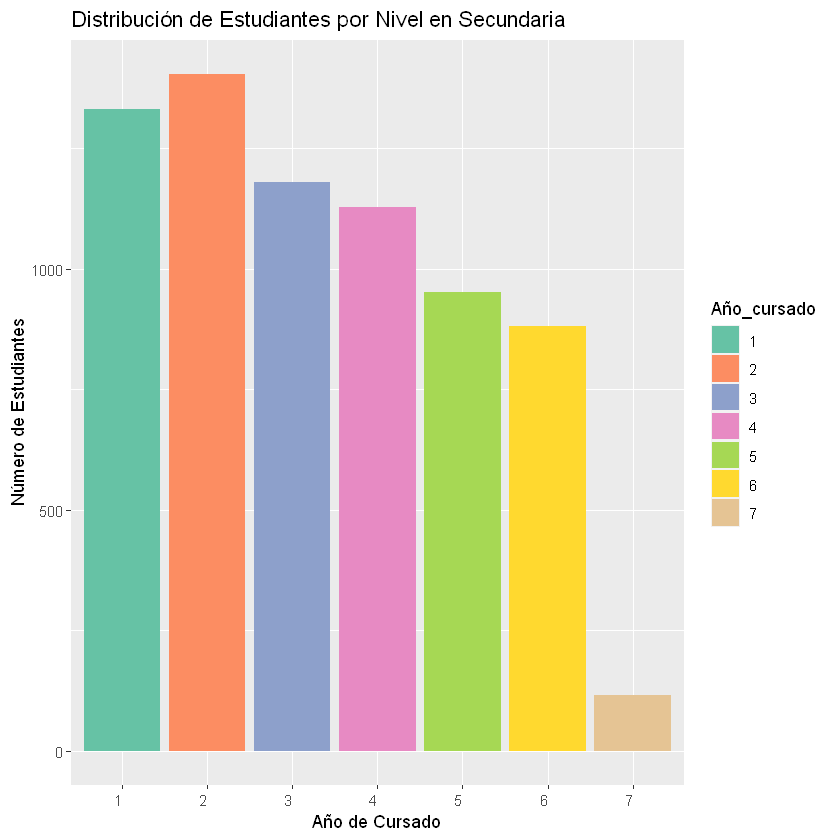

In [72]:



# Crear la tabla de frecuencias con distinct para el campo Documento
tabla_frecuencia <- SEC_NOTAS_MODIF %>%
  distinct(Documento, Año_cursado) %>%
  count(Año_cursado) %>%
  rename(Frecuencia = n)

# Convertir la tabla de frecuencias en un dataframe y ordenar por año
df_frecuencia <- as.data.frame(tabla_frecuencia)
names(df_frecuencia) <- c("Año_cursado", "Frecuencia")

# Crear un factor para asegurar el orden correcto de los niveles
df_frecuencia$Año_cursado <- factor(df_frecuencia$Año_cursado, levels = 1:7)

# Graficar el histograma de frecuencia absoluta con ggplot2
ggplot(df_frecuencia, aes(x = Año_cursado, y = Frecuencia, fill = Año_cursado)) +
  geom_bar(stat = "identity") +
  labs(title = "Distribución de Estudiantes por Nivel en Secundaria",
       x = "Año de Cursado", y = "Número de Estudiantes") +
  scale_fill_brewer(palette = "Set2") +
  theme(axis.text.x = element_text(hjust = 1))

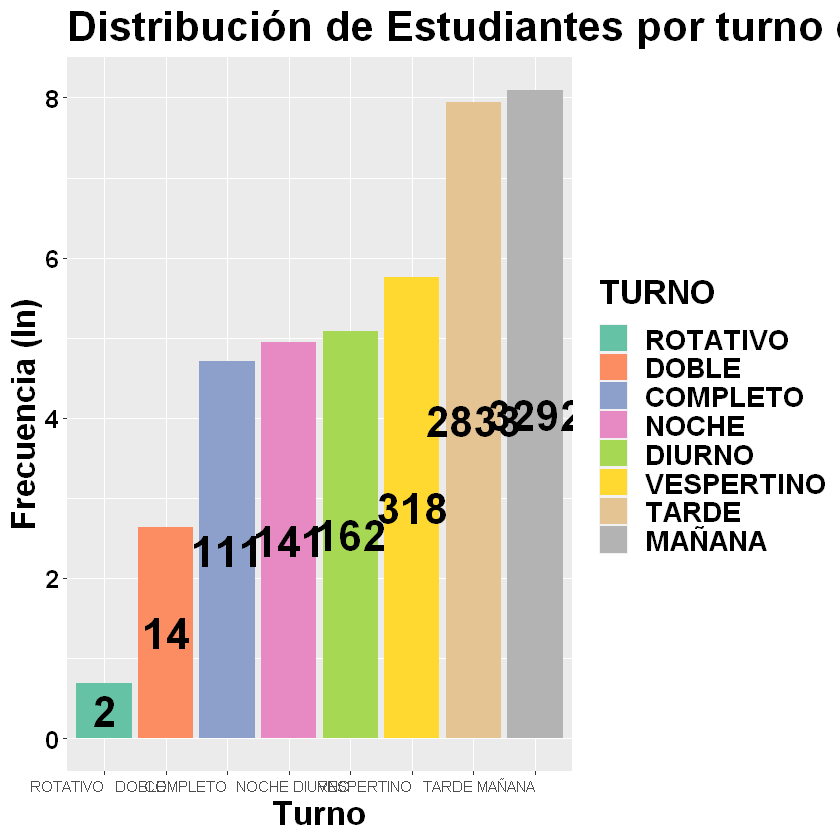

In [73]:



# Filtrar los datos para excluir el año séptimo
datos_filtrados <- SEC_NOTAS_MODIF %>% 
  filter(Año_cursado != 7)

# Crear la tabla de frecuencias con distinct para el campo Documento
tabla_frecuencia <- Calcular_frecuencias(datos_filtrados %>% distinct(Documento, turno), turno)

# Convertir la tabla de frecuencias en un dataframe y ordenar por turno
df_frecuencia <- as.data.frame(tabla_frecuencia)
names(df_frecuencia) <- c("turno", "Frecuencia")

# Crear un factor para asegurar el orden correcto de los niveles
df_frecuencia$turno <- factor(df_frecuencia$turno, levels = unique(df_frecuencia$turno))

# Crear el gráfico
grafico <- ggplot(df_frecuencia, aes(x = turno, y = log(Frecuencia), fill = turno)) +
  geom_bar(stat = "identity") + 
  geom_text(aes(label = Frecuencia), position = position_stack(vjust = 0.5), size = 9, color = "black", fontface = "bold") +
  labs(title = "Distribución de Estudiantes por turno en Secundaria",
       x = "Turno", y = "Frecuencia (ln)") +
  scale_fill_brewer(palette = "Set2", name = "TURNO") + # Ajuste del nombre de la leyenda
  theme(axis.text.x = element_text(hjust = 1, size = 9),  # Tamaño del texto del eje x
        axis.text.y = element_text(size = 15, color = "black", face = "bold"),  # Tamaño y estilo del texto del eje y
        legend.title = element_text(size = 20, color = "black", face = "bold"),  # Tamaño y estilo del título de la leyenda
        legend.text = element_text(size = 17, face = "bold"), # Ajuste del tamaño y negrita del texto de la leyenda
        plot.title = element_text(size = 25, face = "bold"),  # Tamaño del título
        axis.title = element_text(size = 20, color = "black", face = "bold"))  # Tamaño y estilo del texto de los ejes

# Mostrar el gráfico en pantalla
print(grafico)

# Guardar el gráfico como un archivo PNG
#png_filename <- "C:/Users/HP/Desktop/DAIA/EPLOTACIONDEDATOSMULTIVARIADOS/graficoturnos.png"  # Ruta y nombre del archivo PNG
#ggsave(png_filename, plot = grafico, device = "png", width = 10, height = 7)# Guardar el gráfico# Ajuste del tamaño de los nombres de los ejes

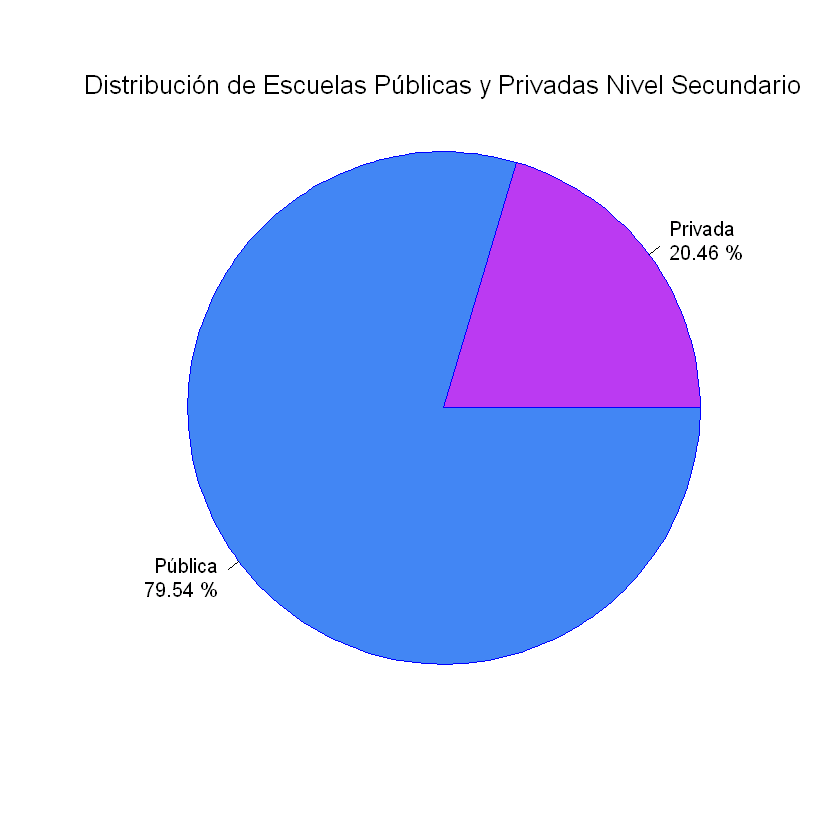

In [74]:

#png(filename = "C:/Users/HP/Desktop/DAIA/EPLOTACIONDEDATOSMULTIVARIADOS/Torta_gestion.png", width = 1090, height = 1020, res = 172) #elegimos la resolución y otros parámetros
par(bg = "transparent") #le sacamos el fondo

Uruguay_Secundaria_unicos <- datos_filtrados %>%
  distinct(Documento, EsPrivada)
Uruguay_Secundaria_unicos$EsPrivada <- ifelse(Uruguay_Secundaria_unicos$EsPrivada == 'N', 'Pública', 'Privada')

pie_commute <- round(100 * table(Uruguay_Secundaria_unicos$EsPrivada) / length(Uruguay_Secundaria_unicos$EsPrivada), 2)

colors = c("#bb3af2",'#4286f4')

pie(pie_commute, labels = paste0(names(pie_commute),'\n', pie_commute, ' %'),
    main = "",
    col = colors,
    radius = .9,
    col.main = "black",
    col.sub = "blue4",
    angle = seq(0,180,35),
    border = 'blue')

# Ponemos el título más cerca del gráfico cambiando line a 0
mtext(text = "Distribución de Escuelas Públicas y Privadas Nivel Secundario", side = 3, line = 0, cex = 1.3)

#dev.off() # Esto cierra el dispositivo de gráficos y guarda el archivoz

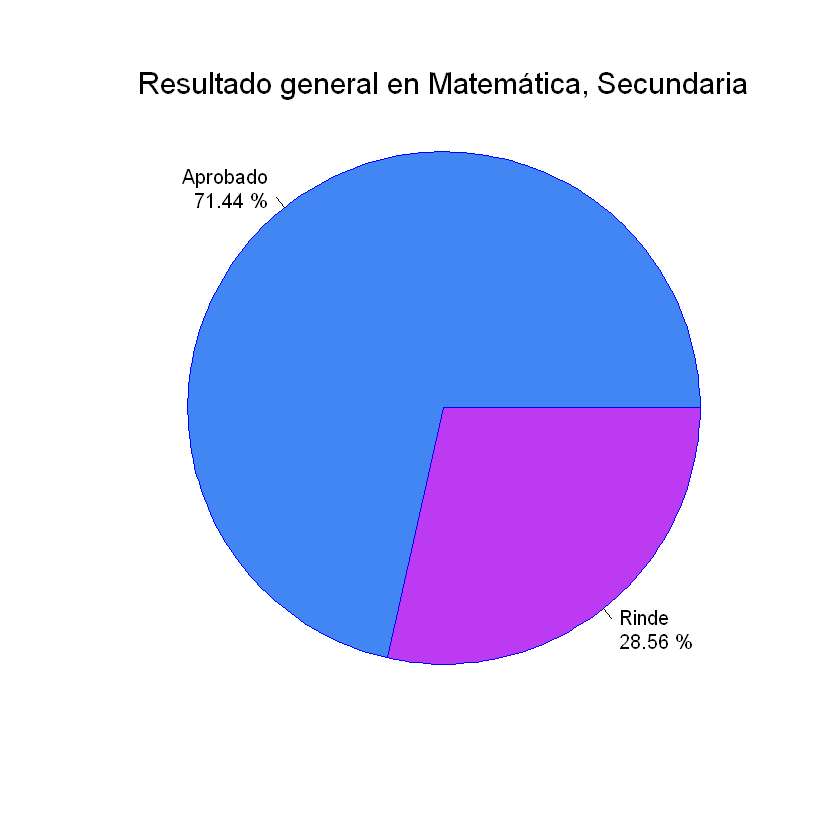

In [75]:
#png(filename="C:/Users/HP/Desktop/DAIA/EPLOTACIONDEDATOSMULTIVARIADOS/ResultadoMatematica.png", width=1180, height=1080, res=172) #elejimos la resolucion y otros paramentros
par(bg = "transparent") # le sacamos el fondo

Uruguay_Secundaria_unicos <- datos_filtrados %>%
  distinct(Documento, Resultado, asignatura)

uru_lengua <- filter(Uruguay_Secundaria_unicos , asignatura == "MATEMATICA")
uru_lengua <- subset(uru_lengua, !(Resultado == "NA"))
pie_commute <- round(100 * table(uru_lengua$Resultado) / length(uru_lengua$Resultado), 2)

colors = c('#4286f4', '#bb3af2')

pie(pie_commute, labels = paste0(names(pie_commute), '\n', pie_commute, ' %'),
    main = paste(""),
    col = colors,
    radius = .9,
    col.main = "black",
    col.sub = "blue4",
    angle = seq(0, 180, 35),
    border = 'blue')

# ponemos el titulo mas cerca del grafico cambiando line a 0
mtext(text = "Resultado general en Matemática, Secundaria", side = 3, line = 0, cex = 1.5)

#dev.off()

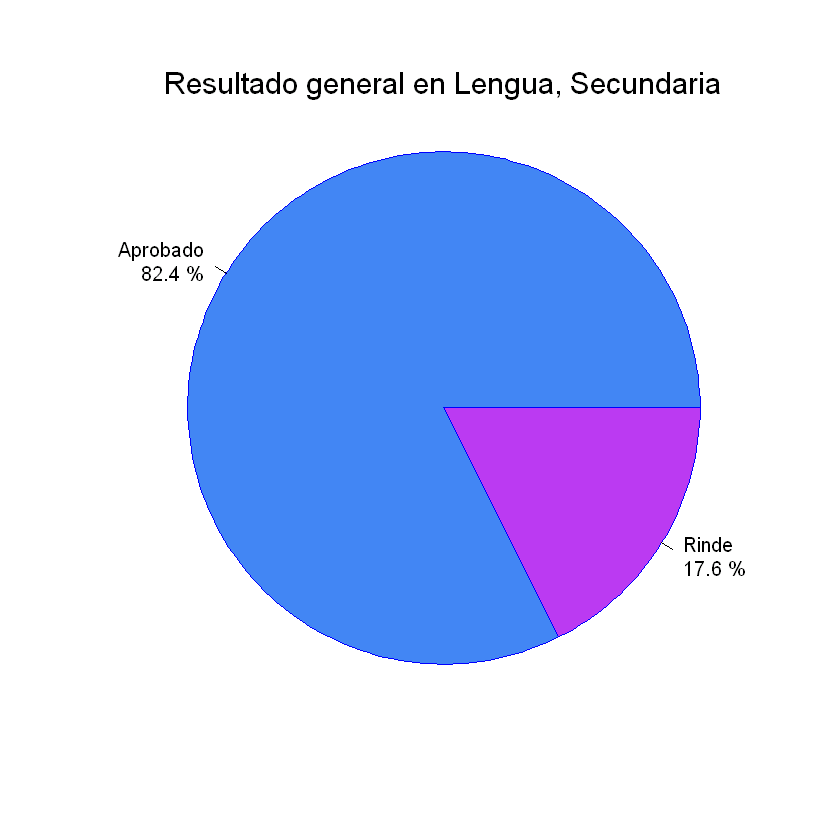

In [76]:
#GRAFICO TOMANDO EN CUENTA TODOS LOS AÑOS
#png(filename="C:/Users/HP/Desktop/DAIA/EPLOTACIONDEDATOSMULTIVARIADOS/ResultadoLengua.png", width=1180, height=1080, res=172) #elejimos la resolucion y otros paramentros
par(bg = "transparent") #le sacamos el fondo

Uruguay_Secundaria_unicos <- datos_filtrados %>%
  distinct(Documento, Resultado, asignatura)

uru_lengua <- filter(Uruguay_Secundaria_unicos , asignatura == "LENGUA")
uru_lengua <- subset(uru_lengua, !(Resultado == "NA"))
pie_commute <- round(100 * table(uru_lengua$Resultado) / length(uru_lengua$Resultado),2)

colors = c('#4286f4','#bb3af2')

pie(pie_commute, labels = paste0(names(pie_commute),'\n', pie_commute, ' %'),
    main = paste(""),
    col = colors,
    radius = .9,
    col.main = "black",
    col.sub = "blue4",
    angle = seq(0,180,35),
    border = 'blue')

# ponemos el titulo mas cerca del grafico cambiando line a 0
mtext(text = "Resultado general en Lengua, Secundaria", side = 3, line = 0, cex = 1.5)

#dev.off()

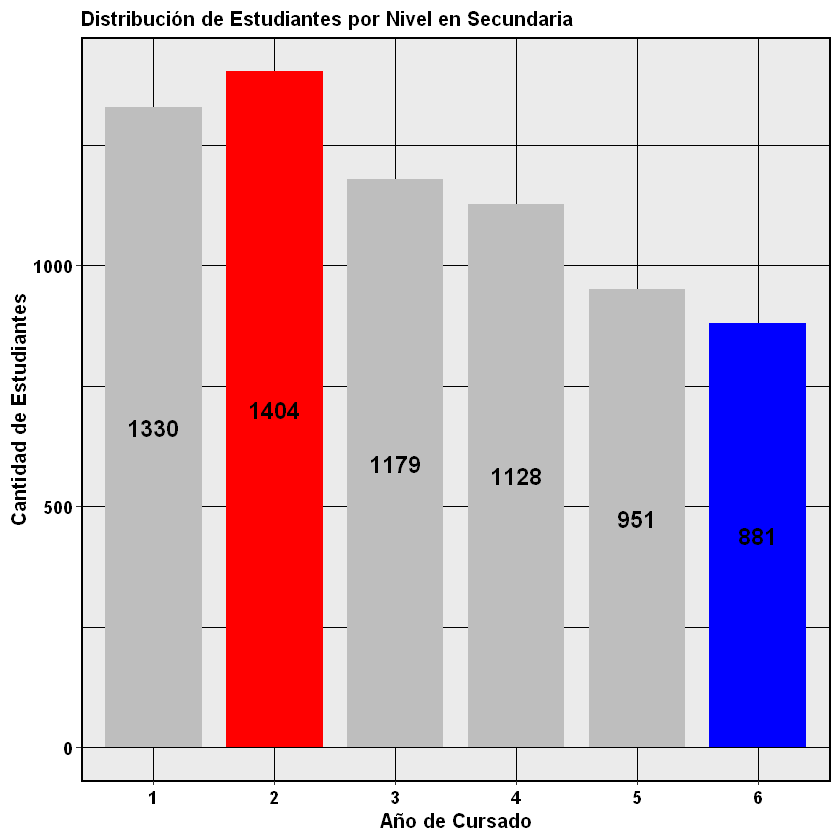

In [77]:


# Filtrar los datos para excluir el año séptimo
datos_filtrados <- SEC_NOTAS_MODIF %>% 
  filter(Año_cursado != 7)

# Crear la tabla de frecuencias con distinct para el campo Documento
tabla_frecuencia <- datos_filtrados %>%
  distinct(Documento, Año_cursado) %>%
  count(Año_cursado) %>%
  rename(Frecuencia = n)

# Convertir la tabla de frecuencias en un dataframe y ordenar por año
df_frecuencia <- as.data.frame(tabla_frecuencia)
names(df_frecuencia) <- c("Año_cursado", "Frecuencia")

# Crear un factor para asegurar el orden correcto de los niveles
df_frecuencia$Año_cursado <- factor(df_frecuencia$Año_cursado, levels = 1:6)

# Identificar la frecuencia máxima y mínima
max_freq <- max(df_frecuencia$Frecuencia)
min_freq <- min(df_frecuencia$Frecuencia)

# Crear una nueva columna para los colores
df_frecuencia$Color <- ifelse(df_frecuencia$Frecuencia == max_freq, "red", ifelse(df_frecuencia$Frecuencia == min_freq, "blue", "gray"))

suppressWarnings({
  # Crear el gráfico
  grafico <- ggplot(df_frecuencia, aes(x = Año_cursado, y = Frecuencia, fill = Color)) +
    geom_col(width = 0.8) +  # Ajusta el ancho de las barras aquí
    scale_fill_manual(values = c("red" = "red", "blue" = "blue", "gray" = "gray")) +
    labs(title = "Distribución de Estudiantes por Nivel en Secundaria",
         x = "Año de Cursado", y = "Cantidad de Estudiantes") +
    geom_text(aes(label = Frecuencia), position = position_stack(vjust = 0.5), size = 5, color = "black", fontface = "bold") +
    theme(legend.position = "none",
          axis.text = element_text(size = 12, color = "black", face = "bold"),
          axis.title = element_text(size = 12, color = "black", face = "bold"),
          axis.text.x = element_text(size = 11, color = "black", face = "bold"),
          axis.text.y = element_text(size = 11, color = "black", face = "bold"),
          plot.title = element_text(size = 12, color = "black", face = "bold"),
          panel.border = element_rect(colour = "black", fill = NA, linewidth = 1),
          panel.grid.major = element_line(colour = "black"),
          panel.grid.minor = element_line(colour = "black"))

  # Mostrar el gráfico en pantalla
  print(grafico)

  # Guardar el gráfico como un archivo PNG
  #png_filename <- "tu_grafico.png"
  #ggsave(png_filename, plot = grafico, device = "png", width = 6, height = 4)
})

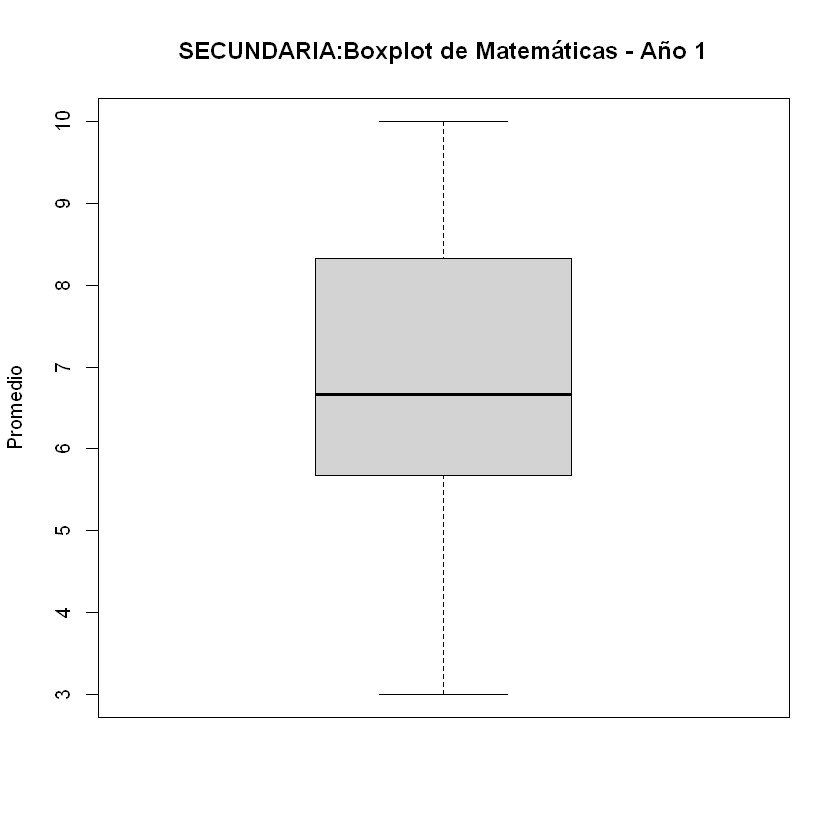

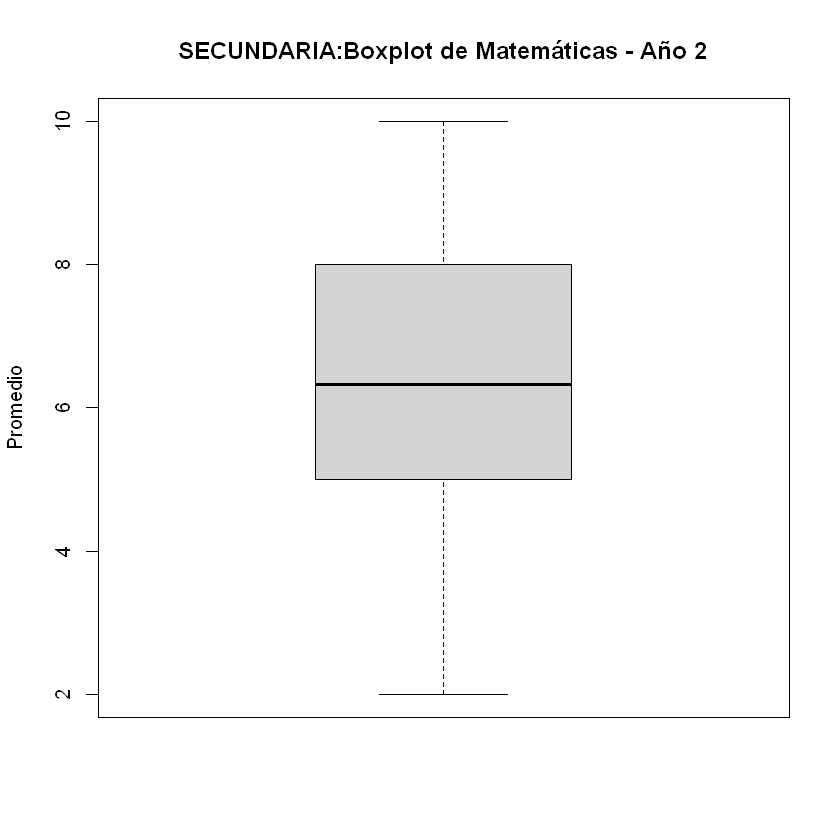

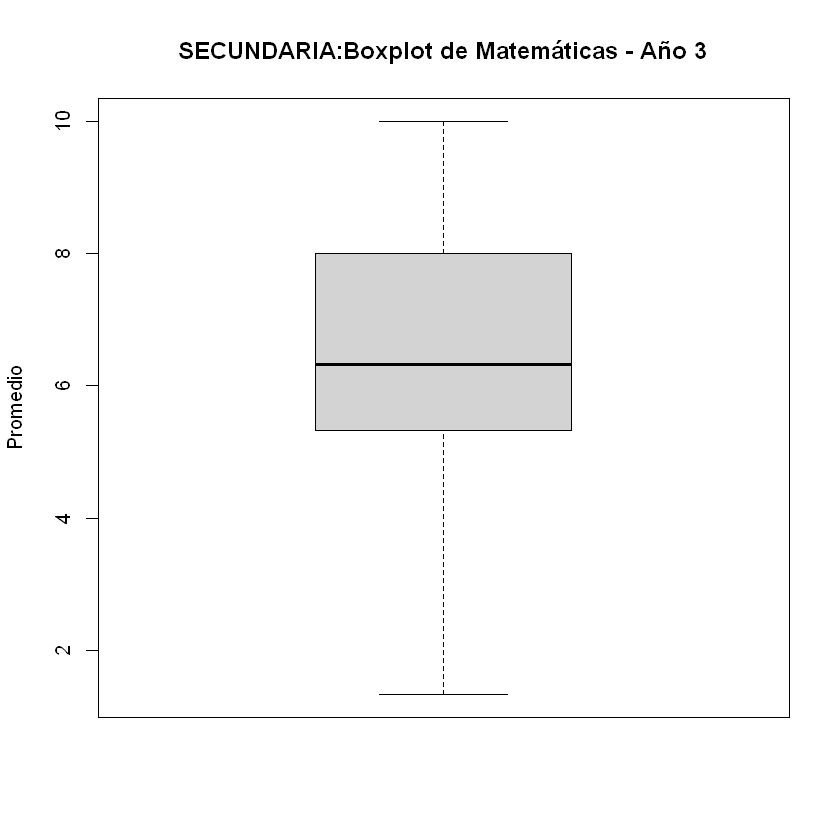

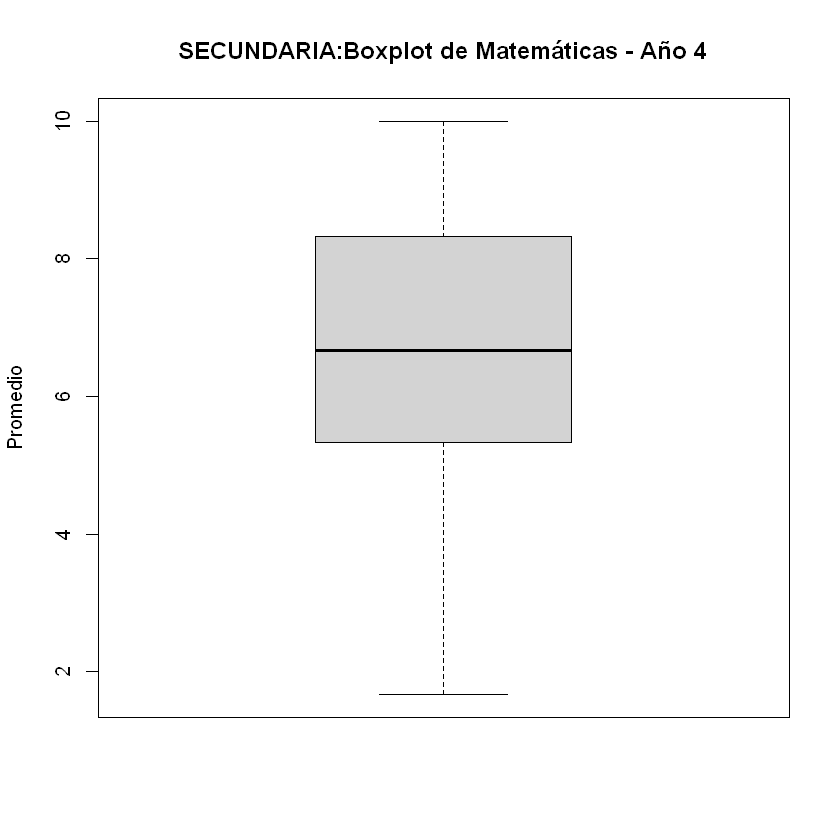

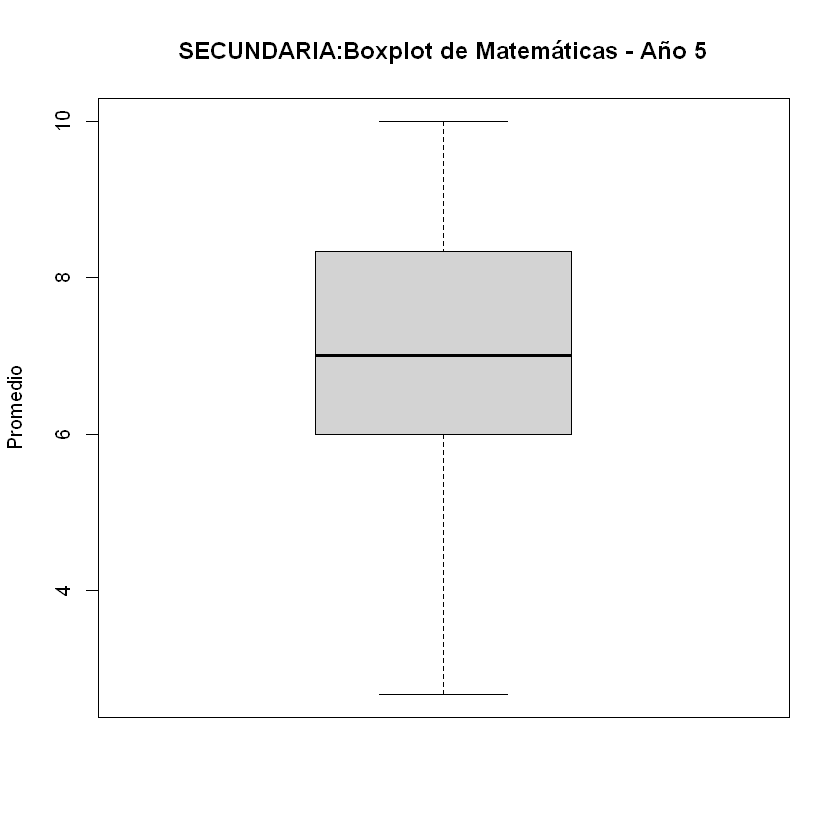

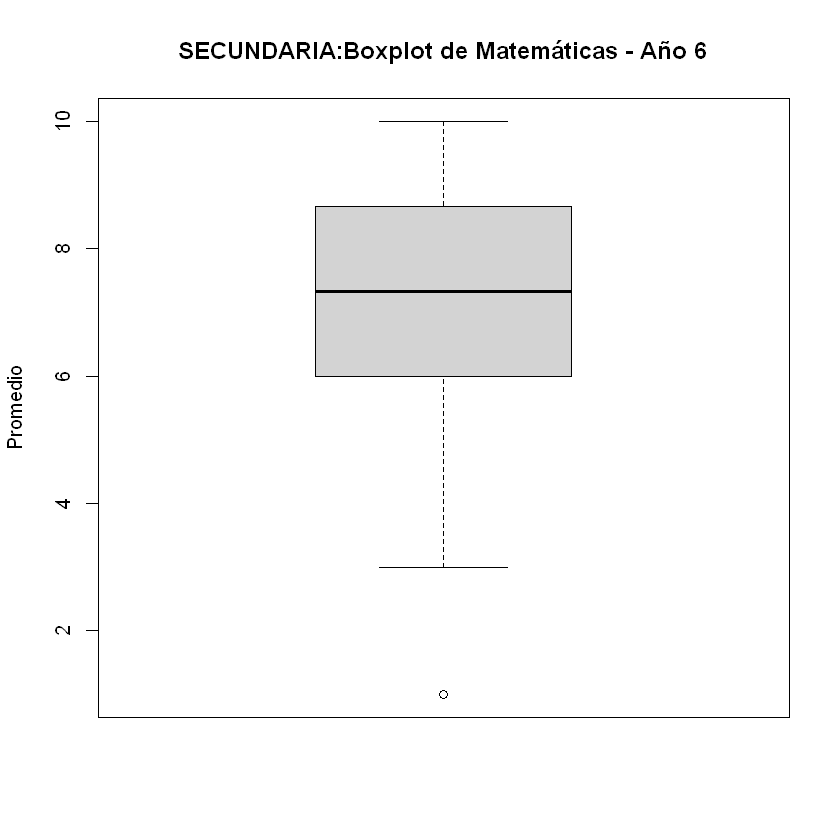

Resultados para el año 1 :
  Rango de variación de los datos (Máximo - Mínimo): 10 - 3 = 7 
  La distribución es asimétrica a la izquierda 
  Media de los datos: 6.909418 
  Mediana de los datos: 6.67 
  Rango intercuartílico: 2.66 
  Cuartiles: 5.67 6.67 8.33 
  Límite superior para considerar valores atípicos: 12.32 
  Cantidad de datos atípicos: 0 
  ¿El rendimiento fue óptimo?: Sí 

Resultados para el año 2 :
  Rango de variación de los datos (Máximo - Mínimo): 10 - 2 = 8 
  La distribución es asimétrica a la derecha 
  Media de los datos: 6.495913 
  Mediana de los datos: 6.33 
  Rango intercuartílico: 2.9175 
  Cuartiles: 5 6.33 7.9175 
  Límite superior para considerar valores atípicos: 12.29375 
  Cantidad de datos atípicos: 0 
  ¿El rendimiento fue óptimo?: Sí 

Resultados para el año 3 :
  Rango de variación de los datos (Máximo - Mínimo): 10 - 1.33 = 8.67 
  La distribución es asimétrica a la derecha 
  Media de los datos: 6.593755 
  Mediana de los datos: 6.33 
  Rango inte

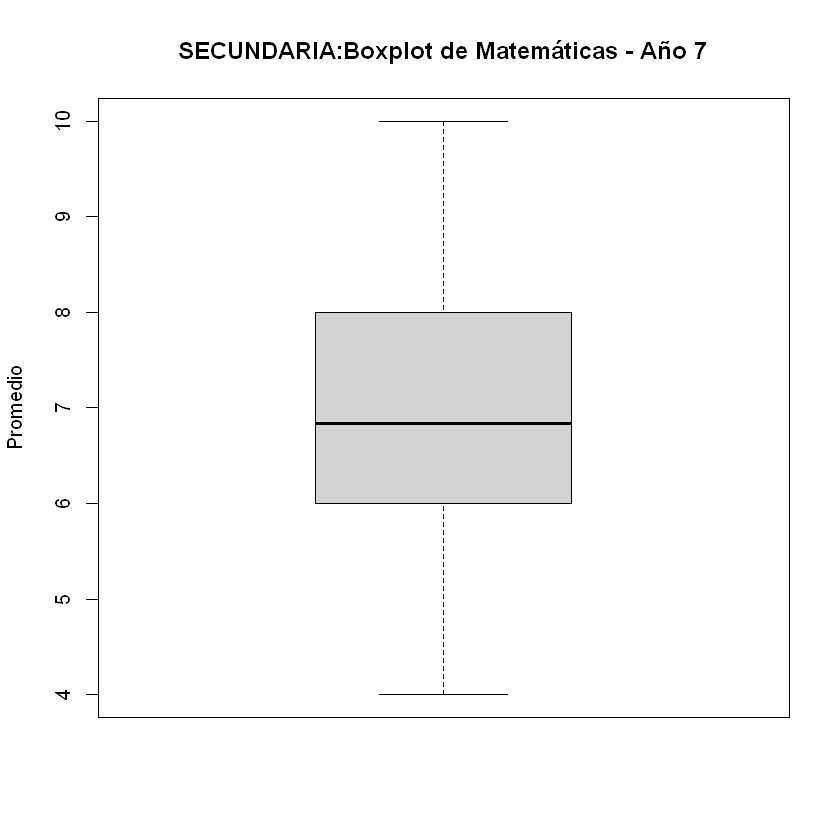

In [78]:
library(moments)

# Definir una lista para almacenar los resultados de cada año
resultados_por_año <- list()

# Realizar el análisis para cada año
for (i in 1:7) {
  # Filtrar los datos por el año correspondiente
  datos_año <- SEC_NOTAS_MODIF[SEC_NOTAS_MODIF$Año_cursado == i & SEC_NOTAS_MODIF$asignatura == "MATEMATICA", ]
  
  # Calcular el rango de variación de los datos
  rango <- range(datos_año$Promedio)
  
  # Determinar si la distribución es simétrica y el tipo de asimetría
  coeficiente_asimetria <- skewness(datos_año$Promedio)
  simetria <- ifelse(coeficiente_asimetria == 0, "simétrica",
                     ifelse(coeficiente_asimetria > 0, "asimétrica a la derecha",
                            "asimétrica a la izquierda"))
  
  # Graficar el boxplot
  boxplot(datos_año$Promedio,
          main = paste("SECUNDARIA:Boxplot de Matemáticas - Año", i),
          ylab = "Promedio",
          horizontal = FALSE)  
    # Calcular la media
  media <- mean(datos_año$Promedio)
  
  # Calcular la mediana
  mediana <- median(datos_año$Promedio)
  
  # Calcular el rango intercuartílico
  rango_intercuartilico <- IQR(datos_año$Promedio)
  
  # Calcular los cuartiles
  cuartiles <- quantile(datos_año$Promedio, c(0.25, 0.5, 0.75))
  
  # Calcular el límite superior de los valores atípicos
  limite_superior_atipicos <- cuartiles[3] + 1.5 * rango_intercuartilico
  
  # Contar la cantidad de datos atípicos
  datos_atipicos <- datos_año$Promedio[datos_año$Promedio > limite_superior_atipicos]
  
  # Evaluar si el rendimiento fue óptimo
  rendimiento_optimo <- ifelse(mediana >= 6, "Sí", "No")
  
  # Almacenar los resultados en la lista
  resultados_por_año[[paste("Año", i)]] <- list(
    Rango = rango,
    Simetría = simetria,
    Media = media,
    Mediana = mediana,
    RangoIntercuartilico = rango_intercuartilico,
    Cuartiles = cuartiles,
    LimiteSuperiorAtipicos = limite_superior_atipicos,
    CantidadDatosAtipicos = length(datos_atipicos),
    RendimientoOptimo = rendimiento_optimo
  )
}

# Imprimir los resultados para cada año
for (i in 1:7) {
  cat("Resultados para el año", i, ":\n")
  cat("  Rango de variación de los datos (Máximo - Mínimo):", resultados_por_año[[paste("Año", i)]]$Rango[2], "-", resultados_por_año[[paste("Año", i)]]$Rango[1], "=", resultados_por_año[[paste("Año", i)]]$Rango[2] - resultados_por_año[[paste("Año", i)]]$Rango[1], "\n")
  cat("  La distribución es", resultados_por_año[[paste("Año", i)]]$Simetría, "\n")
  cat("  Media de los datos:", resultados_por_año[[paste("Año", i)]]$Media, "\n")
  cat("  Mediana de los datos:", resultados_por_año[[paste("Año", i)]]$Mediana, "\n")
  cat("  Rango intercuartílico:", resultados_por_año[[paste("Año", i)]]$RangoIntercuartilico, "\n")
  cat("  Cuartiles:", resultados_por_año[[paste("Año", i)]]$Cuartiles, "\n")
  cat("  Límite superior para considerar valores atípicos:", resultados_por_año[[paste("Año", i)]]$LimiteSuperiorAtipicos, "\n")
  cat("  Cantidad de datos atípicos:", resultados_por_año[[paste("Año", i)]]$CantidadDatosAtipicos, "\n")
  cat("  ¿El rendimiento fue óptimo?:", resultados_por_año[[paste("Año", i)]]$RendimientoOptimo, "\n\n")
}


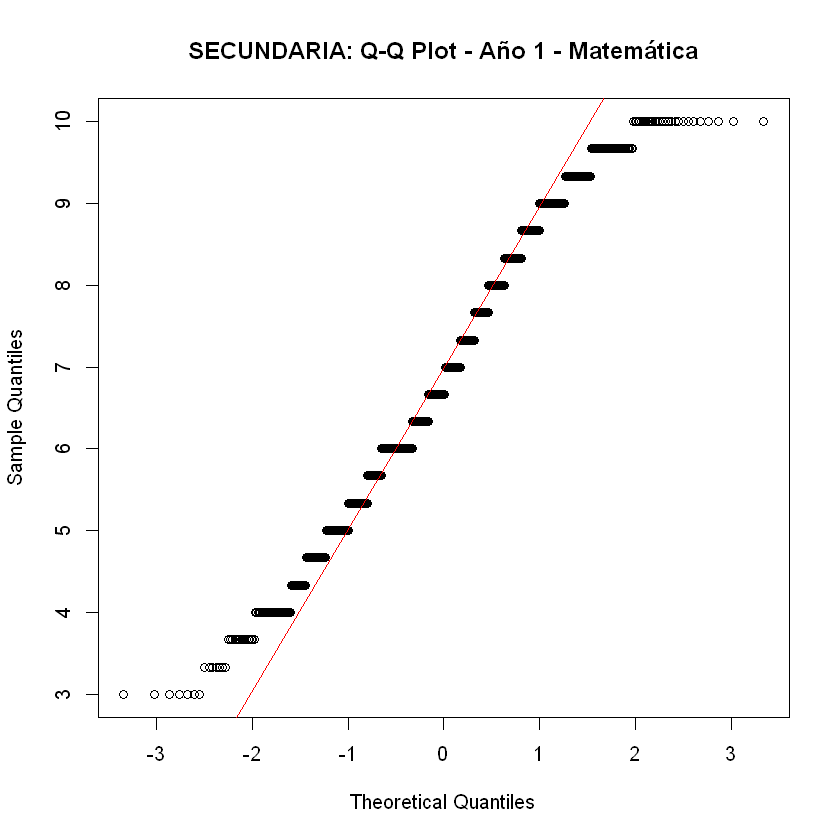

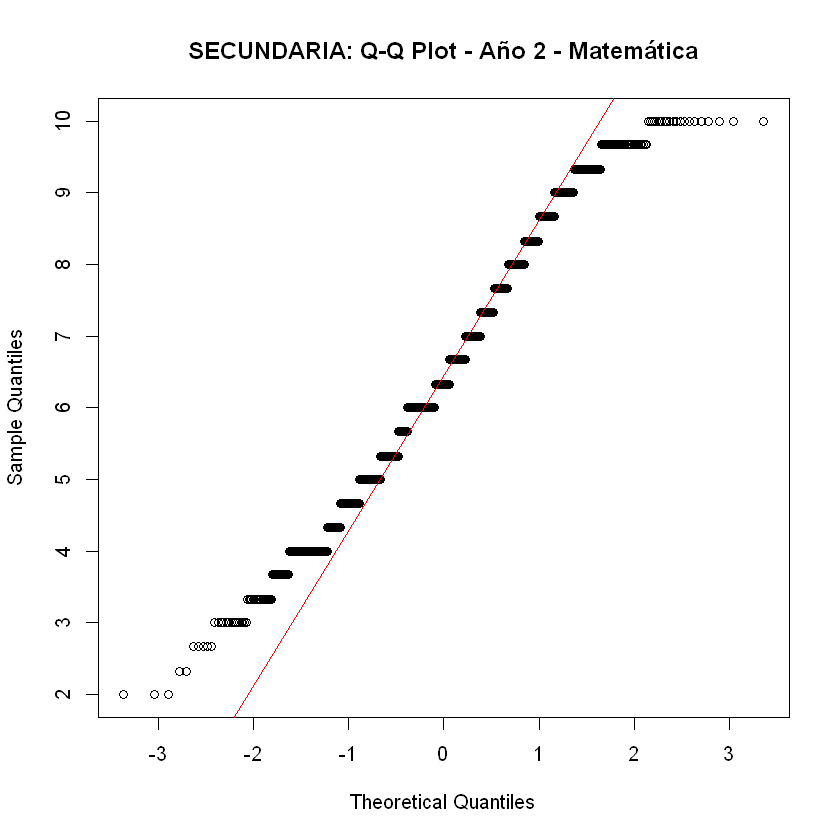

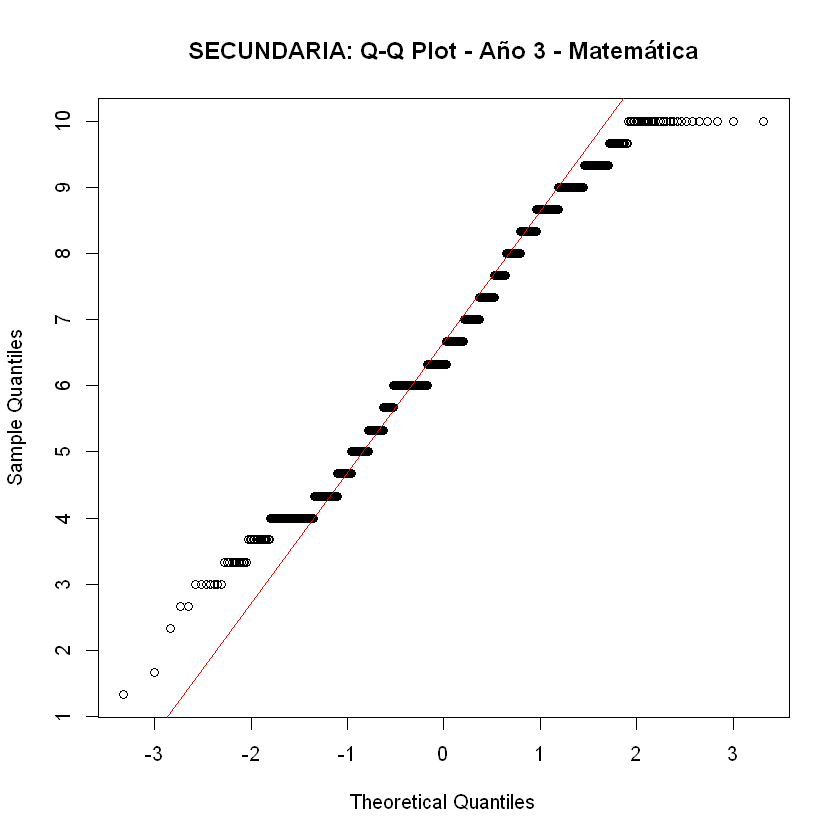

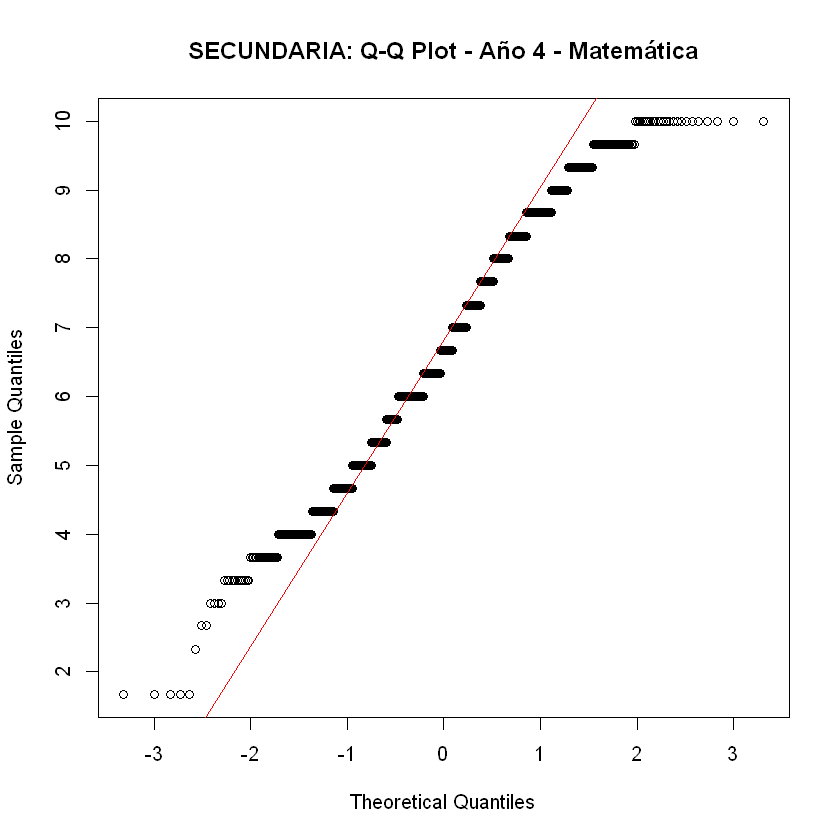

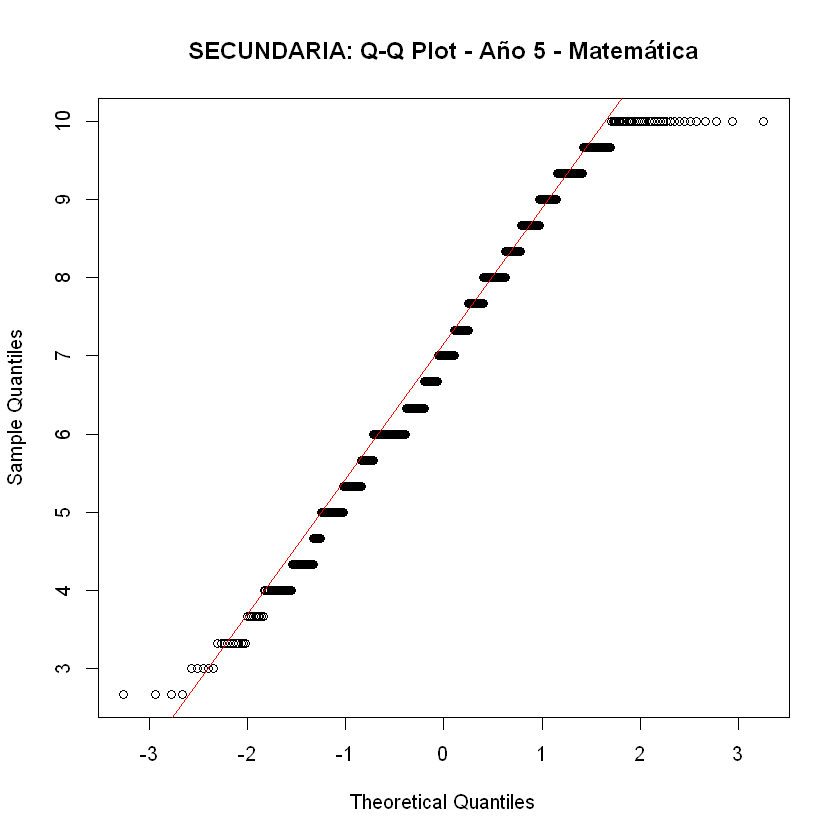

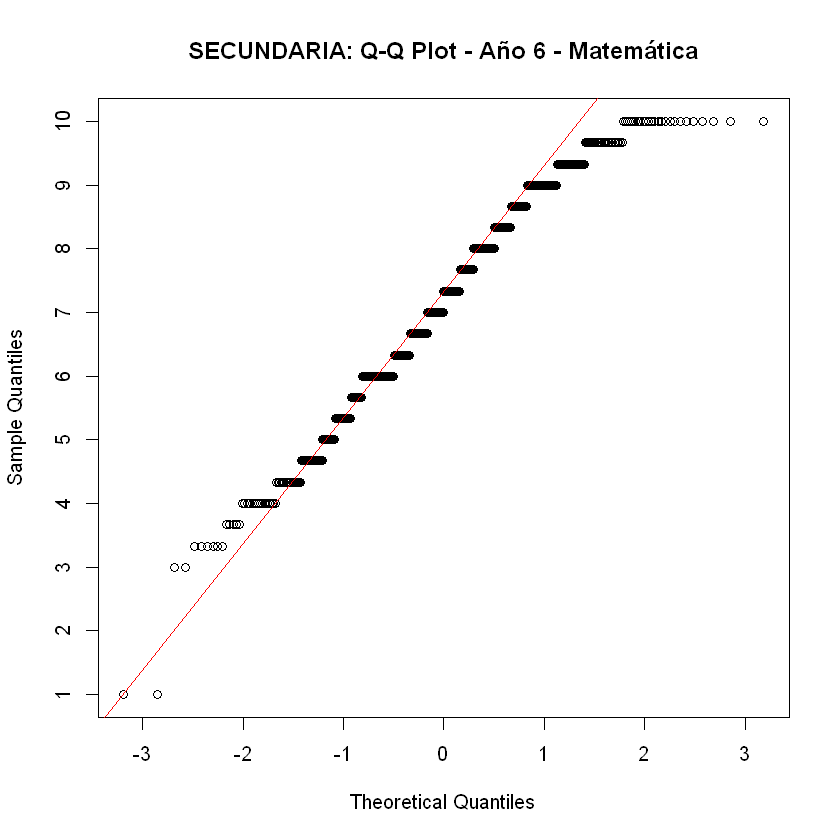

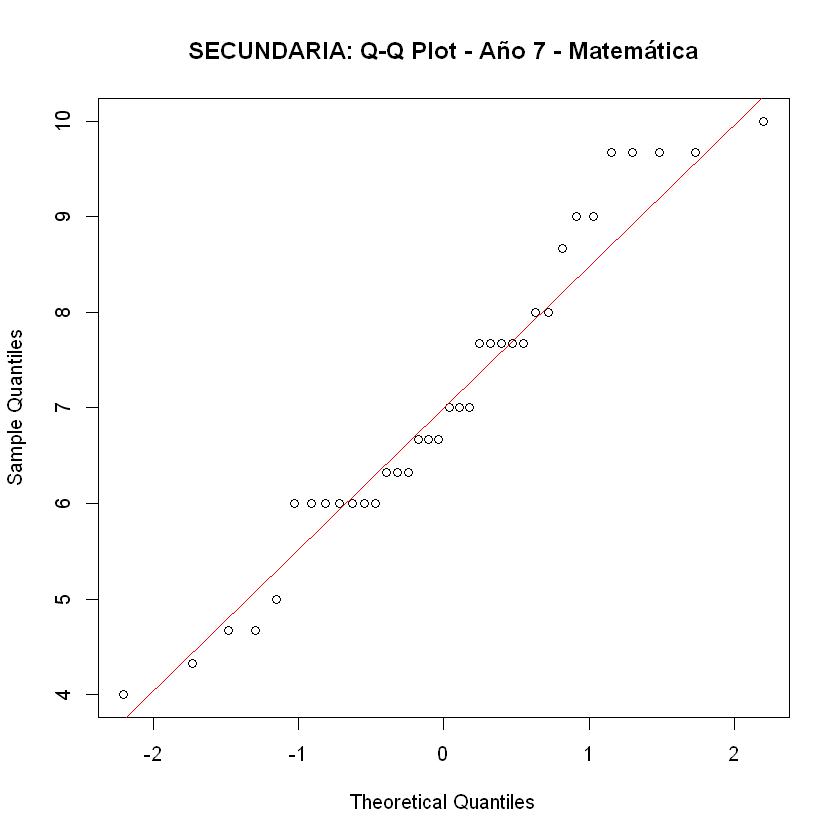

In [79]:
for (i in 1:7) {
  # Filtrar los datos por el año correspondiente y la materia de Matemáticas
  datos_año_matematicas <- SEC_NOTAS_MODIF[SEC_NOTAS_MODIF$Año_cursado == i & SEC_NOTAS_MODIF$asignatura == "MATEMATICA", ]
  
  # Verificar si hay datos disponibles para el año y la materia
  if (nrow(datos_año_matematicas) > 0) {
    # Obtener los valores de la variable a graficar en el Q-Q plot
    valores <- datos_año_matematicas$Promedio
    
    # Crear el Q-Q plot con el título adecuado
    qqnorm(valores, main = paste("SECUNDARIA: Q-Q Plot - Año", i, "- Matemática"))
    qqline(valores, col = "red")  # Añadir la línea de referencia
    
    # Obtener los límites del eje Y
    limite_inf <- floor(min(valores))
    limite_sup <- ceiling(max(valores))
    
    # Modificar los saltos de los números en el eje Y (de forma consecutiva)
    valores_eje_y <- seq(limite_inf, limite_sup, by = 1)
    
    # Agregar las marcas en el eje Y
    axis(2, at = valores_eje_y)

  } else {
    cat("No hay datos disponibles para el año", i, "y la materia de Matemática.\n")
  }
}

Datos del año 1 :
Valor(es) de la moda: 6 
b) La distribución es unimodal.
c) La distribución es asimétrica a la izquierda 
d) La asimetría es a la izquierda. 
e) El rango de variación de las notas es: 10 - 3 
   La media de las notas es: 6.909418 
f) Los datos están dispersos alrededor de la media.
   No hay datos atípicos en relación a la mayoría de los datos.


Datos del año 2 :
Valor(es) de la moda: 6 
b) La distribución es unimodal.
c) La distribución es asimétrica a la derecha 
d) La asimetría es a la derecha. 
e) El rango de variación de las notas es: 10 - 2 
   La media de las notas es: 6.495913 
f) Los datos están dispersos alrededor de la media.
   No hay datos atípicos en relación a la mayoría de los datos.


Datos del año 3 :
Valor(es) de la moda: 6 
b) La distribución es unimodal.
c) La distribución es asimétrica a la derecha 
d) La asimetría es a la derecha. 
e) El rango de variación de las notas es: 10 - 1.33 
   La media de las notas es: 6.593755 
f) Los datos están dis

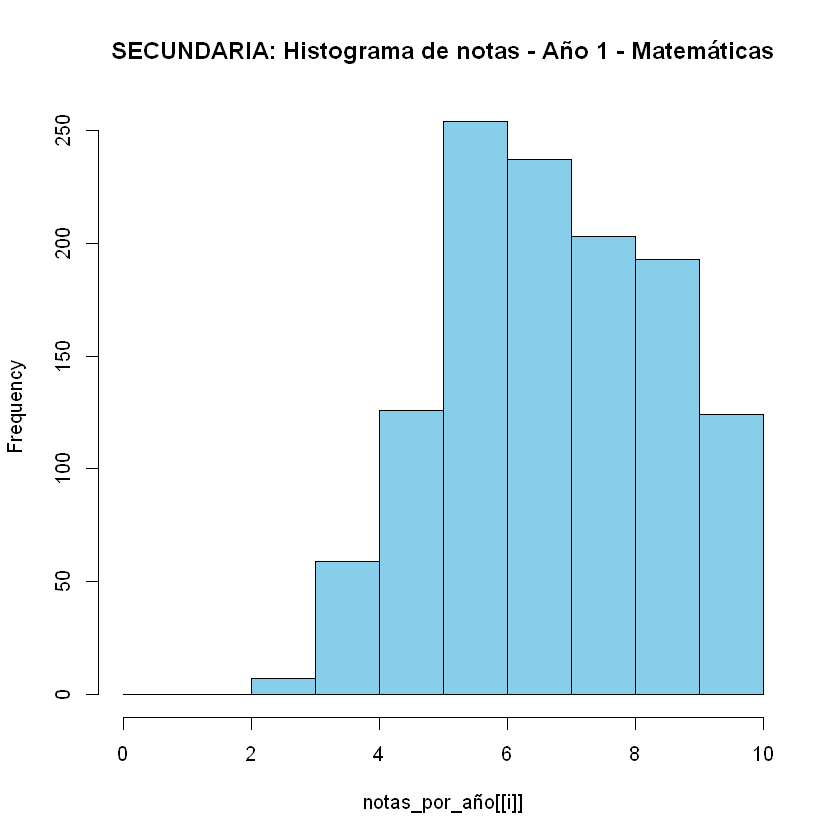

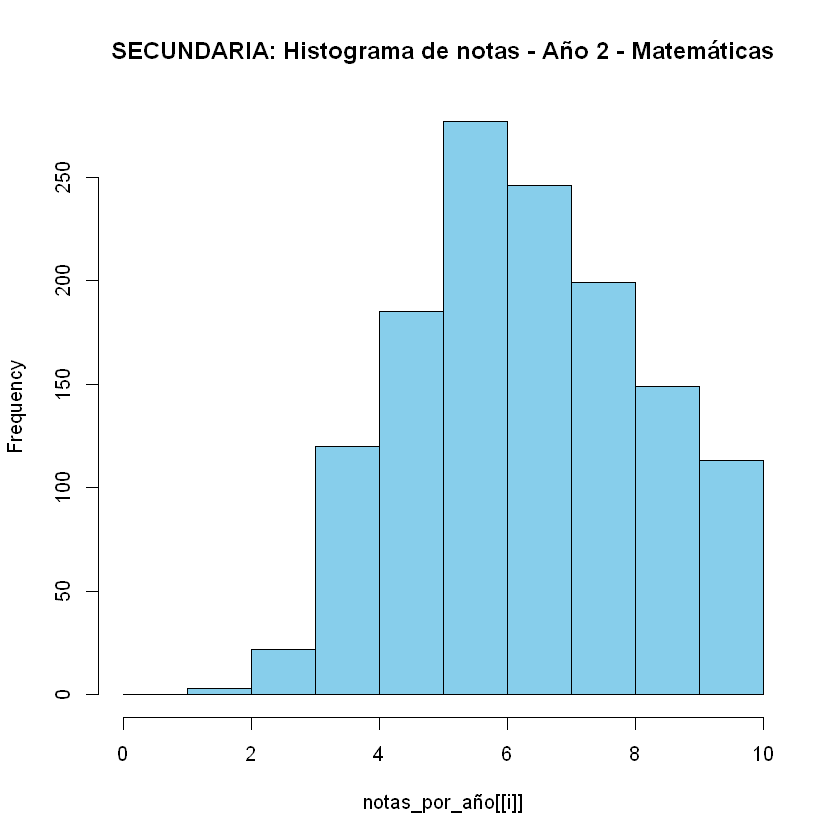

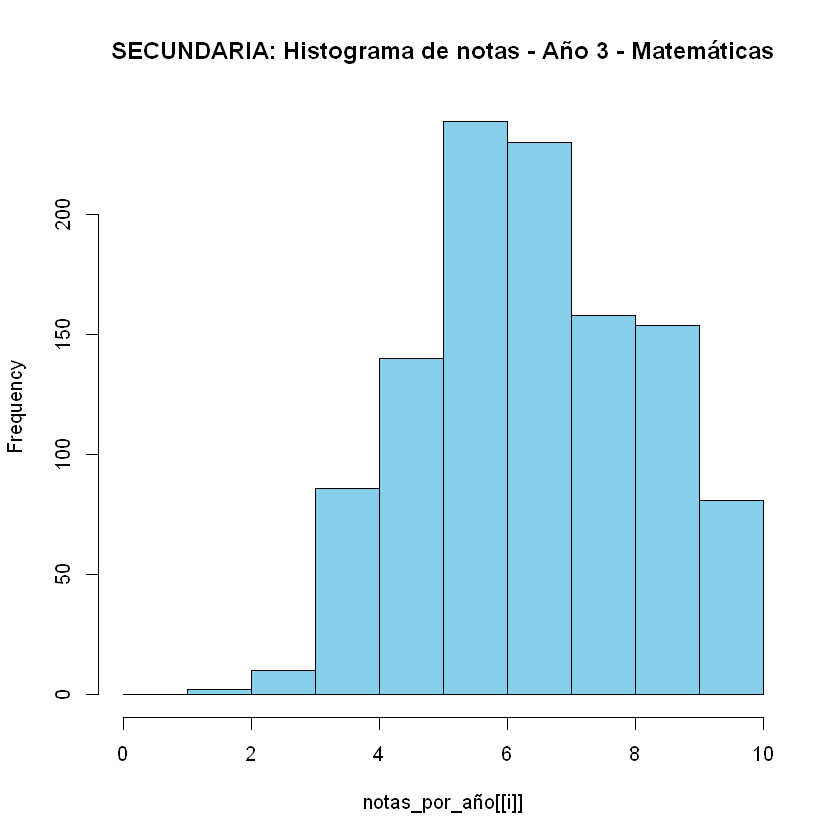

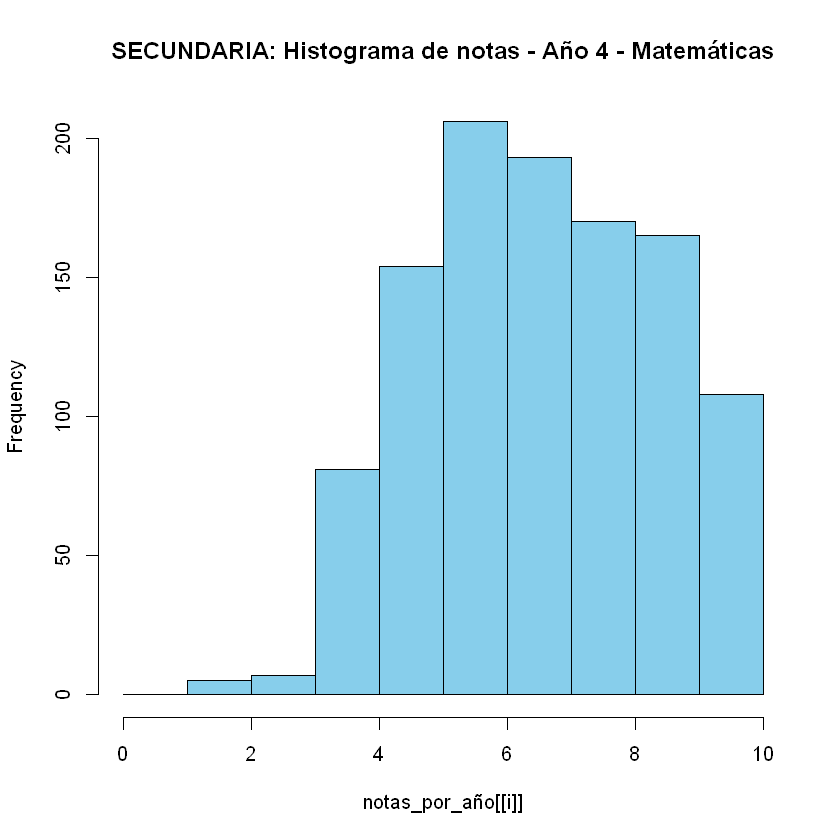

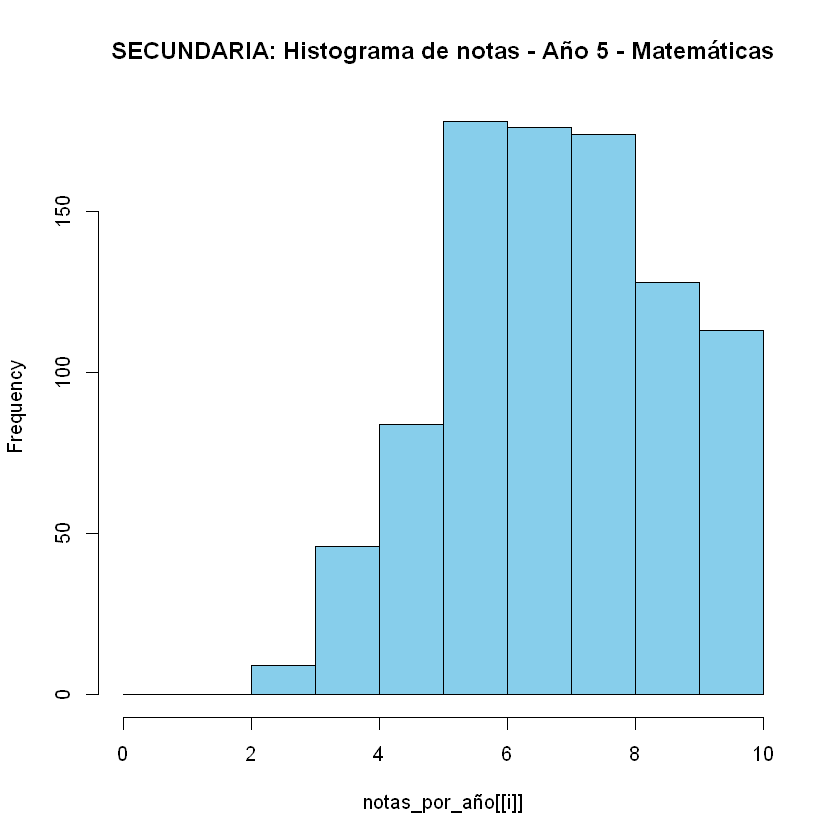

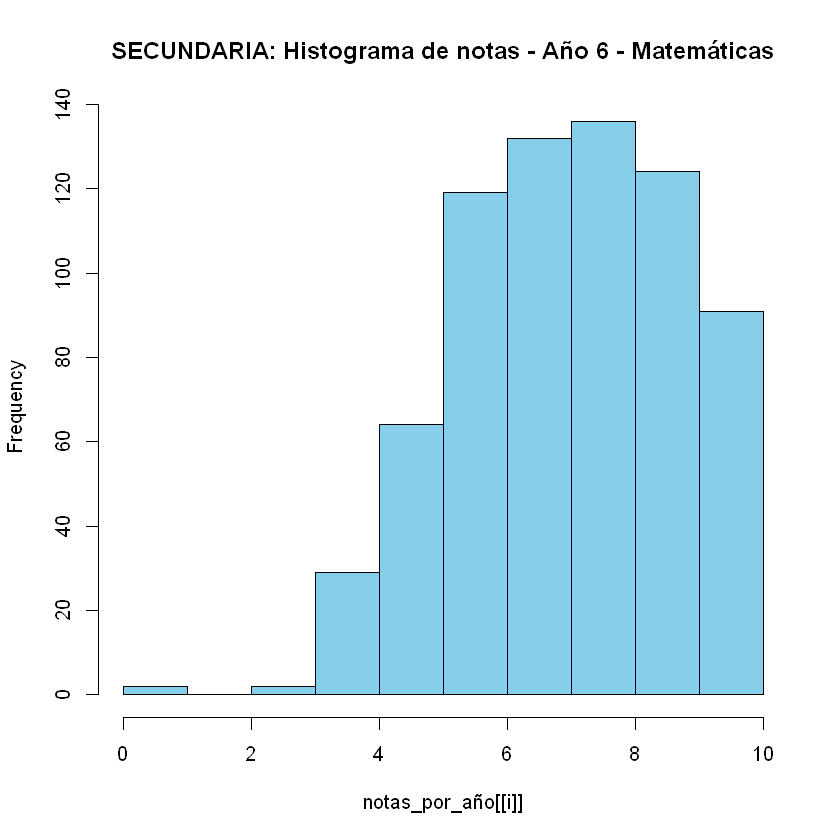

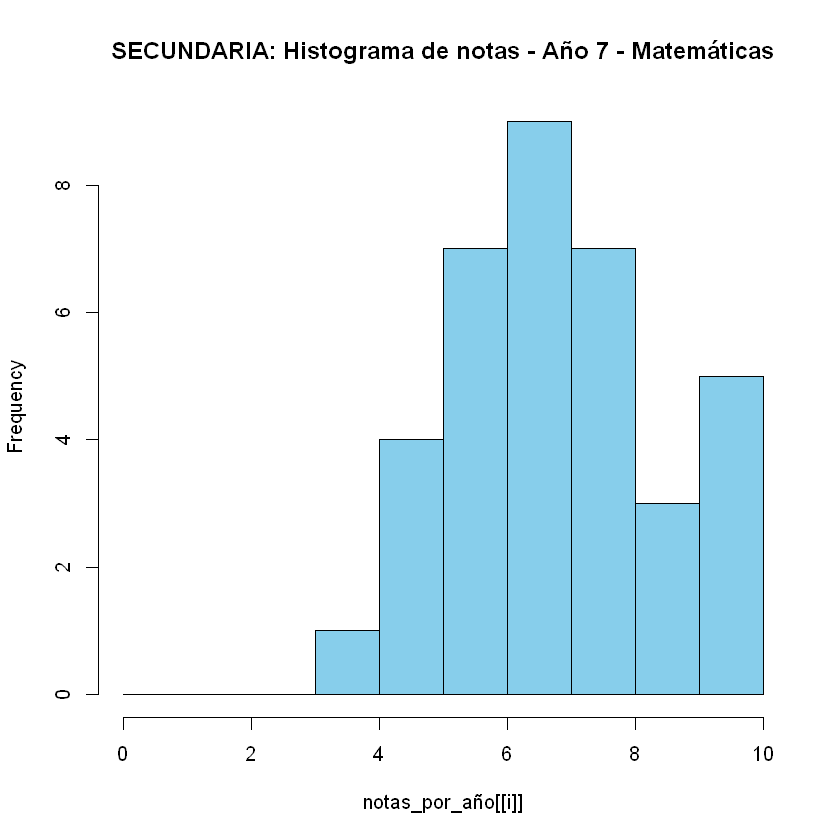

In [80]:
analizar_notas_matematica <- function(año) {
  # Filtrar los datos por el año correspondiente y la asignatura de Matemáticas
  datos_año_matematica <- SEC_NOTAS_MODIF[SEC_NOTAS_MODIF$Año_cursado == año & SEC_NOTAS_MODIF$asignatura == "MATEMATICA", ]
  
  # Verificar si hay datos disponibles para el año y la materia
  if (nrow(datos_año_matematica) > 0) {
    # Obtener las notas de Matemáticas del año correspondiente
    notas <- datos_año_matematica$Promedio
    
    # Imprimir los datos del año
    cat("Datos del año", año, ":\n")
    
    # Calcular la moda
    # Obtener la tabla de frecuencias
    tabla_frecuencias <- table(notas)
    
    modas <- names(tabla_frecuencias[tabla_frecuencias == max(tabla_frecuencias)])
    
    # Imprimir el valor de la moda
    cat("Valor(es) de la moda:", modas, "\n")
    
    # Verificar si hay más de una moda
    if (length(modas) > 1) {
      cat("b) Hay más de una moda.\n")
    } else {
      cat("b) La distribución es unimodal.\n")
    }
    # Determinar la simetría de la distribución
    simetria <- ifelse(skewness(notas) == 0, "simétrica",
                       ifelse(skewness(notas) > 0, "asimétrica a la derecha",
                              "asimétrica a la izquierda"))
    cat("c) La distribución es", simetria, "\n")
    
    # Verificar si hay asimetría y su dirección
    if (simetria != "simétrica") {
      cat("d) La asimetría es", ifelse(skewness(notas) > 0, "a la derecha.", "a la izquierda."), "\n")
    }
    
    # Calcular el rango de variación de los datos
    rango <- range(notas)
    
    # Calcular la media
    media <- mean(notas)
    
    # Imprimir el rango y la media
    cat("e) El rango de variación de las notas es:", rango[2], "-", rango[1], "\n")
    cat("   La media de las notas es:", media, "\n")
    
    # Calcular el rango intercuartílico
    rango_intercuartilico <- IQR(notas)
    
    # Verificar la dispersión de los datos
    if (rango_intercuartilico == 0) {
      cat("f) Los datos están concentrados alrededor de un único valor.\n")
    } else {
      cat("f) Los datos están dispersos alrededor de la media.\n")
    }
    
    # Calcular los límites para considerar valores atípicos
    limite_inferior <- quantile(notas, 0.25) - 1.5 * rango_intercuartilico
    limite_superior <- quantile(notas, 0.75) + 1.5 * rango_intercuartilico
    
    # Identificar datos atípicos
    datos_atipicos <- notas[notas < limite_inferior | notas > limite_superior]
    
    # Imprimir información sobre datos atípicos
    if (length(datos_atipicos) > 0) {
      cat("   Hay datos atípicos en relación a la mayoría de los datos.\n")
      cat("   Los valores atípicos están en el rango:", min(datos_atipicos), "-", max(datos_atipicos), "\n")
    } else {
      cat("   No hay datos atípicos en relación a la mayoría de los datos.\n")
    }
    
    # Agregar una pausa para separar los resultados del año siguiente
    cat("\n\n")
    
    # Retornar las notas del año
    return(notas)
  } else {
    cat("No hay datos disponibles para el año", año, "y la materia de Matemáticas.\n")
    return(NULL)
  }
}

# Crear un vector para almacenar las notas de cada año
notas_por_año <- list()

# Realizar el análisis para cada año del primero al sexto y almacenar las notas
for (i in 1:7) {
  notas_por_año[[i]] <- analizar_notas_matematica(i)
}

# Crear los histogramas para cada año
for (i in 1:7) {
  if (!is.null(notas_por_año[[i]])) {
    
    # Definir los intervalos de clase manualmente
    breaks <- seq(0, 10, by = 1)
    
    # Crear el histograma de frecuencias absolutas con los intervalos de clase definidos manualmente
    hist(notas_por_año[[i]], breaks = breaks, main = paste("SECUNDARIA: Histograma de notas - Año", i, "- Matemáticas"), col = "skyblue")
    
    filename <- paste("MATEMATICA: Histograma_Año_", i, ".png", sep = "")
    dev.copy(png, filename)
    dev.off()
  }
}

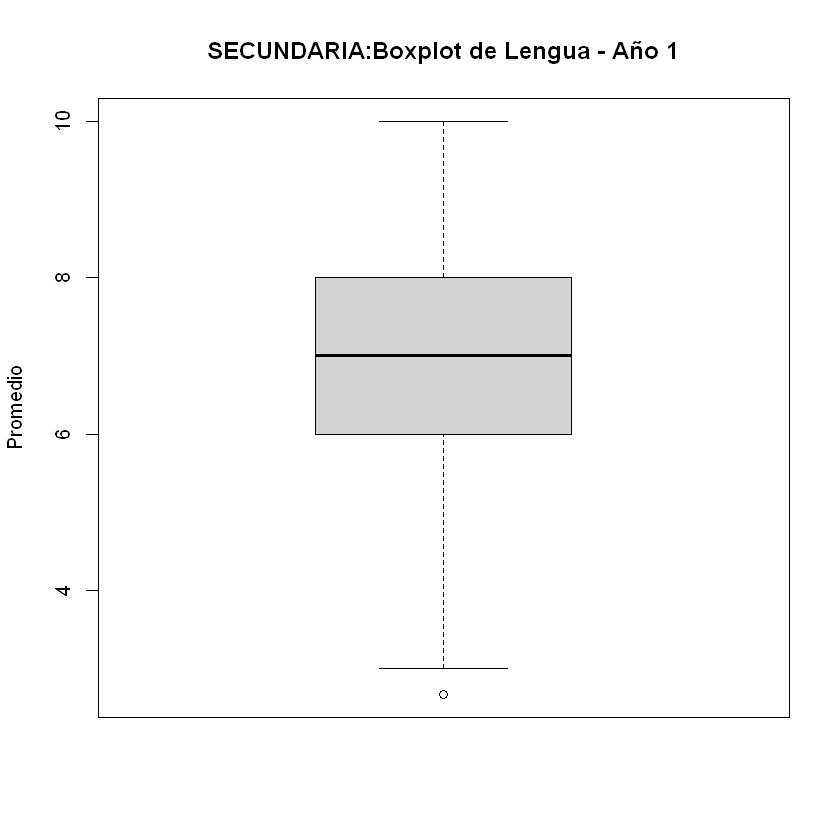

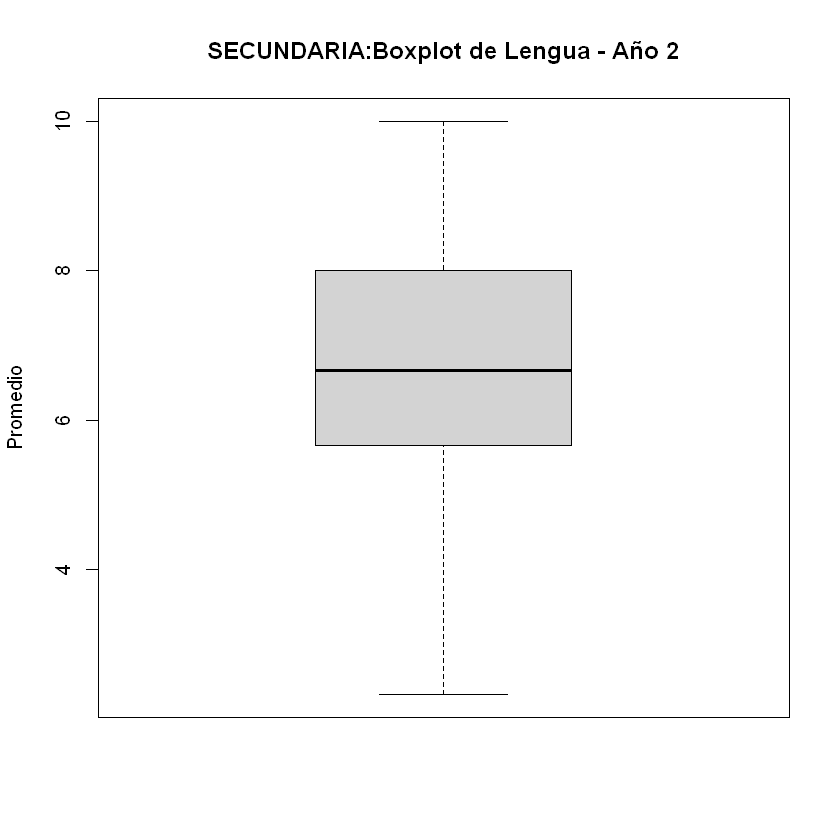

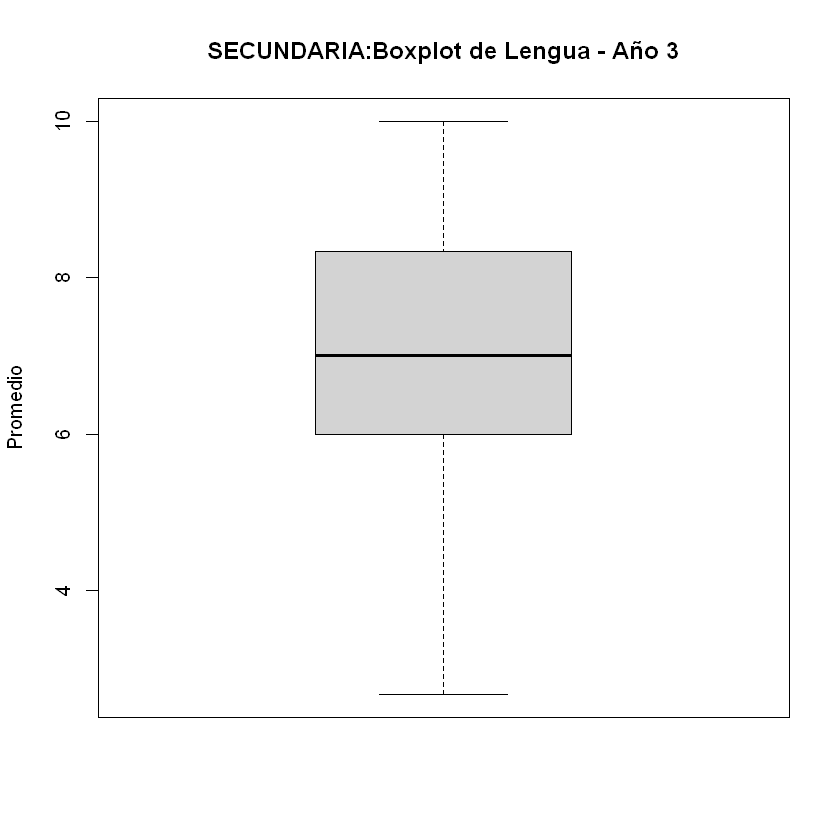

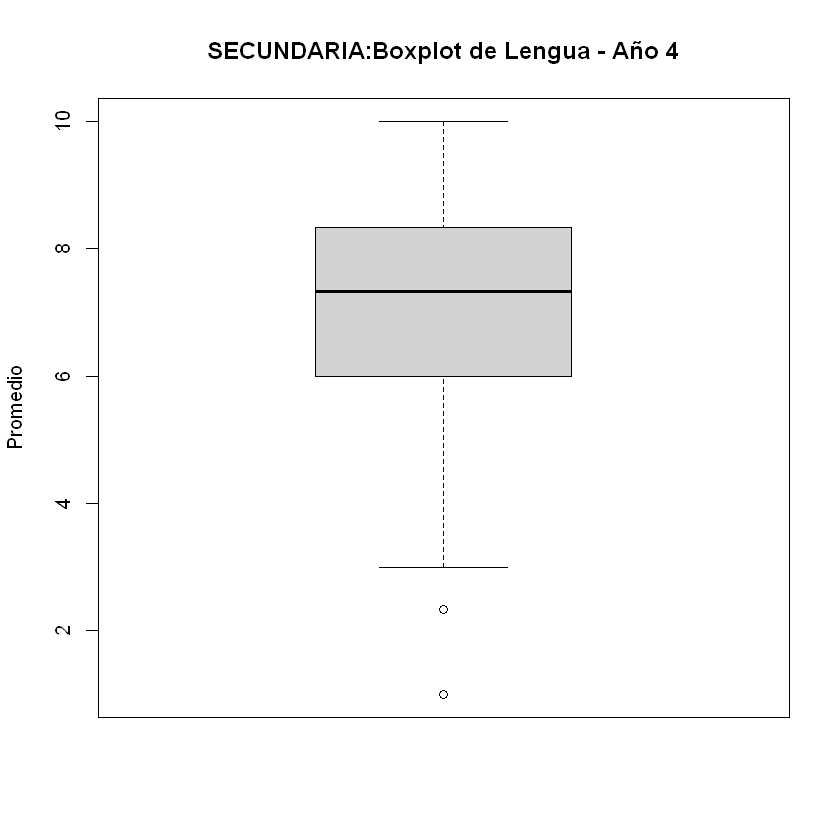

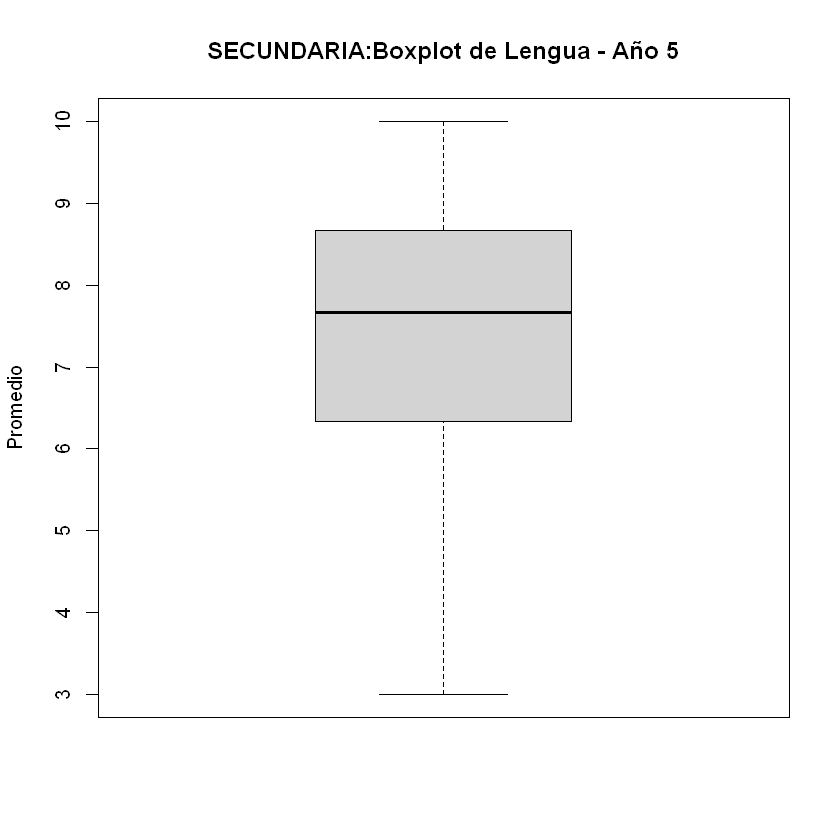

Resultados para el año 1 :
  Rango de variación de los datos (Máximo - Mínimo): 10 - 2.67 = 7.33 
  La distribución es asimétrica a la derecha 
  Media de los datos: 7.022064 
  Mediana de los datos: 7 
  Rango intercuartílico: 2 
  Cuartiles: 6 7 8 
  Límite superior para considerar valores atípicos: 11 
  Cantidad de datos atípicos: 0 
  ¿El rendimiento fue óptimo?: Sí 

Resultados para el año 2 :
  Rango de variación de los datos (Máximo - Mínimo): 10 - 2.33 = 7.67 
  La distribución es asimétrica a la izquierda 
  Media de los datos: 6.837879 
  Mediana de los datos: 6.67 
  Rango intercuartílico: 2.33 
  Cuartiles: 5.67 6.67 8 
  Límite superior para considerar valores atípicos: 11.495 
  Cantidad de datos atípicos: 0 
  ¿El rendimiento fue óptimo?: Sí 

Resultados para el año 3 :
  Rango de variación de los datos (Máximo - Mínimo): 10 - 2.67 = 7.33 
  La distribución es asimétrica a la izquierda 
  Media de los datos: 7.028865 
  Mediana de los datos: 7 
  Rango intercuartílico: 

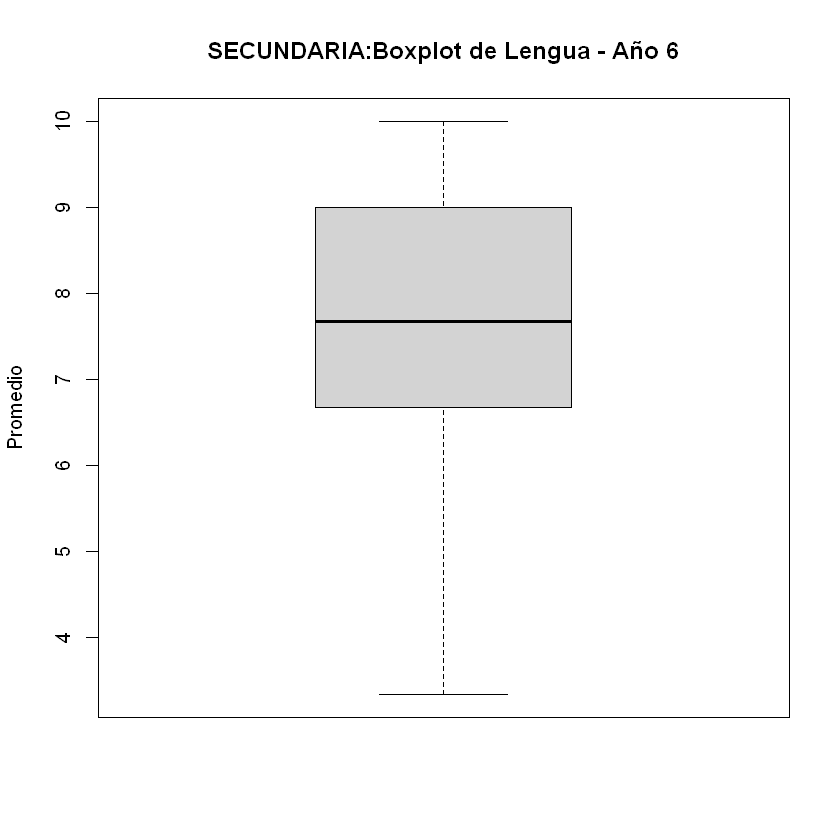

In [81]:
library(moments)

# Definir una lista para almacenar los resultados de cada año
resultados_por_año <- list()

# Realizar el análisis y generar los gráficos para cada año
for (i in 1:6) {
  # Filtrar los datos por el año correspondiente
  datos_año <- SEC_NOTAS_MODIF[SEC_NOTAS_MODIF$Año_cursado == i & SEC_NOTAS_MODIF$asignatura == "LENGUA", ]
  
  # Calcular el rango de variación de los datos
  rango <- range(datos_año$Promedio)
  
  # Determinar si la distribución es simétrica y el tipo de asimetría
  coeficiente_asimetria <- skewness(datos_año$Promedio)
  simetria <- ifelse(coeficiente_asimetria == 0, "simétrica",
                     ifelse(coeficiente_asimetria > 0, "asimétrica a la derecha",
                            "asimétrica a la izquierda"))
  
  # Graficar el boxplot
  boxplot(datos_año$Promedio,
          main = paste("SECUNDARIA:Boxplot de Lengua - Año", i),
          ylab = "Promedio",
          horizontal = FALSE)  
  
  # Calcular la media
  media <- mean(datos_año$Promedio)
  
  # Calcular la mediana
  mediana <- median(datos_año$Promedio)
  
  # Calcular el rango intercuartílico
  rango_intercuartilico <- IQR(datos_año$Promedio)
  
  # Calcular los cuartiles
  cuartiles <- quantile(datos_año$Promedio, c(0.25, 0.5, 0.75))
  
  # Calcular el límite superior de los valores atípicos
  limite_superior_atipicos <- cuartiles[3] + 1.5 * rango_intercuartilico
  
  # Contar la cantidad de datos atípicos
  datos_atipicos <- datos_año$Promedio[datos_año$Promedio > limite_superior_atipicos]
  
  # Evaluar si el rendimiento fue óptimo
  rendimiento_optimo <- ifelse(mediana >= 6, "Sí", "No")
  
  # Almacenar los resultados en la lista
  resultados_por_año[[paste("Año", i)]] <- list(
    Rango = rango,
    Simetría = simetria,
    Media = media,
    Mediana = mediana,
    RangoIntercuartilico = rango_intercuartilico,
    Cuartiles = cuartiles,
    LimiteSuperiorAtipicos = limite_superior_atipicos,
    CantidadDatosAtipicos = length(datos_atipicos),
    RendimientoOptimo = rendimiento_optimo
  )
}

# Imprimir los resultados para cada año
for (i in 1:6) {
  cat("Resultados para el año", i, ":\n")
  cat("  Rango de variación de los datos (Máximo - Mínimo):", resultados_por_año[[paste("Año", i)]]$Rango[2], "-", resultados_por_año[[paste("Año", i)]]$Rango[1], "=", resultados_por_año[[paste("Año", i)]]$Rango[2] - resultados_por_año[[paste("Año", i)]]$Rango[1], "\n")
  cat("  La distribución es", resultados_por_año[[paste("Año", i)]]$Simetría, "\n")
  cat("  Media de los datos:", resultados_por_año[[paste("Año", i)]]$Media, "\n")
  cat("  Mediana de los datos:", resultados_por_año[[paste("Año", i)]]$Mediana, "\n")
  cat("  Rango intercuartílico:", resultados_por_año[[paste("Año", i)]]$RangoIntercuartilico, "\n")
  cat("  Cuartiles:", resultados_por_año[[paste("Año", i)]]$Cuartiles, "\n")
  cat("  Límite superior para considerar valores atípicos:", resultados_por_año[[paste("Año", i)]]$LimiteSuperiorAtipicos, "\n")
  cat("  Cantidad de datos atípicos:", resultados_por_año[[paste("Año", i)]]$CantidadDatosAtipicos, "\n")
  cat("  ¿El rendimiento fue óptimo?:", resultados_por_año[[paste("Año", i)]]$RendimientoOptimo, "\n\n")
}




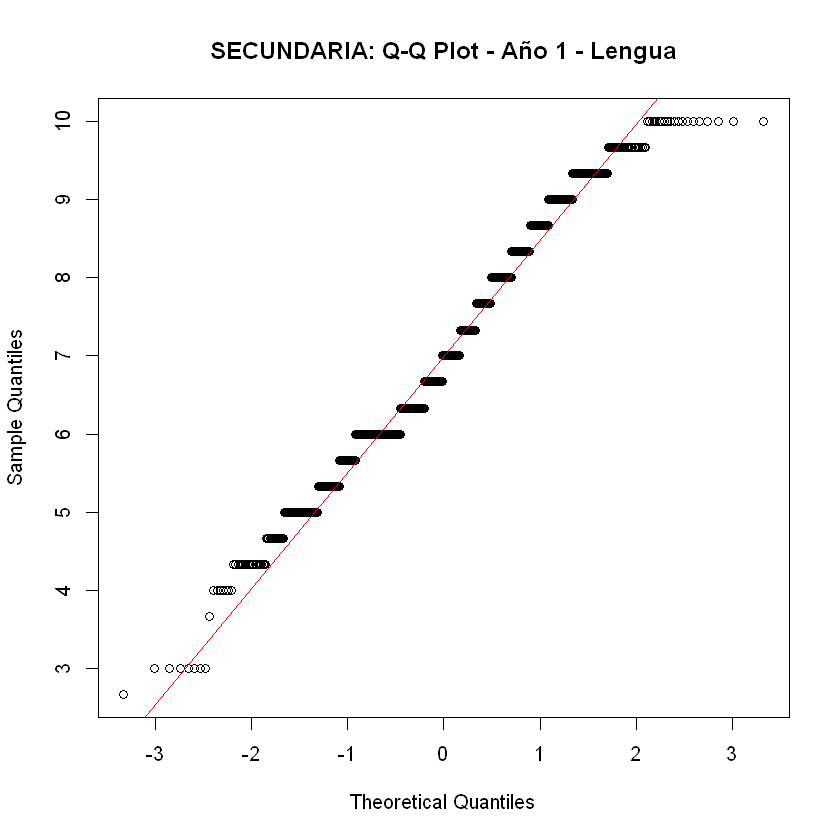

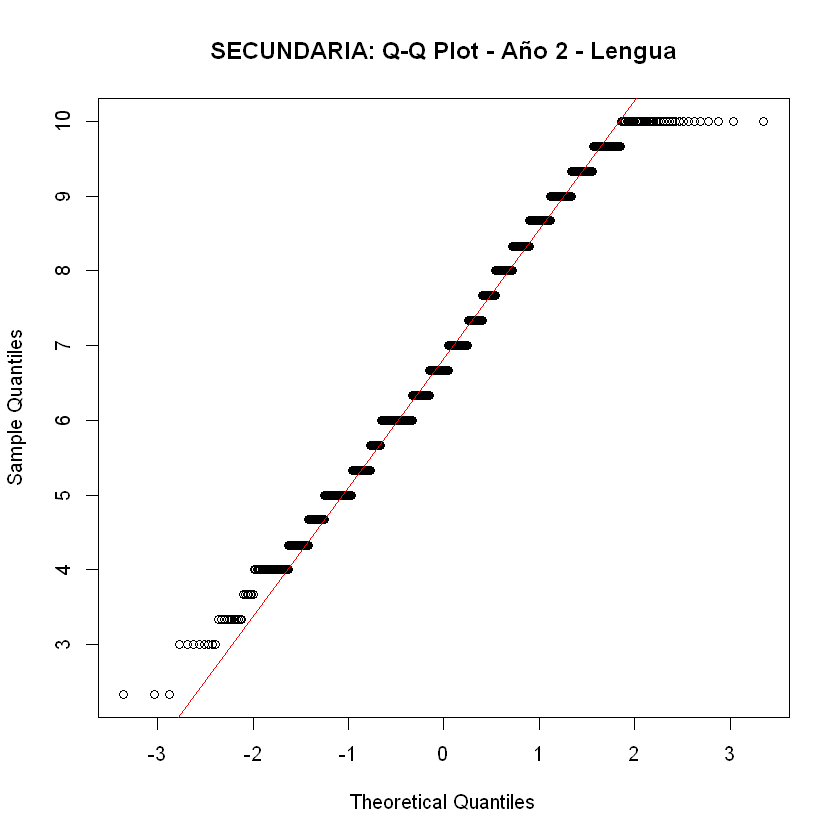

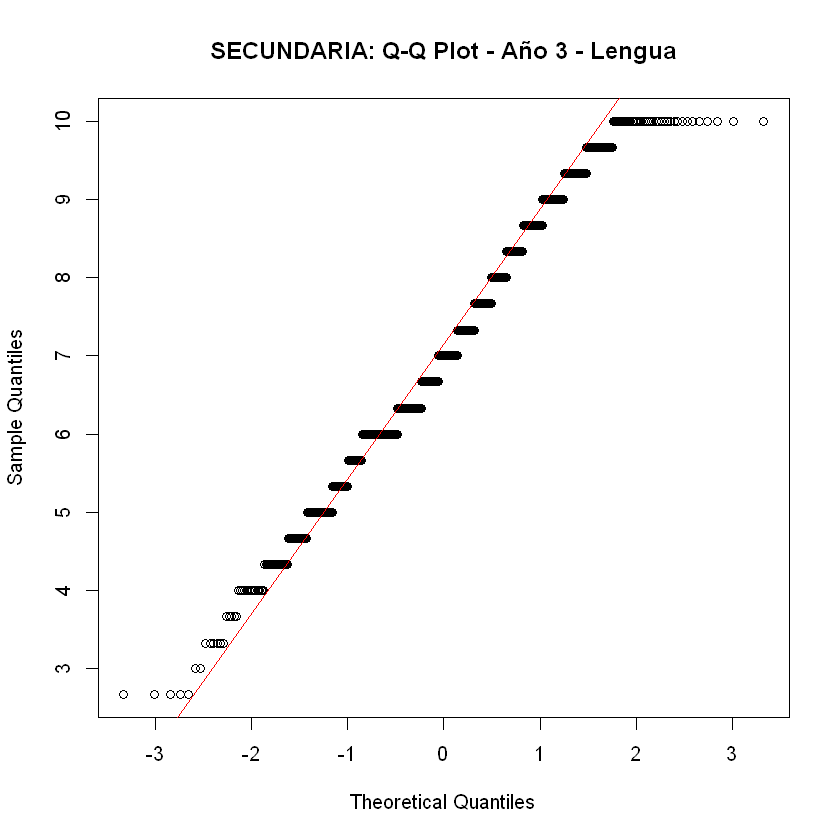

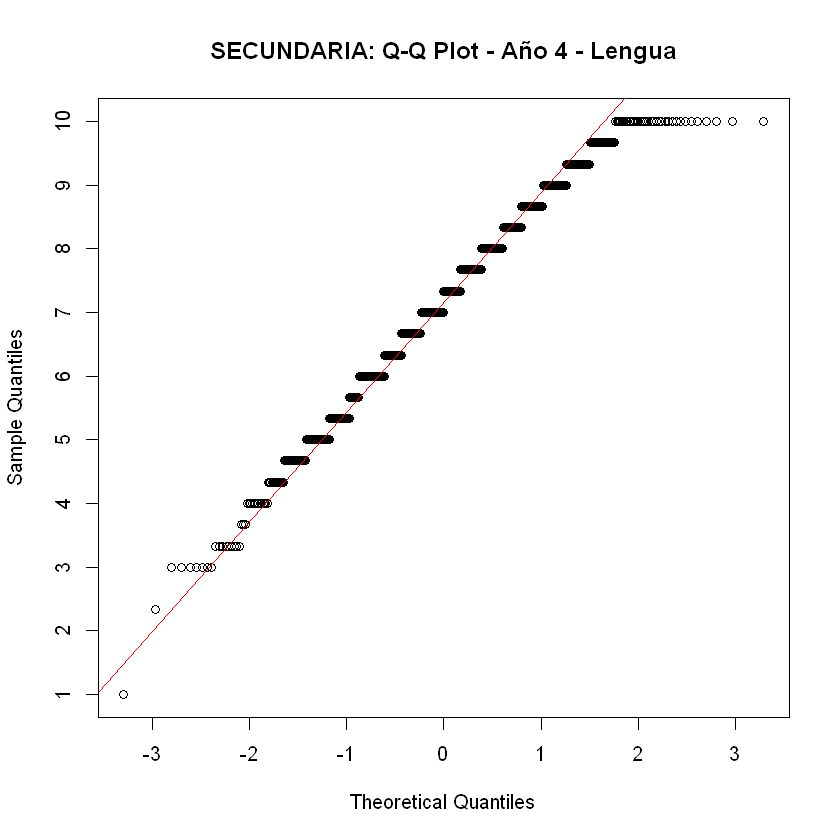

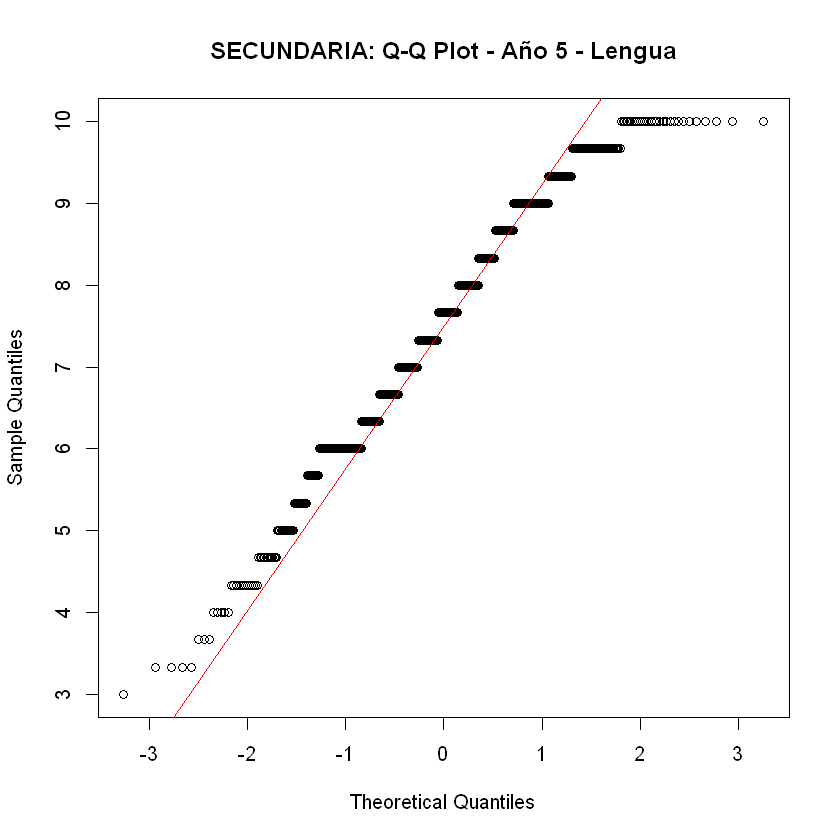

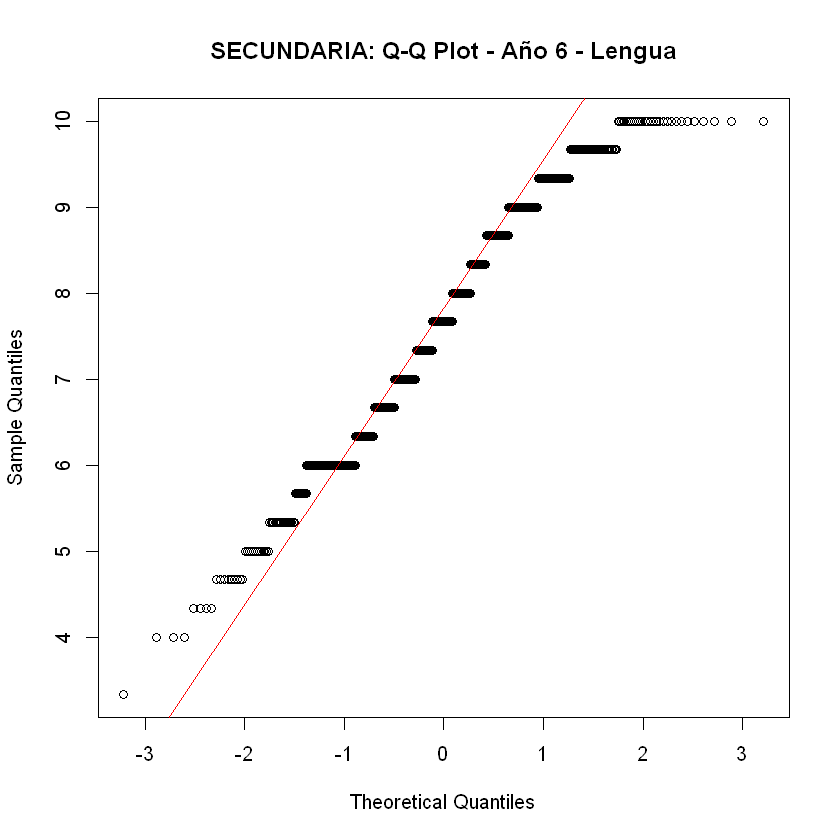

In [82]:
for (i in 1:6) {
  # Filtrar los datos por el año correspondiente y la materia de Lengua
  datos_año_lengua <- SEC_NOTAS_MODIF[SEC_NOTAS_MODIF$Año_cursado == i & SEC_NOTAS_MODIF$asignatura == "LENGUA", ]
  
  # Verificar si hay datos disponibles para el año y la materia
  if (nrow(datos_año_lengua) > 0) {
    # Obtener los valores de la variable a graficar en el Q-Q plot
    valores <- datos_año_lengua$Promedio
    
    # Crear el Q-Q plot con el título adecuado
    qqnorm(valores, main = paste("SECUNDARIA: Q-Q Plot - Año", i, "- Lengua"))
    qqline(valores, col = "red")  # Añadir la línea de referencia
    
    # Obtener los límites del eje Y
    limite_inf <- floor(min(valores))
    limite_sup <- ceiling(max(valores))
    
    # Modificar los saltos de los números en el eje Y (de forma consecutiva)
    valores_eje_y <- seq(limite_inf, limite_sup, by = 1)
    
    # Agregar las marcas en el eje Y
    axis(2, at = valores_eje_y)

  } else {
    cat("No hay datos disponibles para el año", i, "y la materia de Lengua.\n")
  }
}

Datos del año 1 :
Valor(es) de la moda: 6 
b) La distribución es unimodal.
c) La distribución es asimétrica a la derecha 
d) La asimetría es a la derecha. 
e) El rango de variación de las notas es: 10 - 2.67 
   La media de las notas es: 7.022064 
f) Los datos están dispersos alrededor de la media.
   Hay datos atípicos en relación a la mayoría de los datos.
   Los valores atípicos están en el rango: 2.67 - 2.67 


Datos del año 2 :
Valor(es) de la moda: 6 
b) La distribución es unimodal.
c) La distribución es asimétrica a la izquierda 
d) La asimetría es a la izquierda. 
e) El rango de variación de las notas es: 10 - 2.33 
   La media de las notas es: 6.837879 
f) Los datos están dispersos alrededor de la media.
   No hay datos atípicos en relación a la mayoría de los datos.


Datos del año 3 :
Valor(es) de la moda: 6 
b) La distribución es unimodal.
c) La distribución es asimétrica a la izquierda 
d) La asimetría es a la izquierda. 
e) El rango de variación de las notas es: 10 - 2.67

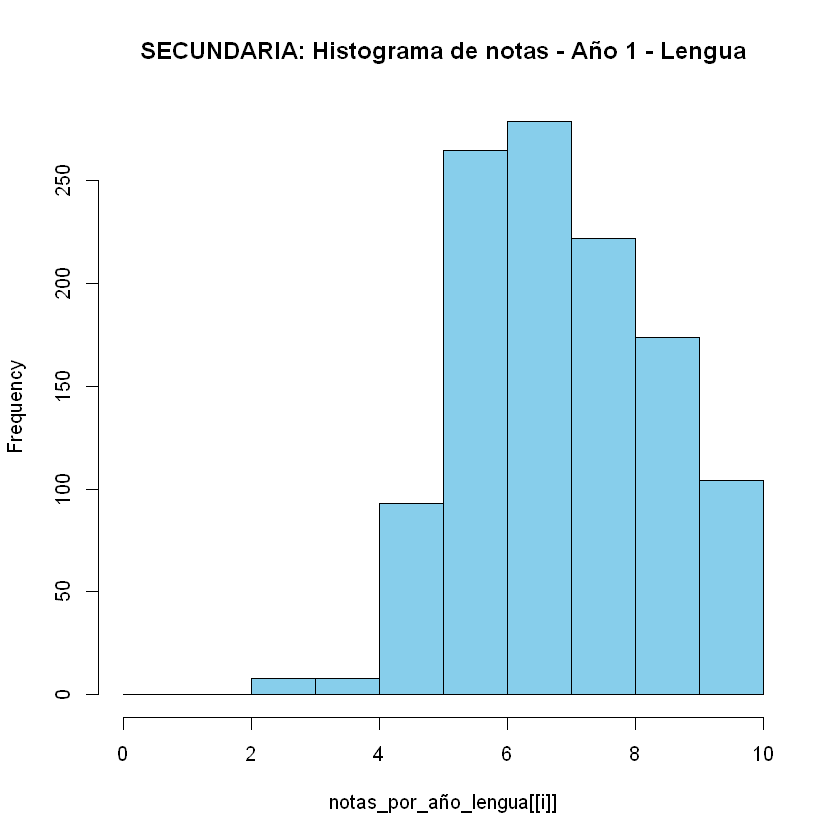

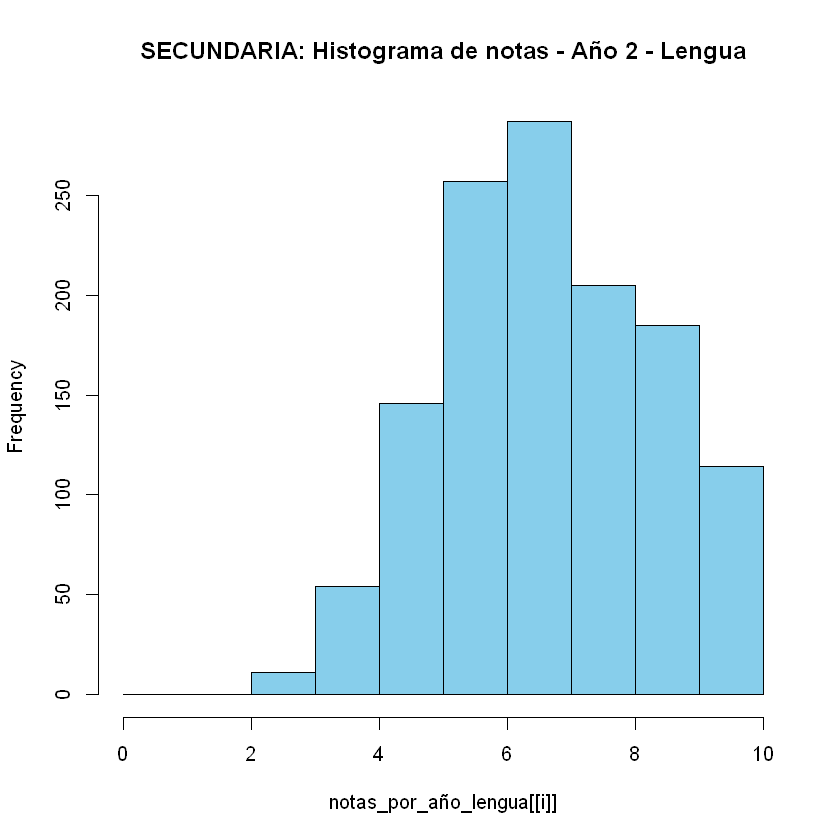

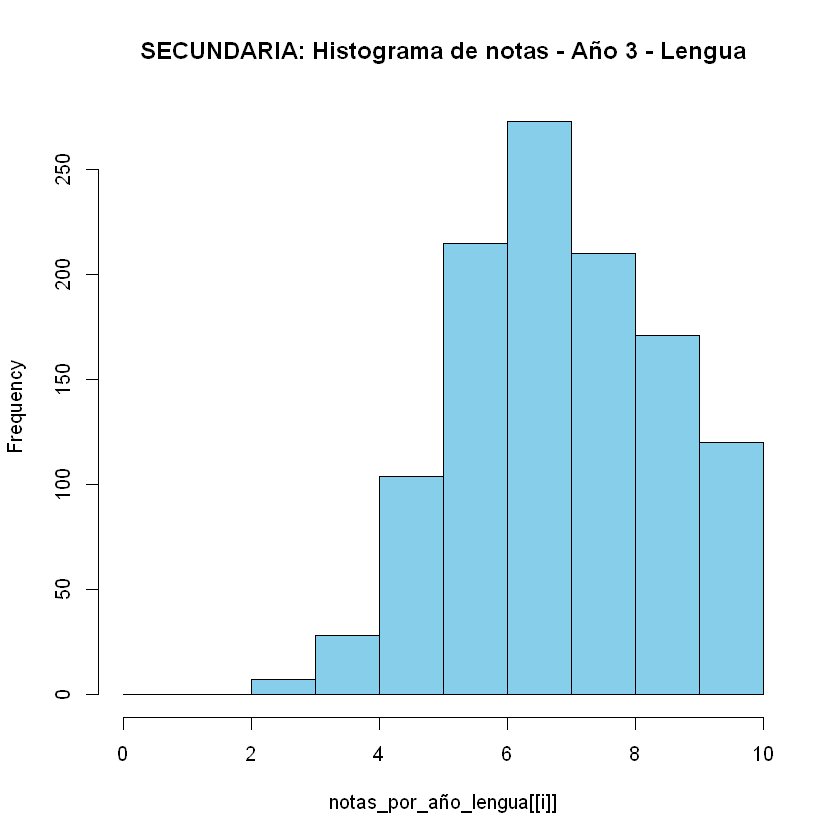

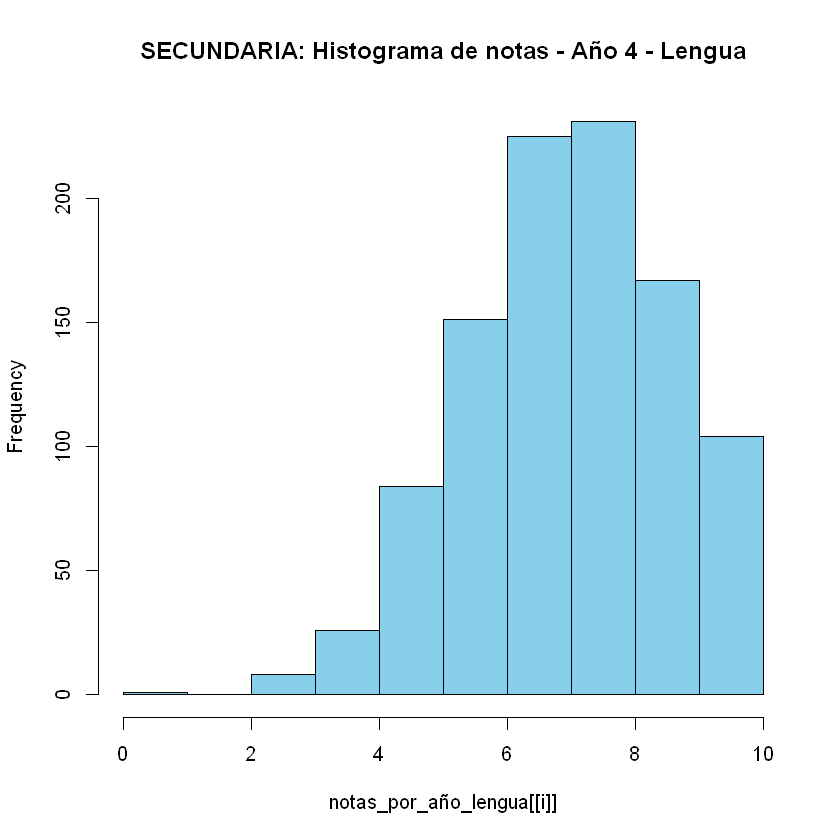

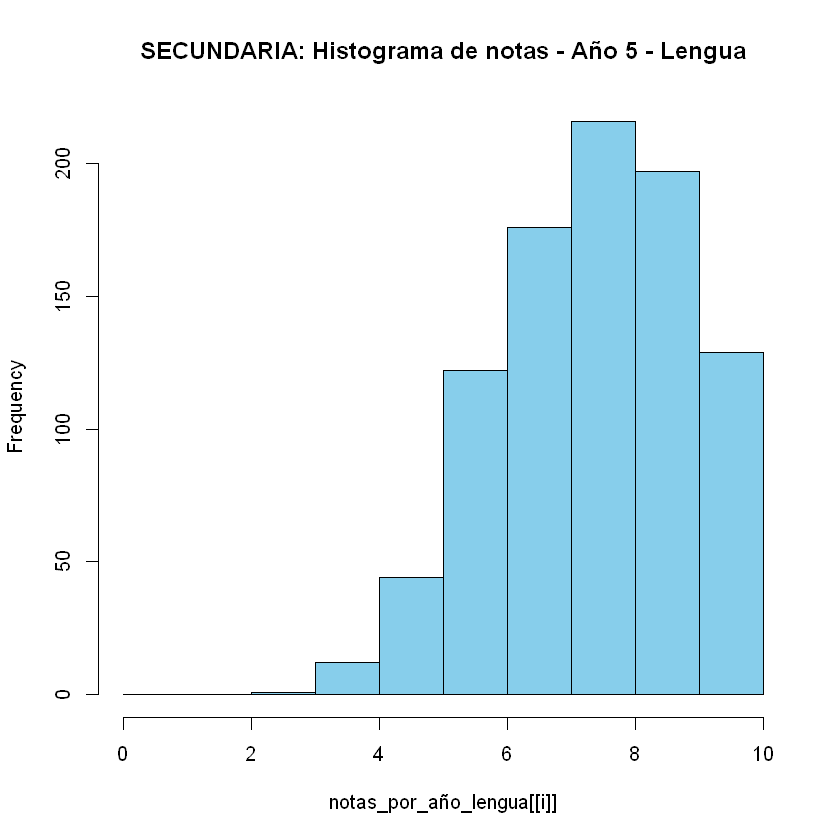

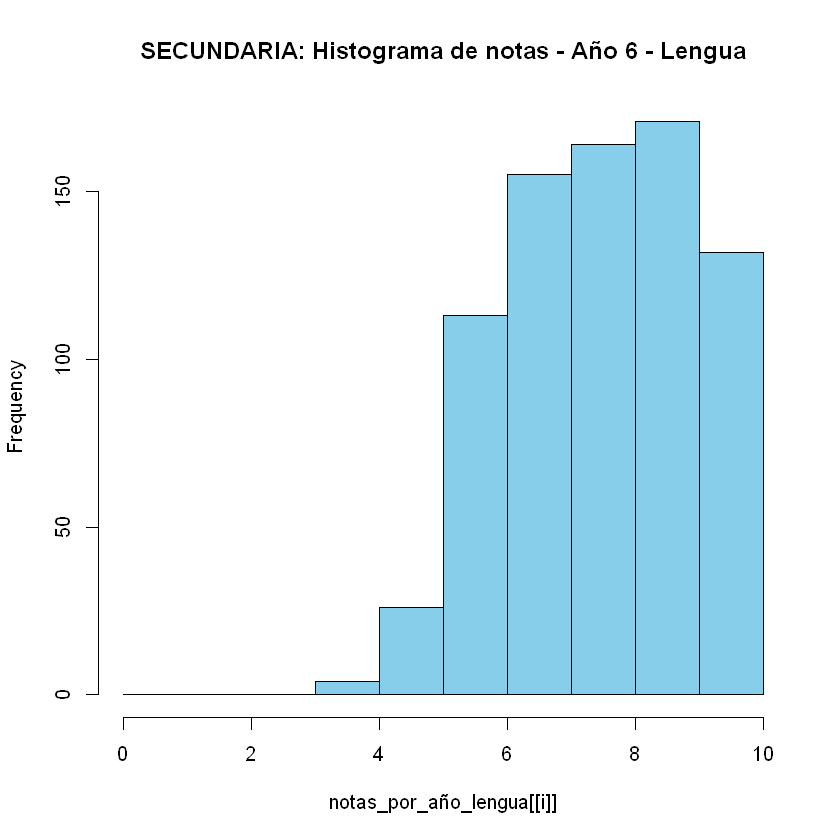

In [83]:
analizar_notas_lengua <- function(año) {
  # Filtrar los datos por el año correspondiente y la asignatura de Lengua
  datos_año_lengua <- SEC_NOTAS_MODIF[SEC_NOTAS_MODIF$Año_cursado == año & SEC_NOTAS_MODIF$asignatura == "LENGUA", ]
  
  # Verificar si hay datos disponibles para el año y la materia
  if (nrow(datos_año_lengua) > 0) {
    # Obtener las notas de Lengua del año correspondiente
    notas <- datos_año_lengua$Promedio
    
    # Imprimir los datos del año
    cat("Datos del año", año, ":\n")
    
    # Calcular la moda
    # Obtener la tabla de frecuencias
    tabla_frecuencias <- table(notas)
    
    modas <- names(tabla_frecuencias[tabla_frecuencias == max(tabla_frecuencias)])
    
    # Imprimir el valor de la moda
    cat("Valor(es) de la moda:", modas, "\n")
    
    # Verificar si hay más de una moda
    if (length(modas) > 1) {
      cat("b) Hay más de una moda.\n")
    } else {
      cat("b) La distribución es unimodal.\n")
    }
    
    # Determinar la simetría de la distribución
    simetria <- ifelse(skewness(notas) == 0, "simétrica",
                       ifelse(skewness(notas) > 0, "asimétrica a la derecha",
                              "asimétrica a la izquierda"))
    cat("c) La distribución es", simetria, "\n")
    
    # Verificar si hay asimetría y su dirección
    if (simetria != "simétrica") {
      cat("d) La asimetría es", ifelse(skewness(notas) > 0, "a la derecha.", "a la izquierda."), "\n")
    }
    
    # Calcular el rango de variación de los datos
    rango <- range(notas)
    
    # Calcular la media
    media <- mean(notas)
    
    # Imprimir el rango y la media
    cat("e) El rango de variación de las notas es:", rango[2], "-", rango[1], "\n")
    cat("   La media de las notas es:", media, "\n")
    
    # Calcular el rango intercuartílico
    rango_intercuartilico <- IQR(notas)
    
    # Verificar la dispersión de los datos
    if (rango_intercuartilico == 0) {
      cat("f) Los datos están concentrados alrededor de un único valor.\n")
    } else {
      cat("f) Los datos están dispersos alrededor de la media.\n")
    }
    
    # Calcular los límites para considerar valores atípicos
    limite_inferior <- quantile(notas, 0.25) - 1.5 * rango_intercuartilico
    limite_superior <- quantile(notas, 0.75) + 1.5 * rango_intercuartilico
    
    # Identificar datos atípicos
    datos_atipicos <- notas[notas < limite_inferior | notas > limite_superior]
    
    # Imprimir información sobre datos atípicos
    if (length(datos_atipicos) > 0) {
      cat("   Hay datos atípicos en relación a la mayoría de los datos.\n")
      cat("   Los valores atípicos están en el rango:", min(datos_atipicos), "-", max(datos_atipicos), "\n")
    } else {
      cat("   No hay datos atípicos en relación a la mayoría de los datos.\n")
    }
    
    # Agregar una pausa para separar los resultados del año siguiente
    cat("\n\n")
    
    # Retornar las notas del año
    return(notas)
  } else {
    cat("No hay datos disponibles para el año", año, "y la materia de Lengua.\n")
    return(NULL)
  }
}

# Crear una lista para almacenar las notas de cada año
notas_por_año_lengua <- list()

# Realizar el análisis para cada año del primero al séptimo y almacenar las notas
for (i in 1:6) {
  notas <- analizar_notas_lengua(i)
  if (!is.null(notas)) {
    notas_por_año_lengua[[i]] <- notas
  }
}

# Crear los histogramas para cada año
for (i in 1:6) {
  if (!is.null(notas_por_año_lengua[[i]])) {
    
    # Definir los intervalos de clase manualmente
    breaks <- seq(0, 10, by = 1)
    
    # Crear el histograma de frecuencias absolutas con los intervalos de clase definidos manualmente
    hist(notas_por_año_lengua[[i]], breaks = breaks, main = paste("SECUNDARIA: Histograma de notas - Año", i, "- Lengua"), col = "skyblue")
    
    filename <- paste("LENGUA: Histograma_Año_", i, ".png", sep = "")
    dev.copy(png, filename)
    dev.off()
  } else {
    cat("No se generó el histograma para el año", i, "por falta de datos.\n")
  }
}

In [84]:
test_ks_or_shapiro_notas_lengua <- function(datos, año) {
  # Filtrar los datos por el año correspondiente y la asignatura de Lengua
  datos_año_lengua <- datos[datos$Año_cursado == año & datos$asignatura == "LENGUA", ]
  
  # Verificar si hay datos disponibles para el año y la materia
  if (nrow(datos_año_lengua) > 0) {
    # Obtener las notas de Lengua del año correspondiente
    notas <- datos_año_lengua$Promedio
    
    # Determinar el método de prueba a utilizar
    if (length(notas) <= 50) {
      # Si la muestra es menor o igual a 50, utilizar el test de Shapiro-Wilk
      test_name <- "Shapiro-Wilk"
      test_result <- suppressWarnings({
        shapiro.test(notas)
      })
    } else {
      # Si la muestra es mayor a 50, utilizar el test de Kolmogorov-Smirnov
      test_name <- "Kolmogorov-Smirnov"
      test_result <- suppressWarnings({
        ks.test(notas, "pnorm")
      })
    }
    
    # Imprimir el resultado del test
    cat("Test de", test_name, "para las notas de Lengua - Año", año, "\n")
    print(test_result)
  } else {
    cat("No hay datos disponibles para el año", año, "y la materia de Lengua.\n")
  }
}

# Realizar el test de Shapiro-Wilk o Kolmogorov-Smirnov para cada año del primero al sexto
for (i in 1:6) {
  test_ks_or_shapiro_notas_lengua(SEC_NOTAS_MODIF, i)
}

Test de Kolmogorov-Smirnov para las notas de Lengua - Año 1 

	One-sample Kolmogorov-Smirnov test

data:  notas
D = 0.99778, p-value < 2.2e-16
alternative hypothesis: two-sided

Test de Kolmogorov-Smirnov para las notas de Lengua - Año 2 

	One-sample Kolmogorov-Smirnov test

data:  notas
D = 0.99627, p-value < 2.2e-16
alternative hypothesis: two-sided

Test de Kolmogorov-Smirnov para las notas de Lengua - Año 3 

	One-sample Kolmogorov-Smirnov test

data:  notas
D = 0.99621, p-value < 2.2e-16
alternative hypothesis: two-sided

Test de Kolmogorov-Smirnov para las notas de Lengua - Año 4 

	One-sample Kolmogorov-Smirnov test

data:  notas
D = 0.99664, p-value < 2.2e-16
alternative hypothesis: two-sided

Test de Kolmogorov-Smirnov para las notas de Lengua - Año 5 

	One-sample Kolmogorov-Smirnov test

data:  notas
D = 0.99865, p-value < 2.2e-16
alternative hypothesis: two-sided

Test de Kolmogorov-Smirnov para las notas de Lengua - Año 6 

	One-sample Kolmogorov-Smirnov test

data:  nota

In [85]:
test_ks_or_shapiro_notas_matematica <- function(datos, año) {
  # Filtrar los datos por el año correspondiente y la asignatura de Lengua
  datos_año_matematica <- datos[datos$Año_cursado == año & datos$asignatura == "MATEMATICA", ]
  
  # Verificar si hay datos disponibles para el año y la materia
  if (nrow(datos_año_matematica) > 0) {
    # Obtener las notas de Lengua del año correspondiente
    notas <- datos_año_lengua$Promedio
    
    # Determinar el método de prueba a utilizar
    if (length(notas) <= 50) {
      # Si la muestra es menor o igual a 50, utilizar el test de Shapiro-Wilk
      test_name <- "Shapiro-Wilk"
      test_result <- suppressWarnings({
        shapiro.test(notas)
      })
    } else {
      # Si la muestra es mayor a 50, utilizar el test de Kolmogorov-Smirnov
      test_name <- "Kolmogorov-Smirnov"
      test_result <- suppressWarnings({
        ks.test(notas, "pnorm")
      })
    }
    
    # Imprimir el resultado del test
    cat("Test de", test_name, "para las notas de matematica - Año", año, "\n")
    print(test_result)
  } else {
    cat("No hay datos disponibles para el año", año, "y la materia de matematica.\n")
  }
}

# Realizar el test de Shapiro-Wilk o Kolmogorov-Smirnov para cada año del primero al sexto
for (i in 1:6) {
  test_ks_or_shapiro_notas_matematica(SEC_NOTAS_MODIF, i)
}


Test de Kolmogorov-Smirnov para las notas de matematica - Año 1 

	One-sample Kolmogorov-Smirnov test

data:  notas
D = 0.99957, p-value < 2.2e-16
alternative hypothesis: two-sided

Test de Kolmogorov-Smirnov para las notas de matematica - Año 2 

	One-sample Kolmogorov-Smirnov test

data:  notas
D = 0.99957, p-value < 2.2e-16
alternative hypothesis: two-sided

Test de Kolmogorov-Smirnov para las notas de matematica - Año 3 

	One-sample Kolmogorov-Smirnov test

data:  notas
D = 0.99957, p-value < 2.2e-16
alternative hypothesis: two-sided

Test de Kolmogorov-Smirnov para las notas de matematica - Año 4 

	One-sample Kolmogorov-Smirnov test

data:  notas
D = 0.99957, p-value < 2.2e-16
alternative hypothesis: two-sided

Test de Kolmogorov-Smirnov para las notas de matematica - Año 5 

	One-sample Kolmogorov-Smirnov test

data:  notas
D = 0.99957, p-value < 2.2e-16
alternative hypothesis: two-sided

Test de Kolmogorov-Smirnov para las notas de matematica - Año 6 

	One-sample Kolmogorov-S

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.330   5.330   6.330   6.539   7.670  10.000 

Porcentaje de estudiantes con un promedio igual o menor a 4: 9.563994 %


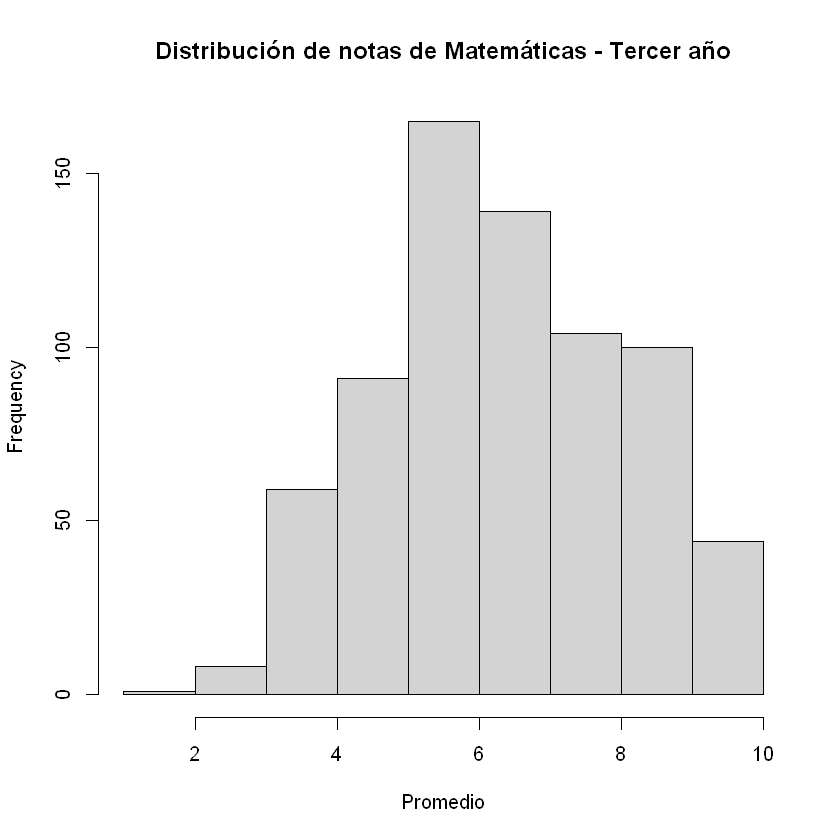

In [86]:
notas_matematicas_tercer_año <- SEC_NOTAS_MODIF %>%
  filter(asignatura == "MATEMATICA" & Año_cursado == 3 & EsPrivada == "N" & ModEnsenianza == "Comun")

# Calcular algunas estadísticas descriptivas
summary(notas_matematicas_tercer_año$Promedio)  # Resumen estadístico
hist(notas_matematicas_tercer_año$Promedio, main = "Distribución de notas de Matemáticas - Tercer año", xlab = "Promedio")  # Histograma

# Calcular el porcentaje de estudiantes con un promedio igual o menor a 4
porcentaje_promedio_menor_igual_4 <- mean(notas_matematicas_tercer_año$Promedio <= 4) * 100
cat("Porcentaje de estudiantes con un promedio igual o menor a 4:", porcentaje_promedio_menor_igual_4, "%\n")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   6.000   7.000   6.961   8.330  10.000 

Porcentaje de estudiantes con un promedio igual o menor a 4: 6.432749 %


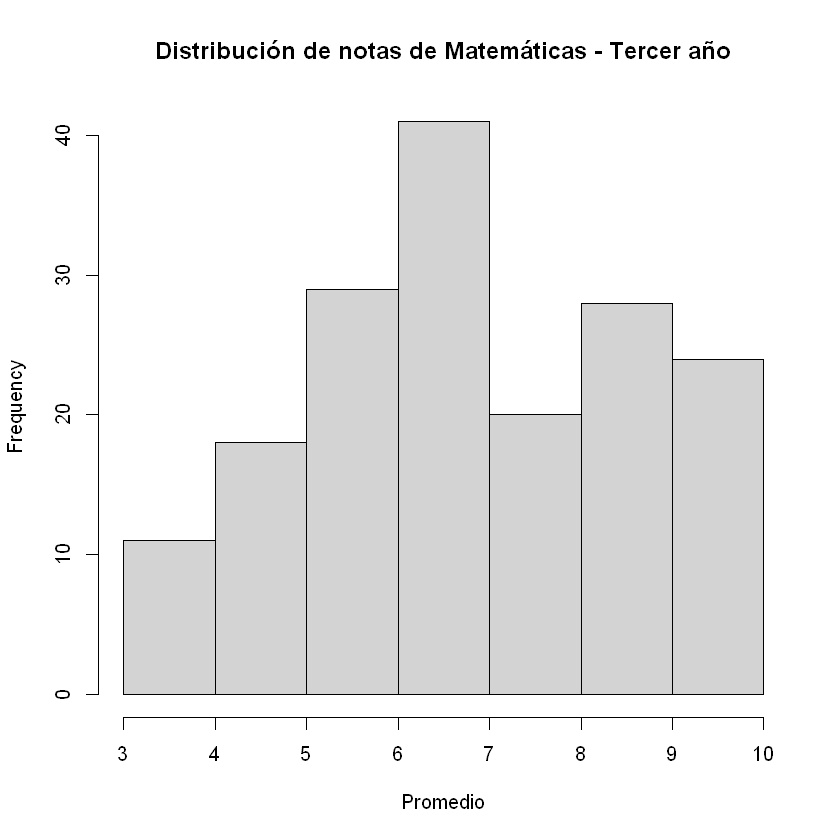

In [87]:
notas_matematicas_tercer_año <- SEC_NOTAS_MODIF %>%
  filter(asignatura == "MATEMATICA" & Año_cursado == 3 & EsPrivada == "S" & ModEnsenianza == "Comun")

# Calcular algunas estadísticas descriptivas
summary(notas_matematicas_tercer_año$Promedio)  # Resumen estadístico
hist(notas_matematicas_tercer_año$Promedio, main = "Distribución de notas de Matemáticas - Tercer año", xlab = "Promedio")  # Histograma

# Calcular el porcentaje de estudiantes con un promedio igual o menor a 4
porcentaje_promedio_menor_igual_4 <- mean(notas_matematicas_tercer_año$Promedio <= 4) * 100
cat("Porcentaje de estudiantes con un promedio igual o menor a 4:", porcentaje_promedio_menor_igual_4, "%\n")

Porcentaje de estudiantes con un promedio igual o menor a 4 (Modalidad Técnica): 11.44578 %


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.670   5.000   6.330   6.303   7.670  10.000 

Porcentaje de estudiantes con un promedio igual o menor a 4 (Modalidad Agrotécnica): 0 %


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.330   6.247   6.670   7.058   8.000  10.000 

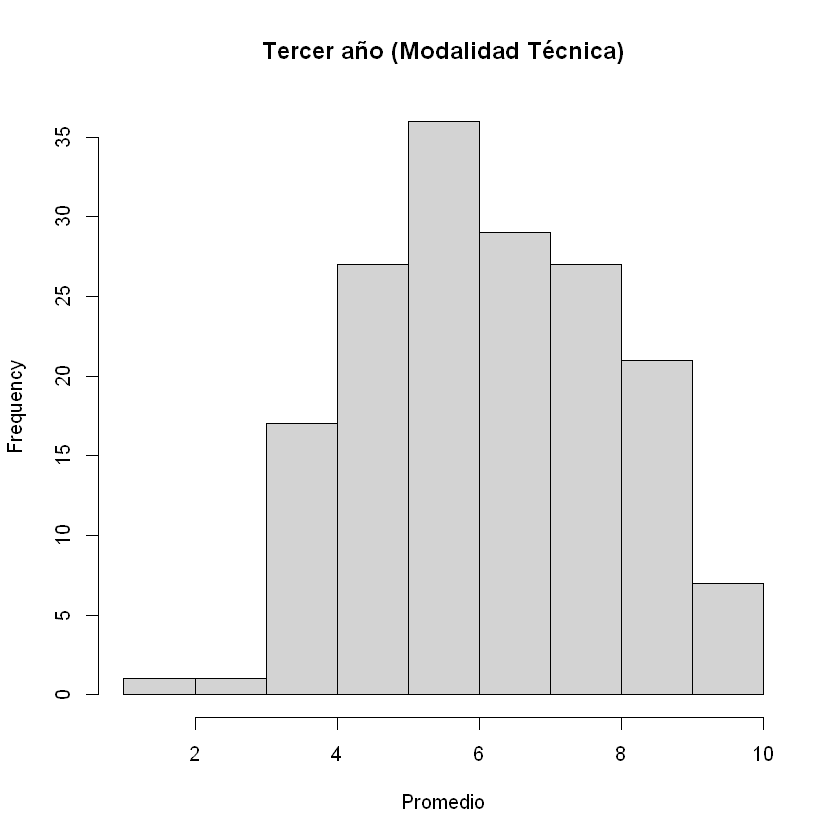

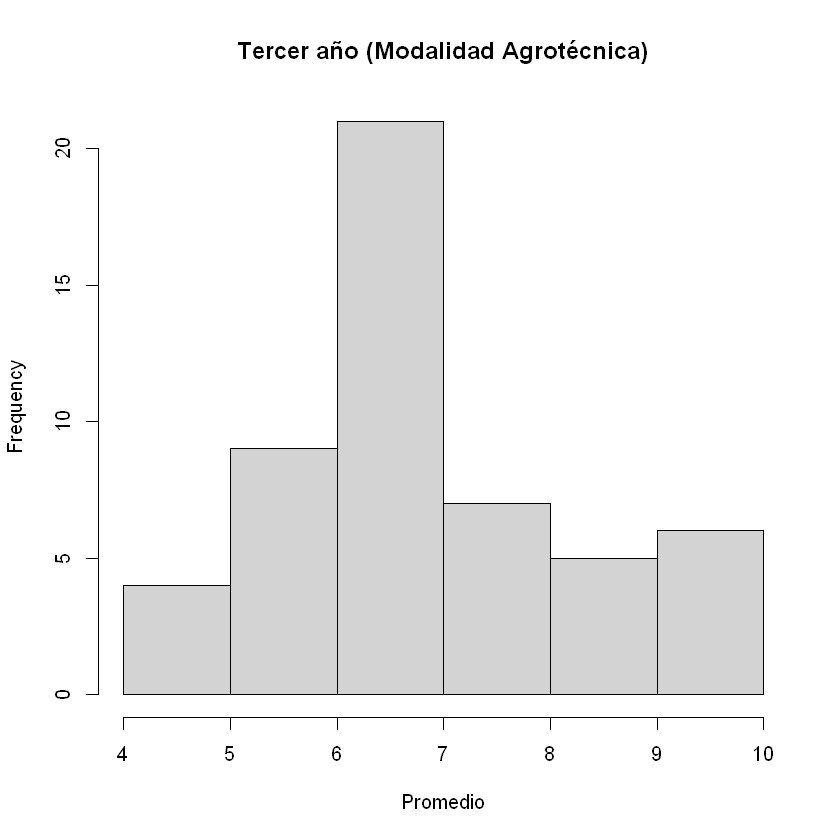

In [88]:
notas_matematicas_tercer_año_tecnica <- SEC_NOTAS_MODIF %>%
  filter(asignatura == "MATEMATICA" & Año_cursado == 3 & ModEnsenianza == "Técnica")

notas_matematicas_tercer_año_agrotecnica <- SEC_NOTAS_MODIF %>%
  filter(asignatura == "MATEMATICA" & Año_cursado == 3 & ModEnsenianza == "Agrotécnica")

porcentaje_promedio_menor_igual_4_tecnica <- mean(notas_matematicas_tercer_año_tecnica$Promedio <= 4) * 100
cat("Porcentaje de estudiantes con un promedio igual o menor a 4 (Modalidad Técnica):", porcentaje_promedio_menor_igual_4_tecnica, "%\n")

# Calcular algunas estadísticas descriptivas
summary(notas_matematicas_tercer_año_tecnica$Promedio)  # Resumen estadístico
hist(notas_matematicas_tercer_año_tecnica$Promedio, main = "Tercer año (Modalidad Técnica)", xlab = "Promedio")  # Histograma

# Calcular el porcentaje de estudiantes con un promedio igual o menor a 4
porcentaje_promedio_menor_igual_4_agrotecnica <- mean(notas_matematicas_tercer_año_agrotecnica$Promedio <= 4) * 100
cat("Porcentaje de estudiantes con un promedio igual o menor a 4 (Modalidad Agrotécnica):", porcentaje_promedio_menor_igual_4_agrotecnica, "%\n")

# Realizar lo mismo para la modalidad Agrotecnica
summary(notas_matematicas_tercer_año_agrotecnica$Promedio)  # Resumen estadístico
hist(notas_matematicas_tercer_año_agrotecnica$Promedio, main = "Tercer año (Modalidad Agrotécnica)", xlab = "Promedio")  # Histograma

In [89]:


# Paso 1: Identificar la escuela con mayor cantidad de estudiantes de Matemática
escuela_mayor <- SEC_NOTAS_MODIF %>%
  filter(asignatura == "MATEMATICA") %>%
  count(CUE) %>%
  top_n(1, n)

# Paso 2: Identificar una escuela que tenga al menos 8 estudiantes de Matemática
escuela_min_8_estudiantes <- SEC_NOTAS_MODIF %>%
  filter(asignatura == "MATEMATICA") %>%
  count(CUE) %>%
  filter(n >= 8) %>%
  slice(1)  # Tomar la primera fila que cumple con la condición

# Verificar los resultados
print("Escuela con mayor cantidad de estudiantes de Matemática:")
print(escuela_mayor)

print("Escuela con al menos 8 estudiantes de Matemática:")
print(escuela_min_8_estudiantes)


[1] "Escuela con mayor cantidad de estudiantes de Matemática:"
      CUE   n
1 9003342 648
[1] "Escuela con al menos 8 estudiantes de Matemática:"
      CUE  n
1 9000525 81


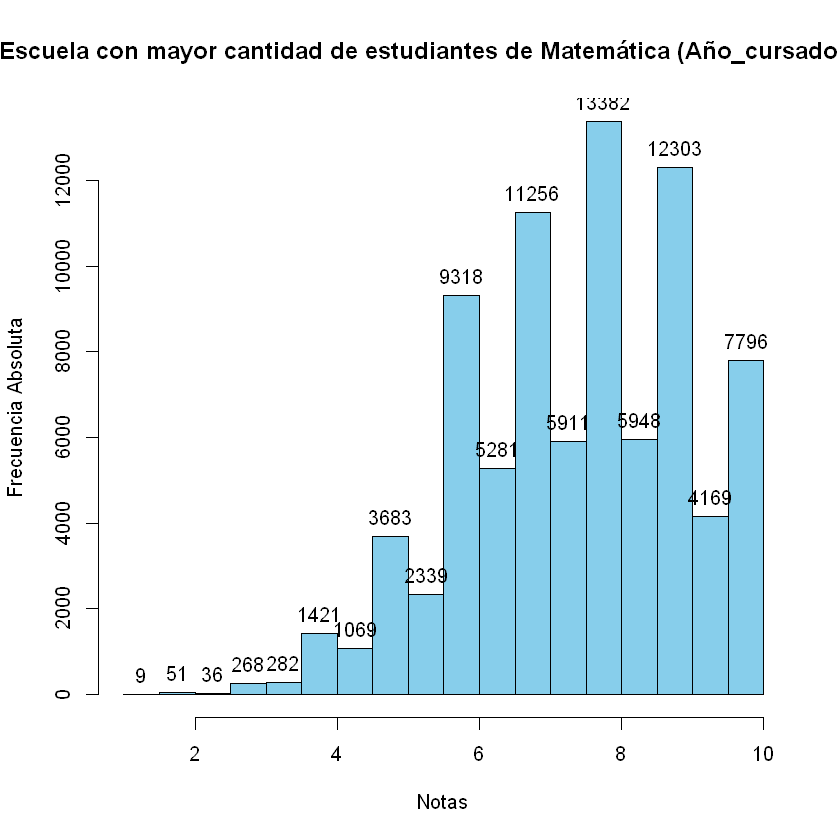

CUE     Departamento EsPrivada turno  Documento
1     9009150 URUGUAY      N         NOCHE  43021949 
2     9009150 URUGUAY      N         NOCHE  43021949 
3     9009150 URUGUAY      N         NOCHE  43021949 
4     9009150 URUGUAY      N         NOCHE  43021949 
5     9009150 URUGUAY      N         NOCHE  43021949 
6     9009150 URUGUAY      N         NOCHE  43021949 
7     9009150 URUGUAY      N         NOCHE  43021949 
8     9009150 URUGUAY      N         NOCHE  43021949 
9     9009150 URUGUAY      N         NOCHE  43021949 
10    9009150 URUGUAY      N         NOCHE  43021949 
11    9009150 URUGUAY      N         NOCHE  43021949 
12    9009150 URUGUAY      N         NOCHE  43021949 
13    9003762 URUGUAY      N         NOCHE  43027670 
14    9003762 URUGUAY      N         NOCHE  43027670 
15    9003762 URUGUAY      N         NOCHE  43027670 
16    9003762 URUGUAY      N         NOCHE  43027670 
17    9003762 URUGUAY      N         NOCHE  43027670 
18    9003762 URUGUAY      N         NOCHE  43027670 
19    9003762 URUGUAY      N         NOCHE  43027670 
20    9003762 URUGUAY      N         NOCHE  43027670 
21    9003762 URUGUAY      N         NOCHE  43027670 
22    9001263 URUGUAY      N         NOCHE  43113014 
23    9001263 URUGUAY      N         NOCHE  43113014 
24    9001263 URUGUAY      N         NOCHE  43113014 
25    9001263 URUGUAY      N         NOCHE  43113014 
26    9001263 URUGUAY      N         NOCHE  43113014 
27    9001263 URUGUAY      N         NOCHE  43113014 
28    9007758 URUGUAY      N         TARDE  43146868 
29    9007758 URUGUAY      N         TARDE  43146868 
30    9007758 URUGUAY      N         TARDE  43146868 
...   ...     ...          ...       ...    ...      
84493 9003342 URUGUAY      N         MAÑANA 96162043 
84494 9003342 URUGUAY      N         MAÑANA 96162043 
84495 9003342 URUGUAY      N         MAÑANA 96162043 
84496 9003342 URUGUAY      N         MAÑANA 96162043 
84497 9004542 URUGUAY      S         MAÑANA 96189429 
84498 9004542 URUGUAY      S         MAÑANA 96189429 
84499 9004542 URUGUAY      S         MAÑANA 96189429 
84500 9004542 URUGUAY      S         MAÑANA 96189429 
84501 9004542 URUGUAY      S         MAÑANA 96189429 
84502 9004542 URUGUAY      S         MAÑANA 96189429 
84503 9004542 URUGUAY      S         MAÑANA 96189429 
84504 9004542 URUGUAY      S         MAÑANA 96189429 
84505 9004542 URUGUAY      S         MAÑANA 96189429 
84506 9004542 URUGUAY      S         MAÑANA 96189429 
84507 9004542 URUGUAY      S         MAÑANA 96189429 
84508 9004542 URUGUAY      S         MAÑANA 96189429 
84509 9004542 URUGUAY      S         MAÑANA 96189429 
84510 9004542 URUGUAY      S         MAÑANA 96189429 
84511 9003342 URUGUAY      N         TARDE  96213905 
84512 9003342 URUGUAY      N         TARDE  96213905 
84513 9003342 URUGUAY      N         TARDE  96213905 
84514 9003342 URUGUAY      N         TARDE  96213905 
84515 9003342 URUGUAY      N         TARDE  96213905 
84516 9003342 URUGUAY      N         TARDE  96213905 
84517 9003342 URUGUAY      N         TARDE  96213905 
84518 9003342 URUGUAY      N         TARDE  96213905 
84519 9003342 URUGUAY      N         TARDE  96213905 
84520 9003342 URUGUAY      N         TARDE  96213905 
84521 9003342 URUGUAY      N         TARDE  96213905 
84522 9003342 URUGUAY      N         TARDE  96213905 
      asignatura                                IdAlumno idDivision
1     DERECHO COMERCIAL                         418268   108998    
2     GEOGRAFIA                                 418268   108998    
3     HISTORIA                                  418268   108998    
4     LEGISLACION LABORAL Y PRACTICA IMPOSITIVA 418268   108998    
5     LENGUA                                    418268   108998    
6     INGLES                                    418268   108998    
7     MACROECONOMIA                             418268   108998    
8     MATEMATICA                                418268   108998    
9     PSICOLOGIA                              

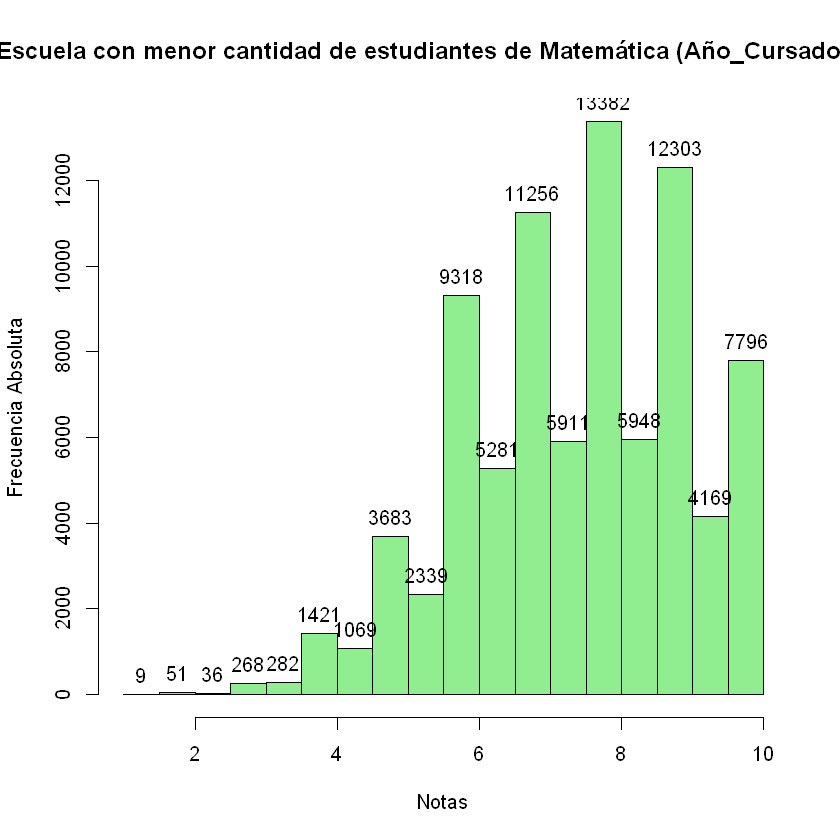

In [90]:
# Filtrar datos para la escuela con mayor cantidad de estudiantes de Matemática
datos_escuela_mayor <- subset(SEC_NOTAS_MODIF, CUE == 9003342 & asignatura == "MATEMÁTICA" & Año_cursado	== 1)

# Filtrar datos para la escuela con menor cantidad de estudiantes de Matemática
datos_escuela_menor <- subset(SEC_NOTAS_MODIF, CUE == 9000525 & asignatura == "MATEMÁTICA" & Año_cursado	== 1)

# Construir histograma de frecuencias absolutas para la escuela con mayor cantidad de estudiantes de Matemática
histograma_mayor <- hist(SEC_NOTAS_MODIF$Promedio, main = "Escuela con mayor cantidad de estudiantes de Matemática (Año_cursado = 1)", xlab = "Notas", ylab = "Frecuencia Absoluta", col = "skyblue")

# Agregar etiquetas al histograma
text(histograma_mayor$mids, histograma_mayor$counts, labels = histograma_mayor$counts, pos = 3)

# Construir histograma de frecuencias absolutas para la escuela con menor cantidad de estudiantes de Matemática
histograma_menor <- hist(SEC_NOTAS_MODIF$Promedio, main = "Escuela con menor cantidad de estudiantes de Matemática (Año_Cursado = 1)", xlab = "Notas", ylab = "Frecuencia Absoluta", col = "lightgreen")

# Agregar etiquetas al histograma
text(histograma_menor$mids, histograma_menor$counts, labels = histograma_menor$counts, pos = 3)
SEC_NOTAS_MODIF

In [91]:
calc_puntaje_z <- function(datos) {
  media <- mean(datos)
  desviacion <- sd(datos)
  puntajes_z <- (datos - media) / desviacion
  return(puntajes_z)
}

# Filtrar datos para la escuela con mayor cantidad de estudiantes de Matemática
datos_escuela_mayor <- subset(SEC_NOTAS_MODIF, CUE == 9003342 & asignatura == "MATEMATICA")

# Filtrar datos para la escuela con menor cantidad de estudiantes de Matemática
datos_escuela_menor <- subset(SEC_NOTAS_MODIF, CUE == 9000525 & asignatura == "MATEMATICA")

# Calcular puntaje z para la escuela con mayor cantidad de estudiantes de Matemática
puntaje_z_mayor <- datos_escuela_mayor$NotasPrimerT %>%
  calc_puntaje_z()

# Calcular puntaje z para la escuela con menor cantidad de estudiantes de Matemática
puntaje_z_menor <- datos_escuela_menor$NotasPrimerT %>%
  calc_puntaje_z()

# Imprimir los resultados
print("Puntaje Z para la escuela con mayor cantidad de estudiantes de Matemática:")
print(puntaje_z_mayor)

print("Puntaje Z para la escuela con menor cantidad de estudiantes de Matemática:")
print(puntaje_z_menor)

# Obtener puntaje Z correspondiente a una calificación de 4 en la escuela con mayor cantidad de estudiantes
puntaje_z_4_mayor <- (4 - mean(datos_escuela_mayor$NotasPrimerT)) / sd(datos_escuela_mayor$NotasPrimerT)

# Obtener puntaje Z correspondiente a una calificación de 4 en la escuela con menor cantidad de estudiantes
puntaje_z_4_menor <- (4 - mean(datos_escuela_menor$NotasPrimerT)) / sd(datos_escuela_menor$NotasPrimerT)

# Imprimir los puntajes Z para la calificación de 4 en ambas escuelas
print("Puntaje Z para una calificación de 4 en la escuela con mayor cantidad de estudiantes:")
print(puntaje_z_4_mayor)

print("Puntaje Z para una calificación de 4 en la escuela con menor cantidad de estudiantes:")
print(puntaje_z_4_menor)

[1] "Puntaje Z para la escuela con mayor cantidad de estudiantes de Matemática:"
  [1]  0.7671170 -0.2894012 -0.2894012 -1.3459194  0.2388579  0.2388579
  [7] -1.3459194 -1.3459194 -0.2894012 -0.8176603  0.7671170  1.2953761
 [13] -0.8176603 -0.8176603 -0.2894012 -0.8176603 -1.3459194  0.2388579
 [19] -0.8176603  0.2388579 -1.3459194  0.2388579 -1.3459194 -0.8176603
 [25]  0.2388579 -0.2894012 -0.2894012 -0.2894012  0.7671170 -1.3459194
 [31] -2.4024377 -1.3459194 -0.8176603 -1.3459194 -1.3459194  0.7671170
 [37] -0.2894012 -0.8176603  0.2388579 -1.3459194 -1.3459194  1.2953761
 [43] -0.2894012  0.2388579  1.2953761  0.7671170 -0.2894012 -1.3459194
 [49] -0.2894012 -1.3459194 -1.3459194 -2.4024377  0.2388579  0.2388579
 [55]  0.2388579  0.2388579  0.2388579  0.7671170 -2.4024377 -0.8176603
 [61]  1.2953761 -1.3459194 -0.2894012  0.2388579 -0.8176603 -1.3459194
 [67] -0.8176603 -1.3459194 -1.3459194  1.8236353  0.2388579  0.2388579
 [73]  0.2388579  0.7671170  1.2953761  0.2388579  0.76

In [92]:
# Estandarizar la variable de notas usando la función scale()
datos_estandarizados <- scale(SEC_NOTAS_MODIF$Promedio)

# Agregar la variable estandarizada al conjunto de datos original
SEC_NOTAS_MODIF$Promedio_estandarizado <- datos_estandarizados

# Estandarizar las variables de promedio de notas en Matemáticas y Lengua
promedio_mat_estandarizado <- scale(SEC_NOTAS_MODIF$Promedio_estandarizado[SEC_NOTAS_MODIF$Año_cursado == 1 & SEC_NOTAS_MODIF$asignatura == "MATEMATICA"])
promedio_lengua_estandarizado <- scale(SEC_NOTAS_MODIF$Promedio_estandarizado[SEC_NOTAS_MODIF$Año_cursado == 1 & SEC_NOTAS_MODIF$asignatura == "LENGUA"])

# Análisis de la información adicional proporcionada por la estandarización
summary(promedio_mat_estandarizado)
summary(promedio_lengua_estandarizado)

       V1         
 Min.   :-2.3590  
 1st Qu.:-0.7479  
 Median :-0.1445  
 Mean   : 0.0000  
 3rd Qu.: 0.8572  
 Max.   : 1.8649  

       V1          
 Min.   :-3.00814  
 1st Qu.:-0.70645  
 Median :-0.01525  
 Mean   : 0.00000  
 3rd Qu.: 0.67595  
 Max.   : 2.05835  

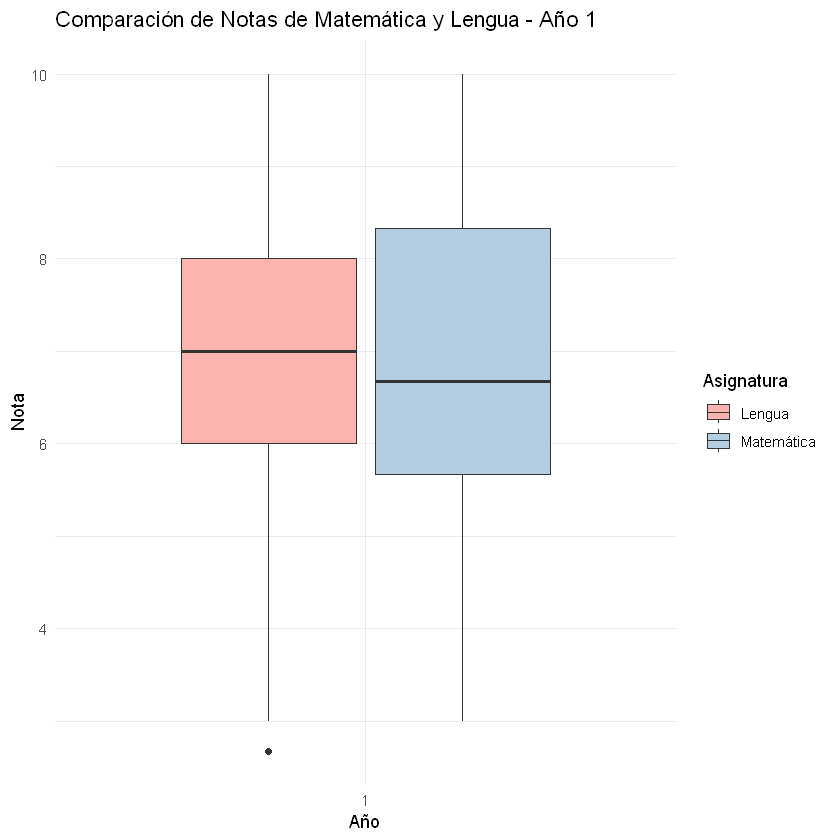

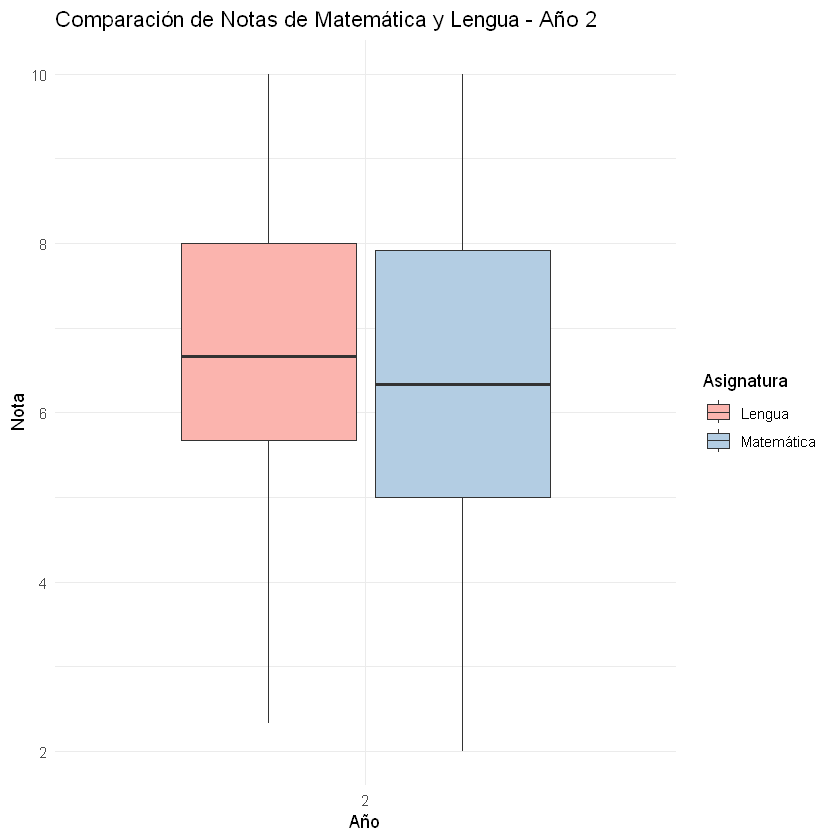

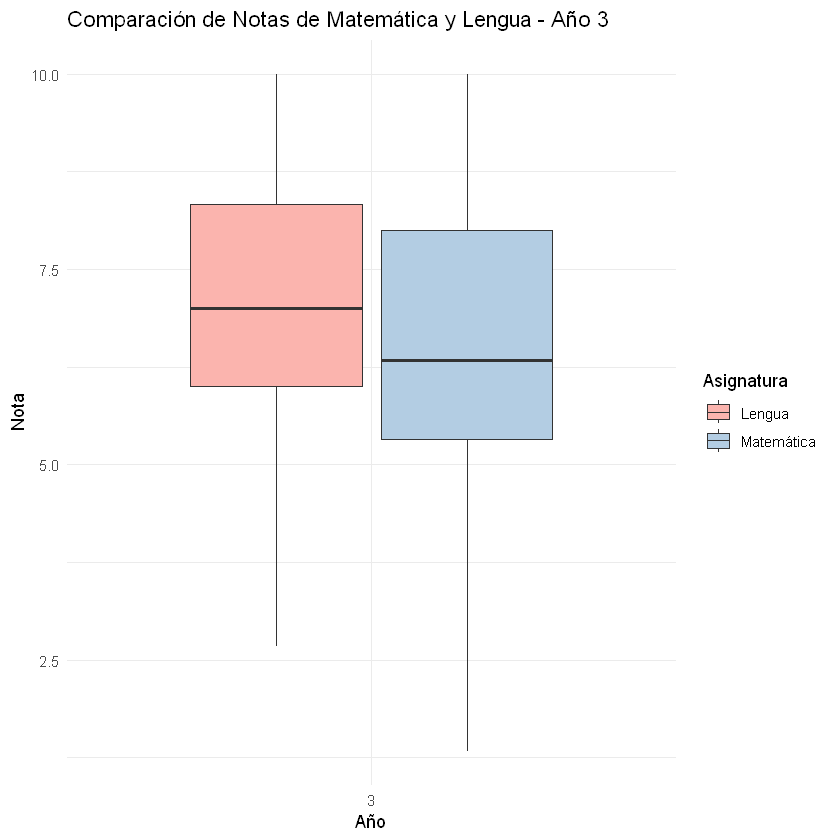

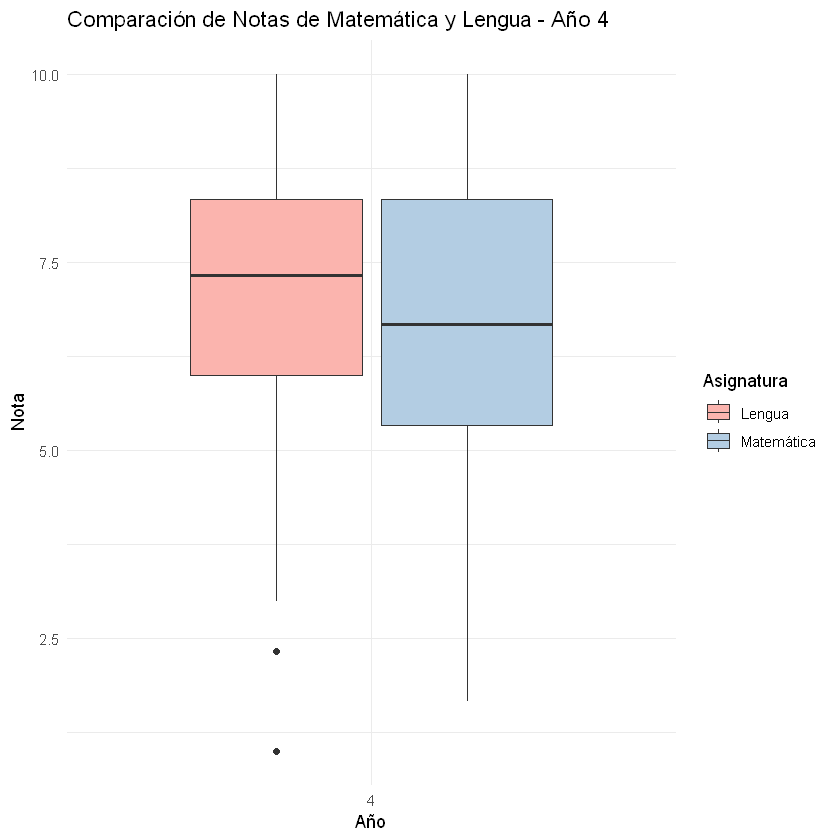

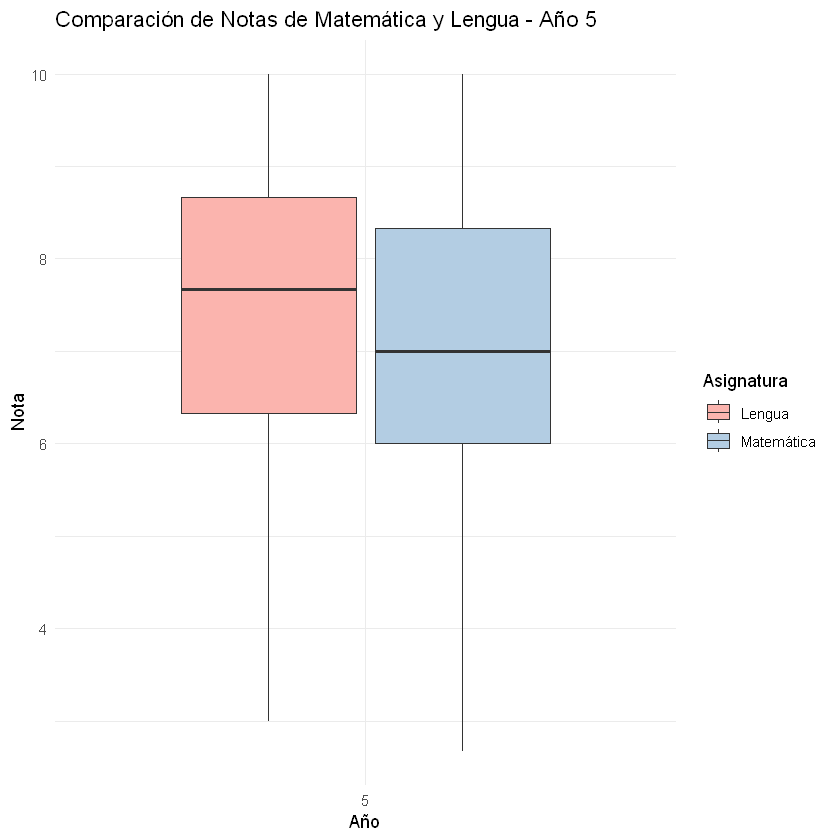

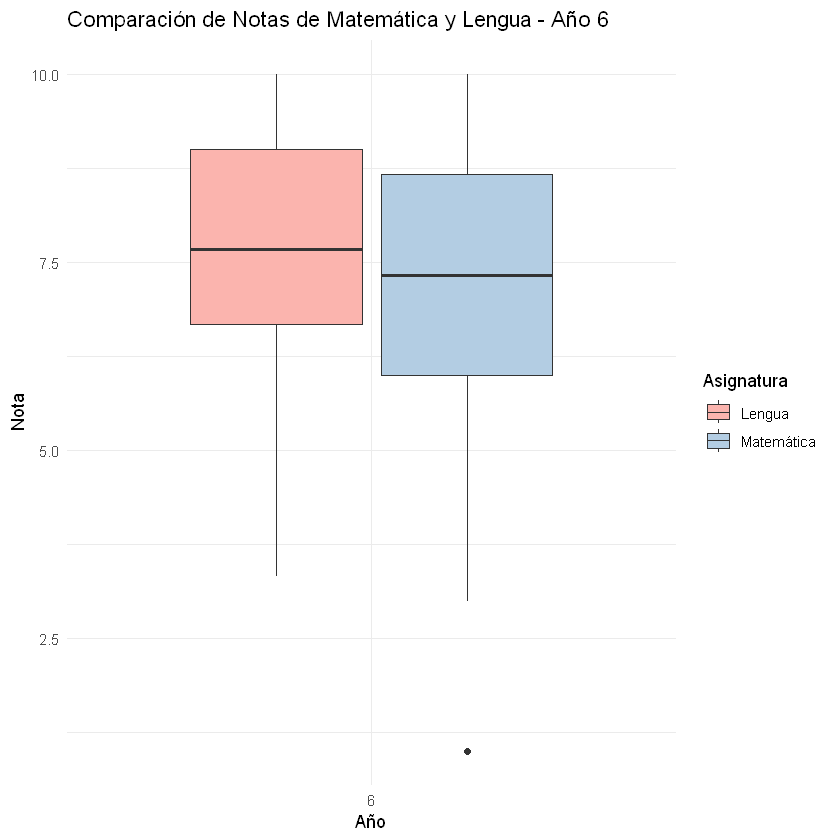

In [93]:


# Iterar sobre los seis años de secundaria
for (i in 1:6) {
  # Filtrar los datos para Matemáticas y Lengua en el año actual del ciclo
  datos_matematica <- filter(SEC_NOTAS_MODIF, asignatura == "MATEMATICA" & Año_cursado == i)
  datos_lengua <- filter(SEC_NOTAS_MODIF, asignatura == "LENGUA" & Año_cursado == i)
  
  # Combinar las notas de Matemática y Lengua en un dataframe
  combined_year_data <- data.frame(
    Asignatura = c(rep("Matemática", nrow(datos_matematica)), rep("Lengua", nrow(datos_lengua))),
    Nota = c(datos_matematica$Promedio, datos_lengua$Promedio),
    Año = rep(i, nrow(datos_matematica) + nrow(datos_lengua))
  )
  
  # Crear un boxplot comparativo de las notas de Matemática y Lengua para el año actual
  boxplot <- ggplot(data = combined_year_data, aes(x = factor(Año), y = Nota, fill = Asignatura)) +
    geom_boxplot() +
    labs(title = paste("Comparación de Notas de Matemática y Lengua - Año", i),
         x = "Año",
         y = "Nota",
         fill = "Asignatura") +
    scale_fill_brewer(palette = "Pastel1") +  # Colores pasteles
    theme_minimal()
  
  # Imprimir el boxplot para el año actual
  print(boxplot)
}


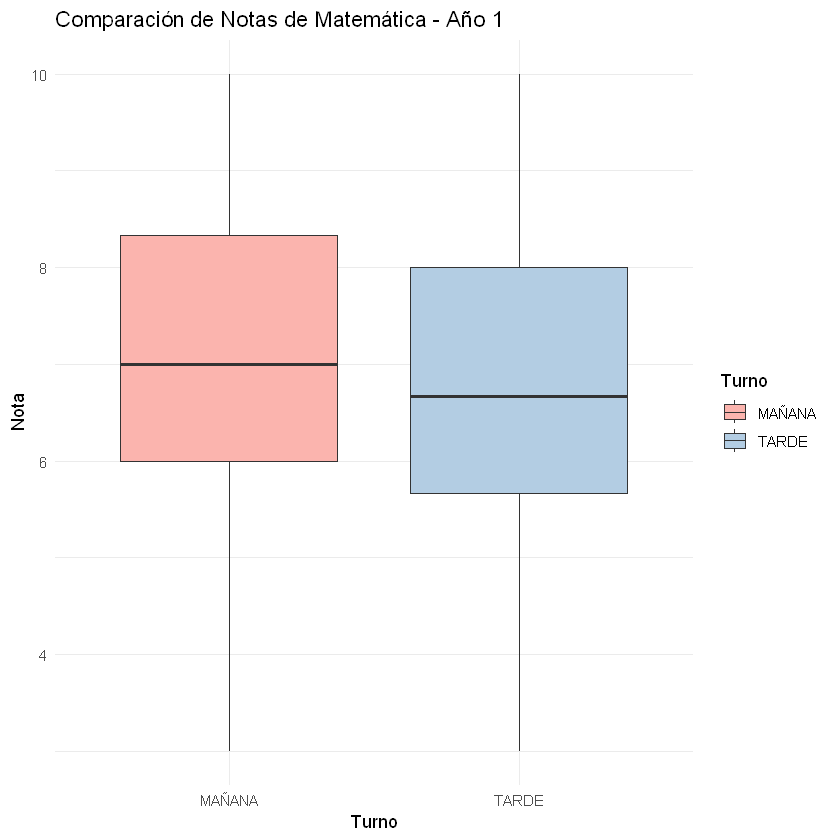

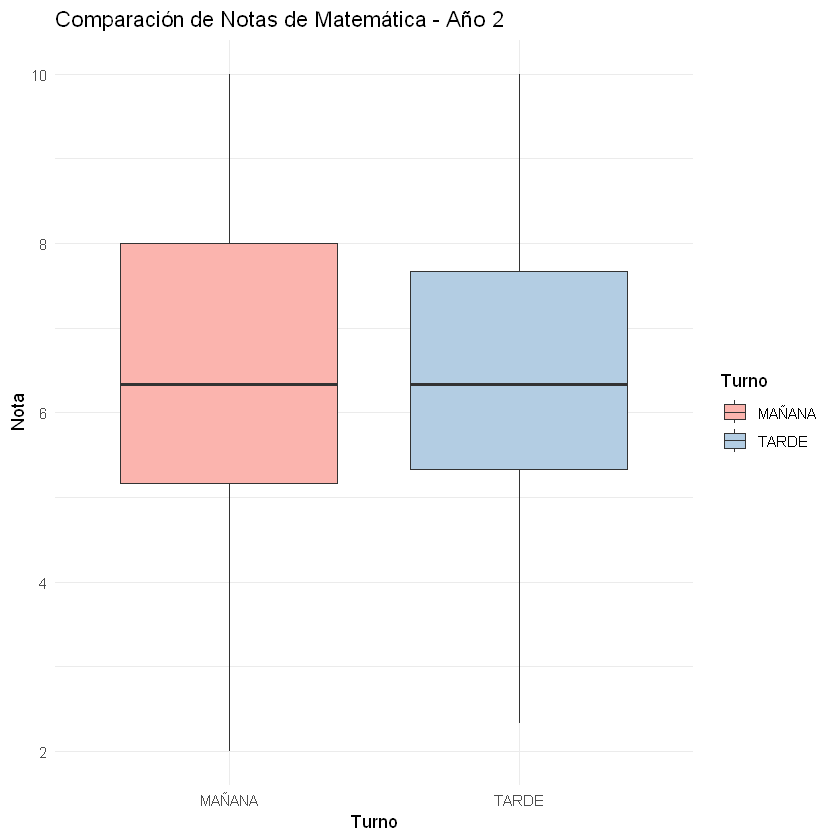

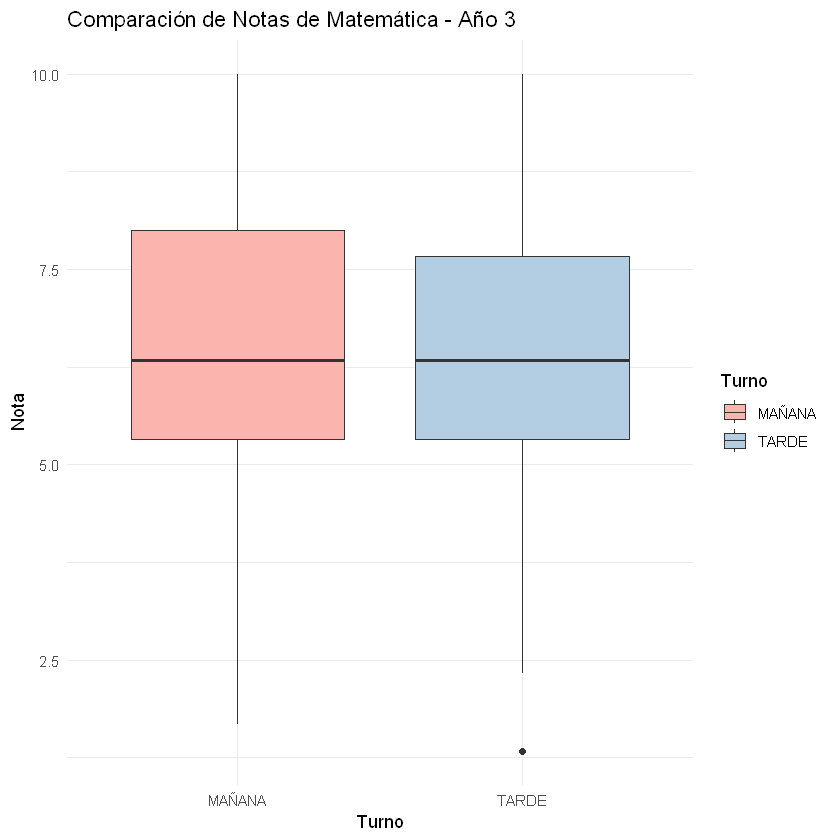

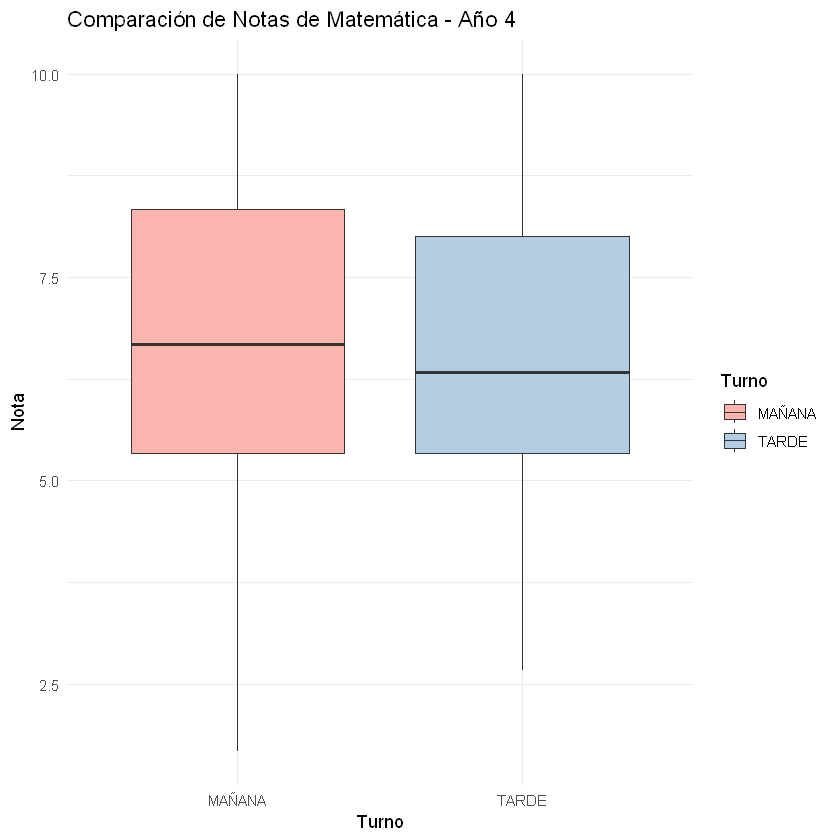

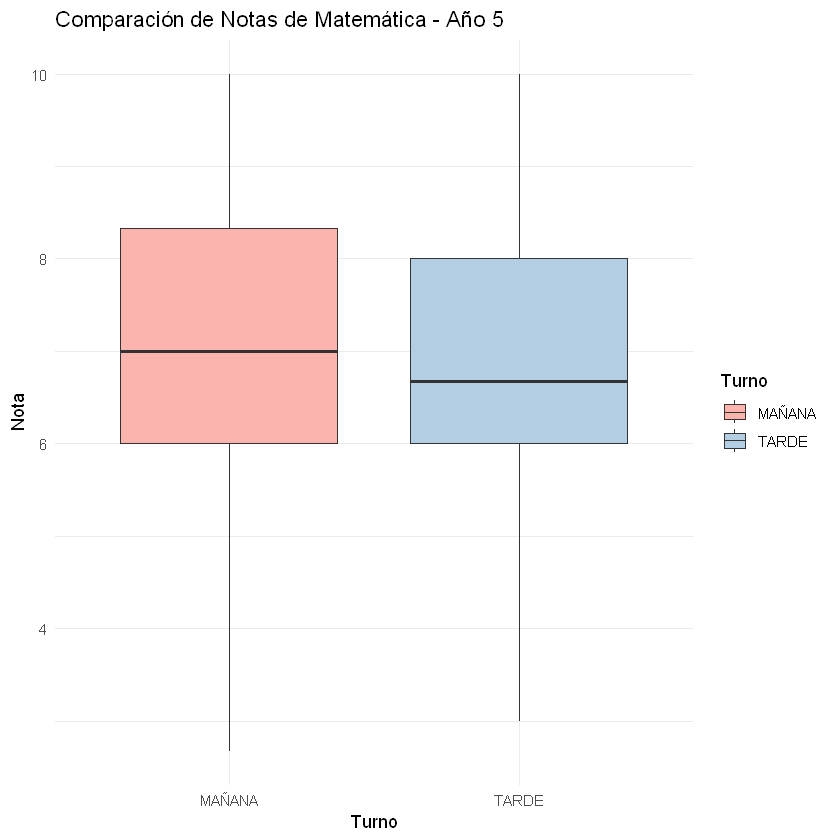

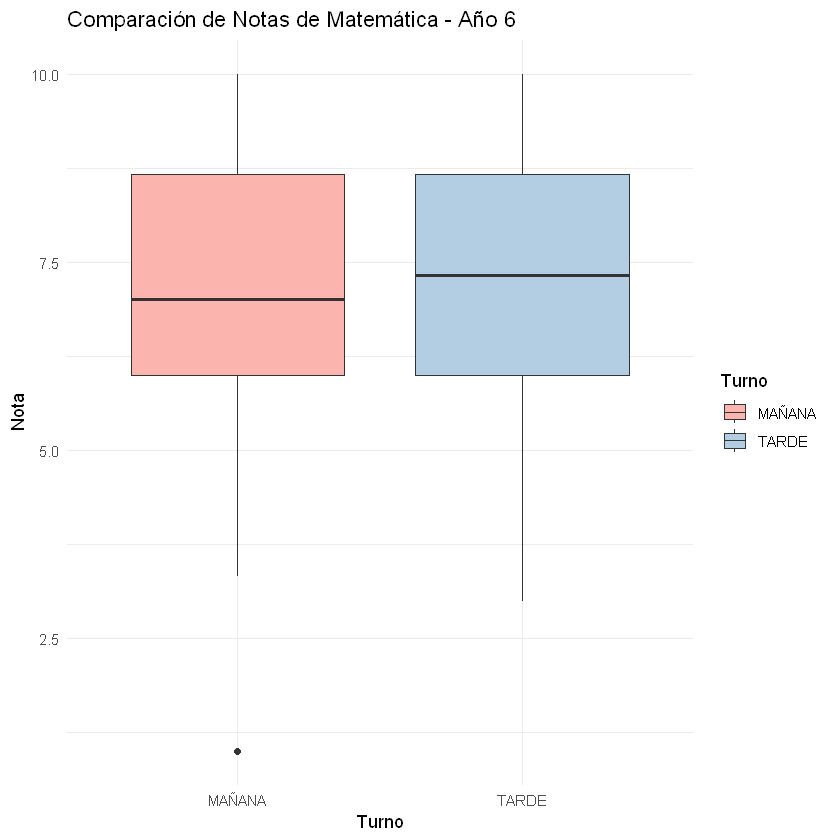

In [94]:


# Iterar sobre los seis años de secundaria
for (i in 1:6) {
  # Filtrar los datos para Matemáticas en el año actual del ciclo y en el turno mañana
  matutino <- filter(SEC_NOTAS_MODIF, asignatura == "MATEMATICA" & Año_cursado == i & turno == "MAÑANA")
  # Filtrar los datos para Matemáticas en el año actual del ciclo y en el turno tarde
  vespertino <- filter(SEC_NOTAS_MODIF, asignatura == "MATEMATICA" & Año_cursado == i & turno == "TARDE")
  
  # Combinar las notas de Matemática para ambos turnos en un dataframe
  combined_year_data <- data.frame(
    Turno = rep(c("MAÑANA", "TARDE"), c(nrow(matutino), nrow(vespertino))),
    Nota = c(matutino$Promedio, vespertino$Promedio),
    Año = rep(i, nrow(matutino) + nrow(vespertino))
  )
  
  # Crear un boxplot comparativo de las notas de Matemática para el año actual y cada turno
  boxplot <- ggplot(data = combined_year_data, aes(x = factor(Turno), y = Nota, fill = Turno)) +
    geom_boxplot() +
    labs(title = paste("Comparación de Notas de Matemática - Año", i),
         x = "Turno",
         y = "Nota",
         fill = "Turno") +
    scale_fill_brewer(palette = "Pastel1") +  # Colores pasteles
    theme_minimal()
  
  # Imprimir el boxplot
  print(boxplot)
}

Año 1 - Coeficiente de correlación de Spearman: 0.7778398 - Asociación: fuerte 


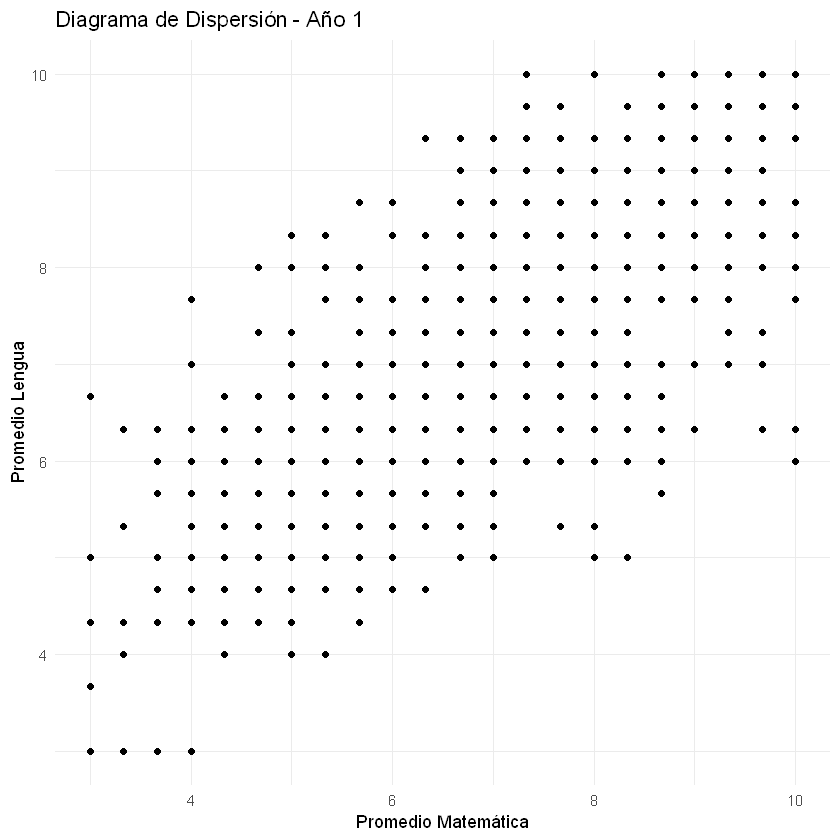

Año 2 - Coeficiente de correlación de Spearman: 0.6656112 - Asociación: moderada 


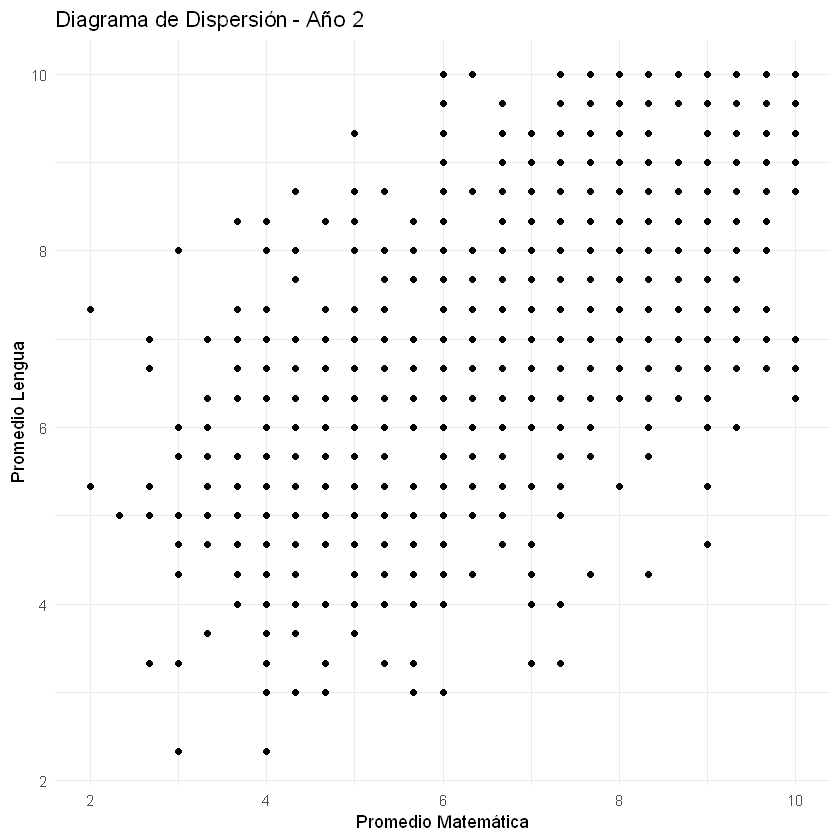

Año 3 - Coeficiente de correlación de Spearman: 0.6421662 - Asociación: moderada 


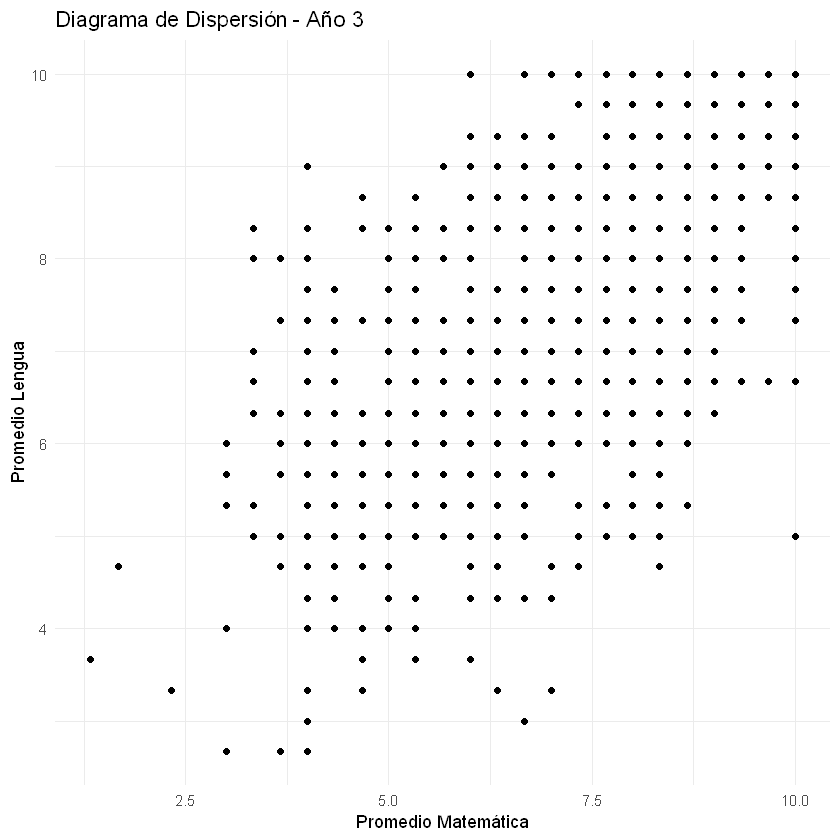

Año 4 - Coeficiente de correlación de Spearman: 0.5078112 - Asociación: moderada 


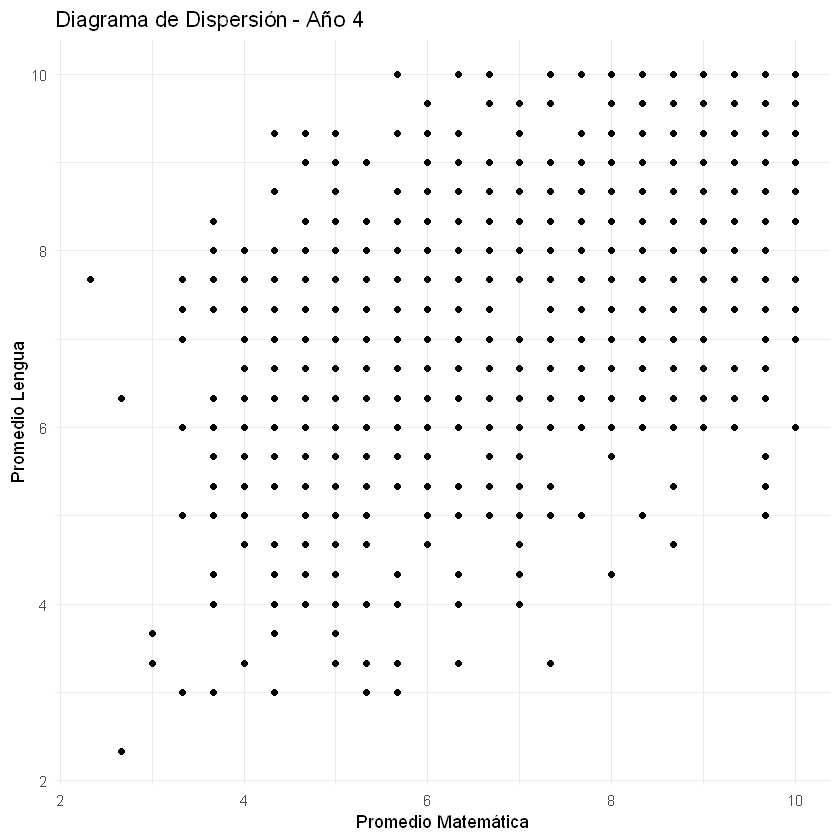

Año 5 - Coeficiente de correlación de Spearman: 0.5153091 - Asociación: moderada 


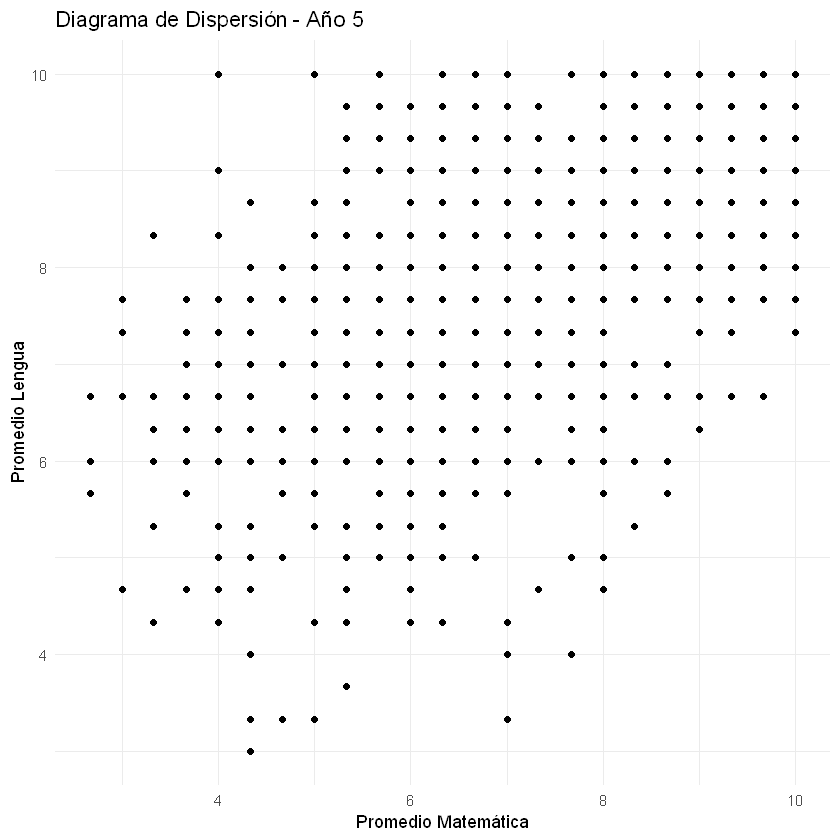

Año 6 - Coeficiente de correlación de Spearman: 0.5592486 - Asociación: moderada 


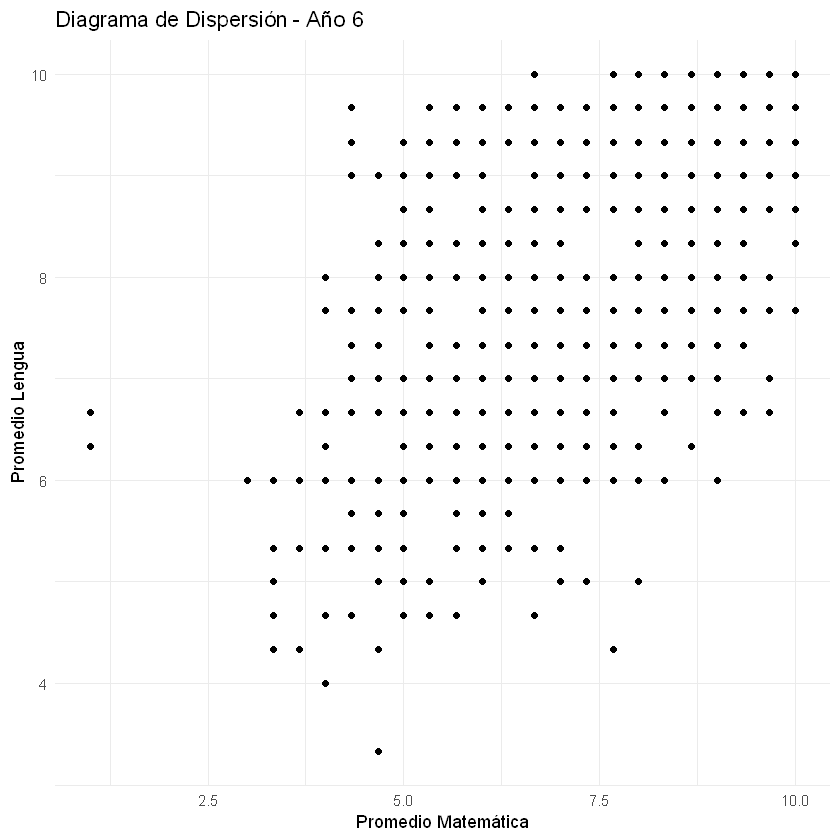

In [95]:

# Crear una lista para almacenar los gráficos
scatter_plots <- list()

# Crear una lista para almacenar los coeficientes de correlación
correlation_coefficients <- list()

# Iterar sobre los seis años de secundaria
for (i in 1:6) {
  # Filtrar los datos para Matemáticas y Lengua en el año actual del ciclo
  datos_matematica <- filter(SEC_NOTAS_MODIF, asignatura == "MATEMATICA" & Año_cursado == i)
    datos_matematica <- subset(datos_matematica, !(is.na(Promedio)))
  datos_lengua <- filter(SEC_NOTAS_MODIF, asignatura == "LENGUA" & Año_cursado == i)
    datos_lengua <- subset(datos_lengua, !(is.na(Promedio)))
  
  # Suprimir warnings relacionados con inner_join
  suppressWarnings({
    # Unir los datos de Matemáticas y Lengua por el documento
    df <- inner_join(datos_matematica, datos_lengua, by = "Documento")
  })
  
  # Renombrar las columnas de promedio
  df <- rename(df, Prom_Mat = Promedio.x, Prom_Leng = Promedio.y)
  
  # Crear el gráfico de dispersión
  scatter_plot <- ggplot(data = df, aes(x = Prom_Mat, y = Prom_Leng)) +
    geom_point() +
    labs(title = paste("Diagrama de Dispersión - Año", i),
         x = "Promedio Matemática",
         y = "Promedio Lengua") +
    theme_minimal()
  
  # Guardar el gráfico en la lista
  scatter_plots[[i]] <- scatter_plot
  
  # Imprimir el gráfico
  print(scatter_plot)

    correlation_spearman <- suppressWarnings(cor(df$Prom_Mat, df$Prom_Leng, method = "spearman"))
    # Almacenar el coeficiente de correlación de Spearman en la lista
    correlation_coefficients[[i]] <- list(method = "Spearman", value = correlation_spearman)
    # Determinar la fuerza de la asociación para Spearman
    strength <- ifelse(abs(correlation_spearman) < 0.4, "débil",
                       ifelse(abs(correlation_spearman) < 0.7, "moderada", "fuerte"))
    # Imprimir el coeficiente de correlación de Spearman y su fuerza
    cat("Año", i, "- Coeficiente de correlación de Spearman:", correlation_spearman, "- Asociación:", strength, "\n")
 
}

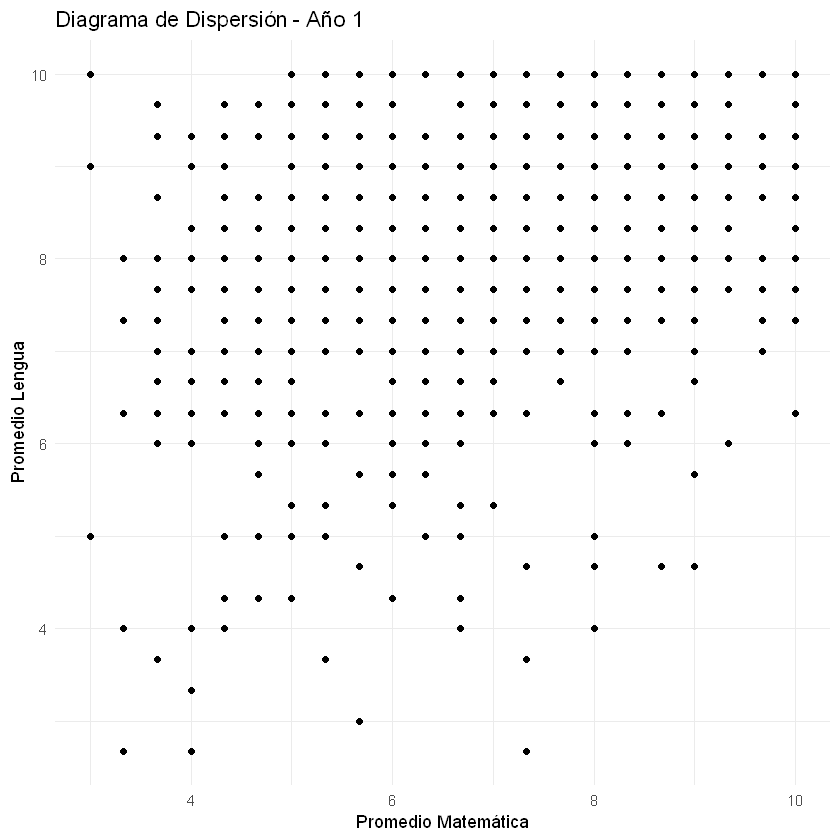

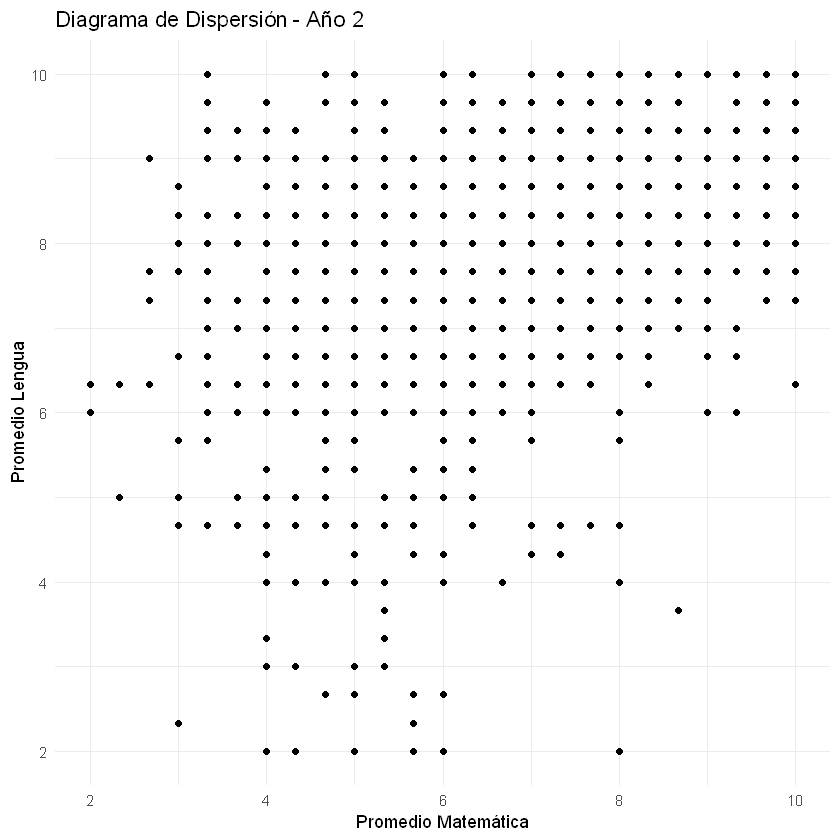

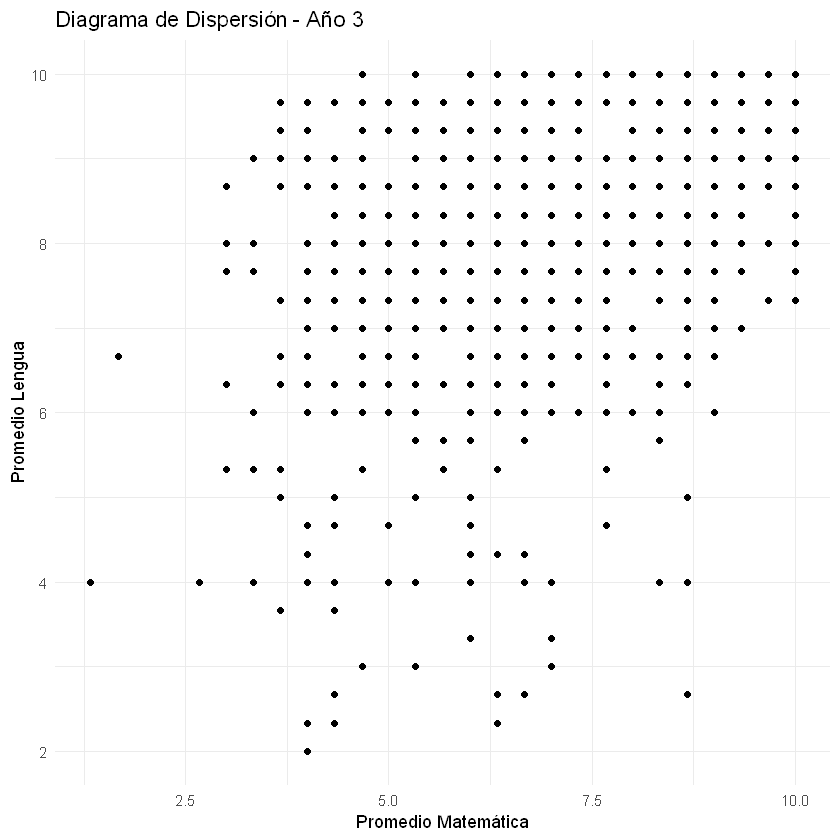

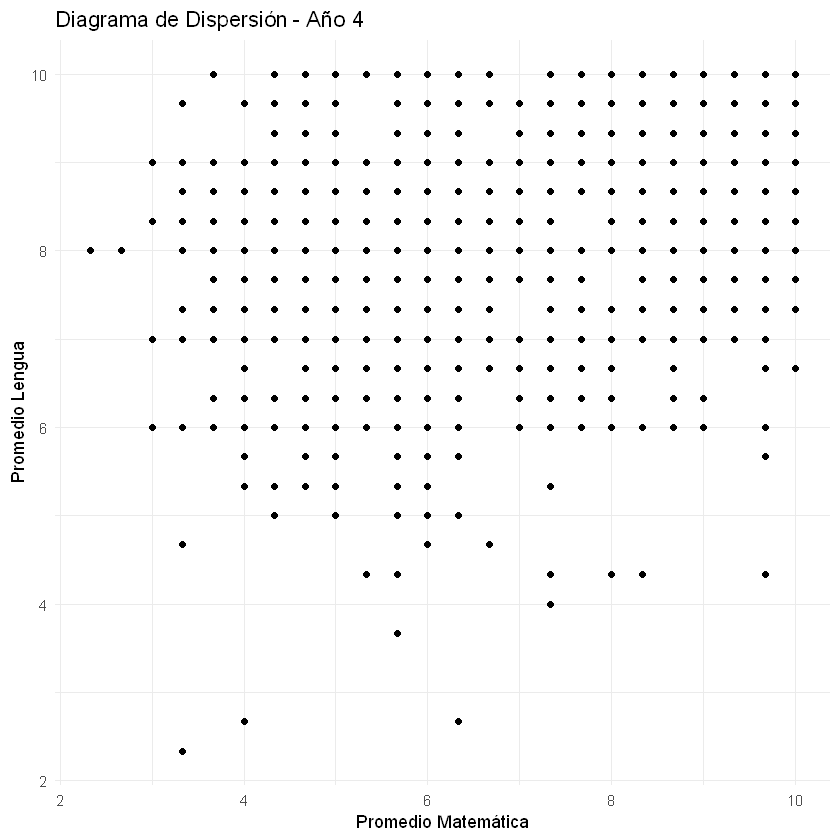

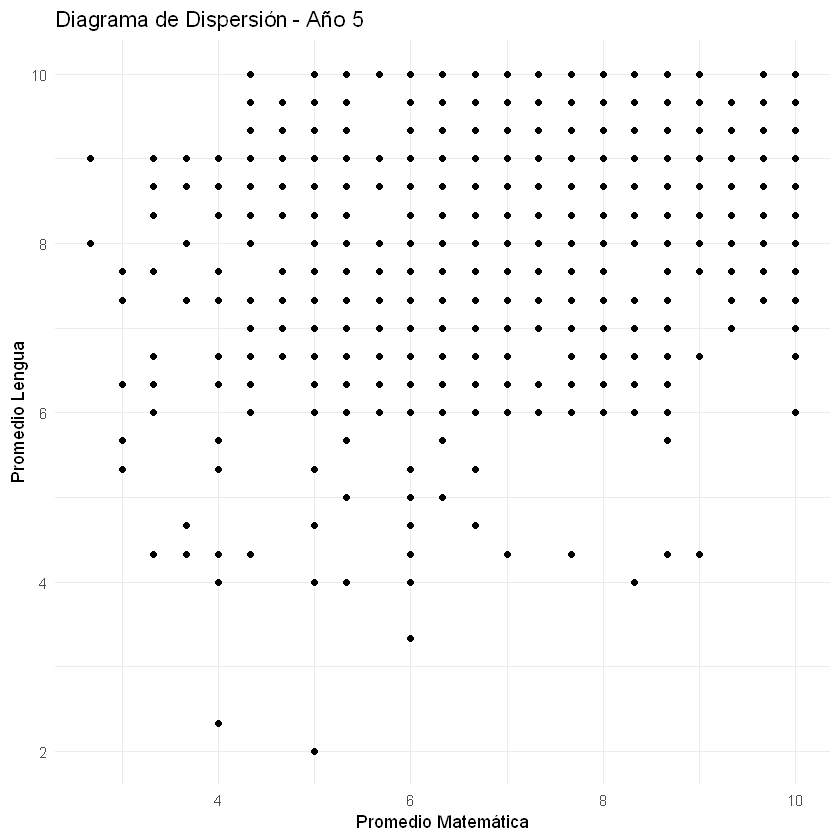

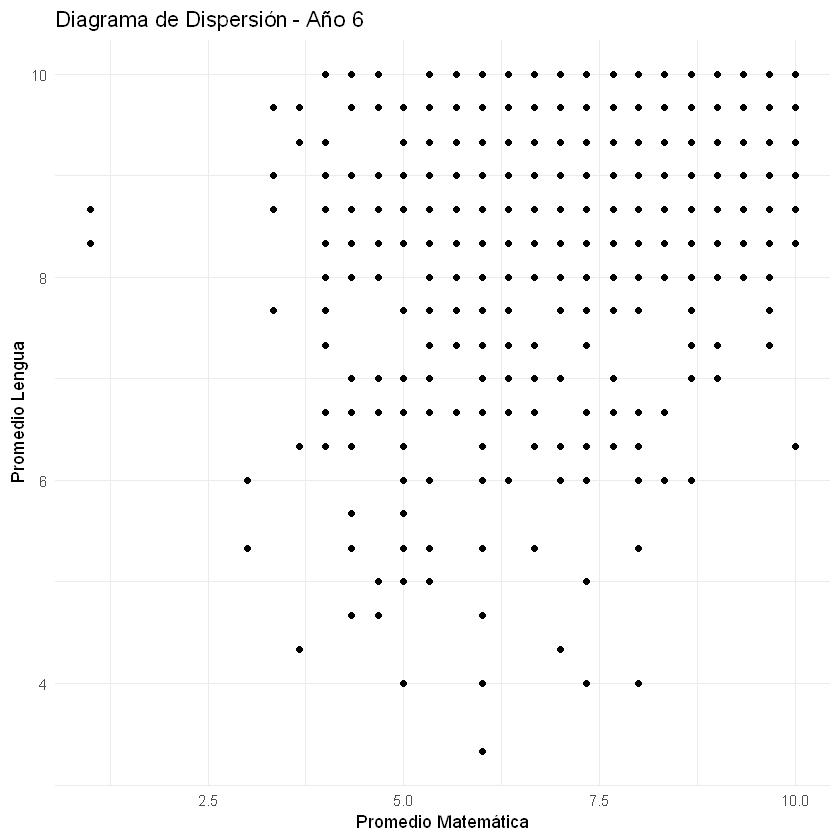

In [96]:
# Crear una lista para almacenar los gráficos
scatter_plots <- list()

# Iterar sobre los seis años de secundaria
for (i in 1:6) {
  # Filtrar los datos para Matemáticas y Lengua en el año actual del ciclo
  datos_matematica <- filter(SEC_NOTAS_MODIF, asignatura == "MATEMATICA" & Año_cursado == i)
  datos_matematica <- subset(datos_matematica, !(is.na(Promedio)))
  datos_EdFisica <- filter(SEC_NOTAS_MODIF, asignatura == "EDUCACION FISICA" & Año_cursado == i)
  datos_EdFisica <- subset(datos_EdFisica, !(is.na(Promedio)))
  
  # Suprimir warnings relacionados con inner_join
  suppressWarnings({
    # Unir los datos de Matemáticas y Lengua por el documento
    df <- inner_join(datos_matematica, datos_EdFisica, by = "Documento")
  })
  
  # Renombrar las columnas de promedio
  df <- rename(df, Prom_Mat = Promedio.x, Prom_EdFisica = Promedio.y)
  
  # Crear el gráfico de dispersión
  scatter_plot <- ggplot(data = df, aes(x = Prom_Mat, y = Prom_EdFisica)) +
    geom_point() +
    labs(title = paste("Diagrama de Dispersión - Año", i),
         x = "Promedio Matemática",
         y = "Promedio Lengua") +
    theme_minimal()
  
  # Guardar el gráfico en la lista
  scatter_plots[[i]] <- scatter_plot
  
  # Imprimir el gráfico
  print(scatter_plot)
}

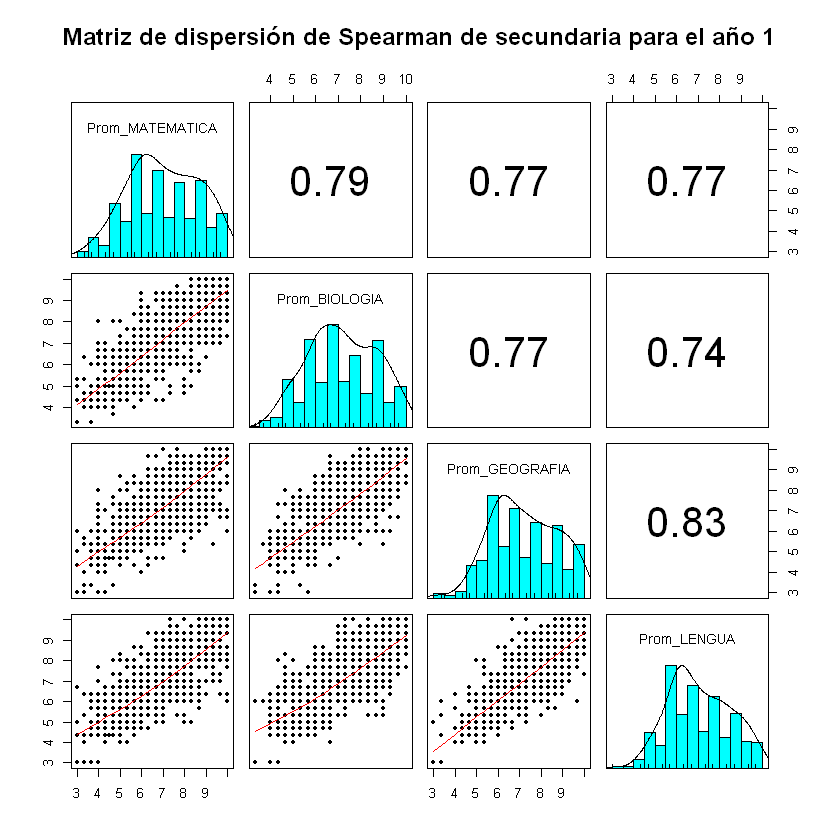

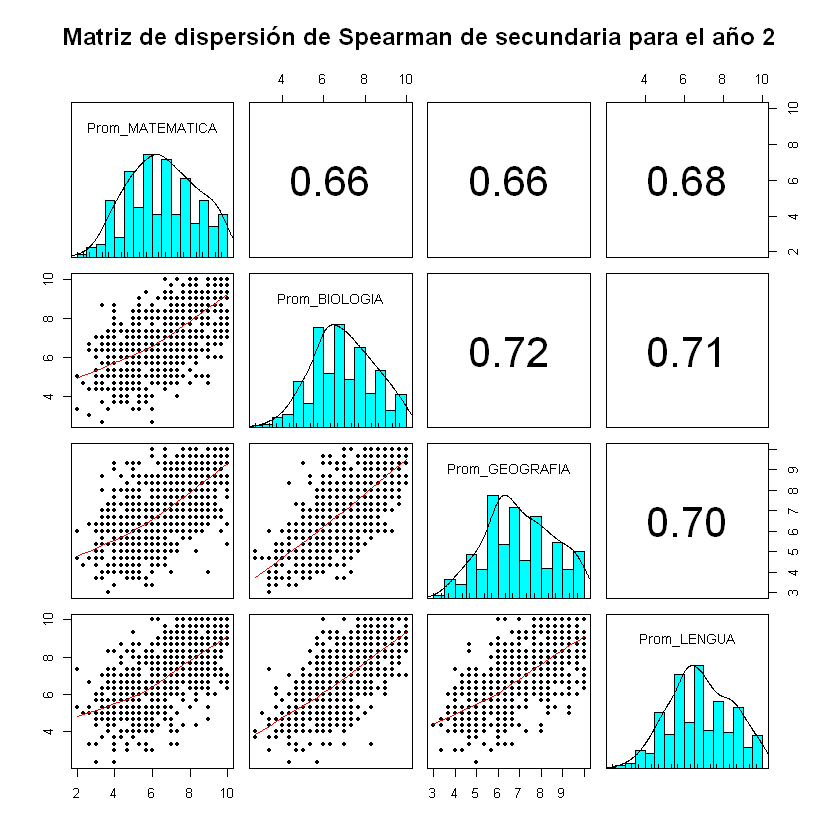

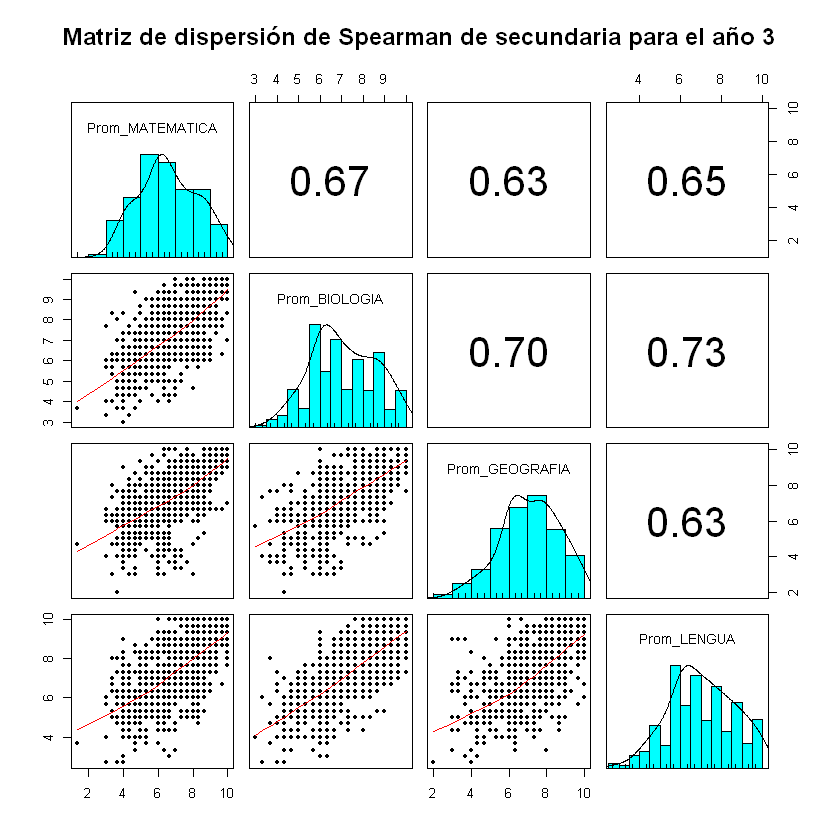

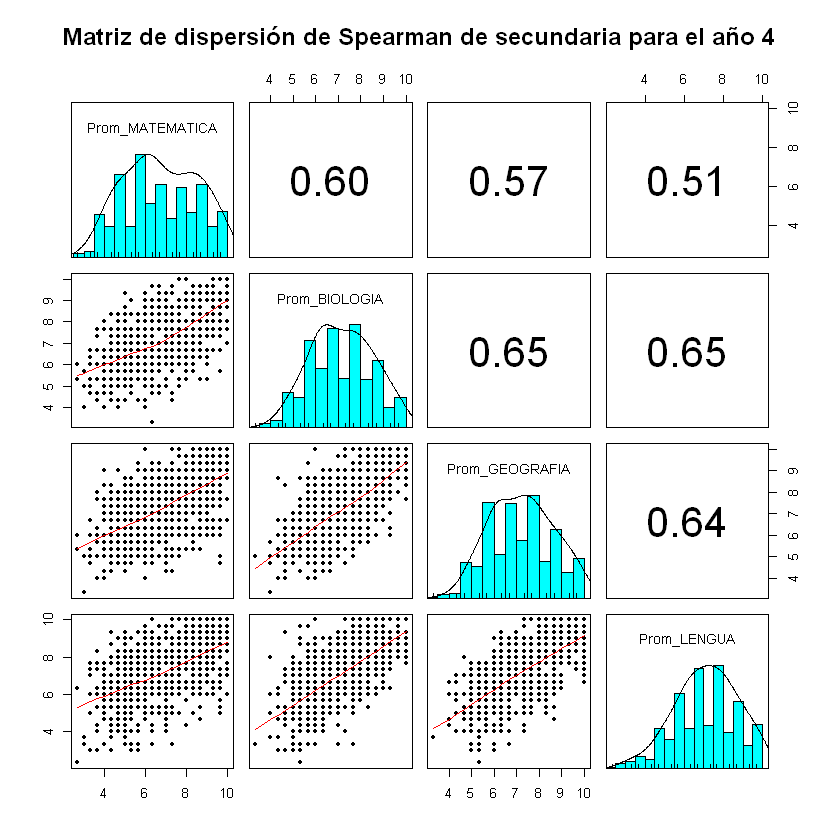

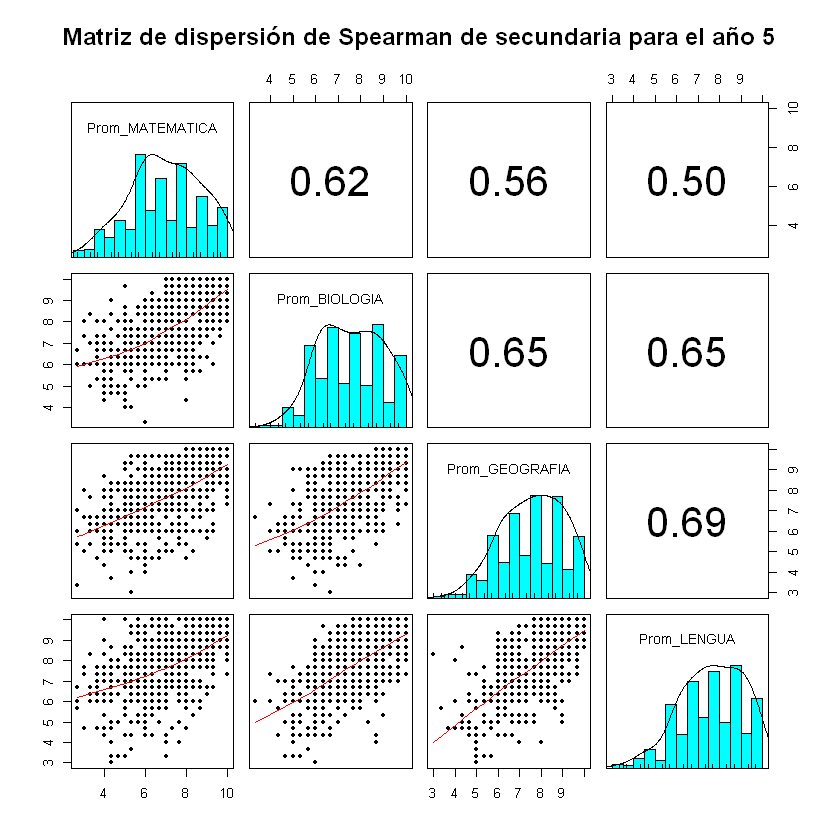

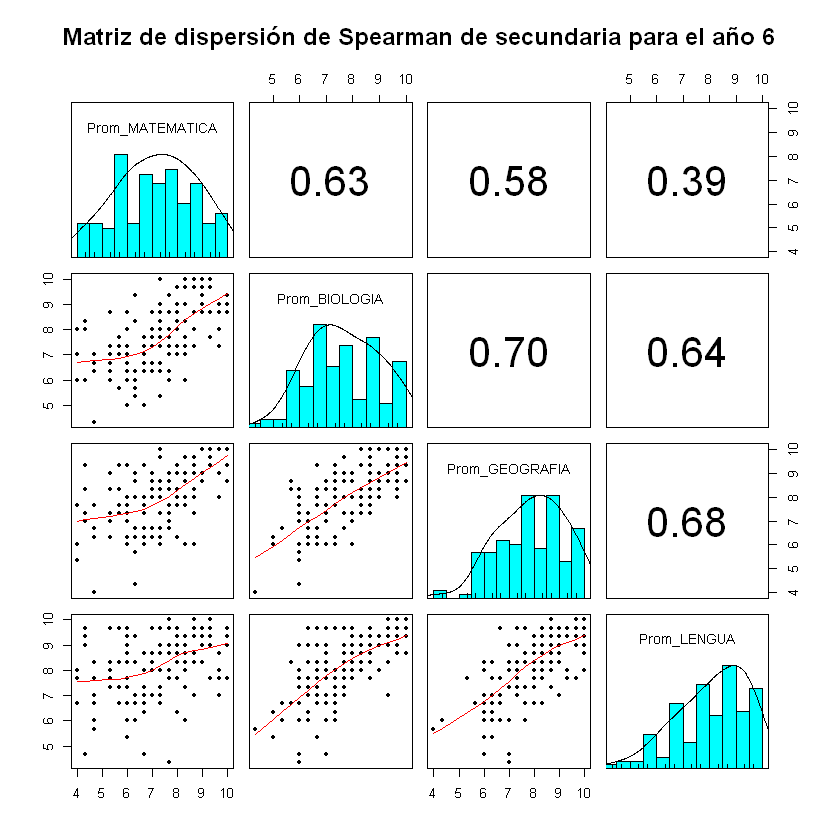

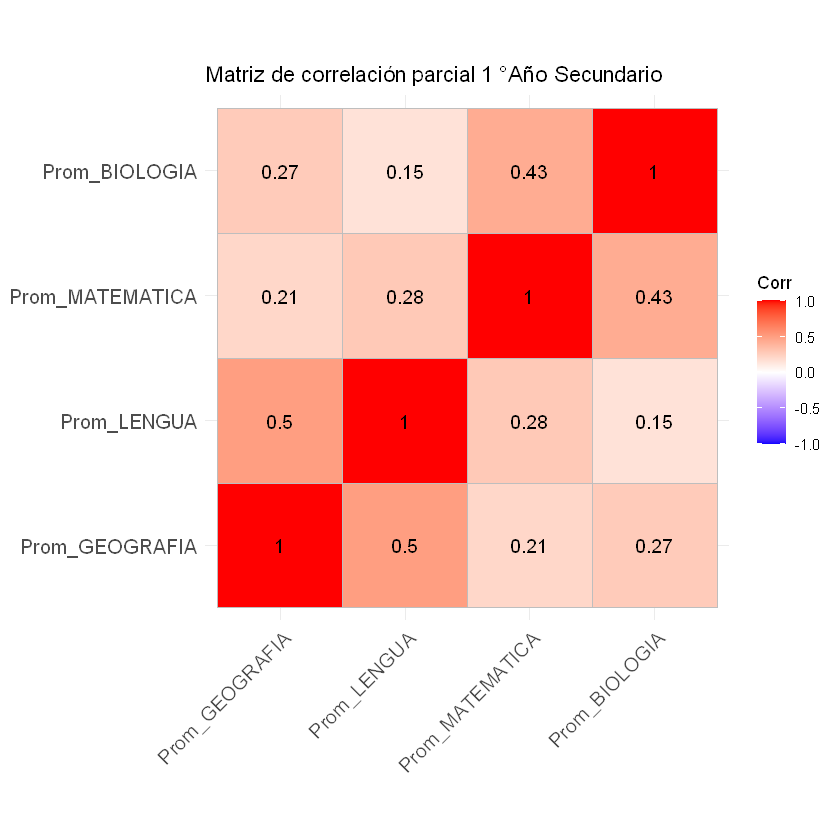

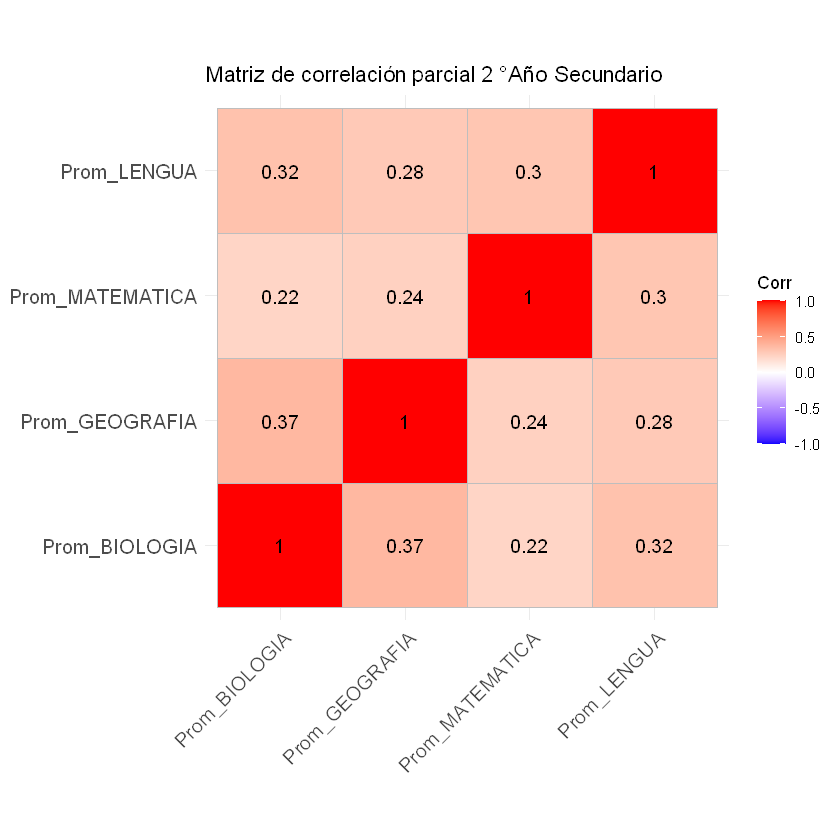

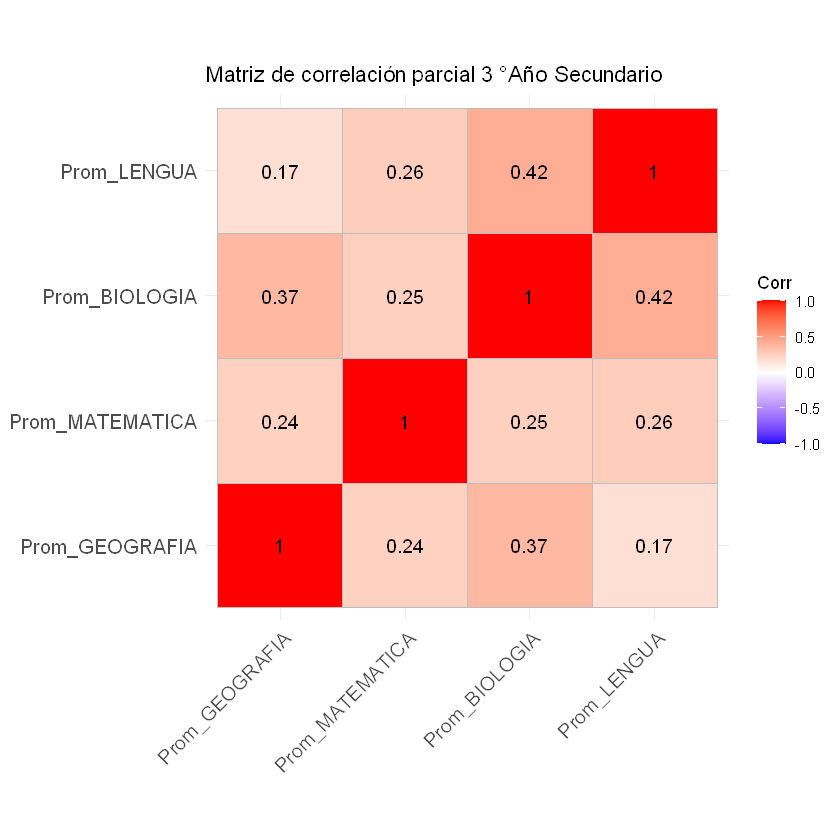

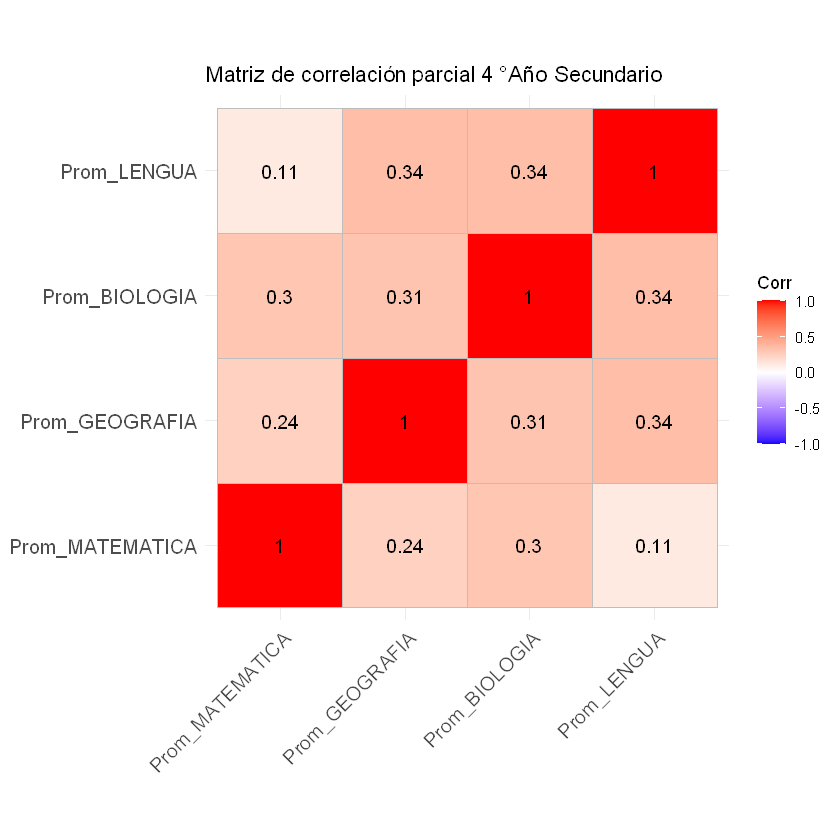

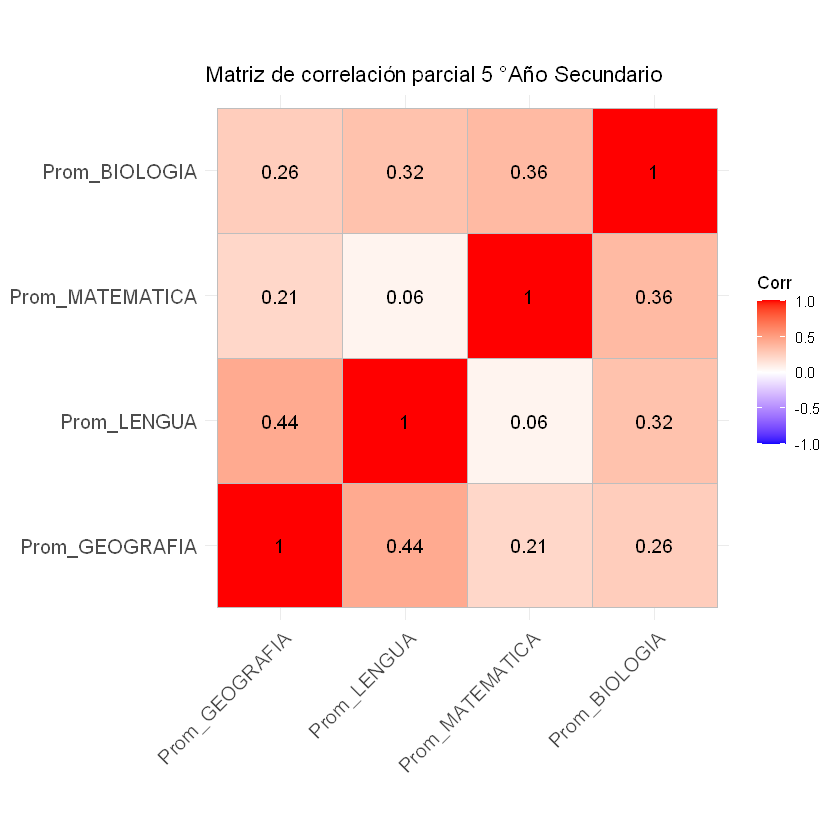

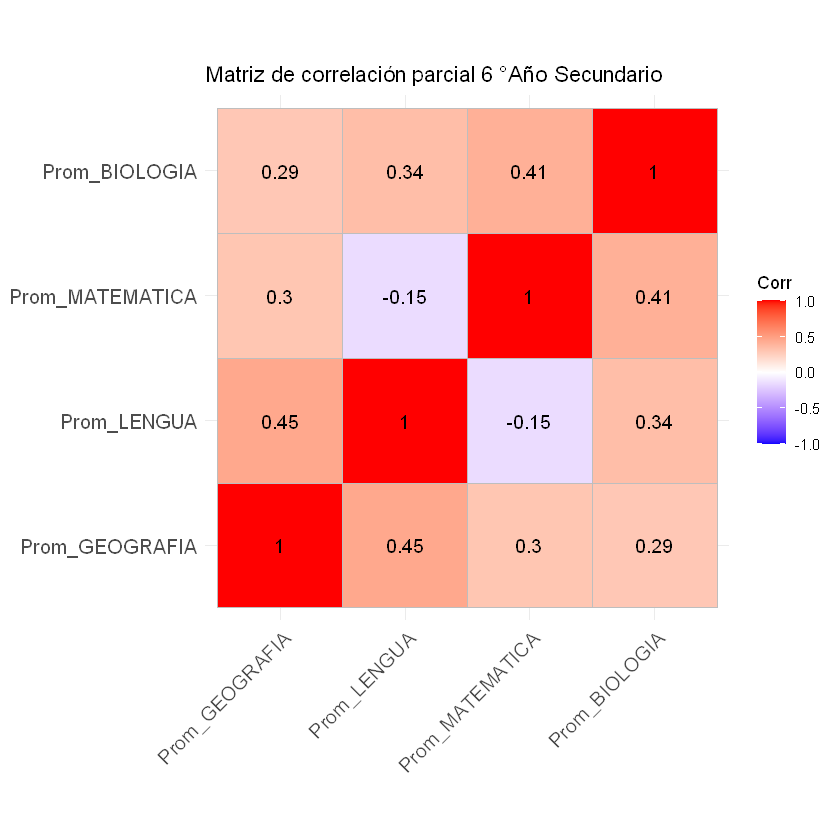

In [97]:


# Suprimir el mensaje de advertencia al cargar la biblioteca 'psych'
suppressPackageStartupMessages(library(psych))

# Definir las materias de interés
materias <- c("MATEMATICA", "BIOLOGIA", "GEOGRAFIA", "LENGUA")

# Crear una lista para almacenar las matrices de correlación
resultados <- list()
resultados_parciales <- list()  # Inicializar lista para resultados parciales

# Iterar sobre los seis años del secundario
for (anio in 1:6) {
  # Filtrar los datos para el año cursado actual y las materias de interés
  df_materia <- suppressWarnings({
    SEC_NOTAS_MODIF %>%
      filter(Año_cursado == as.character(anio) & asignatura %in% materias) %>%
      group_by(Documento, asignatura) %>%
      summarise(Promedio = mean(Promedio), .groups = "drop") %>%  # Suprimir el warning de summarise
      spread(key = asignatura, value = Promedio) %>%
      rename_all(~paste("Prom_", ., sep = "")) %>%
      na.omit()
  })
  
  # Seleccionar solo las columnas de interés
  dataM <- df_materia[, c("Prom_MATEMATICA", "Prom_BIOLOGIA", "Prom_GEOGRAFIA", "Prom_LENGUA")]
  
  # Transformar los datos a formato numérico
  dataM[] <- lapply(dataM, as.numeric)
  
  # Calcular la matriz de correlación de Spearman
  Scatter_Matrix_spearman <- suppressWarnings({
    pairs.panels(dataM,
                 method = "spearman",
                 ellipses = FALSE,
                 main = paste("Matriz de dispersión de Spearman de secundaria para el año", anio))  # Agregar título del año
  })
  
  # Almacenar la matriz de dispersión de Spearman en la lista de resultados
  resultados[[paste("Anio", anio, sep = "_")]] <- Scatter_Matrix_spearman
  
  # Calcular la matriz de correlación parcial
  correlacion_parcial <- pcor(dataM, method = "spearman")
  
  # Almacenar la matriz de correlación parcial en la lista de resultados parciales
  resultados_parciales[[paste("Anio", anio, sep = "_")]] <- correlacion_parcial$estimate
}

# Imprimir los resultados de las matrices de dispersión de Spearman
for (i in seq_along(resultados)) {
  cat("Matriz de dispersión de Spearman para el año", i, ":\n")
  print(resultados[[i]])
  cat("\n")
}

for (numero in 1:6) {
  partial_corr <- resultados_parciales[[numero]]
  aux<- ggcorrplot(partial_corr, hc.order = TRUE, lab = TRUE) + #graficamos la matris de correlacion parcial
    ggtitle(paste("Matriz de correlación parcial", numero,"°Año Secundario")) #le ponemos titulo
  print(aux)
}

Warning message:
"Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()"
Warning message:
"'layout' objects don't have these attributes: 'boxmode'
Valid attributes include:
'_deprecated', 'activeshape', 'annotations', 'autosize', 'autotypenumbers', 'calendar', 'clickmode', 'coloraxis', 'colorscale', 'colorway', 'computed', 'datarevision', 'dragmode', 'editrevision', 'editType', 'font', 'geo', 'grid', 'height', 'hidesources', 'hoverdistance', 'hoverlabel', 'hovermode', 'images', 'legend', 'mapbox', 'margin', 'meta', 'metasrc', 'modebar', 'newshape', 'paper_bgcolor', 'plot_bgcolor', 'polar', 'scene', 'selectdirection', 'selectionrevision', 'separators', 'shapes', 'showlegend', 'sliders', 'smith', 'spikedistance', 'template', 'ternary', 'title', 'transition', 'uirevision', 'uniformtext', 'updatemenus', 'width', 'xaxis', 'yaxis', 'barmode', 'bargap', 'mapType'
"
Warning message:
"'layout' objects don't have these attributes: 'boxmode'
Valid attrib

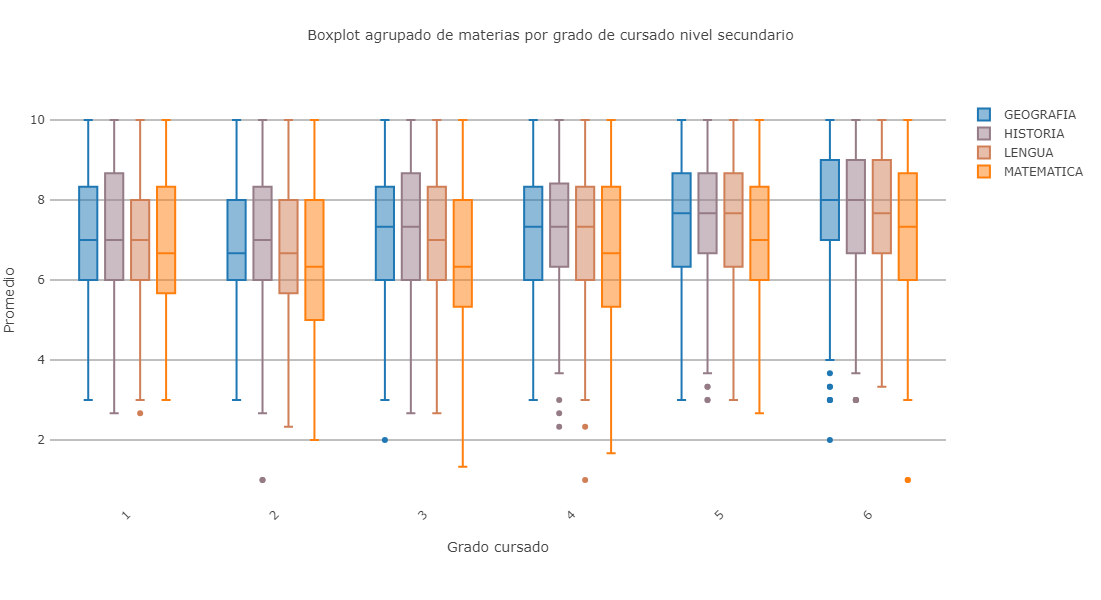

In [98]:

# Filtrar el dataset, excluyendo Año_cursado 7
alg_materias_primaria <- filter(SEC_NOTAS_MODIF, asignatura %in% c("LENGUA", "MATEMATICA", "GEOGRAFIA", "HISTORIA") & Año_cursado != 7)

# Definir colores
colores <- c("#1f77b4", "#ff7f0e")

# Crear el boxplot
figurita <- plot_ly(alg_materias_primaria, x = ~Año_cursado, y = ~Promedio, color = ~asignatura, type = "box", colors = colores)

# Ajustar el diseño del gráfico
figurita <- figurita %>% layout(
  title = list(
    text = "Boxplot agrupado de materias por grado de cursado nivel secundario",
    y = 0.95, # Ajustar la posición vertical del título
    font = list(size = 14) # Ajustar el tamaño de la fuente del título
  ),
  width = 1000,  # Establecer el ancho deseado (en píxeles)
  height = 600, # Establecer la altura deseada (en píxeles)
  boxmode = "group",
  xaxis = list(
    title = "Grado cursado",
    categoryorder = "array",
    categoryarray = unique(alg_materias_primaria$Año_cursado),
    tickangle = -45, # Girar las etiquetas del eje X para mayor claridad
    dtick = 1 # Reducir la separación entre las marcas del eje X
  ),
  yaxis = list(gridcolor = "grey"),
  margin = list(l = 50, r = 50, b = 100, t = 100, pad = 4)
)

# Mostrar el gráfico
figurita





In [99]:


#Hipótesis nula (H0): La mediana de Matemática es mayor o igual a 7.
#Hipótesis alternativa (H1): La mediana de Matemática es menor a  7.

resultados_wilcoxon <- list()

# Iterar sobre los seis años de cursado del secundario
for (i in 1:6) {
  # Filtrar los datos por asignatura igual a "MATEMATICA" y por el año de cursado actual
  datos_filtrados <- subset(SEC_NOTAS_MODIF, asignatura == "MATEMATICA" & Año_cursado == i)
  
  # Realizar el test de Wilcoxon comparando los valores de "Promedio" con una constante de 7
  test_result <- wilcox.test(datos_filtrados$Promedio, mu = 7, alternative = "less")
  
  # Almacenar el resultado en la lista
  resultados_wilcoxon[[paste("Año", i)]] <- test_result
}

# Mostrar los resultados
resultados_wilcoxon


$`Año 1`

	Wilcoxon signed rank test with continuity correction

data:  datos_filtrados$Promedio
V = 301249, p-value = 0.06444
alternative hypothesis: true location is less than 7


$`Año 2`

	Wilcoxon signed rank test with continuity correction

data:  datos_filtrados$Promedio
V = 261502, p-value < 2.2e-16
alternative hypothesis: true location is less than 7


$`Año 3`

	Wilcoxon signed rank test with continuity correction

data:  datos_filtrados$Promedio
V = 197315, p-value = 1.635e-13
alternative hypothesis: true location is less than 7


$`Año 4`

	Wilcoxon signed rank test with continuity correction

data:  datos_filtrados$Promedio
V = 216002, p-value = 2.211e-07
alternative hypothesis: true location is less than 7


$`Año 5`

	Wilcoxon signed rank test with continuity correction

data:  datos_filtrados$Promedio
V = 179593, p-value = 0.5017
alternative hypothesis: true location is less than 7


$`Año 6`

	Wilcoxon signed rank test with continuity correction

data:  datos_filtrados

In [100]:


#Hipótesis nula (H0): La mediana de Lengua es mayor o igual a 7.
#Hipótesis alternativa (H1): La mediana de Lenguaa es menor a  7.


resultados_wilcoxon <- list()

for (i in 1:6) {
  # Filtrar los datos por asignatura igual a "LENGUA" y por el año de cursado actual
  datos_filtrados <- subset(SEC_NOTAS_MODIF, asignatura == "LENGUA" & Año_cursado == i)
  
  # Eliminar duplicados por Documento para asegurar que cada alumno se cuente solo una vez
  datos_unicos <- datos_filtrados %>% distinct(Documento, .keep_all = TRUE)
  
  # Realizar el test de Wilcoxon comparando los valores de "Promedio" con una constante de 7
  test_result <- wilcox.test(datos_unicos$Promedio, mu = 7, alternative = "greater")
  
  # Almacenar el resultado en la lista
  resultados_wilcoxon[[paste("Año", i)]] <- test_result
}

# Mostrar los resultados
resultados_wilcoxon

$`Año 1`

	Wilcoxon signed rank test with continuity correction

data:  datos_unicos$Promedio
V = 290056, p-value = 0.2493
alternative hypothesis: true location is greater than 7


$`Año 2`

	Wilcoxon signed rank test with continuity correction

data:  datos_unicos$Promedio
V = 287040, p-value = 0.9991
alternative hypothesis: true location is greater than 7


$`Año 3`

	Wilcoxon signed rank test with continuity correction

data:  datos_unicos$Promedio
V = 266561, p-value = 0.3101
alternative hypothesis: true location is greater than 7


$`Año 4`

	Wilcoxon signed rank test with continuity correction

data:  datos_unicos$Promedio
V = 225760, p-value = 0.0004213
alternative hypothesis: true location is greater than 7


$`Año 5`

	Wilcoxon signed rank test with continuity correction

data:  datos_unicos$Promedio
V = 239275, p-value < 2.2e-16
alternative hypothesis: true location is greater than 7


$`Año 6`

	Wilcoxon signed rank test with continuity correction

data:  datos_unicos$Promed

In [101]:

# Crear un vector con los años cursados
anios <- unique(SEC_NOTAS_MODIF$Año_cursado)

# Iniciar un bucle for para cada año
for (anio in 1:6) {
  # Filtrar los datos por año y asignatura
  datos_anio <- subset(SEC_NOTAS_MODIF, Año_cursado == anio & asignatura == "MATEMATICA")
  
  # Eliminar duplicados por Documento para asegurar que cada alumno se cuente solo una vez
  datos_anio_unicos <- datos_anio %>% distinct(Documento, .keep_all = TRUE)
  
  # Calcular las diferencias entre las notas del tercer trimestre y las del primer trimestre
  diferencias <- datos_anio_unicos$NotasTercerT - datos_anio_unicos$NotasPrimerT
  
  # Realizar el test de Kolmogorov-Smirnov
  suppressWarnings({
    resultado_ks <- ks.test(diferencias, "pnorm")
  })
  
  # Imprimir el resultado del test de Kolmogorov-Smirnov
  print(paste("Año:", anio))
  print(resultado_ks)
  
  # Realizar el test de Wilcoxon
  resultado_wilcox_test <- wilcox.test(diferencias, mu = 0, alternative = "two.sided")
  
  # Imprimir el resultado del test de Wilcoxon
  print(resultado_wilcox_test)
}


[1] "Año: 1"

	One-sample Kolmogorov-Smirnov test

data:  diferencias
D = 0.18504, p-value < 2.2e-16
alternative hypothesis: two-sided


	Wilcoxon signed rank test with continuity correction

data:  diferencias
V = 161992, p-value = 0.873
alternative hypothesis: true location is not equal to 0

[1] "Año: 2"

	One-sample Kolmogorov-Smirnov test

data:  diferencias
D = 0.19688, p-value < 2.2e-16
alternative hypothesis: two-sided


	Wilcoxon signed rank test with continuity correction

data:  diferencias
V = 178214, p-value = 0.0384
alternative hypothesis: true location is not equal to 0

[1] "Año: 3"

	One-sample Kolmogorov-Smirnov test

data:  diferencias
D = 0.19875, p-value < 2.2e-16
alternative hypothesis: two-sided


	Wilcoxon signed rank test with continuity correction

data:  diferencias
V = 148259, p-value = 0.02018
alternative hypothesis: true location is not equal to 0

[1] "Año: 4"

	One-sample Kolmogorov-Smirnov test

data:  diferencias
D = 0.22739, p-value < 2.2e-16
alternat

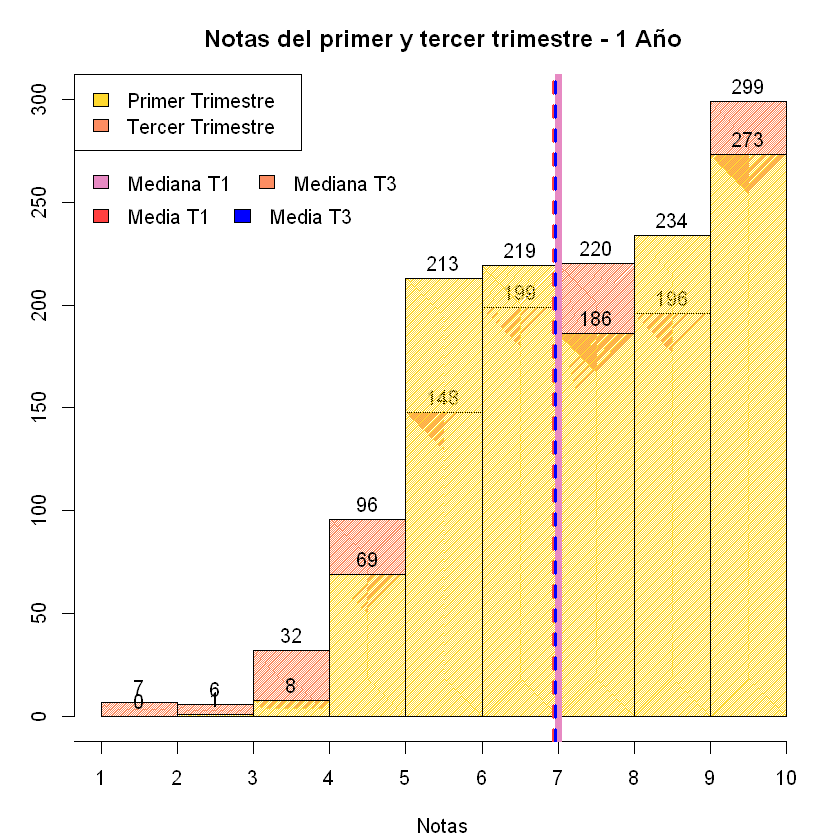

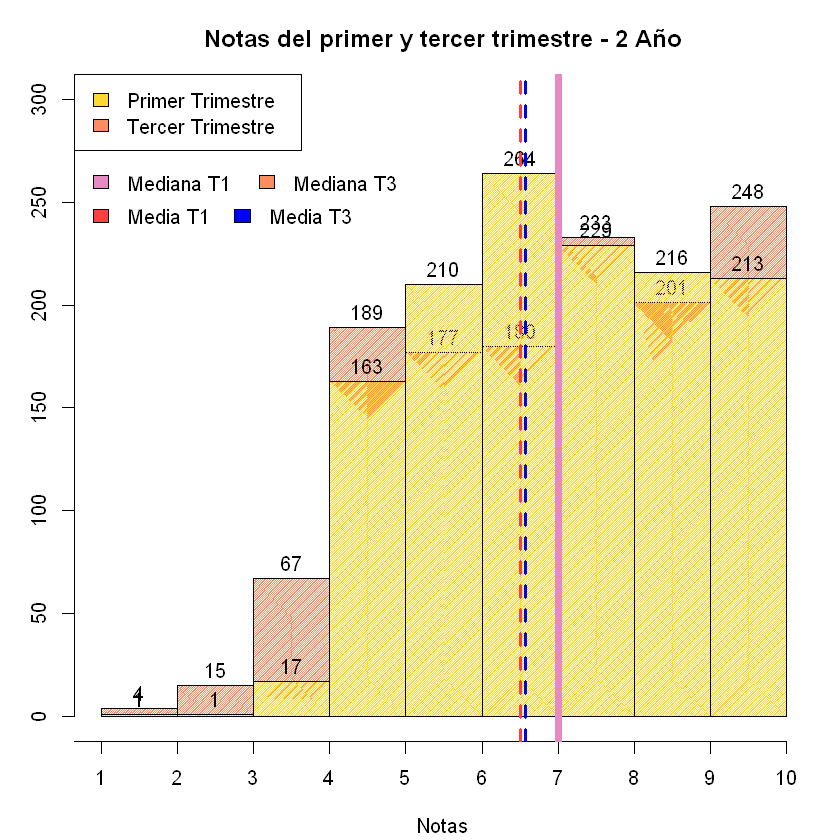

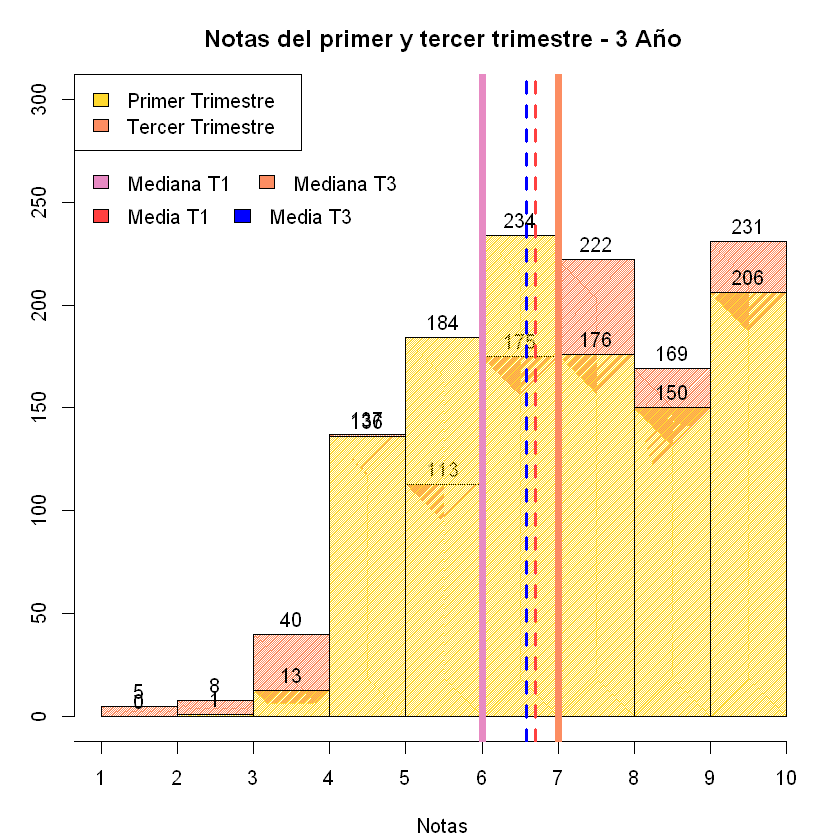

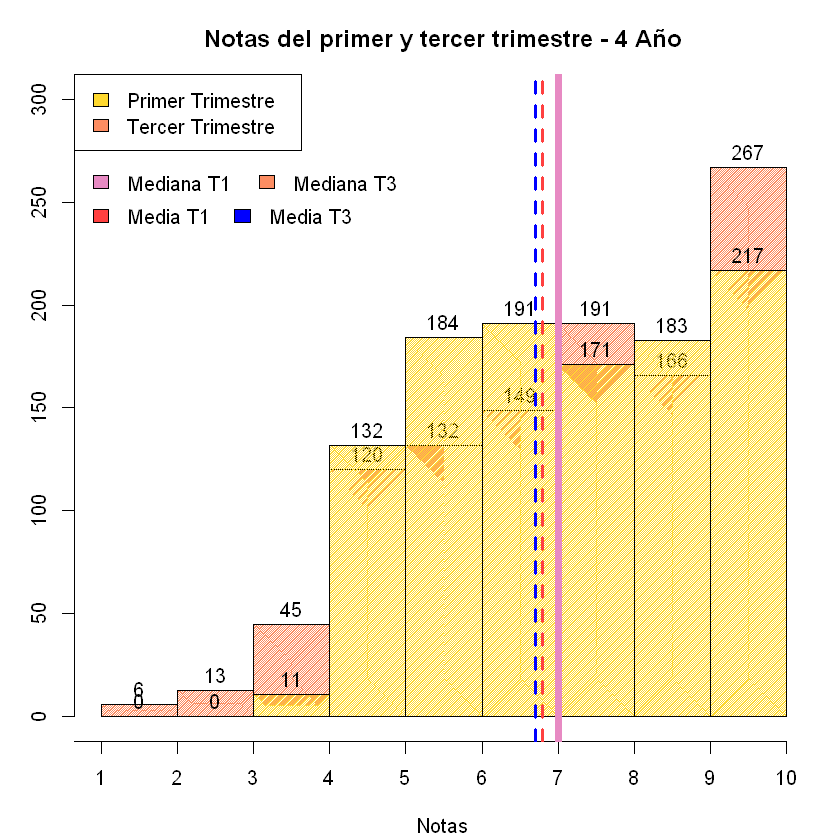

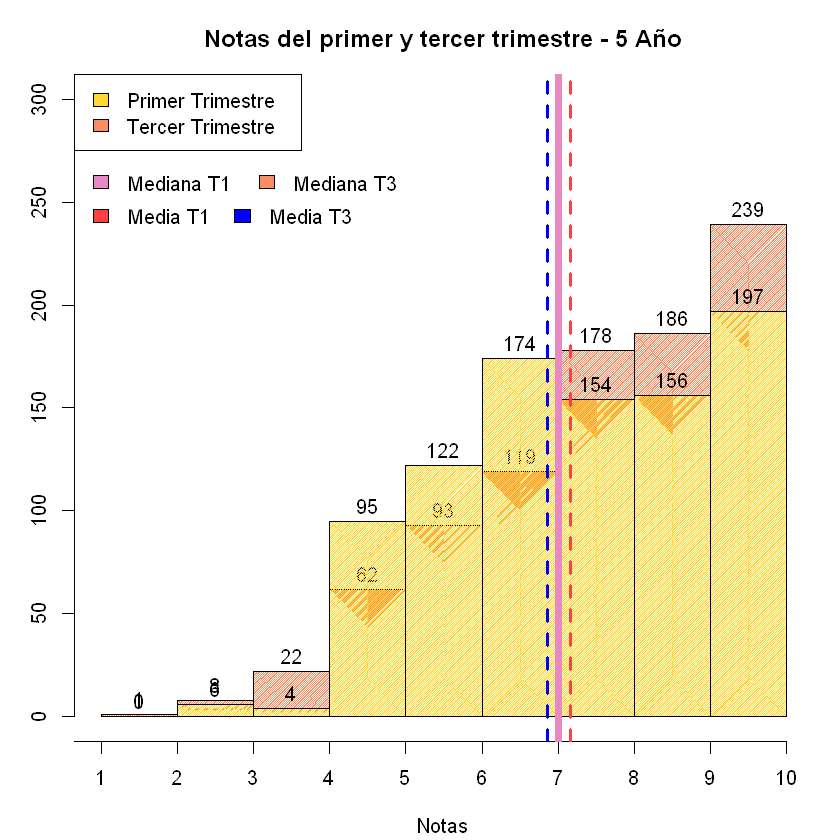

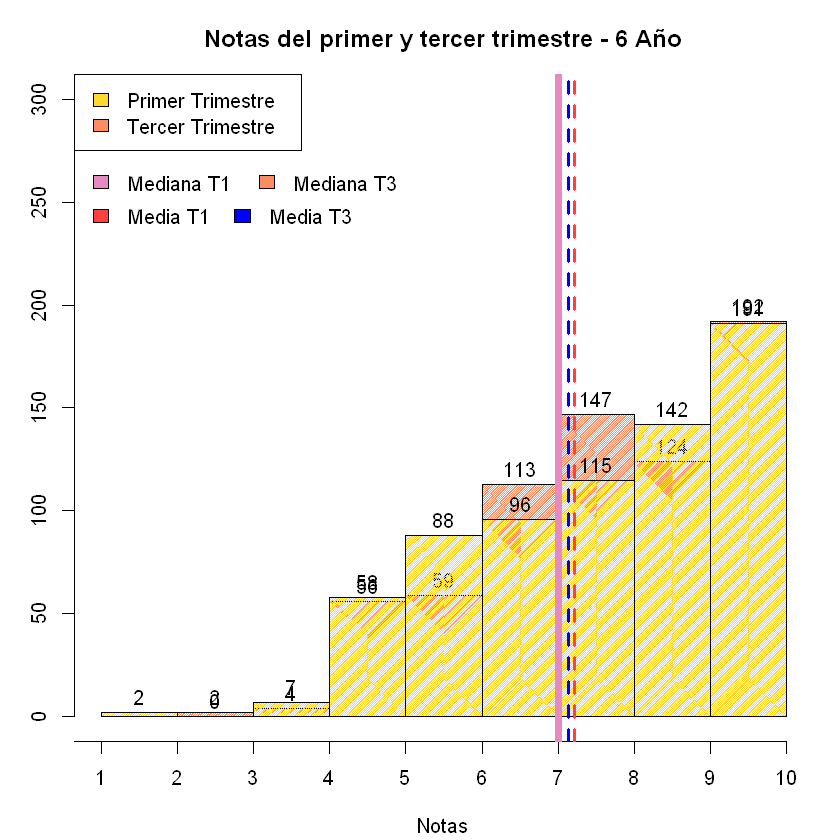

In [102]:

# Establecer el valor máximo para el eje y
max_y <- 300

# Generar gráficos para cada año de cursado
for (anio in 1:6) {
  datos_anio <- subset(SEC_NOTAS_MODIF, Año_cursado == anio & asignatura == "MATEMATICA")
  
  # Ajustar los márgenes y abrir una nueva ventana gráfica para cada gráfico
  par(mar=c(4, 3, 3, 1) + 0.1) # Ajusta los márgenes (inferior, izquierdo, superior, derecho)
  
  # Crear un histograma para el año actual
  hist(datos_anio$NotasTercerT, 
       col='#FC8D62',
       border='black', 
       breaks=c(1,2,3,4,5,6,7,8,9,10),
       xaxp=c(0,10,10),
       labels = TRUE,
       include.lowest=TRUE, 
       right=FALSE,
       plot=TRUE,
       density=100,
       xlab="Notas", 
       ylab="Frecuencia Absoluta", 
       main = paste("Notas del primer y tercer trimestre -", anio, "Año"),
       ylim=c(0, max_y) # Establecer el límite superior del eje y
  )
  
  hist(datos_anio$NotasPrimerT, 
       xaxp=c(0,10,10),
       breaks=c(1,2,3,4,5,6,7,8,9,10),
       border='black',
       labels = TRUE,
       include.lowest=TRUE,
       right=FALSE,
       add = TRUE, 
       col = '#FFD92F',
       density=100)
  
  # Agregar leyenda en el lado izquierdo
  legend("topleft", 
         legend = c("Primer Trimestre", "Tercer Trimestre"), 
         fill = c("#FFD92F", "#FC8D62"))
  
  mediana_tercer <- round(median(datos_anio$NotasTercerT), 2)
  mediana_primer <- round(median(datos_anio$NotasPrimerT), 2)
  media_tercer <- round(mean(datos_anio$NotasTercerT), 2)
  media_primer <- round(mean(datos_anio$NotasPrimerT), 2)
  
  # Agregar líneas verticales y etiquetas
  abline(v = mediana_tercer, col = '#FC8D62', lwd = 6)
  abline(v = mediana_primer, col = '#E78AC3', lwd = 6)
  
  abline(v = media_tercer, col = '#FF4040', lwd = 3, lty = 2)
  abline(v = media_primer, col = '#0000FF', lwd = 3, lty = 2)
  
  # Leyenda de las medias
  legend("bottomleft", c("Media T1", "Media T3"),
         fill = c('#FF4040', '#0000FF'),
         xpd = TRUE,
         horiz = TRUE,
         bty = "n",
         inset = c(0, 0.75))
  
  # Leyenda de las medianas
  legend("bottomleft", c("Mediana T1", "Mediana T3"),
         fill = c('#E78AC3', '#FC8D62'),
         xpd = TRUE,
         horiz = TRUE,
         bty = "n",
         inset = c(0, 0.80))
}


In [103]:
#HIPOTESIS TEST LEVENE 
#Hipótesis nula (H0): Las varianzas de los promedios de los estudiantes en Matemática y Lengua son iguales.
#Hipótesis alternativa (H1): Las varianzas de los promedios de los estudiantes en Matemática y Lengua no son iguales.

#Test de Wilcoxon-Mann-Whitney para Matemática y Lengua
#Hipótesis nula (H0): Las distribuciones de los promedios de los estudiantes en Matemática y Lengua son iguales.
#Hipótesis alternativa (H1): Las distribuciones de los promedios de los estudiantes en Matemática y Lengua son diferentes.




# Lista para almacenar los resultados de los tests
ks_test_results <- list()
var_test_results <- list()
wilcox_test_results <- list()

# Filtrar los datos para obtener solo los estudiantes de secundaria y las asignaturas de Matemática y Lengua
secundaria_matematica_lengua <- subset(SEC_NOTAS_MODIF, asignatura %in% c("MATEMATICA", "LENGUA") & Año_cursado >= 1 & Año_cursado <= 6)

# Realizar los tests para cada año desde primero hasta sexto
for (i in 1:6) {
  # Subset de datos para el año i
  datos_año <- subset(secundaria_matematica_lengua, Año_cursado == i)
  datos_año <- datos_año %>% distinct(Documento, .keep_all = TRUE)

  # Realizar el test de Kolmogorov-Smirnov para Matemática
  suppressWarnings({
    ks_test_mat <- ks.test(datos_año$Promedio[datos_año$asignatura == "MATEMATICA"], "pnorm")
  })
  
  # Realizar el test de Kolmogorov-Smirnov para Lengua
  suppressWarnings({
    ks_test_lengua <- ks.test(datos_año$Promedio[datos_año$asignatura == "LENGUA"], "pnorm")
  })
  
  # Guardar los resultados en la lista
  ks_test_results[[i]] <- list(MATEMATICA = ks_test_mat, LENGUA = ks_test_lengua)
  
  # Realizar el test de Levene para la comparación de varianzas
  var_test_result <- var.test(datos_año$Promedio[datos_año$asignatura == "MATEMATICA"], datos_año$Promedio[datos_año$asignatura == "LENGUA"])
  
  # Guardar el resultado en la lista
  var_test_results[[i]] <- var_test_result
  
  # Realizar el test de Wilcoxon-Mann-Whitney para Matemática y Lengua
  wilcox_test_result <- wilcox.test(datos_año$Promedio[datos_año$asignatura == "MATEMATICA"], datos_año$Promedio[datos_año$asignatura == "LENGUA"])
  
  # Guardar el resultado en la lista
  wilcox_test_results[[i]] <- wilcox_test_result
}

# Mostrar los resultados
for (i in 1:6) {
  cat("Año:", i, "\n")
  cat("Kolmogorov-Smirnov para Matemática:\n")
  print(ks_test_results[[i]]$MATEMATICA)
  cat("Kolmogorov-Smirnov para Lengua:\n")
  print(ks_test_results[[i]]$LENGUA)
  cat("Resultado del test de Levene:\n")
  print(var_test_results[[i]])
  cat("Resultado del test de Wilcoxon-Mann-Whitney:\n")
  print(wilcox_test_results[[i]])
}


Año: 1 
Kolmogorov-Smirnov para Matemática:

	One-sample Kolmogorov-Smirnov test

data:  datos_año$Promedio[datos_año$asignatura == "MATEMATICA"]
D = 0.99957, p-value < 2.2e-16
alternative hypothesis: two-sided

Kolmogorov-Smirnov para Lengua:

	One-sample Kolmogorov-Smirnov test

data:  datos_año$Promedio[datos_año$asignatura == "LENGUA"]
D = 0.99778, p-value < 2.2e-16
alternative hypothesis: two-sided

Resultado del test de Levene:

	F test to compare two variances

data:  datos_año$Promedio[datos_año$asignatura == "MATEMATICA"] and datos_año$Promedio[datos_año$asignatura == "LENGUA"]
F = 1.1061, num df = 68, denom df = 1146, p-value = 0.5277
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.8021759 1.6101723
sample estimates:
ratio of variances 
          1.106079 

Resultado del test de Wilcoxon-Mann-Whitney:

	Wilcoxon rank sum test with continuity correction

data:  datos_año$Promedio[datos_año$asignatura == "MATEMATICA"] and dat

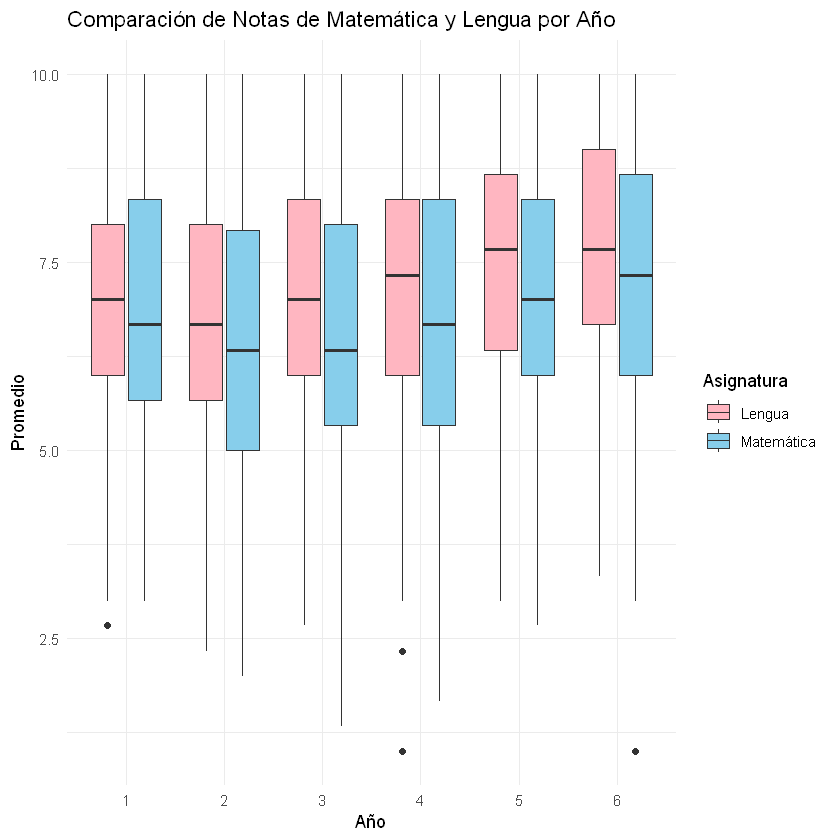

In [104]:


# Crear un dataframe para almacenar los datos combinados de Matemática y Lengua
combined_data <- data.frame()

# Iterar sobre los seis años de secundaria
for (i in 1:6) {
  # Filtrar los datos para Matemáticas y Lengua en el año actual del ciclo
  datos_matematica <- filter(SEC_NOTAS_MODIF, asignatura == "MATEMATICA" & Año_cursado == i)
  datos_lengua <- filter(SEC_NOTAS_MODIF, asignatura == "LENGUA" & Año_cursado == i)
  
  # Combinar las notas de Matemática y Lengua en un dataframe
  combined_year_data <- data.frame(
    Asignatura = c(rep("Matemática", nrow(datos_matematica)), rep("Lengua", nrow(datos_lengua))),
    Nota = c(datos_matematica$Promedio, datos_lengua$Promedio),
    Año = rep(i, nrow(datos_matematica) + nrow(datos_lengua))
  )
  
  # Agregar los datos combinados al dataframe principal
  combined_data <- rbind(combined_data, combined_year_data)
}

# Definir una paleta de colores con tonos de rosa y celeste
colores_pasteles <- c("#FFB6C1", "#87CEEB")  # Rosa claro y celeste

# Crear un boxplot comparativo de las notas de Matemática y Lengua para cada año
boxplot <- ggplot(data = combined_data, aes(x = factor(Año), y = Nota, fill = Asignatura)) +
  geom_boxplot() +
  labs(title = "Comparación de Notas de Matemática y Lengua por Año",
       x = "Año",
       y = "Promedio",
       fill = "Asignatura") +
  scale_fill_manual(values = colores_pasteles) +  # Usar la paleta de colores pasteles definida
  theme_minimal()

# Imprimir el boxplot
print(boxplot)


In [105]:
#Hipótesis nula (H0): Las medianas de los promedios de los estudiantes en escuelas privadas y públicas son iguales.
#Hipótesis alternativa (H1): Las medianas de los promedios de los estudiantes en escuelas privadas y públicas son diferentes.




# Filtrar los datos para obtener solo los estudiantes únicos por Documento
datos_unicos <- SEC_NOTAS_MODIF %>% distinct(Documento, .keep_all = TRUE)

# Lista para almacenar los resultados de los tests
ks_test_results <- list()
var_test_results <- list()
wilcox_test_results <- list()

# Iterar a través de los seis años de secundaria
for (i in 1:6) {
  # Filtrar los datos para el año actual
  datos_anio <- subset(datos_unicos, Año_cursado == i)
  
  # Separar los datos por si son de escuela privada o pública
  datos_privada <- subset(datos_anio, EsPrivada == "S")
  datos_publica <- subset(datos_anio, EsPrivada == "N")
  
  # Realizar el test de Kolmogorov-Smirnov
  ks_test_result <- ks.test(datos_privada$Promedio, datos_publica$Promedio)
  
  # Realizar el test de varianza
  var_test_result <- var.test(datos_privada$Promedio, datos_publica$Promedio)
  
  # Guardar los resultados en las listas
  ks_test_results[[i]] <- ks_test_result
  var_test_results[[i]] <- var_test_result
  # Realizar el test de Wilcoxon-Mann-Whitney para Matemática y Lengua
  wilcox_test_result <- wilcox.test(datos_año$Promedio)
  
  # Guardar el resultado en la lista
  wilcox_test_results[[i]] <- wilcox_test_result
}

# Mostrar los resultados
for (i in 1:6) {
  cat("Año:", i, "\n")
  cat("Resultado del test de Kolmogorov-Smirnov:\n")
  print(ks_test_results[[i]])
  cat("\n")
  cat("Resultado del test de varianza:\n")
  print(var_test_results[[i]])
  cat("\n")
  cat("Resultado del test de Wilcoxon-Mann-Whitney:\n")
  print(wilcox_test_results[[i]])
}


Warning message in ks.test(datos_privada$Promedio, datos_publica$Promedio):
"p-value will be approximate in the presence of ties"
Warning message in ks.test(datos_privada$Promedio, datos_publica$Promedio):
"p-value will be approximate in the presence of ties"
Warning message in ks.test(datos_privada$Promedio, datos_publica$Promedio):
"p-value will be approximate in the presence of ties"
Warning message in ks.test(datos_privada$Promedio, datos_publica$Promedio):
"p-value will be approximate in the presence of ties"
Warning message in ks.test(datos_privada$Promedio, datos_publica$Promedio):
"p-value will be approximate in the presence of ties"
Warning message in ks.test(datos_privada$Promedio, datos_publica$Promedio):
"p-value will be approximate in the presence of ties"


Año: 1 
Resultado del test de Kolmogorov-Smirnov:

	Two-sample Kolmogorov-Smirnov test

data:  datos_privada$Promedio and datos_publica$Promedio
D = 0.29598, p-value = 3.844e-13
alternative hypothesis: two-sided


Resultado del test de varianza:

	F test to compare two variances

data:  datos_privada$Promedio and datos_publica$Promedio
F = 0.6207, num df = 195, denom df = 1133, p-value = 4.46e-05
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.5045852 0.7762962
sample estimates:
ratio of variances 
          0.620698 


Resultado del test de Wilcoxon-Mann-Whitney:

	Wilcoxon signed rank test with continuity correction

data:  datos_año$Promedio
V = 307720, p-value < 2.2e-16
alternative hypothesis: true location is not equal to 0

Año: 2 
Resultado del test de Kolmogorov-Smirnov:

	Two-sample Kolmogorov-Smirnov test

data:  datos_privada$Promedio and datos_publica$Promedio
D = 0.31371, p-value = 3.22e-14
alternative hypothesis: two-si

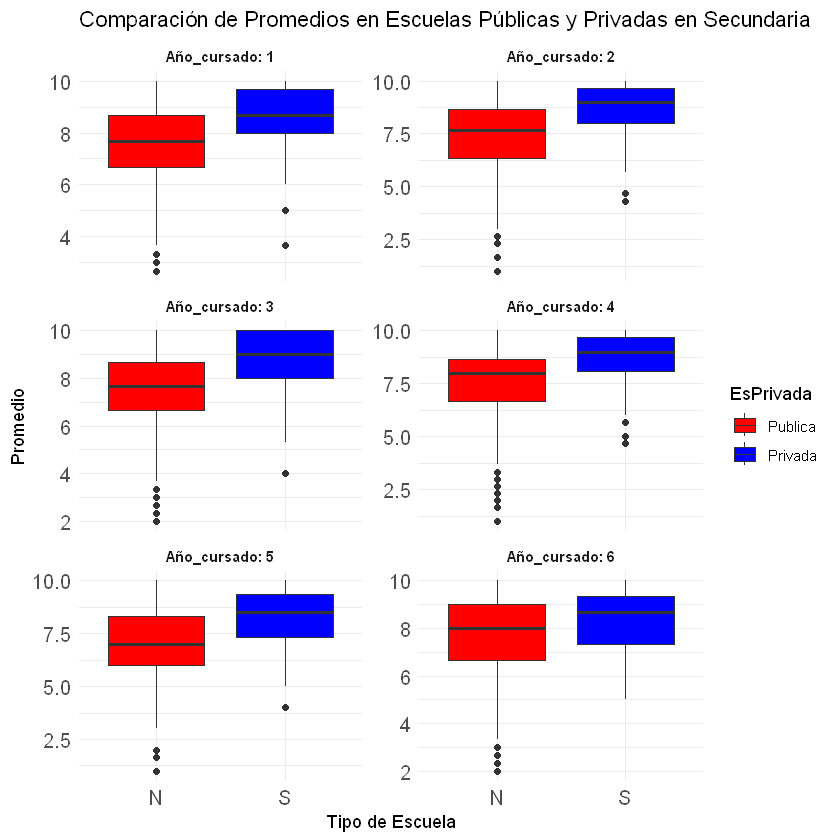

In [106]:


# Filtrar los datos para obtener solo los estudiantes únicos por Documento
datos_unicos <- SEC_NOTAS_MODIF %>% distinct(Documento, .keep_all = TRUE)

# Filtrar los datos para los años 1 a 6
datos_filtrados <- datos_unicos %>%
  filter(Año_cursado %in% 1:6)

# Crear el boxplot combinado usando facet_wrap para organizar por año
ggplot(datos_filtrados, aes(x = EsPrivada, y = Promedio, fill = EsPrivada)) +
  geom_boxplot() +
  labs(title = "Comparación de Promedios en Escuelas Públicas y Privadas en Secundaria",
       x = "Tipo de Escuela",
       y = "Promedio") +
  scale_fill_manual(values = c("N" = "red", "S" = "blue"), labels = c("Publica", "Privada")) +
  theme_minimal() +
  theme(
    axis.text = element_text(size = 12),  # Tamaño de los números en los ejes
    strip.text = element_text(face = "bold")  # Títulos de los años en negrita
  ) +
  facet_wrap(~ Año_cursado, ncol = 2, scales = "free_y", labeller = label_both)


In [107]:
#ANOVA DE UN FACTOR


#Matricula Total
Matriculas_uruguay <- filter(sec_por_dep, ...1 == "URUGUAY")


#Limpieza
columnas <- c("Primero", "Segundo", "Tercero", "Cuarto", "Quinto", "Sexto")
for (x in columnas) {
  Matriculas_uruguay_FIX[[x]] <- gsub(",", "", Matriculas_uruguay_FIX[[x]]) #Les saco la , si es que tienen
  Matriculas_uruguay_FIX[[x]] <- as.integer(Matriculas_uruguay_FIX[[x]])} #Los paso a INT

print(Matriculas_uruguay_FIX)

for (x in columnas) {
  total_primero <- sum(Matriculas_uruguay_FIX[[x]], na.rm = TRUE)
  print(paste(x, total_primero))
}

# Realizar la prueba de normalidad para cada columna
for (i in seq_along(columnas)) {
  # Verificar si el tamaño de la muestra es menor o igual a 50
    resultados[[i]] <- ks.test(Matriculas_uruguay_FIX[[columnas[i]]], "pnorm")
}

for (i in seq_along(columnas)) {
  print(paste("Resultado para", columnas[i], ":", resultados[[i]]$method))
  print(resultados[[i]])
}

# A tibble: 10 x 14
   ...1    ...2    ...3  ...4  ...5  Primero Segundo Tercero Cuarto Quinto Sexto
   <chr>   <chr>   <chr> <chr> <chr>   <int>   <int>   <int>  <int>  <int> <int>
 1 URUGUAY Estatal Urba~ AGRO  243.0      50      53      37     41     25    14
 2 URUGUAY Estatal Urba~ ORIE~ 4503~     858     973     846    716    620   490
 3 URUGUAY Estatal Urba~ TECN~ 1607~     294     320     249    258    171   152
 4 URUGUAY Estatal Rura~ AGRO  58.0       18      16      17      1      5     1
 5 URUGUAY Estatal Rura~ ORIE~ 940.0     220     181     156    134    138   111
 6 URUGUAY Estatal Rura~ TECN~ 101.0      13      22      25     18     17     6
 7 URUGUAY Estatal Rura~ ORIE~ 314.0      54      64      57     55     41    43
 8 URUGUAY Privado Urba~ ORIE~ 2240~     405     362     367    379    375   352
 9 URUGUAY Privado Rura~ AGRO  125.0      33      28      12     13     15    13
10 URUGUAY Privado Rura~ ORIE~ 142.0      27      31      24     21     18    21
# i 3 mo

In [108]:
#ANOVA DE UN FACTOR.La aplicación del test no es valida ya que los datos no cumplen las condiciones para hacer el test. Con estos datos 
#el test correcta a aplicar es el de Kruskall Wallis.

#H0: las matriculas de los seis años son iguales
#H1: las matriculas de los seis años NO son iguales


PRIMERO <- c(50, 858, 294, 18, 220, 13, 54, 405, 33, 27)
SEGUNDO <- c(53, 973, 320, 16, 181, 22, 64, 362, 28, 31)
TERCERO <- c(37, 846, 249, 17, 156, 25, 57, 367, 12, 14)
CUARTO <- c(41, 716, 258, 1, 134, 18, 55, 379, 13, 21)
QUINTO <- c(25, 620, 171, 5, 138, 17, 41, 375, 15, 18)
SEXTO <- c(14, 490, 152, 1, 111, 6, 43, 352, 13, 21)

AÑOS <- as.numeric(c(PRIMERO, SEGUNDO, TERCERO, CUARTO, QUINTO, SEXTO))
MATR<- as.factor(c(rep("PRIMERO", length(PRIMERO)), rep("SEGUNDO", length(SEGUNDO)), rep("TERCERO", length(TERCERO)), rep("CUARTO", length(PRIMERO)), rep("QUINTO", length(SEGUNDO)), rep("SEXTO", length(TERCERO))))

MATRICULA_F <- data.frame(AÑOS, MATR)
MATRICULA_F
                   


AÑOS MATR   
1   50  PRIMERO
2  858  PRIMERO
3  294  PRIMERO
4   18  PRIMERO
5  220  PRIMERO
6   13  PRIMERO
7   54  PRIMERO
8  405  PRIMERO
9   33  PRIMERO
10  27  PRIMERO
11  53  SEGUNDO
12 973  SEGUNDO
13 320  SEGUNDO
14  16  SEGUNDO
15 181  SEGUNDO
16  22  SEGUNDO
17  64  SEGUNDO
18 362  SEGUNDO
19  28  SEGUNDO
20  31  SEGUNDO
21  37  TERCERO
22 846  TERCERO
23 249  TERCERO
24  17  TERCERO
25 156  TERCERO
26  25  TERCERO
27  57  TERCERO
28 367  TERCERO
29  12  TERCERO
30  14  TERCERO
31  41  CUARTO 
32 716  CUARTO 
33 258  CUARTO 
34   1  CUARTO 
35 134  CUARTO 
36  18  CUARTO 
37  55  CUARTO 
38 379  CUARTO 
39  13  CUARTO 
40  21  CUARTO 
41  25  QUINTO 
42 620  QUINTO 
43 171  QUINTO 
44   5  QUINTO 
45 138  QUINTO 
46  17  QUINTO 
47  41  QUINTO 
48 375  QUINTO 
49  15  QUINTO 
50  18  QUINTO 
51  14  SEXTO  
52 490  SEXTO  
53 152  SEXTO  
54   1  SEXTO  
55 111  SEXTO  
56   6  SEXTO  
57  43  SEXTO  
58 352  SEXTO  
59  13  SEXTO  
60  21  SEXTO

            Df  Sum Sq Mean Sq F value Pr(>F)
MATR         5   52662   10532   0.178   0.97
Residuals   54 3191347   59099               

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = AÑOS ~ MATR, data = MATRICULA_F)

$MATR
                 diff       lwr      upr     p adj
PRIMERO-CUARTO   33.6 -287.6078 354.8078 0.9996012
QUINTO-CUARTO   -21.1 -342.3078 300.1078 0.9999597
SEGUNDO-CUARTO   41.4 -279.8078 362.6078 0.9989006
SEXTO-CUARTO    -43.3 -364.5078 277.9078 0.9986352
TERCERO-CUARTO   14.4 -306.8078 335.6078 0.9999940
QUINTO-PRIMERO  -54.7 -375.9078 266.5078 0.9958490
SEGUNDO-PRIMERO   7.8 -313.4078 329.0078 0.9999997
SEXTO-PRIMERO   -76.9 -398.1078 244.3078 0.9802728
TERCERO-PRIMERO -19.2 -340.4078 302.0078 0.9999747
SEGUNDO-QUINTO   62.5 -258.7078 383.7078 0.9922767
SEXTO-QUINTO    -22.2 -343.4078 299.0078 0.9999481
TERCERO-QUINTO   35.5 -285.7078 356.7078 0.9994784
SEXTO-SEGUNDO   -84.7 -405.9078 236.5078 0.9699230
TERCERO-SEGUNDO -27.0 -348.2078 294.2078 0.9998636
TERCERO-SEXTO    57.7 -263.5078 378.9078 0.9946695



	Shapiro-Wilk normality test

data:  modelo_anova$residuals
W = 0.74377, p-value = 6.842e-09


Df F value   Pr(>F)   
group  5 0.1243193 0.9863439
      54        NA        NA


     Balanced one-way analysis of variance power calculation 

              k = 6
              n = 1203
              f = 0.2
      sig.level = 0.05
          power = 1

NOTE: n is number in each group


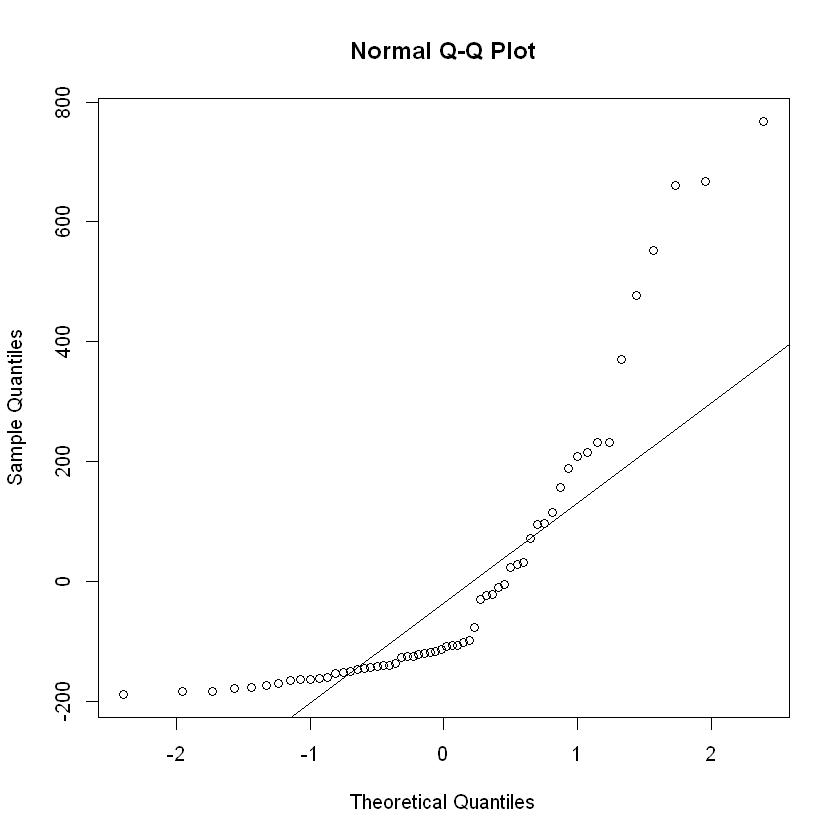

In [109]:


# Realizar el ANOVA
modelo_anova <- aov(AÑOS ~ MATR, data = MATRICULA_F)

# Ver el resumen del ANOVA
summary(modelo_anova)

# Realizar el test post-hoc de Tukey
TukeyHSD(modelo_anova)

# Graficar los residuos
qqnorm(modelo_anova$residuals)
qqline(modelo_anova$residuals)

# Realizar el test de Shapiro-Wilk para normalidad de los residuos
shapiro.test(modelo_anova$residuals)

# Homogeneidad de las Varianzas con el test de Levene
leveneTest(AÑOS ~ MATR, data = MATRICULA_F)

# Calcular la potencia del ANOVA
potencia <- pwr.anova.test(k = 6, n = 1203, f = 0.2, sig.level = 0.05)
potencia

In [110]:
#KRUSKALL WALLIS
#H0: las matriculas de los seis años son iguales
#H1: las matriculas de los seis años NO son iguales

kruskal.test(MATRICULA_F$AÑOS, MATRICULA_F$MATR)



	Kruskal-Wallis rank sum test

data:  MATRICULA_F$AÑOS and MATRICULA_F$MATR
Kruskal-Wallis chi-squared = 2.1815, df = 5, p-value = 0.8235


In [111]:
#ANCOVA 
#Este test se deja solo como muestra, ya que no es posible realizarlo con nuestros datos, ya que no cumplen con el supuesto de Normalidad. 


#H0: Existe una relación significativa entre los promedios de Matematica, lengua e Historia controlando el efecto del promedio de Geografia
#H1: No existe una relación significativa entre los promedios de Matematica, lengua e Historia controlando el efecto del promedio de Geografia


# Filtrar el conjunto de datos para el sexto año y las asignaturas especificadas
sexto_anio <- SEC_NOTAS_MODIF %>%
  filter(Año_cursado == 6 & asignatura %in% c("HISTORIA", "MATEMATICA", "LENGUA", "GEOGRAFIA"))

# Identificar los documentos de los alumnos que realizan las 4 asignaturas
documentos_completos <- sexto_anio %>%
  group_by(Documento) %>%
  filter(n_distinct(asignatura) == 4) %>%
  distinct(Documento)

# Filtrar el dataset original para obtener solo los registros de los alumnos que realizan las 4 asignaturas
sexto_anio_completo <- SEC_NOTAS_MODIF %>%
  filter(Año_cursado == 6 & Documento %in% documentos_completos$Documento & asignatura %in% c("HISTORIA", "MATEMATICA", "LENGUA", "GEOGRAFIA"))

promedios_alumnos <- sexto_anio_completo %>%
  group_by(Documento, asignatura) %>%
  summarise(Promedio = mean(Promedio, na.rm = TRUE), .groups = 'drop') %>%
  pivot_wider(names_from = asignatura, values_from = Promedio)

# Mostrar el dataset con los promedios
promedios_alumnos

Documento GEOGRAFIA HISTORIA LENGUA MATEMATICA
1   43339639   9.330    6.00     8.33    7.00     
2   43480836   9.330    6.33     8.67    8.00     
3   44032382   6.330    6.00     6.33    6.67     
4   44150085   8.670    6.00     7.33    8.00     
5   44209502   7.670    6.67     6.67    4.00     
6   44280963   6.670    6.00     6.67    7.33     
7   44495534   7.000    7.33     8.00    5.33     
8   44553627  10.000    9.00     8.67    8.00     
9   44621012   7.330    6.00     7.33    4.67     
10  44622779   8.330    9.00     8.33    5.00     
11  44623029   6.330    7.33     6.00    5.67     
12  44643271   7.330    9.33     7.33    8.00     
13  44861703   6.330    6.33     5.33    4.33     
14  44873595   7.000    7.00     6.00    6.00     
15  44894085   9.000    7.67     7.33    8.00     
16  44901276   6.000    7.33     8.33    6.00     
17  44920992   8.665    6.00     7.00    6.67     
18  45046037   7.670    5.00     7.67    5.00     
19  45046823   7.000    9.33     9.00   10.00     
20  45146325   8.670    9.67     7.33    7.67     
21  45165973   6.330    6.33     4.67    4.00     
22  45335798   7.000    7.33     6.33    8.00     
23  45335974   6.670    7.67     5.33    7.00     
24  45335979   8.670    8.67     8.67    8.00     
25  45336038   7.670    8.33     7.67    7.00     
26  45336059   7.670    8.33     8.33    5.67     
27  45551905   4.670    5.00     6.00    3.33     
28  45551944   6.665    7.33     7.33    6.00     
29  45551945   8.000    7.00     6.33    8.67     
30  45552885   6.000    6.67     4.67    4.00     
... ...       ...       ...      ...    ...       
613 47326368   9.170     9.00     9.33   8.00     
614 47326371  10.000    10.00     8.00   9.67     
615 47335369   7.000     6.33     5.33   4.67     
616 47378295   7.670     8.00     7.33   6.00     
617 47406730   7.670     8.33     7.33   7.33     
618 47406731   6.000     6.33     5.00   3.33     
619 47406736   8.500     8.33     7.00   8.33     
620 47406737   7.835     7.00     7.67   9.00     
621 47406739   8.000     7.33     8.33   8.67     
622 47406743   9.330     8.33     9.33   9.33     
623 47406744   9.500    10.00    10.00  10.00     
624 47406752   9.670     9.33     9.67   9.67     
625 47406754   6.670     6.00     5.67   6.00     
626 47406755   8.500     6.00     7.00   4.67     
627 47406766   7.835     9.67     7.00   9.67     
628 47406769  10.000    10.00    10.00   9.33     
629 47406773   9.000     9.00     9.67   7.67     
630 47407975   9.670    10.00     9.67   9.33     
631 47408001   9.670    10.00     9.00   9.00     
632 47408003   7.000     6.00     6.00   6.00     
633 47408010   7.665    10.00     7.00   8.67     
634 47408052   7.000     7.33     7.33   5.33     
635 47408780   5.500     6.33     7.00   5.00     
636 47518529   6.670     6.33     7.67   4.67     
637 47526940   7.000     6.00     7.00   7.67     
638 50182672   8.000     7.33     7.33   7.33     
639 94673743   9.170    10.00     7.67   8.33     
640 94981182   8.000     5.00     8.67   6.00     
641 95427834   7.330     6.00     6.00   6.00     
642 96189429   7.670     5.33     7.33   6.67


Call:
lm(formula = GEOGRAFIA ~ HISTORIA + LENGUA + MATEMATICA, data = promedios_alumnos)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6475 -0.4864  0.0240  0.5154  2.5740 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.72920    0.19910   8.685  < 2e-16 ***
HISTORIA     0.25039    0.03120   8.024 4.91e-15 ***
LENGUA       0.37106    0.03048  12.172  < 2e-16 ***
MATEMATICA   0.18543    0.02363   7.847 1.80e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8122 on 638 degrees of freedom
Multiple R-squared:  0.6152,	Adjusted R-squared:  0.6134 
F-statistic:   340 on 3 and 638 DF,  p-value: < 2.2e-16



	Shapiro-Wilk normality test

data:  residuos
W = 0.99239, p-value = 0.002295


HISTORIA     LENGUA MATEMATICA 
  1.842851   1.838202   1.613817

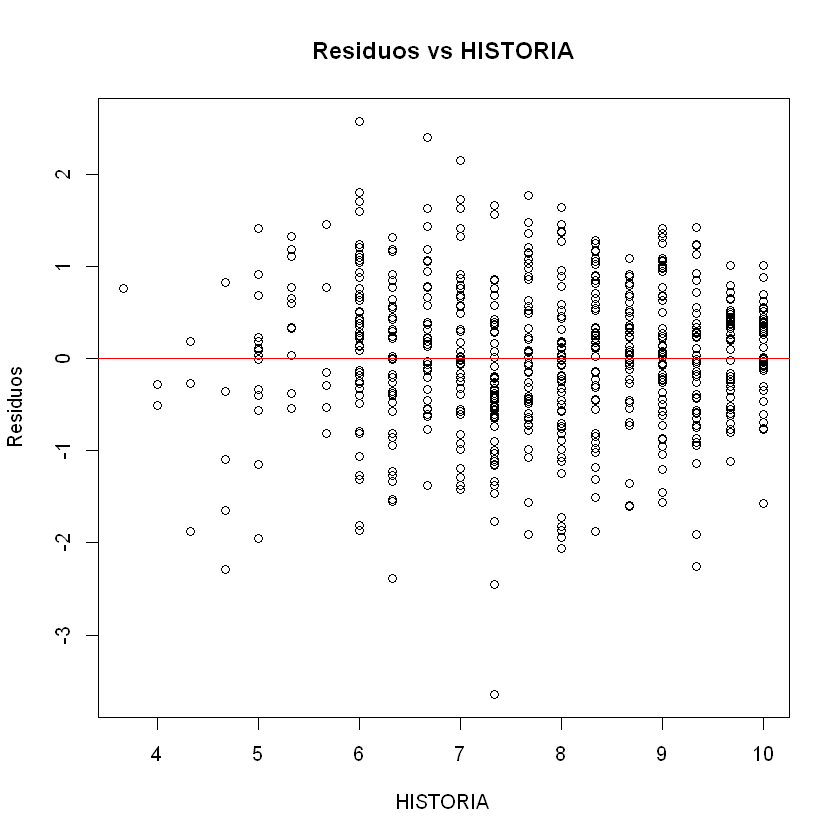

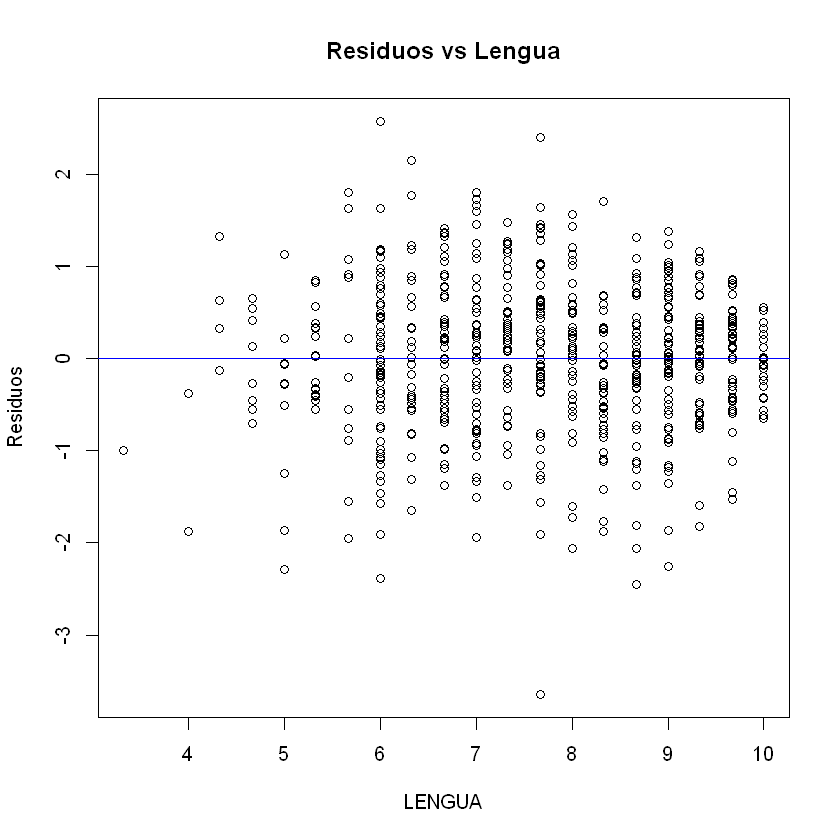

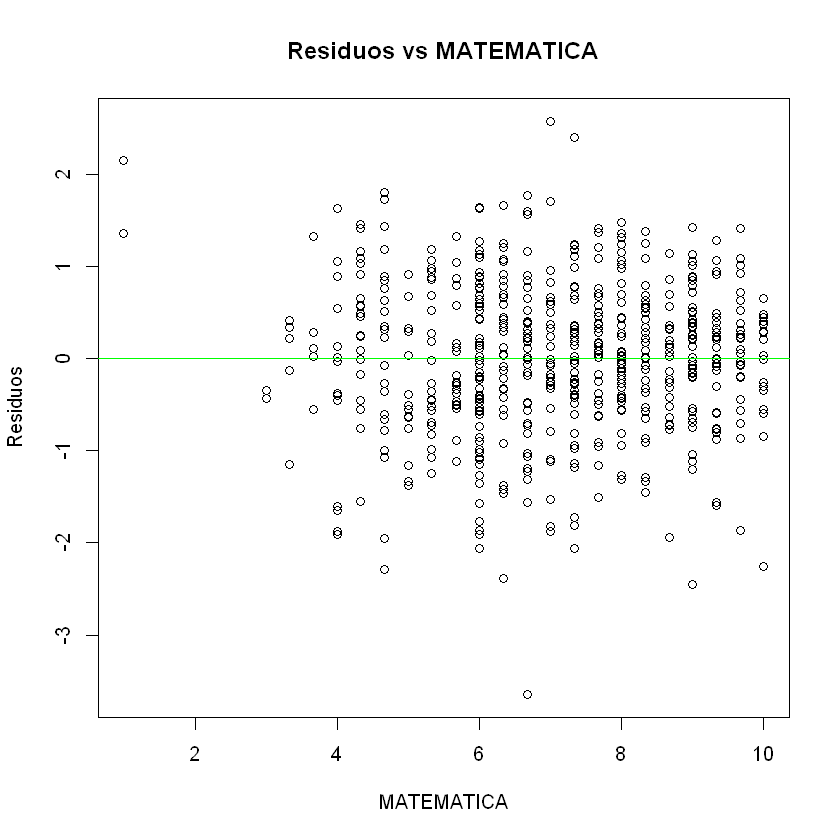

In [112]:

# Realización del ANCOVA
modelo <- lm(GEOGRAFIA ~ HISTORIA + LENGUA + MATEMATICA, data = promedios_alumnos)
summary(modelo)

#SUPUESTOS

# Residuos del modelo
residuos <- residuals(modelo)

# Prueba de Shapiro-Wilk para la normalidad de los residuos
shapiro.test(residuos)



# Calcular los VIF para cada covariable en el modelo
vif(modelo)
#Si alguno de los VIF es mayor que 10, indicaría la presencia de colinealidad entre las covariables correspondientes en el modelo. 


# Gráfico de dispersión de los residuos vs. cada covariable 

plot(residuos ~ HISTORIA, data = promedios_alumnos, xlab = "HISTORIA", ylab = "Residuos", main = "Residuos vs HISTORIA")
abline(h = 0, col = "red")

plot(residuos ~ LENGUA, data = promedios_alumnos, xlab = "LENGUA", ylab = "Residuos", main = "Residuos vs Lengua")
abline(h = 0, col = "blue")

plot(residuos ~ MATEMATICA, data = promedios_alumnos, xlab = "MATEMATICA", ylab = "Residuos", main = "Residuos vs MATEMATICA")
abline(h = 0, col = "green")


In [113]:
# Agregar una columna al conjunto de datos que contenga la cantidad de materias que se lleva cada alumno
SEC_NOTAS_MODIF$Cantidad_Rinde <- ave(SEC_NOTAS_MODIF$Resultado == "Rinde", SEC_NOTAS_MODIF$Documento, FUN = sum)

# Mostrar los primeros registros del conjunto de datos con la nueva columna
SEC_NOTAS_MODIF

CUE     Departamento EsPrivada turno  Documento
1     9009150 URUGUAY      N         NOCHE  43021949 
2     9009150 URUGUAY      N         NOCHE  43021949 
3     9009150 URUGUAY      N         NOCHE  43021949 
4     9009150 URUGUAY      N         NOCHE  43021949 
5     9009150 URUGUAY      N         NOCHE  43021949 
6     9009150 URUGUAY      N         NOCHE  43021949 
7     9009150 URUGUAY      N         NOCHE  43021949 
8     9009150 URUGUAY      N         NOCHE  43021949 
9     9009150 URUGUAY      N         NOCHE  43021949 
10    9009150 URUGUAY      N         NOCHE  43021949 
11    9009150 URUGUAY      N         NOCHE  43021949 
12    9009150 URUGUAY      N         NOCHE  43021949 
13    9003762 URUGUAY      N         NOCHE  43027670 
14    9003762 URUGUAY      N         NOCHE  43027670 
15    9003762 URUGUAY      N         NOCHE  43027670 
16    9003762 URUGUAY      N         NOCHE  43027670 
17    9003762 URUGUAY      N         NOCHE  43027670 
18    9003762 URUGUAY      N         NOCHE  43027670 
19    9003762 URUGUAY      N         NOCHE  43027670 
20    9003762 URUGUAY      N         NOCHE  43027670 
21    9003762 URUGUAY      N         NOCHE  43027670 
22    9001263 URUGUAY      N         NOCHE  43113014 
23    9001263 URUGUAY      N         NOCHE  43113014 
24    9001263 URUGUAY      N         NOCHE  43113014 
25    9001263 URUGUAY      N         NOCHE  43113014 
26    9001263 URUGUAY      N         NOCHE  43113014 
27    9001263 URUGUAY      N         NOCHE  43113014 
28    9007758 URUGUAY      N         TARDE  43146868 
29    9007758 URUGUAY      N         TARDE  43146868 
30    9007758 URUGUAY      N         TARDE  43146868 
...   ...     ...          ...       ...    ...      
84493 9003342 URUGUAY      N         MAÑANA 96162043 
84494 9003342 URUGUAY      N         MAÑANA 96162043 
84495 9003342 URUGUAY      N         MAÑANA 96162043 
84496 9003342 URUGUAY      N         MAÑANA 96162043 
84497 9004542 URUGUAY      S         MAÑANA 96189429 
84498 9004542 URUGUAY      S         MAÑANA 96189429 
84499 9004542 URUGUAY      S         MAÑANA 96189429 
84500 9004542 URUGUAY      S         MAÑANA 96189429 
84501 9004542 URUGUAY      S         MAÑANA 96189429 
84502 9004542 URUGUAY      S         MAÑANA 96189429 
84503 9004542 URUGUAY      S         MAÑANA 96189429 
84504 9004542 URUGUAY      S         MAÑANA 96189429 
84505 9004542 URUGUAY      S         MAÑANA 96189429 
84506 9004542 URUGUAY      S         MAÑANA 96189429 
84507 9004542 URUGUAY      S         MAÑANA 96189429 
84508 9004542 URUGUAY      S         MAÑANA 96189429 
84509 9004542 URUGUAY      S         MAÑANA 96189429 
84510 9004542 URUGUAY      S         MAÑANA 96189429 
84511 9003342 URUGUAY      N         TARDE  96213905 
84512 9003342 URUGUAY      N         TARDE  96213905 
84513 9003342 URUGUAY      N         TARDE  96213905 
84514 9003342 URUGUAY      N         TARDE  96213905 
84515 9003342 URUGUAY      N         TARDE  96213905 
84516 9003342 URUGUAY      N         TARDE  96213905 
84517 9003342 URUGUAY      N         TARDE  96213905 
84518 9003342 URUGUAY      N         TARDE  96213905 
84519 9003342 URUGUAY      N         TARDE  96213905 
84520 9003342 URUGUAY      N         TARDE  96213905 
84521 9003342 URUGUAY      N         TARDE  96213905 
84522 9003342 URUGUAY      N         TARDE  96213905 
      asignatura                                IdAlumno idDivision
1     DERECHO COMERCIAL                         418268   108998    
2     GEOGRAFIA                                 418268   108998    
3     HISTORIA                                  418268   108998    
4     LEGISLACION LABORAL Y PRACTICA IMPOSITIVA 418268   108998    
5     LENGUA                                    418268   108998    
6     INGLES                                    418268   108998    
7     MACROECONOMIA                             418268   108998    
8     MATEMATICA                                418268   108998    
9     PSICOLOGIA                              

In [114]:
#MANOVA UNIDIRECCIONAL

#Este test se deja solo como muestra, porque no es posible realizarlo con nuestros datos, ya que no cumplen con el supuesto de Normalidad. 

# H0: las notas del Tercer Trimestre afectan tanto a la cantidad de materias aprobadas como los promedios de los alumnos de primer año 
#que realizan la asignatura Matemática.

# H1: las notas del Tercer Trimestre no afectan tanto a la cantidad de materias aprobadas como los promedios de los alumnos de primer año 
#que realizan la asignatura Matemática.



# Filtrar para el primer año de Matemáticas
datos_primer_anio_matematica <- filter(SEC_NOTAS_MODIF, asignatura == "MATEMATICA" & Año_cursado == 1 )
datos_primer_anio_matematica
nrow(datos_primer_anio_matematica)


# Realizar el MANOVA
modelo_manova <- manova(cbind(Cantidad_Rinde, Promedio) ~ NotasTercerT, data = datos_primer_anio_matematica)

# Ver el resumen del MANOVA
summary(modelo_manova)



# normalidad multivariante de los residuos
#Función de Mardia
mardia2<-function(datos_primer_anio_matematica){
  n<-nrow(datos_primer_anio_matematica)
  k<-ncol(datos_primer_anio_matematica)

  x<-as.matrix(datos_primer_anio_matematica)
  media<-colMeans(datos_primer_anio_matematica)
  matriz.media<-matrix(media,nrow=n,ncol=k,byrow=TRUE)

  S<-cov(datos_primer_anio_matematica)*(n-1)/n
  SI<-solve(S)   #Inversa de la matriz de covarianzas

  distm<-((x-matriz.media)%*%SI)%*%t((x-matriz.media))

  gl<-k*(k+1)*(k+2)/6

  # Medida de Asimetría Multivariada
  AM<-sum(distm^3)/n^2

  if (n<30){
  # Test Multivariado de Asimetría de Mardia - Muestras Pequeñas
  c<-(n+1)*(n+3)*(k+1)/(n*((n+1)*(k+1)-6))
  TAM<-n*c/6*AM
  valor_p1<-pchisq(TAM,gl,lower.tail = FALSE)
  } else {
    # Test Multivariado de Asimetríıa de Mardia - Muestras grandes
  TAM<-n/6*AM
  valor_p1<-pchisq(TAM,gl,lower.tail = FALSE)
  }
  #Medida de Kurtosis Multivariado
  KM<-sum((diag(distm))^2)/n

  #Test Multivariado de Kurtosis de Mardia
  TKM<-(KM-k*(k+2))*sqrt(n/(8*k*(k+2)))
  TKM2<-TKM^2
  valor_p2<-pchisq(TKM2,1,lower.tail = FALSE)

  cat("Test de Normalidad Multivariada", "\n" ,
      "Ho: Los datos siguen una Distribución Normal Multivariada","\n")
  cat("----------------------------------------------------------------","\n")
  cat("Prueba de Mardia - Asimetría","\n",
      "Asimetría Multivariada =", AM, "\n",
      "Valor de TAM =",TAM, "\n",
      "Valor p=", valor_p1, "\n")
  cat("----------------------------------------------------------------","\n")
  cat("Prueba de Mardia - Curtosis","\n",
      "Curtosis Multivariado =", KM, "\n",
      "Valor de TKM =",TKM2, "\n",
      "Valor p=", valor_p2, "\n")
     }

residuos <- residuals(modelo_manova)
mardia2(residuos)

# Prueba de homogeneidad de las varianzas-covarianzas
mauchly_test <- mauchly.test(modelo_manova)
mauchly_test

CUE     Departamento EsPrivada turno      Documento asignatura IdAlumno
1    9009150 URUGUAY      N         NOCHE      43480603  MATEMATICA   31190 
2    9003762 URUGUAY      N         NOCHE      43480657  MATEMATICA  814255 
3    9001026 URUGUAY      N         NOCHE      43683111  MATEMATICA   15389 
4    9003762 URUGUAY      N         NOCHE      44367944  MATEMATICA  987901 
5    9009150 URUGUAY      N         NOCHE      44733609  MATEMATICA   14203 
6    9009150 URUGUAY      N         NOCHE      44921010  MATEMATICA  786454 
7    9009150 URUGUAY      N         NOCHE      45046026  MATEMATICA   14256 
8    9003750 URUGUAY      N         NOCHE      45165959  MATEMATICA 1142450 
9    9003750 URUGUAY      N         NOCHE      45551380  MATEMATICA 1142455 
10   9003762 URUGUAY      N         NOCHE      45615141  MATEMATICA  727892 
11   9003762 URUGUAY      N         NOCHE      45846716  MATEMATICA  661047 
12   9009150 URUGUAY      N         NOCHE      46389943  MATEMATICA 1151161 
13   9001263 URUGUAY      N         NOCHE      46465281  MATEMATICA 1032855 
14   9003762 URUGUAY      N         NOCHE      46465475  MATEMATICA 1039991 
15   9007758 URUGUAY      N         TARDE      46518728  MATEMATICA  279886 
16   9007980 URUGUAY      N         MAÑANA     46858227  MATEMATICA    5319 
17   9007758 URUGUAY      N         TARDE      46859519  MATEMATICA  800186 
18   9008502 URUGUAY      S         NOCHE      46859567  MATEMATICA  712530 
19   9003750 URUGUAY      N         NOCHE      46924574  MATEMATICA  254038 
20   9007758 URUGUAY      N         TARDE      47244096  MATEMATICA  286991 
21   9007758 URUGUAY      N         TARDE      47244133  MATEMATICA  254806 
22   9003762 URUGUAY      N         NOCHE      47244151  MATEMATICA  264572 
23   9007758 URUGUAY      N         TARDE      47519649  MATEMATICA  452943 
24   9008604 URUGUAY      N         TARDE      47620972  MATEMATICA 1158652 
25   9003750 URUGUAY      N         NOCHE      47705579  MATEMATICA 1142441 
26   9008502 URUGUAY      S         NOCHE      47782097  MATEMATICA 1108956 
27   9007758 URUGUAY      N         TARDE      47782104  MATEMATICA  274766 
28   9010053 URUGUAY      N         VESPERTINO 47782522  MATEMATICA  262456 
29   9001263 URUGUAY      N         TARDE      47924007  MATEMATICA  298791 
30   9007758 URUGUAY      N         TARDE      47980421  MATEMATICA  401181 
...  ...     ...          ...       ...        ...       ...        ...     
1174 9001020 URUGUAY      S         MAÑANA     51114878  MATEMATICA  670435 
1175 9001020 URUGUAY      S         MAÑANA     51114879  MATEMATICA  599342 
1176 9003342 URUGUAY      N         MAÑANA     51116586  MATEMATICA  712649 
1177 9009150 URUGUAY      N         MAÑANA     51116587  MATEMATICA 1125094 
1178 9004518 URUGUAY      S         MAÑANA     51116633  MATEMATICA 1116414 
1179 9007551 URUGUAY      S         TARDE      51117375  MATEMATICA  569147 
1180 9007707 URUGUAY      N         TARDE      51117377  MATEMATICA  540416 
1181 9006945 URUGUAY      N         MAÑANA     51117380  MATEMATICA 1132301 
1182 9007983 URUGUAY      N         MAÑANA     51117383  MATEMATICA  492643 
1183 9003825 URUGUAY      N         MAÑANA     51117384  MATEMATICA  569076 
1184 9007761 URUGUAY      N         MAÑANA     51117402  MATEMATICA  626264 
1185 9007923 URUGUAY      N         TARDE      51117410  MATEMATICA  520778 
1186 9004518 URUGUAY      S         MAÑANA     51120251  MATEMATICA 1116439 
1187 9004434 URUGUAY      N         DIURNO     51137516  MATEMATICA 1109584 
1188 9006957 URUGUAY      N         MAÑANA     51149474  MATEMATICA  679130 
1189 9003342 URUGUAY      N         TARDE      51165392  MATEMATICA  459796 
1190 9003780 URUGUAY      S         COMPLETO   51217545  MATEMATICA  586364 
1191 9009150 URUGUAY      N         TARDE      51284491  MATEMATICA 1125970 
1192 9003825 URUGUAY      N         MAÑANA     51368410  MATEMATICA  572304 
1193 9007923 URUGUAY      N         TARDE      51368423  MATEMATICA  531835 
1

[1] 1203

               Df  Pillai approx F num Df den Df    Pr(>F)    
NotasTercerT    1 0.84021   3154.9      2   1200 < 2.2e-16 ***
Residuals    1201                                             
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Test de Normalidad Multivariada 
 Ho: Los datos siguen una Distribución Normal Multivariada 
---------------------------------------------------------------- 
Prueba de Mardia - Asimetría 
 Asimetría Multivariada = 2.790196 
 Valor de TAM = 559.4342 
 Valor p= 9.303952e-120 
---------------------------------------------------------------- 
Prueba de Mardia - Curtosis 
 Curtosis Multivariado = 14.06711 
 Valor de TKM = 691.909 
 Valor p= 1.718534e-152 



	Mauchly's test of sphericity

data:  SSD matrix from manova(cbind(Cantidad_Rinde, Promedio) ~ NotasTercerT, data = datos_primer_anio_matematica)
W = 0.33922, p-value < 2.2e-16


Documento NotasPrimerT NotasSegundoT NotasTercerT
1  43480603   6           8             9           
2  43480657   8           8             7           
3  43683111   7           7             7           
4  44367944   4           4             6           
5  44733609   6           8             9           
6  44921010   6           7             8           
7  45046026   6           8             9           
8  45165959   8           8             9           
9  45551380   7           8             4           
10 45615141   8           8             8           
11 45846716   6           6             7           
12 46389943   6           5             7           
13 46465281   7           6             7           
14 46465475   6           6             7           
15 46859567  10           9             6           
16 46924574   5           4             6           
17 47244151   6           7             4           
18 47705579   8           9             9           
19 47782097  10           9             5           
20 48379671   8           8             8

Anova Table (Type III tests)

Response: Notas
                      Sum Sq Df F value Pr(>F)
(Intercept)            1.902  1  0.8120 0.3715
Trimestres             9.476  2  2.0223 0.1423
Documento              5.452  1  2.3269 0.1330
Trimestres:Documento   9.375  2  2.0006 0.1452
Residuals            126.519 54               



	Shapiro-Wilk normality test

data:  residuals(modelo_lm)
W = 0.97276, p-value = 0.1988



	F test to compare two variances

data:  Notas by Trimestres
F = 0.98316, num df = 19, denom df = 19, p-value = 0.9709
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.3891487 2.4839181
sample estimates:
ratio of variances 
          0.983165 


	F test to compare two variances

data:  Notas by Trimestres
F = 0.91632, num df = 19, denom df = 19, p-value = 0.8509
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.3626898 2.3150324
sample estimates:
ratio of variances 
          0.916318 


	F test to compare two variances

data:  Notas by Trimestres
F = 0.93201, num df = 19, denom df = 19, p-value = 0.8796
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.3689002 2.3546734
sample estimates:
ratio of variances 
         0.9320084 

[1] "potencia_anova"


[1] 0.3744311

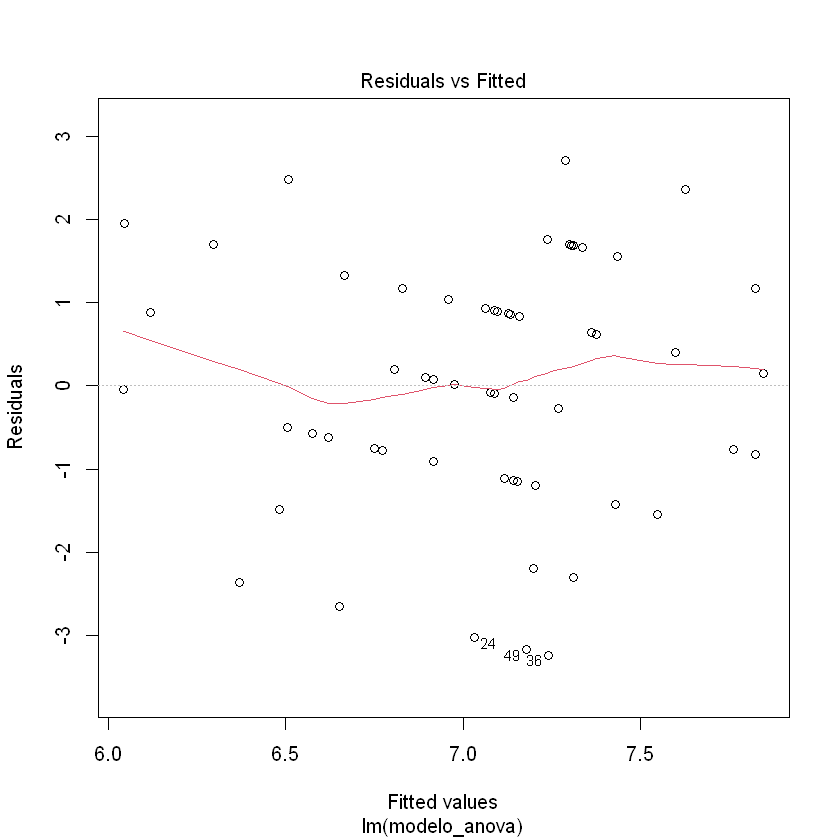

In [115]:
#ANOVA DE DOS FACTORES REPETIDOS

#Hipótesis nula: no hay diferencias significativas entre las notas de matematicas en los tres trimestre de los alumnos de primer año del turno noche. 
#Hipótesis alternativa: existen diferencias significativas entre las notas de matematicas en los tres trimestre de los alumnos de primer año del turno noche.

# Filtrar el dataset para que solo incluya alumnos de Año_cursado igual a 1, asignatura igual a "MATEMATICA" y turno igual a "VESPERTINO"
SEC_NOTAS_MODIF_FILTRADO <- SEC_NOTAS_MODIF %>%
  filter(Año_cursado == 1 & asignatura == "MATEMATICA" & turno == "NOCHE")
# Seleccionar y convertir las columnas necesarias
SEC_NOTAS_MODIF_DOS_FACTORES <- SEC_NOTAS_MODIF_FILTRADO %>%
  dplyr::select(Documento, NotasPrimerT, NotasSegundoT, NotasTercerT) %>%
  mutate(Documento = as.integer(Documento),
         NotasPrimerT = as.double(NotasPrimerT),
         NotasSegundoT = as.double(NotasSegundoT),
         NotasTercerT = as.double(NotasTercerT)) %>%
  distinct()

# Verificar los primeros registros para confirmar los cambios
SEC_NOTAS_MODIF_DOS_FACTORES

# Convertir los datos a formato largo
datos_trimestres <- melt(SEC_NOTAS_MODIF_DOS_FACTORES, id.vars = "Documento", variable.name = "Trimestres", value.name = "Notas")

# Realizar el ANOVA de medidas repetidas

modelo_anova <- aov(Notas ~ Trimestres + Error(Documento/Trimestres), data = datos_trimestres )

# Cambiar el tipo de modelo a lm
modelo_lm <- lm(modelo_anova)

# Calcular Anova con el modelo lm
anova_result <- Anova(modelo_lm, type = "III")
print(anova_result)

#Supuestos

# Prueba de normalidad de los residuos
shapiro.test(residuals(modelo_lm))

# Prueba de homogeneidad de varianzas (Levene's Test)
#leveneTest(residuals(modelo_lm) ~ datos_trimestres$Trimestres)

# Prueba de homogeneidad de varianzas usando var.test por pares
var_test_result_1_2 <- var.test(Notas ~ Trimestres, data = subset(datos_trimestres, Trimestres %in% c("NotasPrimerT", "NotasSegundoT")))
var_test_result_1_3 <- var.test(Notas ~ Trimestres, data = subset(datos_trimestres, Trimestres %in% c("NotasPrimerT", "NotasTercerT")))
var_test_result_2_3 <- var.test(Notas ~ Trimestres, data = subset(datos_trimestres, Trimestres %in% c("NotasSegundoT", "NotasTercerT")))

print(var_test_result_1_2)
print(var_test_result_1_3)
print(var_test_result_2_3)
# Prueba de linealidad (no se proporciona un test específico en R, pero se puede verificar visualmente)
plot(modelo_lm, which = 1)

# Graficar
#ggplot(datos_trimestres, aes(x = Trimestres, y = Notas ,Sujeto = Documento,factor(Documento))) +
#  geom_line() +
# geom_point() +
#  labs(title = "Evolución de los trimestres a lo largo del tiempo",
#       x = "Trimestres",
#       y = "notas") +
#  theme_minimal()

# Calcular la potencia del ANOVA
potencia_anova <- pwr.anova.test(k = 3, n = 20, sig.level = 0.05, f = 0.25)$power

print("potencia_anova")
potencia_anova

#Como el valor p es mayor al nivel de significancia (0.05) se puede afirmar que no hay evidencias para afirmar que existen diferencias significativas en el 
#desempeño de los alumnos en las asignaturas de Geografía, Lengua y Matemática en la escuela agrotécnica. la potencia del test calculado es de 0,37. 

In [116]:
#TEST DE FRIEDMAN
# H0:  Los promedios de los alumnos de primer año de la escuela Agrotécnica, en Lengua, Matemática o Geografia son iguales
# H1: Los promedios de los alumnos de primer año de la escuela Agrotécnica, en Lengua, Matemática o Geografia son diferentes



# Filtrar los datos para alumnos que van a una agrotécnica y eliminar duplicados
alumnos_agrotecnica <- SEC_NOTAS_MODIF %>%
  filter(ModEnsenianza == "Agrotécnica") %>%
  dplyr::select(Documento) %>%
  distinct()

# Contar la cantidad de alumnos únicos
cantidad_alumnos_agrotecnica <- nrow(alumnos_agrotecnica)

# Mostrar la cantidad de alumnos
print(cantidad_alumnos_agrotecnica)

sexto_anio <- SEC_NOTAS_MODIF %>%
  filter(Año_cursado == 1 & asignatura %in% c("MATEMATICA", "LENGUA", "GEOGRAFIA") & ModEnsenianza == "Agrotécnica")

# Identificar los documentos de los alumnos que realizan las 3 asignaturas
documentos_completos <- sexto_anio %>%
  group_by(Documento) %>%
  filter(n_distinct(asignatura) == 3) %>%
  distinct(Documento)

# Filtrar el dataset original para obtener solo los registros de los alumnos que realizan las 3 asignaturas en la modalidad Agrotécnica
sexto_anio_completo <- SEC_NOTAS_MODIF %>%
  filter(Año_cursado == 1 & Documento %in% documentos_completos$Documento & asignatura %in% c("MATEMATICA", "LENGUA", "GEOGRAFIA") & ModEnsenianza == "Agrotécnica")

# Seleccionar las columnas relevantes y reorganizar los datos al formato ancho
promedios_alumnos <- sexto_anio_completo %>%
  dplyr::select(Documento, asignatura, Promedio) %>%
  pivot_wider(names_from = asignatura, values_from = Promedio)

# Mostrar el dataset con los promedios
promedios_alumnos

[1] 296


Documento GEOGRAFIA LENGUA MATEMATICA
1   46465281   6.67     7.00    6.67     
2   49222680   6.00     6.00    5.67     
3   49294374   6.33     6.67    7.00     
4   49509315   6.00     6.00    6.33     
5   49530870   5.33     6.00    6.00     
6   49563221   5.00     5.00    4.00     
7   49563237   6.00     6.00    6.00     
8   49563773   6.33     6.33    6.33     
9   49711682   5.33     5.33    5.00     
10  49711772   7.00     7.33    7.67     
11  49858671   8.00     8.33    8.33     
12  50070296   5.00     5.67    6.00     
13  50124503   6.00     8.67    7.33     
14  50162875   6.33     6.00    6.33     
15  50247678   6.00     6.00    6.00     
16  50247767   6.00     6.33    7.00     
17  50283893   6.00     6.33    6.67     
18  50285005   5.33     6.00    5.33     
19  50285006  10.00     8.67   10.00     
20  50285013   9.67     9.33    9.33     
21  50285039  10.00     9.67   10.00     
22  50285043   7.00     6.67    6.00     
23  50285051   9.33     8.00    9.33     
24  50285057   6.67     7.00    7.67     
25  50285067   5.00     5.00    5.33     
26  50285072   6.00     6.33    5.33     
27  50285100   7.00     7.00    7.00     
28  50298996   5.33     6.00    6.33     
29  50309259   7.33     8.00    7.67     
30  50348014   5.33     6.00    5.33     
... ...       ...       ...    ...       
35  50684176   9.33     9.67   10.00     
36  50684184   9.33     9.67   10.00     
37  50684192   8.67     7.67    9.00     
38  50684202   9.67     9.00    9.67     
39  50684205   8.33     9.00    8.33     
40  50684208   9.00     6.33    7.00     
41  50684209   6.33     6.67    5.67     
42  50684212   5.00     5.00    5.00     
43  50684216   8.67     6.67    6.33     
44  50688316   7.00     6.00    6.00     
45  50717025   6.00     6.00    6.67     
46  50730184   6.67     7.00    9.00     
47  50746112   8.00     8.33    8.33     
48  50746975  10.00     9.67   10.00     
49  50748446   6.33     8.00    6.67     
50  50784173   8.00     9.00    9.33     
51  50854337   7.33     8.00    9.00     
52  50926189   7.67     8.67    9.00     
53  50927730   6.33     6.33    6.67     
54  50927738   6.00     5.33    5.33     
55  51018730   7.33     6.00    7.33     
56  51018735   6.00     6.67    6.33     
57  51018737   7.33     6.00    6.67     
58  51018743   6.00     6.00    6.67     
59  51018747   7.33     8.00    7.67     
60  51018773   8.67     9.00    9.00     
61  51019201   9.67     9.33    9.00     
62  51036235  10.00     9.67    9.33     
63  51037946   6.67     6.67    6.67     
64  51114875   9.33     8.00    8.33

In [117]:
# Extraer los vectores para cada materia
GEOGRAFIA <- promedios_alumnos$GEOGRAFIA
LENGUA <- promedios_alumnos$LENGUA
MATEMATICA <- promedios_alumnos$MATEMATICA

# Crear los vectores concatenados de promedios y materias
promedios <- as.numeric(c(GEOGRAFIA, LENGUA, MATEMATICA))
materias <- as.factor(c(rep("GEOGRAFIA", length(GEOGRAFIA)), 
                        rep("LENGUA", length(LENGUA)), 
                        rep("MATEMATICA", length(MATEMATICA))))

# Verificar la longitud de los vectores
length(promedios)
length(materias)

# Asegurar que el vector 'rendimiento' tenga la longitud correcta
alumno <- rep(1:length(GEOGRAFIA), 3)

# Crear el data frame
datos <- data.frame(alumno, promedios, materias)

# Mostrar los primeros registros del data frame
datos
by(data = datos$promedios, INDICES = datos$materias, FUN = median)
friedman.test(promedios ~ materias| alumno, data=datos)

# Realizar un análisis de varianza (ANOVA) en rangos
friedman_anova <- pwr.anova.test(k = 3, # Número de grupos
                                 n = 64, 
                                 f = 0.25, # Tamaño del efecto F
                                 sig.level = 0.05) # Nivel de significancia

# Extraer la potencia del resultado del análisis de varianza
potencia <- friedman_anova$power

potencia

#Como el valor p es mayor al nivel de significancia (0,05) no hay evidencias para afirmar que existen diferencias significativas en el 
#desempeño de los alumnos en las asignaturas de Geografía, Lengua y Matemática en la escuela agrotécnica. la potencia del test calculado es de 0,99. 

[1] 192

[1] 192

alumno promedios materias  
1    1      6.67     GEOGRAFIA 
2    2      6.00     GEOGRAFIA 
3    3      6.33     GEOGRAFIA 
4    4      6.00     GEOGRAFIA 
5    5      5.33     GEOGRAFIA 
6    6      5.00     GEOGRAFIA 
7    7      6.00     GEOGRAFIA 
8    8      6.33     GEOGRAFIA 
9    9      5.33     GEOGRAFIA 
10  10      7.00     GEOGRAFIA 
11  11      8.00     GEOGRAFIA 
12  12      5.00     GEOGRAFIA 
13  13      6.00     GEOGRAFIA 
14  14      6.33     GEOGRAFIA 
15  15      6.00     GEOGRAFIA 
16  16      6.00     GEOGRAFIA 
17  17      6.00     GEOGRAFIA 
18  18      5.33     GEOGRAFIA 
19  19     10.00     GEOGRAFIA 
20  20      9.67     GEOGRAFIA 
21  21     10.00     GEOGRAFIA 
22  22      7.00     GEOGRAFIA 
23  23      9.33     GEOGRAFIA 
24  24      6.67     GEOGRAFIA 
25  25      5.00     GEOGRAFIA 
26  26      6.00     GEOGRAFIA 
27  27      7.00     GEOGRAFIA 
28  28      5.33     GEOGRAFIA 
29  29      7.33     GEOGRAFIA 
30  30      5.33     GEOGRAFIA 
... ...    ...       ...       
163 35     10.00     MATEMATICA
164 36     10.00     MATEMATICA
165 37      9.00     MATEMATICA
166 38      9.67     MATEMATICA
167 39      8.33     MATEMATICA
168 40      7.00     MATEMATICA
169 41      5.67     MATEMATICA
170 42      5.00     MATEMATICA
171 43      6.33     MATEMATICA
172 44      6.00     MATEMATICA
173 45      6.67     MATEMATICA
174 46      9.00     MATEMATICA
175 47      8.33     MATEMATICA
176 48     10.00     MATEMATICA
177 49      6.67     MATEMATICA
178 50      9.33     MATEMATICA
179 51      9.00     MATEMATICA
180 52      9.00     MATEMATICA
181 53      6.67     MATEMATICA
182 54      5.33     MATEMATICA
183 55      7.33     MATEMATICA
184 56      6.33     MATEMATICA
185 57      6.67     MATEMATICA
186 58      6.67     MATEMATICA
187 59      7.67     MATEMATICA
188 60      9.00     MATEMATICA
189 61      9.00     MATEMATICA
190 62      9.33     MATEMATICA
191 63      6.67     MATEMATICA
192 64      8.33     MATEMATICA

datos$materias: GEOGRAFIA
[1] 6.67
------------------------------------------------------------ 
datos$materias: LENGUA
[1] 6.67
------------------------------------------------------------ 
datos$materias: MATEMATICA
[1] 6.835


	Friedman rank sum test

data:  promedios and materias and alumno
Friedman chi-squared = 5.7044, df = 2, p-value = 0.05772


[1] 0.8778433

In [118]:
#TEST DE COCHRAN 

#H0: Las proporciones de las notas en Matemática de los alumnos de primer año de secundaria de la escuela con menor cantidad de estudiantes son iguales en todos los trimestres 
#H1: Por lo menos alguna nota en Matemática de los alumnos de primer año de secundaria de la escuela con menor cantidad de estudiantes es diferente en alguno de los trimestres. 



# Identificar una escuela que tenga al menos 8 estudiantes de Matemática
escuela_min_8_estudiantes <- SEC_NOTAS_MODIF %>%
  filter(asignatura == "MATEMATICA") %>%
  count(CUE) %>%
  filter(n >= 8) %>%
  slice(1)  # Tomar la primera fila que cumple con la condición

print("Escuela con al menos 8 estudiantes de Matemática:")
print(escuela_min_8_estudiantes)

# Filtrar el dataset principal
SEC_NOTAS_MODIF_FILTRADO <- SEC_NOTAS_MODIF %>%
  filter(CUE %in% escuela_min_8_estudiantes$CUE,  # Solo las escuelas válidas          
         asignatura == "MATEMATICA") %>%  # Solo estudiantes que cursan Matemática
  mutate(Resultado = ifelse(Resultado == "Aprobado", 1, 
                            ifelse(Resultado == "Rinde", 0, Resultado)))

# Verificar los primeros registros para confirmar los cambios
SEC_NOTAS_MODIF_FILTRADO

# Contar cuántos documentos de alumnos cumplen con el criterio
num_documentos <- nrow(SEC_NOTAS_MODIF_FILTRADO)

# Mostrar el resultado
print(paste("Número de documentos de alumnos que cumplen con el criterio:", num_documentos))

# Filtrar las columnas Documento, NotasPrimerT, NotasSegundoT, NotasTercerT y Resultado, y eliminar duplicados
SEC_NOTAS_MODIF_COCHRAN <- SEC_NOTAS_MODIF_FILTRADO %>%
  dplyr::select(Documento, NotasPrimerT, NotasSegundoT, NotasTercerT, Resultado) %>%
  distinct() %>%
  mutate(Documento = as.integer(Documento),
    NotasPrimerT = ifelse(NotasPrimerT >= 6, 1, 0),
    NotasSegundoT = ifelse(NotasSegundoT >= 6, 1, 0),
    NotasTercerT = ifelse(NotasTercerT >= 6, 1, 0),
    Resultado = as.double(Resultado))

# Verificar los primeros registros para confirmar los cambios
SEC_NOTAS_MODIF_COCHRAN

[1] "Escuela con al menos 8 estudiantes de Matemática:"
      CUE  n
1 9000525 81


CUE     Departamento EsPrivada turno  Documento asignatura IdAlumno
1   9000525 URUGUAY      N         NOCHE  43339768  MATEMATICA 1155722 
2   9000525 URUGUAY      N         NOCHE  43347131  MATEMATICA 1157000 
3   9000525 URUGUAY      N         NOCHE  43479582  MATEMATICA 1155701 
4   9000525 URUGUAY      N         NOCHE  43479583  MATEMATICA 1155714 
5   9000525 URUGUAY      N         NOCHE  44861698  MATEMATICA 1156993 
6   9000525 URUGUAY      N         NOCHE  45387698  MATEMATICA 1159038 
7   9000525 URUGUAY      N         NOCHE  45757420  MATEMATICA 1156991 
8   9000525 URUGUAY      N         NOCHE  45757422  MATEMATICA 1156995 
9   9000525 URUGUAY      N         TARDE  45757548  MATEMATICA 1111568 
10  9000525 URUGUAY      N         TARDE  46079234  MATEMATICA   41291 
11  9000525 URUGUAY      N         TARDE  46079237  MATEMATICA   41039 
12  9000525 URUGUAY      N         TARDE  46779075  MATEMATICA  266451 
13  9000525 URUGUAY      N         TARDE  46779078  MATEMATICA  266456 
14  9000525 URUGUAY      N         TARDE  46779086  MATEMATICA  266455 
15  9000525 URUGUAY      N         TARDE  46779088  MATEMATICA  266454 
16  9000525 URUGUAY      N         TARDE  46926648  MATEMATICA 1111664 
17  9000525 URUGUAY      N         TARDE  47324576  MATEMATICA 1112963 
18  9000525 URUGUAY      N         TARDE  47578911  MATEMATICA 1125360 
19  9000525 URUGUAY      N         TARDE  47620825  MATEMATICA  294090 
20  9000525 URUGUAY      N         TARDE  47704328  MATEMATICA  348251 
21  9000525 URUGUAY      N         TARDE  47704332  MATEMATICA 1111611 
22  9000525 URUGUAY      N         TARDE  47704334  MATEMATICA  348255 
23  9000525 URUGUAY      N         TARDE  47704335  MATEMATICA  348250 
24  9000525 URUGUAY      N         TARDE  47704337  MATEMATICA  348254 
25  9000525 URUGUAY      N         TARDE  47704340  MATEMATICA  260166 
26  9000525 URUGUAY      N         TARDE  47704342  MATEMATICA  413350 
27  9000525 URUGUAY      N         TARDE  47704355  MATEMATICA  413333 
28  9000525 URUGUAY      N         TARDE  47704356  MATEMATICA  413344 
29  9000525 URUGUAY      N         TARDE  47786245  MATEMATICA 1110806 
30  9000525 URUGUAY      N         TARDE  47828748  MATEMATICA  348245 
... ...     ...          ...       ...    ...       ...        ...     
52  9000525 URUGUAY      N         TARDE  48959690  MATEMATICA  485802 
53  9000525 URUGUAY      N         TARDE  48959691  MATEMATICA  485798 
54  9000525 URUGUAY      N         TARDE  48959692  MATEMATICA  485805 
55  9000525 URUGUAY      N         TARDE  48959693  MATEMATICA  485799 
56  9000525 URUGUAY      N         TARDE  48959703  MATEMATICA  485804 
57  9000525 URUGUAY      N         TARDE  48959704  MATEMATICA  485041 
58  9000525 URUGUAY      N         TARDE  48959709  MATEMATICA 1111574 
59  9000525 URUGUAY      N         TARDE  48959713  MATEMATICA 1111585 
60  9000525 URUGUAY      N         TARDE  48959714  MATEMATICA 1111587 
61  9000525 URUGUAY      N         TARDE  48959716  MATEMATICA 1111586 
62  9000525 URUGUAY      N         TARDE  48959721  MATEMATICA 1111578 
63  9000525 URUGUAY      N         TARDE  48959722  MATEMATICA 1111576 
64  9000525 URUGUAY      N         MAÑANA 48959723  MATEMATICA 1167889 
65  9000525 URUGUAY      N         TARDE  48959724  MATEMATICA 1111582 
66  9000525 URUGUAY      N         TARDE  49141846  MATEMATICA  509552 
67  9000525 URUGUAY      N         TARDE  49161980  MATEMATICA 1125375 
68  9000525 URUGUAY      N         TARDE  49294457  MATEMATICA 1110803 
69  9000525 URUGUAY      N         MAÑANA 49329103  MATEMATICA  984645 
70  9000525 URUGUAY      N         TARDE  49329104  MATEMATICA  430519 
71  9000525 URUGUAY      N         TARDE  49361247  MATEMATICA  600582 
72  9000525 URUGUAY      N         TARDE  50124479  MATEMATICA  485800 
73  9000525 URUGUAY      N         TARDE  50179213  MATEMATICA 1125362 
74  9000525 URUGUAY      N         TARDE  50746140  MATEMATICA 1111683 
75  9000525 URUGUAY      N         TARDE  50

[1] "Número de documentos de alumnos que cumplen con el criterio: 81"


Documento NotasPrimerT NotasSegundoT NotasTercerT Resultado
1   43339768  1            1             1            1        
2   43347131  1            1             1            1        
3   43479582  1            1             1            1        
4   43479583  1            1             1            1        
5   44861698  1            1             1            1        
6   45387698  1            0             1            1        
7   45757420  1            1             1            1        
8   45757422  1            1             1            1        
9   45757548  0            0             1            0        
10  46079234  1            1             1            1        
11  46079237  1            1             1            1        
12  46779075  0            0             1            0        
13  46779078  1            1             1            1        
14  46779086  1            1             1            1        
15  46779088  1            1             1            1        
16  46926648  1            1             1            1        
17  47324576  1            1             1            1        
18  47578911  1            1             0            0        
19  47620825  1            1             1            1        
20  47704328  1            1             1            1        
21  47704332  1            1             1            1        
22  47704334  1            1             1            1        
23  47704335  1            1             1            1        
24  47704337  1            1             1            1        
25  47704340  0            0             0            0        
26  47704342  1            1             1            1        
27  47704355  1            1             1            1        
28  47704356  0            1             0            0        
29  47786245  0            0             0            0        
30  47828748  0            1             1            1        
... ...       ...          ...           ...          ...      
52  48959690  0            0             0            0        
53  48959691  1            1             1            1        
54  48959692  1            1             1            1        
55  48959693  1            1             1            1        
56  48959703  0            0             0            0        
57  48959704  0            0             0            0        
58  48959709  1            1             1            1        
59  48959713  1            1             1            1        
60  48959714  1            1             1            1        
61  48959716  1            1             1            1        
62  48959721  1            1             1            1        
63  48959722  1            0             1            0        
64  48959723  1            1             1            1        
65  48959724  0            1             1            0        
66  49141846  1            0             0            0        
67  49161980  0            0             0            0        
68  49294457  1            1             1            1        
69  49329103  1            1             1            1        
70  49329104  1            0             0            0        
71  49361247  0            0             0            0        
72  50124479  1            0             0            0        
73  50179213  1            1             0            0        
74  50746140  1            0             0            0        
75  50746976  1            0             1            1        
76  50746978  1            0             0            0        
77  50746979  1            1             0            1        
78  50746980  1            1             1            1        
79  50746981  1            1             1            1        
80  50748454  1            0             0            0        
81  52819364  1            1             1            1

In [119]:



T1 <- SEC_NOTAS_MODIF_COCHRAN$NotasPrimerT
T2 <- SEC_NOTAS_MODIF_COCHRAN$NotasSegundoT
T3 <- SEC_NOTAS_MODIF_COCHRAN$NotasTercerT

trimestres= as.numeric(c(T1,T2,T3))
resultado <- as.factor(c(rep("T1",length(T1)), rep("T2",length(T2)),rep("T3",length(T3))))

# Crear el marco de datos para el test de Cochran
PUNTAJES <- data.frame(
  escuelas = rep(1:length(T1), 3),
  resultado = resultado,
  trimestres = trimestres
)

PUNTAJES
# Realizar el test de Cochran
resultado_test <- CochranQTest(trimestres ~ resultado | escuelas, data = PUNTAJES)

# Mostrar el resultado del test
resultado_test

# Definir los parámetros del test
k <- 3  # Número de grupos
N <- 243  # Tamaño total de la muestra
G <- 81  # Número de bloques
alpha <- 0.05  # Nivel de significancia

# Obtener el valor crítico para el nivel de significancia dado
q_alpha <- qchisq(1 - alpha, df = k - 1)

# Calcular la potencia
potencia <- 1 - pchisq(q_alpha, df = k - 1, ncp = 0, lower.tail = FALSE)

potencia

#Como el valor p es mayor al nivel de significancia (0,05) no existen evidencias suficientes para rechazar H0. 
#No se puede decir que las notas de Matemática en alguno de los trimestres es diferente. la potencia del test calculado es de 0,95.

escuelas resultado trimestres
1    1       T1        1         
2    2       T1        1         
3    3       T1        1         
4    4       T1        1         
5    5       T1        1         
6    6       T1        1         
7    7       T1        1         
8    8       T1        1         
9    9       T1        0         
10  10       T1        1         
11  11       T1        1         
12  12       T1        0         
13  13       T1        1         
14  14       T1        1         
15  15       T1        1         
16  16       T1        1         
17  17       T1        1         
18  18       T1        1         
19  19       T1        1         
20  20       T1        1         
21  21       T1        1         
22  22       T1        1         
23  23       T1        1         
24  24       T1        1         
25  25       T1        0         
26  26       T1        1         
27  27       T1        1         
28  28       T1        0         
29  29       T1        0         
30  30       T1        0         
... ...      ...       ...       
214 52       T3        0         
215 53       T3        1         
216 54       T3        1         
217 55       T3        1         
218 56       T3        0         
219 57       T3        0         
220 58       T3        1         
221 59       T3        1         
222 60       T3        1         
223 61       T3        1         
224 62       T3        1         
225 63       T3        1         
226 64       T3        1         
227 65       T3        1         
228 66       T3        0         
229 67       T3        0         
230 68       T3        1         
231 69       T3        1         
232 70       T3        0         
233 71       T3        0         
234 72       T3        0         
235 73       T3        0         
236 74       T3        0         
237 75       T3        1         
238 76       T3        0         
239 77       T3        0         
240 78       T3        1         
241 79       T3        1         
242 80       T3        0         
243 81       T3        1


	Cochran's Q test

data:  trimestres and resultado and escuelas
Q = 5.84, df = 2, p-value = 0.05393


[1] 0.95

In [120]:
# Crear la variable Desempeño basada en las notas usando ifelse()
SEC_NOTAS_MODIF$Desempeño <- ifelse(SEC_NOTAS_MODIF$Promedio < 4, "Insuficiente",
                           ifelse(SEC_NOTAS_MODIF$Promedio >= 4 & SEC_NOTAS_MODIF$Promedio < 6, "Regular",
                           ifelse(SEC_NOTAS_MODIF$Promedio >= 6 & SEC_NOTAS_MODIF$Promedio < 7, "Aprobado",
                           ifelse(SEC_NOTAS_MODIF$Promedio >= 7 & SEC_NOTAS_MODIF$Promedio < 8, "Bueno",
                           ifelse(SEC_NOTAS_MODIF$Promedio >= 8 & SEC_NOTAS_MODIF$Promedio < 9, "Muy Bueno",
                           ifelse(SEC_NOTAS_MODIF$Promedio >= 9 & SEC_NOTAS_MODIF$Promedio <= 10, "Distinguido", NA))))))

In [121]:
# Filtrar el conjunto de datos para obtener solo los registros correspondientes a Matemática en primer año
Matematica_Segundo_Año_gestion <- subset(SEC_NOTAS_MODIF, asignatura == "MATEMATICA" & NivelEnsenanza == "SECUNDARIO" & Año_cursado == 2)

Tabla_segundo_gestion<-Matematica_Segundo_Año_gestion %>%
  dplyr::select('EsPrivada', 'Desempeño') %>%
  table()
Tabla_segundo_gestion

#Reordenamos los datos
Tabla_segundo_gestion1<-rbind(Tabla_segundo_gestion[2,],Tabla_segundo_gestion[1,])
Tabla_segundo_gestion1<-cbind(Tabla_segundo_gestion1[,3],Tabla_segundo_gestion1[,5],Tabla_segundo_gestion1[,2],Tabla_segundo_gestion1[,1],Tabla_segundo_gestion1[,6],Tabla_segundo_gestion1[,4])
colnames(Tabla_segundo_gestion1)<-c('Distinguido','Muy Bueno','Bueno','Aprobado','Regular','Insuficiente')
rownames(Tabla_segundo_gestion1)<-c('S','N')
Tabla_segundo_gestion1

# sumar totales por fila para obtener distribución marginal por fila
row_marginals <- margin.table(Tabla_segundo_gestion1, 1)
row_marginals
#sumar totales por columna para obtener distribución marginal por columna
col_marginals <- margin.table(Tabla_segundo_gestion1, 2)
col_marginals


# tabla de contigencia con marginales fila y columna
Tabla_segundo_gestion_t<-cbind(Tabla_segundo_gestion1,"Total"=margin.table(Tabla_segundo_gestion1, 1))
Tabla_segundo_gestion_t<-rbind(Tabla_segundo_gestion_t,"Total"=margin.table(Tabla_segundo_gestion_t, 2))
Tabla_segundo_gestion_t

         Desempeño
EsPrivada Aprobado Bueno Distinguido Insuficiente Muy Bueno Regular
        N      277   174         123           63       131     360
        S       34    38          38            5        37      34

Distinguido Muy Bueno Bueno Aprobado Regular Insuficiente
S  38          37        38    34       34      5          
N 123         131       174   277      360     63

S    N 
 186 1128

Distinguido    Muy Bueno        Bueno     Aprobado      Regular Insuficiente 
         161          168          212          311          394           68

Distinguido Muy Bueno Bueno Aprobado Regular Insuficiente Total
S      38          37        38    34       34      5            186 
N     123         131       174   277      360     63           1128 
Total 161         168       212   311      394     68           1314

In [122]:
#PORCENTAJE TOTAL

Tabla_Contingencia_Totales <- prop.table(Tabla_segundo_gestion1) * 100
Tabla_Contingencia_Totales <- cbind(Tabla_Contingencia_Totales, "Total" = margin.table(Tabla_Contingencia_Totales, 1))
Tabla_Contingencia_Totales <- rbind(Tabla_Contingencia_Totales, "Total" = margin.table(Tabla_Contingencia_Totales, 2))
Tabla_Contingencia_Totales <- round(Tabla_Contingencia_Totales, 1)

#PORCENTAJE FILA 
Tabla_Contingencia_Filas <- prop.table(rbind(Tabla_segundo_gestion1, "Total" = margin.table(Tabla_segundo_gestion1, 2)), 1) * 100
Tabla_Contingencia_Filas <- cbind(Tabla_Contingencia_Filas, "Total" = margin.table(Tabla_Contingencia_Filas, 1))
Tabla_Contingencia_Filas <- round(Tabla_Contingencia_Filas, 1)

#PORCENTAJE COLUMNA
Tabla_Contingencia_Columnas <- prop.table(cbind(Tabla_segundo_gestion1, "Total" = margin.table(Tabla_segundo_gestion1, 1)), 2) * 100
Tabla_Contingencia_Columnas <- rbind(Tabla_Contingencia_Columnas, "Total" = margin.table(Tabla_Contingencia_Columnas, 2))
Tabla_Contingencia_Columnas <- round(Tabla_Contingencia_Columnas, 1)


Tabla_Contingencia_Totales
Tabla_Contingencia_Filas
Tabla_Contingencia_Columnas






Distinguido Muy Bueno Bueno Aprobado Regular Insuficiente Total
S      2.9         2.8       2.9   2.6      2.6    0.4           14.2
N      9.4        10.0      13.2  21.1     27.4    4.8           85.8
Total 12.3        12.8      16.1  23.7     30.0    5.2          100.0

Distinguido Muy Bueno Bueno Aprobado Regular Insuficiente Total
S     20.4        19.9      20.4  18.3     18.3    2.7          100  
N     10.9        11.6      15.4  24.6     31.9    5.6          100  
Total 12.3        12.8      16.1  23.7     30.0    5.2          100

Distinguido Muy Bueno Bueno Aprobado Regular Insuficiente Total
S      23.6        22        17.9  10.9      8.6     7.4         14.2
N      76.4        78        82.1  89.1     91.4    92.6         85.8
Total 100.0       100       100.0 100.0    100.0   100.0        100.0

In [123]:
#FILA

Matematica_Segundo_Año_gestion$Desempeño<-factor(Matematica_Segundo_Año_gestion$Desempeño, levels = c('Distinguido','Muy Bueno','Bueno','Aprobado','Regular','Insuficiente'))
t1_gestion<-round(prop.table( table(Matematica_Segundo_Año_gestion$EsPrivada, Matematica_Segundo_Año_gestion$Desempeño),1)*100,1)
t1_gestion<-t(t1_gestion)
t1_gestion

              
                  N    S
  Distinguido  10.9 20.4
  Muy Bueno    11.6 19.9
  Bueno        15.4 20.4
  Aprobado     24.6 18.3
  Regular      31.9 18.3
  Insuficiente  5.6  2.7

In [124]:
#COLUMNA
Matematica_Segundo_Año_gestion$Desempeño <- factor(Matematica_Segundo_Año_gestion$Desempeño, levels = c('Distinguido','Muy Bueno','Bueno','Aprobado','Regular','Insuficiente'))
t2_gestion<- round(prop.table(table(Matematica_Segundo_Año_gestion$EsPrivada, Matematica_Segundo_Año_gestion$Desempeño), 2) * 100, 1)
t2_gestion <- t(t2_gestion)
t2_gestion


              
                  N    S
  Distinguido  76.4 23.6
  Muy Bueno    78.0 22.0
  Bueno        82.1 17.9
  Aprobado     89.1 10.9
  Regular      91.4  8.6
  Insuficiente 92.6  7.4

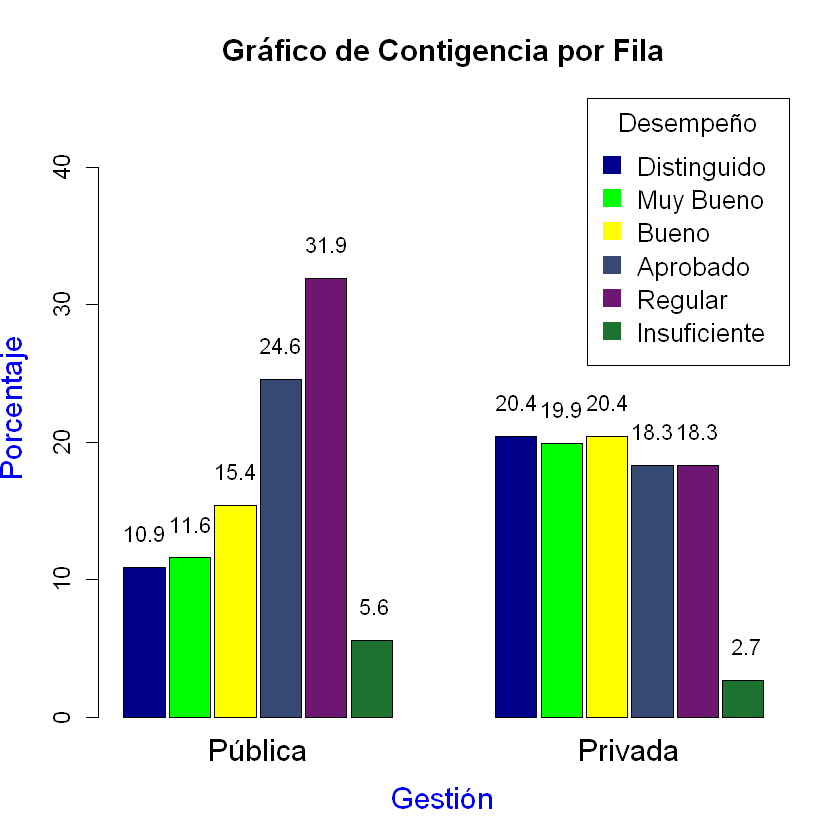

In [125]:
porcentaje_t1_gestion <- t1_gestion[rownames(t1_gestion) != "Sum", ]
porcentaje_t1_gestion <- porcentaje_t1_gestion[, colnames(porcentaje_t1_gestion) != "Sum"]

# Definir etiquetas personalizadas para el eje x
etiquetas_personalizadas <- c("Pública", "Privada")

bpc <- barplot(porcentaje_t1_gestion,
               main = "Gráfico de Contigencia por Fila",
               beside = TRUE, # Barras agrupadas
               space = c(0.1, 2.5), # Espacio primer elemento es el espacio entre barras de cada grupo (0.1) y el segundo el espacio entre grupos (2.5).
               ylim = c(0, 45),
               cex.axis = 1.2, # tamaño etiquetas eje y
               cex.names = 1.5, # tamaño etiqueta eje x
               cex.main = 1.5, # tamaño título gráfico
               col = c("darkblue", "green", "yellow", "#364972", "#6E1772", "#1E7230"),
               xlab = "Gestión",
               cex.lab = 1.5, # tamaño xlab y ylab
               ylab = "Porcentaje",
               col.lab = "blue",
               names.arg = etiquetas_personalizadas) # Etiquetas personalizadas del eje x

# Agregar la leyenda
legend("topright", inset = c(0, 0), # Ajustar la posición de la leyenda
       legend = rownames(porcentaje_t1_gestion),
       title = "Desempeño", # Título
       title.adj = 0.5, # Ajuste horizontal del título
       title.col = "black", # Color del título
       pch = 15, # Cambia a cuadrados
       col = c("darkblue", "green", "yellow", "#364972", "#6E1772", "#1E7230"),
       pt.cex = 2, # Tamaño de los cuadrados
       cex = 1.3) # Cambiar el tamaño del texto

# Agregar valores sobre las barras
TC <- porcentaje_t1_gestion
text(bpc, TC + 2.5, format(TC), cex = 1.1)


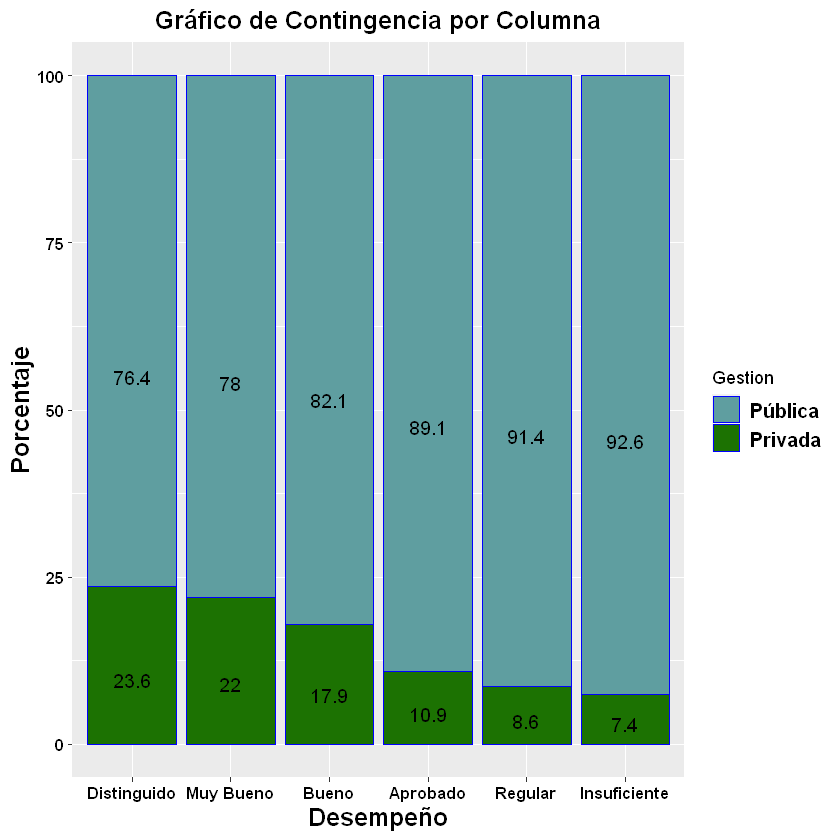

In [126]:
# Convertir t2_gestion en un dataframe
df <- as.data.frame(as.table(t2_gestion))
colnames(df) <- c("Var1", "Var2", "Freq")

# Definir etiquetas personalizadas para Var1
etiquetas_personalizadas <- c("Pública", "Privada")

ggplot(data=df, aes(x=Var1, y=Freq, fill=Var2)) +
  geom_bar(stat="identity", colour="blue") +
  scale_fill_manual(name= "Gestion", values=c("#5F9EA0", "#1C7202"), labels = c("Pública", "Privada")) +
  geom_text(aes(label=Freq), position=position_stack(vjust=0.41), size = 4, color = "black") +  # Cambia a color negro
  xlab("Desempeño") +
  ylab("Porcentaje") +
  ggtitle("Gráfico de Contingencia por Columna") +
  theme(axis.title = element_text(size = 15, color = "black", face = "bold")) +
  theme(plot.title = element_text(size = 15, color = "black", face = "bold", hjust = 0.5)) +  # Centra el título
  theme(legend.text = element_text(size = 12, color = "black", face= "bold")) +
  theme(axis.text = element_text(size = 10, color = "black", face= "bold"))

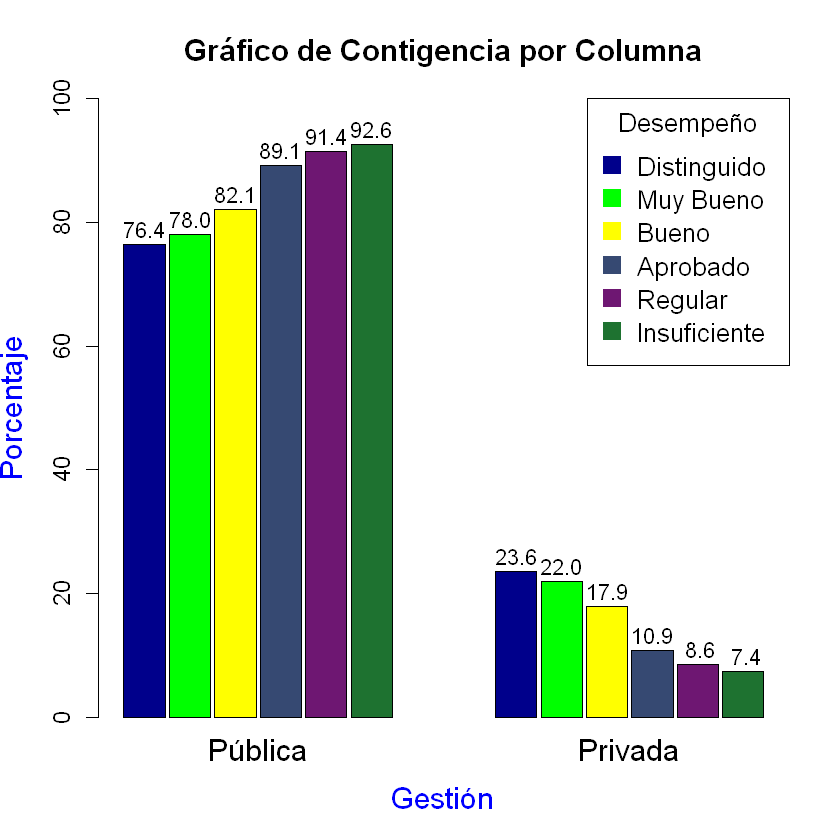

In [127]:
porcentaje_t2_gestion<- t2_gestion[rownames(t2_gestion) != "Sum", ]
porcentaje_t2_gestion <- t2_gestion[, colnames(t2_gestion) != "Sum"]

# Definir etiquetas personalizadas para el eje x
etiquetas_personalizadas <- c("Pública", "Privada")

bpc<-barplot(porcentaje_t2_gestion,
        main = "Gráfico de Contigencia por Columna",
        beside = TRUE, # Barras agrupadas
        space = c(0.1, 2.5), # Espacio primer elemento es el espacio entre barras de cada grupo (0.1) y el segundo el espacio entre grupos (2.5).
        ylim = c(0,100),
        cex.axis = 1.2, #tamaño etiquetas eje y
        cex.names=1.5, #tamaño etiqueta eje x
        cex.main=1.5, #tamaño título gráfico
        col=c("darkblue","green", "yellow","#364972","#6E1772","#1E7230"),
        xlab = "Gestión",
        cex.lab=1.5, #tamaño  xlab ylab
        ylab = "Porcentaje",
       col.lab = "blue",# Color xlab ylab
       names.arg = etiquetas_personalizadas) # Etiquetas personalizadas del eje x
# Agregar la leyenda
legend("topright", inset = c(0, 0), # Ajustar la posición de la leyenda
       legend = rownames(t2_gestion),
       title = "Desempeño", # Título
       title.adj = 0.5, # Ajuste horizontal del título
       title.col = "black", # Color del título
       pch = 15, # Cambia a cuadrados
       col = c("darkblue", "green", "yellow", "#364972", "#6E1772", "#1E7230"),
       pt.cex = 2, # Tamaño de los cuadrados
       cex = 1.3) # Cambiar el tamaño del texto

# Agregar valores sobre las barras
TC <- t2_gestion
text(bpc, TC + 2.5, format(TC), cex = 1.1)

In [128]:
# H0: No hay asociacion entre Desempeño y EsPrivada
#H1: Hay asociacion entre Desempeño y EsPrivada
chi <-chisq.test(SEC_NOTAS_MODIF$Desempeño, SEC_NOTAS_MODIF$EsPrivada)
chi




	Pearson's Chi-squared test

data:  SEC_NOTAS_MODIF$Desempeño and SEC_NOTAS_MODIF$EsPrivada
X-squared = 4181, df = 5, p-value < 2.2e-16


In [129]:
chi$observed

# frecuencias esperadas si fueran independientes
round(chi$expected,0)

                         SEC_NOTAS_MODIF$EsPrivada
SEC_NOTAS_MODIF$Desempeño     N     S
             Aprobado     15264  2725
             Bueno        14312  3727
             Distinguido  11249  7090
             Insuficiente   941    90
             Muy Bueno    13713  5465
             Regular       8758  1188

SEC_NOTAS_MODIF$EsPrivada
SEC_NOTAS_MODIF$Desempeño N     S   
             Aprobado     13672 4317
             Bueno        13710 4329
             Distinguido  13938 4401
             Insuficiente   784  247
             Muy Bueno    14575 4603
             Regular       7559 2387

In [130]:
#Residuos estandarizados o tipificados
round(chi$residuals, 1)

                         SEC_NOTAS_MODIF$EsPrivada
SEC_NOTAS_MODIF$Desempeño     N     S
             Aprobado      13.6 -24.2
             Bueno          5.1  -9.2
             Distinguido  -22.8  40.5
             Insuficiente   5.6 -10.0
             Muy Bueno     -7.1  12.7
             Regular       13.8 -24.5

In [131]:
#Residuos corregidos o ajustados
round(chi$stdres,1)

                         SEC_NOTAS_MODIF$EsPrivada
SEC_NOTAS_MODIF$Desempeño     N     S
             Aprobado      31.3 -31.3
             Bueno         11.8 -11.8
             Distinguido  -52.5  52.5
             Insuficiente  11.6 -11.6
             Muy Bueno    -16.6  16.6
             Regular       30.0 -30.0

In [132]:

CramerV(SEC_NOTAS_MODIF$Desempeño, SEC_NOTAS_MODIF$EsPrivada)

[1] 0.2224101

In [133]:
Tabla_segundo_gestion_t

Distinguido Muy Bueno Bueno Aprobado Regular Insuficiente Total
S      38          37        38    34       34      5            186 
N     123         131       174   277      360     63           1128 
Total 161         168       212   311      394     68           1314

In [134]:
#PROPORCIONES
# H0:La hipótesis nula en este test es que las proporciones de éxitos son iguales en todas las muestras. 
#Esto significa que no hay diferencia significativa en las proporciones de éxitos entre las seis muestras.

#H1: Al menos una de las proporciones de éxitos es diferente de las otras. 
#Esto significa que hay al menos una diferencia significativa entre las proporciones de éxitos en las seis muestras.


prop.test(x=c(38,37,38,34,34,5), n=c(161,168,212,311,394,68), alternative="two.side", conf.level=0.95, correct=FALSE)


	6-sample test for equality of proportions without continuity
	correction

data:  c(38, 37, 38, 34, 34, 5) out of c(161, 168, 212, 311, 394, 68)
X-squared = 38.012, df = 5, p-value = 3.753e-07
alternative hypothesis: two.sided
sample estimates:
    prop 1     prop 2     prop 3     prop 4     prop 5     prop 6 
0.23602484 0.22023810 0.17924528 0.10932476 0.08629442 0.07352941 


In [135]:
# Filtrar el conjunto de datos para obtener solo los registros correspondientes a Matemática en primer año
Matematica_Tercer_Año_gestion <- subset(SEC_NOTAS_MODIF, asignatura == "MATEMATICA" & NivelEnsenanza == "SECUNDARIO" & Año_cursado == 3)

Tabla_Tercer_gestion<-Matematica_Tercer_Año_gestion %>%
  dplyr::select('EsPrivada', 'Desempeño') %>%
  table()
Tabla_Tercer_gestion

#Reordenamos los datos
Tabla_tercero_gestion1<-rbind(Tabla_Tercer_gestion[2,],Tabla_Tercer_gestion[1,])
Tabla_tercero_gestion1<-cbind(Tabla_tercero_gestion1[,3],Tabla_tercero_gestion1[,5],Tabla_tercero_gestion1[,2],Tabla_tercero_gestion1[,1],Tabla_tercero_gestion1[,6],Tabla_tercero_gestion1[,4])
colnames(Tabla_tercero_gestion1)<-c('Distinguido','Muy Bueno','Bueno','Aprobado','Regular','Insuficiente')
rownames(Tabla_tercero_gestion1)<-c('S','N')
Tabla_tercero_gestion1

# sumar totales por fila para obtener distribución marginal por fila
row_marginals <- margin.table(Tabla_tercero_gestion1, 1)
row_marginals
#sumar totales por columna para obtener distribución marginal por columna
col_marginals <- margin.table(Tabla_tercero_gestion1, 2)
col_marginals


# tabla de contigencia con marginales fila y columna
Tabla_tercero_gestion_t<-cbind(Tabla_tercero_gestion1,"Total"=margin.table(Tabla_tercero_gestion1, 1))
Tabla_tercero_gestion_t<-rbind(Tabla_tercero_gestion_t,"Total"=margin.table(Tabla_tercero_gestion_t, 2))
Tabla_tercero_gestion_t

         Desempeño
EsPrivada Aprobado Bueno Distinguido Insuficiente Muy Bueno Regular
        N      265   145          98           33       125     256
        S       45    29          32            6        31      35

Distinguido Muy Bueno Bueno Aprobado Regular Insuficiente
S 32           31        29    45       35      6          
N 98          125       145   265      256     33

S   N 
178 922

Distinguido    Muy Bueno        Bueno     Aprobado      Regular Insuficiente 
         130          156          174          310          291           39

Distinguido Muy Bueno Bueno Aprobado Regular Insuficiente Total
S      32          31        29    45       35      6            178 
N      98         125       145   265      256     33            922 
Total 130         156       174   310      291     39           1100

In [136]:
#PORCENTAJE TOTAL

Tabla_Contingencia_Totales <- prop.table(Tabla_tercero_gestion1) * 100
Tabla_Contingencia_Totales <- cbind(Tabla_Contingencia_Totales, "Total" = margin.table(Tabla_Contingencia_Totales, 1))
Tabla_Contingencia_Totales <- rbind(Tabla_Contingencia_Totales, "Total" = margin.table(Tabla_Contingencia_Totales, 2))
Tabla_Contingencia_Totales <- round(Tabla_Contingencia_Totales, 1)

#PORCENTAJE FILA 
Tabla_Contingencia_Filas <- prop.table(rbind(Tabla_tercero_gestion1, "Total" = margin.table(Tabla_tercero_gestion1, 2)), 1) * 100
Tabla_Contingencia_Filas <- cbind(Tabla_Contingencia_Filas, "Total" = margin.table(Tabla_Contingencia_Filas, 1))
Tabla_Contingencia_Filas <- round(Tabla_Contingencia_Filas, 1)

#PORCENTAJE COLUMNA
Tabla_Contingencia_Columnas <- prop.table(cbind(Tabla_tercero_gestion1, "Total" = margin.table(Tabla_tercero_gestion1, 1)), 2) * 100
Tabla_Contingencia_Columnas <- rbind(Tabla_Contingencia_Columnas, "Total" = margin.table(Tabla_Contingencia_Columnas, 2))
Tabla_Contingencia_Columnas <- round(Tabla_Contingencia_Columnas, 1)
Tabla_Contingencia_Columnas

# Mostrar la tabla de porcentajes totales
Tabla_Contingencia_Totales
Tabla_Contingencia_Filas


Distinguido Muy Bueno Bueno Aprobado Regular Insuficiente Total
S      24.6        19.9      16.7  14.5     12      15.4         16.2
N      75.4        80.1      83.3  85.5     88      84.6         83.8
Total 100.0       100.0     100.0 100.0    100     100.0        100.0

Distinguido Muy Bueno Bueno Aprobado Regular Insuficiente Total
S      2.9         2.8       2.6   4.1      3.2    0.5           16.2
N      8.9        11.4      13.2  24.1     23.3    3.0           83.8
Total 11.8        14.2      15.8  28.2     26.5    3.5          100.0

Distinguido Muy Bueno Bueno Aprobado Regular Insuficiente Total
S     18.0        17.4      16.3  25.3     19.7    3.4          100  
N     10.6        13.6      15.7  28.7     27.8    3.6          100  
Total 11.8        14.2      15.8  28.2     26.5    3.5          100

In [137]:
#FILA

Matematica_Tercer_Año_gestion$Desempeño<-factor(Matematica_Tercer_Año_gestion$Desempeño, levels = c('Distinguido','Muy Bueno','Bueno','Aprobado','Regular','Insuficiente'))
t1_gestionTercero<-round(prop.table( table(Matematica_Tercer_Año_gestion$EsPrivada, Matematica_Tercer_Año_gestion$Desempeño),1)*100,1)
t1_gestionTercero<-t(t1_gestionTercero)
t1_gestionTercero

              
                  N    S
  Distinguido  10.6 18.0
  Muy Bueno    13.6 17.4
  Bueno        15.7 16.3
  Aprobado     28.7 25.3
  Regular      27.8 19.7
  Insuficiente  3.6  3.4

In [138]:
#COLUMNA
Matematica_Tercer_Año_gestion$Desempeño <- factor(Matematica_Tercer_Año_gestion$Desempeño, levels = c('Distinguido','Muy Bueno','Bueno','Aprobado','Regular','Insuficiente'))
t2_gestionTercero<- round(prop.table(table(Matematica_Tercer_Año_gestion$EsPrivada, Matematica_Tercer_Año_gestion$Desempeño), 2) * 100, 1)
t2_gestionTercero <- t(t2_gestion)
t2_gestionTercero

   
    Distinguido Muy Bueno Bueno Aprobado Regular Insuficiente
  N        76.4      78.0  82.1     89.1    91.4         92.6
  S        23.6      22.0  17.9     10.9     8.6          7.4

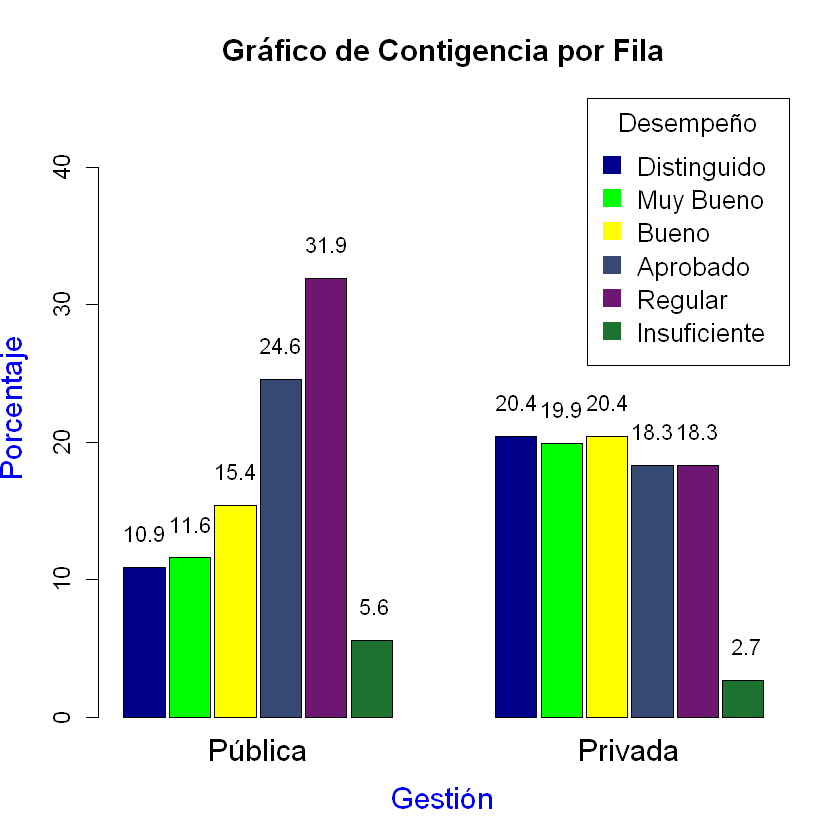

In [139]:
porcentaje_t1_gestionTercero <- t1_gestion[rownames(t1_gestionTercero) != "Sum", ]
porcentaje_t1_gestionTercero <- porcentaje_t1_gestionTercero[, colnames(porcentaje_t1_gestion) != "Sum"]

# Definir etiquetas personalizadas para el eje x
etiquetas_personalizadas <- c("Pública", "Privada")

bpc <- barplot(porcentaje_t1_gestionTercero,
               main = "Gráfico de Contigencia por Fila",
               beside = TRUE, # Barras agrupadas
               space = c(0.1, 2.5), # Espacio primer elemento es el espacio entre barras de cada grupo (0.1) y el segundo el espacio entre grupos (2.5).
               ylim = c(0, 45),
               cex.axis = 1.2, # tamaño etiquetas eje y
               cex.names = 1.5, # tamaño etiqueta eje x
               cex.main = 1.5, # tamaño título gráfico
               col = c("darkblue", "green", "yellow", "#364972", "#6E1772", "#1E7230"),
               xlab = "Gestión",
               cex.lab = 1.5, # tamaño xlab y ylab
               ylab = "Porcentaje",
               col.lab = "blue",
               names.arg = etiquetas_personalizadas) # Etiquetas personalizadas del eje x

# Agregar la leyenda
legend("topright", inset = c(0, 0), # Ajustar la posición de la leyenda
       legend = rownames(porcentaje_t1_gestion),
       title = "Desempeño", # Título
       title.adj = 0.5, # Ajuste horizontal del título
       title.col = "black", # Color del título
       pch = 15, # Cambia a cuadrados
       col = c("darkblue", "green", "yellow", "#364972", "#6E1772", "#1E7230"),
       pt.cex = 2, # Tamaño de los cuadrados
       cex = 1.3) # Cambiar el tamaño del texto

# Agregar valores sobre las barras
TC <- porcentaje_t1_gestionTercero
text(bpc, TC + 2.5, format(TC), cex = 1.1)


In [140]:


# Filtrar el conjunto de datos para obtener solo los registros correspondientes a Matemática en segundo año y turnos específicos
Matematica_Segundo_Año_turno<- subset(SEC_NOTAS_MODIF, asignatura == "MATEMATICA" & Año_cursado == 2 & turno %in% c("MAÑANA", "TARDE", "VESPERTINO"))

# Crear la tabla de contingencia para turno y desempeño
Tabla_segundo_turno <- Matematica_Segundo_Año_turno %>%
  dplyr::select(turno, Desempeño) %>%
  table()

# Reordenar los datos
Tabla_segundo_turno1 <- Tabla_segundo_turno[c("MAÑANA", "TARDE", "VESPERTINO"), ]
Tabla_segundo_turno1 <- Tabla_segundo_turno1[, c("Distinguido", "Muy Bueno", "Bueno", "Aprobado", "Regular", "Insuficiente")]
Tabla_segundo_turno1
# Sumar totales por fila para obtener distribución marginal por fila
row_marginals <- margin.table(Tabla_segundo_turno1, 1)

# Sumar totales por columna para obtener distribución marginal por columna
col_marginals <- margin.table(Tabla_segundo_turno1, 2)

# Tabla de contingencia con marginales fila y columna
Tabla_segundo_turno_total <- cbind(Tabla_segundo_turno1, "Total" = row_marginals)
Tabla_segundo_turno_total <- rbind(Tabla_segundo_turno_total, "Total" = c(col_marginals, sum(col_marginals)))

# Imprimir la tabla de contingencia con marginales
Tabla_segundo_turno_total

# PORCENTAJE TOTAL
suppressWarnings({
  # Calcular porcentaje total
  Tabla_turno_segundo_total <- prop.table(Tabla_segundo_turno1) * 100
  Tabla_turno_segundo_total <- cbind(Tabla_turno_segundo_total, "Total" = margin.table(Tabla_turno_segundo_total, 1))
  Tabla_turno_segundo_total <- rbind(Tabla_turno_segundo_total, "Total" = c(margin.table(Tabla_turno_segundo_total, 2), 100))
  round(Tabla_turno_segundo_total, 1)
})
# Calcular porcentaje por fila
Tabla_Contingencia_Filas <- prop.table(rbind(Tabla_segundo_turno1, "Total" = col_marginals), 1) * 100
Tabla_Contingencia_Filas <- cbind(Tabla_Contingencia_Filas, "Total" = margin.table(Tabla_Contingencia_Filas, 1))
Tabla_Contingencia_Filas <- round(Tabla_Contingencia_Filas, 1)


# Calcular porcentaje por columna

Tabla_Contingencia_Filas <- prop.table(rbind(Tabla_segundo_turno1, "Total" = col_marginals), 1) * 100
Tabla_Contingencia_Filas <- cbind(Tabla_Contingencia_Filas, "Total" = margin.table(Tabla_Contingencia_Filas, 1))
Tabla_Contingencia_Filas <- round(Tabla_Contingencia_Filas, 1)

Tabla_Contingencia_Filas
Tabla_Contingencia_Columnas




            Desempeño
turno        Distinguido Muy Bueno Bueno Aprobado Regular Insuficiente
  MAÑANA              76        73    85      133     176           36
  TARDE               60        71   102      137     160           26
  VESPERTINO           3         6     7       22      39            5

Distinguido Muy Bueno Bueno Aprobado Regular Insuficiente Total
MAÑANA      76          73        85   133      176     36            579 
TARDE       60          71       102   137      160     26            556 
VESPERTINO   3           6         7    22       39      5             82 
Total      139         150       194   292      375     67           1217

Distinguido Muy Bueno Bueno Aprobado Regular Insuficiente Total
MAÑANA      6.2         6.0       7.0  10.9     14.5    3.0           47.6
TARDE       4.9         5.8       8.4  11.3     13.1    2.1           45.7
VESPERTINO  0.2         0.5       0.6   1.8      3.2    0.4            6.7
Total      11.4        12.3      15.9  24.0     30.8    5.5          100.0

Distinguido Muy Bueno Bueno Aprobado Regular Insuficiente Total
MAÑANA     13.1        12.6      14.7  23.0     30.4    6.2          100  
TARDE      10.8        12.8      18.3  24.6     28.8    4.7          100  
VESPERTINO  3.7         7.3       8.5  26.8     47.6    6.1          100  
Total      11.4        12.3      15.9  24.0     30.8    5.5          100

Distinguido Muy Bueno Bueno Aprobado Regular Insuficiente Total
S      24.6        19.9      16.7  14.5     12      15.4         16.2
N      75.4        80.1      83.3  85.5     88      84.6         83.8
Total 100.0       100.0     100.0 100.0    100     100.0        100.0

In [141]:
Matematica_Segundo_Año_turno$Desempeño<-factor(Matematica_Segundo_Año_turno$Desempeño, levels = c('Distinguido','Muy Bueno','Bueno','Aprobado','Regular','Insuficiente'))
t1_turno<-round(prop.table( table(Matematica_Segundo_Año_turno$turno, Matematica_Segundo_Año_turno$Desempeño),1)*100,1)
t1_turno<-t(t1_turno)
t1_turno

              
               MAÑANA TARDE VESPERTINO
  Distinguido    13.1  10.8        3.7
  Muy Bueno      12.6  12.8        7.3
  Bueno          14.7  18.3        8.5
  Aprobado       23.0  24.6       26.8
  Regular        30.4  28.8       47.6
  Insuficiente    6.2   4.7        6.1

In [142]:
Matematica_Segundo_Año_turno$Desempeño <- factor(Matematica_Segundo_Año_turno$Desempeño, levels = c('Distinguido','Muy Bueno','Bueno','Aprobado','Regular','Insuficiente'))
t2_turno<- round(prop.table(table(Matematica_Segundo_Año_turno$turno, Matematica_Segundo_Año_turno$Desempeño), 2) * 100, 1)
t2_turno <- t(t2_turno)
t2_turno


              
               MAÑANA TARDE VESPERTINO
  Distinguido    54.7  43.2        2.2
  Muy Bueno      48.7  47.3        4.0
  Bueno          43.8  52.6        3.6
  Aprobado       45.5  46.9        7.5
  Regular        46.9  42.7       10.4
  Insuficiente   53.7  38.8        7.5

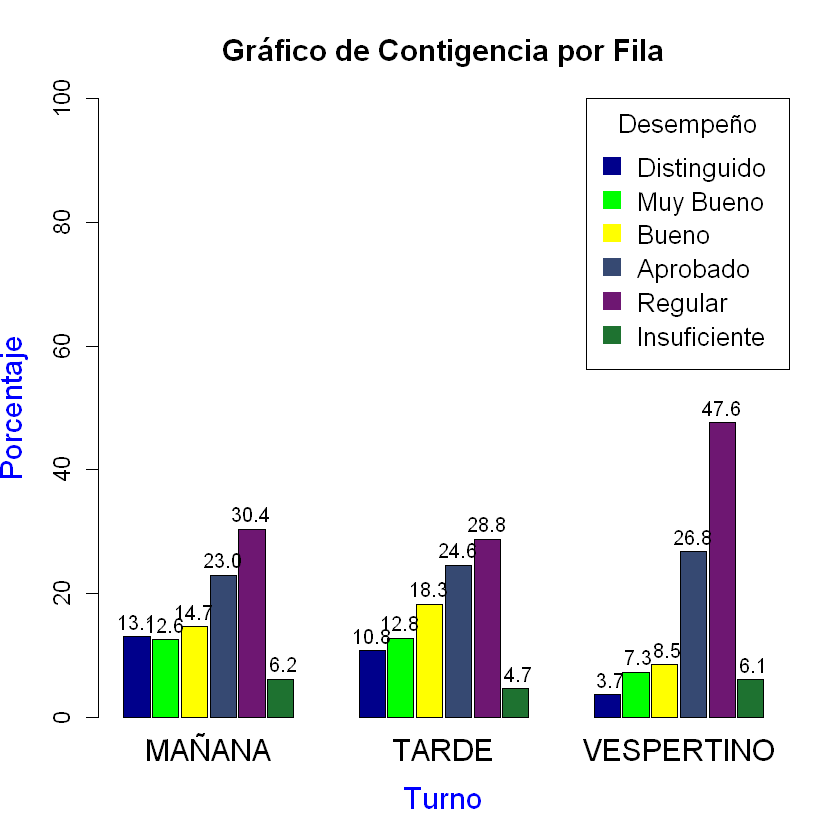

In [143]:



bpc <- barplot(t1_turno,
               main = "Gráfico de Contigencia por Fila",
               beside = TRUE, # Barras agrupadas
               space = c(0.1, 2.5), # Espacio: 0.1 entre barras, 2.5 entre grupos
               ylim = c(0, 100),
               cex.axis = 1.2, # tamaño etiquetas eje y
               cex.names = 1.5, # tamaño etiqueta eje x
               cex.main = 1.5, # tamaño título gráfico
               col = c("darkblue", "green", "yellow", "#364972", "#6E1772", "#1E7230"),
               xlab = "Turno",
               cex.lab = 1.5, # tamaño xlab y ylab
               ylab = "Porcentaje",
               col.lab = "blue") # Color xlab y ylab

# Leyenda
legend("topright", inset = c(0, 0), # Ajusta la posición de la leyenda
       legend = rownames(t1_turno),
       title = "Desempeño", # Título
       title.adj = 0.5, # Ajuste horizontal del título
       title.col = "black", # Color del título
       pch = 15, # Cambia a cuadrados
       col = c("darkblue", "green", "yellow", "#364972", "#6E1772", "#1E7230"),
       pt.cex = 2, # Tamaño de los cuadrados
       cex = 1.32) # Cambiar el tamaño del texto

# Agregar valores sobre las barras con un tamaño de texto más pequeño
TC <- t1_turno
text(bpc, TC + 2.5, format(TC), cex = 1) # Reducir tamaño de los números


[1] "MAÑANA"     "TARDE"      "VESPERTINO"

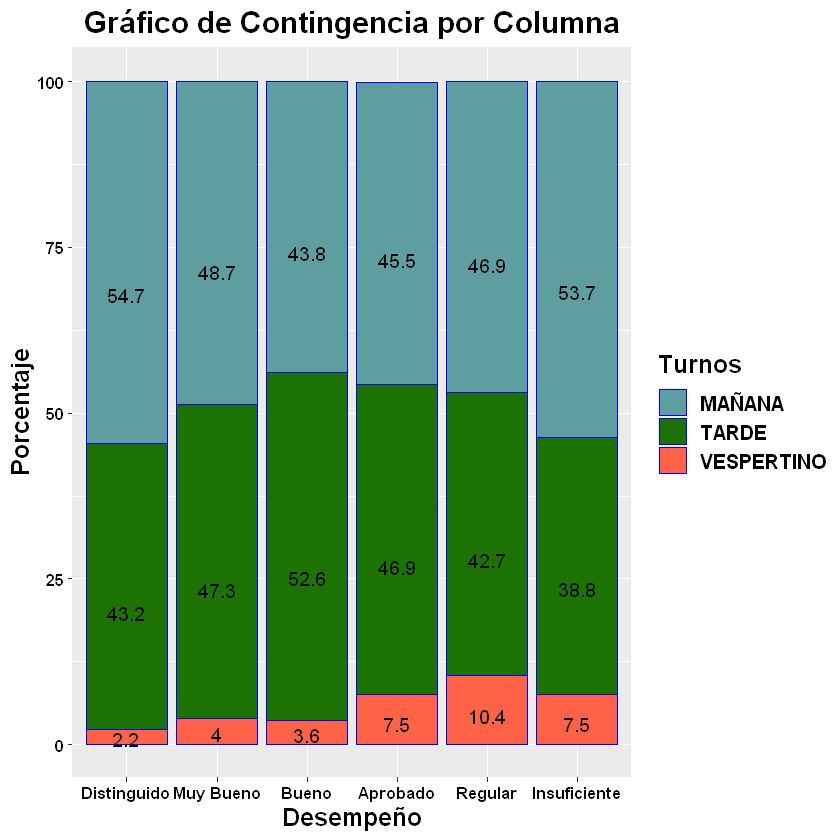

In [144]:
df <- as.data.frame(as.table(t2_turno))
colnames(df) <- c("Var1", "Var2", "Freq")

# Verifica los niveles de Var2
levels(df$Var2)

# Suponiendo que hay tres niveles, ajusta los colores
ggplot(data=df, aes(x=Var1, y=Freq, fill=Var2)) +
  geom_bar(stat="identity", colour="blue") +
  scale_fill_manual(name= "Turnos", values=c("#5F9EA0", "#1C7202", "#FF6347")) +
  geom_text(aes(label=Freq), position=position_stack(vjust=0.41), size = 4, color = "black") +
  xlab("Desempeño") +
  ylab("Porcentaje") +
  ggtitle("Gráfico de Contingencia por Columna") +
  theme(axis.title = element_text(size = 15, color = "black", face = "bold")) +
  theme(title = element_text(size = 15, color = "black", face = "bold")) +
  theme(plot.title = element_text(hjust = 0.5)) + # centra título
  theme(legend.text = element_text(size = 12, color = "black", face = "bold")) +
  theme(axis.text = element_text(size = 10, color = "black", face = "bold"))

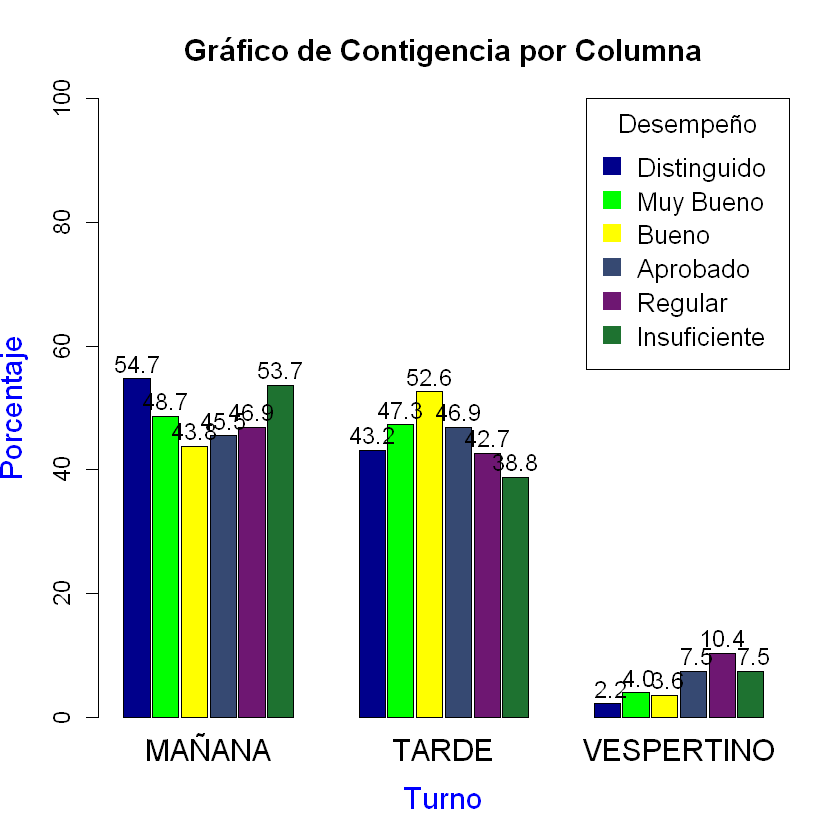

In [145]:
bpc<-barplot(t2_turno,
        main = "Gráfico de Contigencia por Columna",
        beside = TRUE, # Barras agrupadas
        space = c(0.1, 2.5), # Espacio primer elemento es el espacio entre barras de cada grupo (0.1) y el segundo el espacio entre grupos (2.5).
        ylim = c(0,100),
        cex.axis = 1.2, #tamaño etiquetas eje y
        cex.names=1.5, #tamaño etiqueta eje x
        cex.main=1.5, #tamaño título gráfico
        col=c("darkblue","green", "yellow","#364972","#6E1772","#1E7230"),
        xlab = "Turno",
        cex.lab=1.5, #tamaño  xlab ylab
        ylab = "Porcentaje",
       col.lab = "blue") # Color xlab ylab

#leyenda
legend("topright", inset = c(0, 0), # Ajusta la posición de la leyenda
       legend = rownames(t2_turno),
       title = "Desempeño", # Título
       title.adj = 0.5,          # Ajuste horizontal del título
       title.col = "black",       # Color del título
       pch = 15,  # Cambia a cuadrados
       col = c("darkblue", "green", "yellow", "#364972", "#6E1772", "#1E7230"),
       pt.cex = 2,  # Tamaño de los cuadrados
       cex = 1.32)  # Cambiar el tamaño del texto

# valores sobre barras
TC <- t2_turno
text(bpc, TC+2.5,format(TC), cex=1.2)

In [146]:
# H0: No hay asociacion entre Desempeño y turno
#H1: Hay asociacion entre Desempeño y turno

suppressWarnings({
  chi <- chisq.test(Tabla_segundo_turno)
  print(chi)
})


	Pearson's Chi-squared test

data:  Tabla_segundo_turno
X-squared = 23.351, df = 10, p-value = 0.009523



In [147]:
#frecuencias observadas
chi$observed

            Desempeño
turno        Aprobado Bueno Distinguido Insuficiente Muy Bueno Regular
  MAÑANA          133    85          76           36        73     176
  TARDE           137   102          60           26        71     160
  VESPERTINO       22     7           3            5         6      39

In [148]:
# frecuencias esperadas si fueran independientes
round(chi$expected,0)

Desempeño
turno        Aprobado Bueno Distinguido Insuficiente Muy Bueno Regular
  MAÑANA     139      92    66          32           71        178    
  TARDE      133      89    64          31           69        171    
  VESPERTINO  20      13     9           5           10         25

In [149]:
#Residuos estandarizados o tipificados
round(chi$residuals, 1)

            Desempeño
turno        Aprobado Bueno Distinguido Insuficiente Muy Bueno Regular
  MAÑANA         -0.5  -0.8         1.2          0.7       0.2    -0.2
  TARDE           0.3   1.4        -0.4         -0.8       0.3    -0.9
  VESPERTINO      0.5  -1.7        -2.1          0.2      -1.3     2.7

In [150]:
#Residuos corregidos o ajustados
round(chi$stdres,1)

            Desempeño
turno        Aprobado Bueno Distinguido Insuficiente Muy Bueno Regular
  MAÑANA         -0.8  -1.1         1.8          1.0       0.3    -0.3
  TARDE           0.5   2.1        -0.6         -1.2       0.4    -1.4
  VESPERTINO      0.6  -1.9        -2.3          0.2      -1.4     3.4

In [151]:
CramerV(Matematica_Segundo_Año_turno$turno, Matematica_Segundo_Año_turno$Desempeño)

[1] 0.09794727

In [152]:
Tabla_segundo_turno_total

Distinguido Muy Bueno Bueno Aprobado Regular Insuficiente Total
MAÑANA      76          73        85   133      176     36            579 
TARDE       60          71       102   137      160     26            556 
VESPERTINO   3           6         7    22       39      5             82 
Total      139         150       194   292      375     67           1217

In [153]:
prop.test(x=c(76,73,85,133,176,36), n=c(139,150,194,292,375,67), alternative="two.side", conf.level=0.95, correct=FALSE)


	6-sample test for equality of proportions without continuity
	correction

data:  c(76, 73, 85, 133, 176, 36) out of c(139, 150, 194, 292, 375, 67)
X-squared = 5.5432, df = 5, p-value = 0.3532
alternative hypothesis: two.sided
sample estimates:
   prop 1    prop 2    prop 3    prop 4    prop 5    prop 6 
0.5467626 0.4866667 0.4381443 0.4554795 0.4693333 0.5373134 


In [154]:


# Filtrar los datos para el primer año y las asignaturas LENGUA y MATEMATICA
primer_ano <- filter(SEC_NOTAS_MODIF, (asignatura == "LENGUA" | asignatura == "MATEMATICA") & Año_cursado == 2)

# Identificar los documentos de los alumnos que realizan ambas asignaturas
documentos_completos <- primer_ano %>%
  group_by(Documento) %>%
  filter(n_distinct(asignatura) == 2) %>%
  distinct(Documento)

# Filtrar el dataset original para obtener solo los registros de los alumnos que realizan ambas asignaturas
primer_anio_cm <- SEC_NOTAS_MODIF %>%
  filter(Documento %in% documentos_completos$Documento)

# Filtrar nuevamente para el primer año y las asignaturas LENGUA y MATEMATICA
aux <- filter(primer_anio_cm, (asignatura == "LENGUA" | asignatura == "MATEMATICA") & Año_cursado == 2)

# Eliminar filas con valores faltantes en las columnas 'Desempenio' y 'asignatura'
aux <- aux %>%
  filter(!is.na(Desempeño) & !is.na(asignatura))

# Crear la tabla de contingencia

Tabla_segundo_materias <- aux %>%
  dplyr::select(asignatura, Desempeño) %>%
  table()

# Reordenar los datos
Tabla_segundo_materias1 <- Tabla_segundo_materias[c("LENGUA", "MATEMATICA"), ]
Tabla_segundo_materias1 <- Tabla_segundo_materias1[, c("Distinguido", "Muy Bueno", "Bueno", "Aprobado", "Regular", "Insuficiente")]

# sumar totales por fila para obtener distribución marginal por fila
row_marginals <- margin.table(Tabla_segundo_materias1, 1)
row_marginals
#sumar totales por columna para obtener distribución marginal por columna
col_marginals <- margin.table(Tabla_segundo_materias1, 2)
col_marginals

# tabla de contigencia con marginales fila y columna
Tabla_segundo_materias_total<-cbind(Tabla_segundo_materias1,"Total"=margin.table(Tabla_segundo_materias1, 1))
Tabla_segundo_materias_total<-rbind(Tabla_segundo_materias_total,"Total"=margin.table(Tabla_segundo_materias_total, 2))
Tabla_segundo_materias_total

# PORCENTAJE TOTAL
Tabla_Contingencia_Totales <- prop.table(Tabla_segundo_materias1) * 100
Tabla_Contingencia_Totales <- cbind(Tabla_Contingencia_Totales, "Total" = margin.table(Tabla_Contingencia_Totales, 1))
Tabla_Contingencia_Totales <- rbind(Tabla_Contingencia_Totales, "Total" = margin.table(Tabla_Contingencia_Totales, 2))
Tabla_Contingencia_Totales <- round(Tabla_Contingencia_Totales, 1)

# PORCENTAJE FILA
Tabla_Contingencia_Filas <- prop.table(rbind(Tabla_segundo_materias1, "Total" = margin.table(Tabla_segundo_materias1, 2)), 1) * 100
Tabla_Contingencia_Filas <- cbind(Tabla_Contingencia_Filas, "Total" = margin.table(Tabla_Contingencia_Filas, 1))
Tabla_Contingencia_Filas <- round(Tabla_Contingencia_Filas, 1)


# PORCENTAJE COLUMNA
Tabla_Contingencia_Columnas <- prop.table(cbind(Tabla_segundo_materias1, "Total" = margin.table(Tabla_segundo_materias1, 1)), 2) * 100
Tabla_Contingencia_Columnas <- rbind(Tabla_Contingencia_Columnas, "Total" = margin.table(Tabla_Contingencia_Columnas, 2))
Tabla_Contingencia_Columnas <- round(Tabla_Contingencia_Columnas, 1)


Tabla_Contingencia_Totales
Tabla_Contingencia_Filas
Tabla_Contingencia_Columnas



asignatura
    LENGUA MATEMATICA 
      1209       1210 

Desempeño
 Distinguido    Muy Bueno        Bueno     Aprobado      Regular Insuficiente 
         314          359          434          601          629           82 

Distinguido Muy Bueno Bueno Aprobado Regular Insuficiente Total
LENGUA     153         205       232   327      270     22           1209 
MATEMATICA 161         154       202   274      359     60           1210 
Total      314         359       434   601      629     82           2419

Distinguido Muy Bueno Bueno Aprobado Regular Insuficiente Total
LENGUA      6.3         8.5       9.6  13.5     11.2    0.9           50  
MATEMATICA  6.7         6.4       8.4  11.3     14.8    2.5           50  
Total      13.0        14.8      17.9  24.8     26.0    3.4          100

Distinguido Muy Bueno Bueno Aprobado Regular Insuficiente Total
LENGUA     12.7        17.0      19.2  27.0     22.3    1.8          100  
MATEMATICA 13.3        12.7      16.7  22.6     29.7    5.0          100  
Total      13.0        14.8      17.9  24.8     26.0    3.4          100

Distinguido Muy Bueno Bueno Aprobado Regular Insuficiente Total
LENGUA      48.7        57.1      53.5  54.4     42.9    26.8         50  
MATEMATICA  51.3        42.9      46.5  45.6     57.1    73.2         50  
Total      100.0       100.0     100.0 100.0    100.0   100.0        100

In [155]:
aux$Desempeño<-factor(aux$Desempeño, levels = c('Distinguido','Muy Bueno','Bueno','Aprobado','Regular','Insuficiente'))
t1_materia<-round(prop.table( table(aux$asignatura, aux$Desempeño),1)*100,1)
t1_materia<-t(t1_materia)
t1_materia

              
               LENGUA MATEMATICA
  Distinguido    12.7       13.3
  Muy Bueno      17.0       12.7
  Bueno          19.2       16.7
  Aprobado       27.0       22.6
  Regular        22.3       29.7
  Insuficiente    1.8        5.0

In [156]:

aux$Desempeño <- factor(aux$Desempeño, levels = c('Distinguido','Muy Bueno','Bueno','Aprobado','Regular','Insuficiente'))
t2_materia <- round(prop.table(table(aux$asignatura, aux$Desempeño), 2) * 100, 1)
t2_materia<-t(t2_materia)
t2_materia

              
               LENGUA MATEMATICA
  Distinguido    48.7       51.3
  Muy Bueno      57.1       42.9
  Bueno          53.5       46.5
  Aprobado       54.4       45.6
  Regular        42.9       57.1
  Insuficiente   26.8       73.2

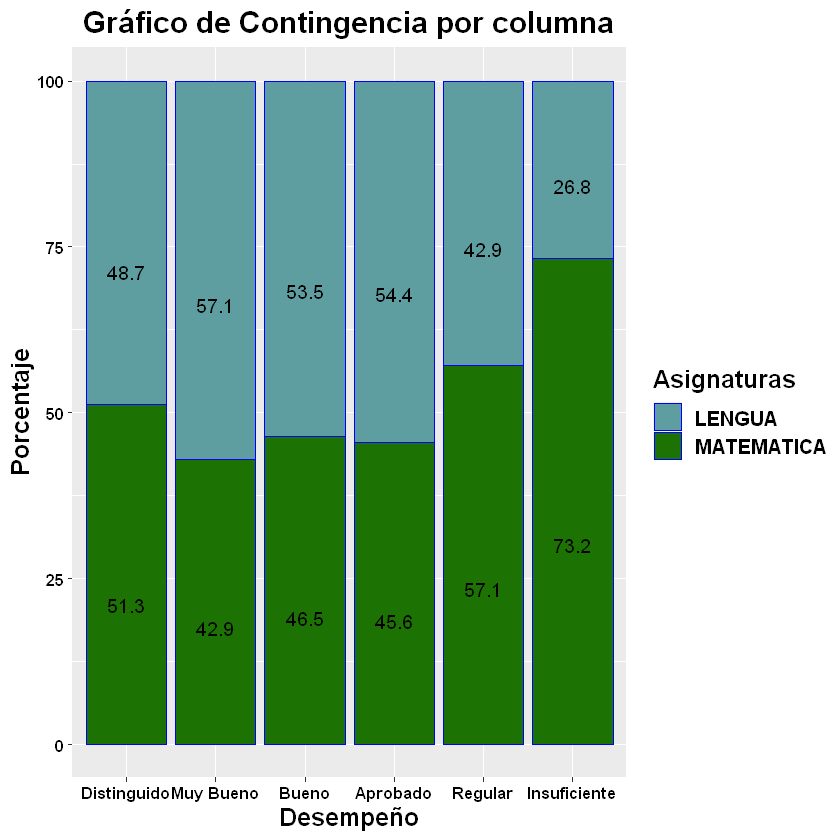

In [157]:
df <- as.data.frame(as.table(t2_materia))
colnames(df) <- c("Var1", "Var2", "Freq")

ggplot(data=df, aes(x=Var1, y=Freq, fill=Var2)) +
  geom_bar(stat="identity", colour="blue") +
  scale_fill_manual(name= "Asignaturas", values=c("#5F9EA0", "#1C7202")) +
  geom_text(aes(label=Freq), position=position_stack(vjust=0.41), size = 4, color = "black") +  # Cambia a color negro
  xlab("Desempeño") +
  ylab("Porcentaje") +
  ggtitle("Gráfico de Contingencia por columna") +
  theme(axis.title = element_text(size = 15, color = "black", face = "bold")) +
  theme(title = element_text(size = 15, color = "black", face = "bold")) +
  theme(plot.title = element_text(hjust = 0.5)) +  # Centra el título
  theme(legend.text = element_text(size = 12, color = "black", face= "bold")) +
  theme(axis.text = element_text(size = 10, color = "black", face= "bold"))


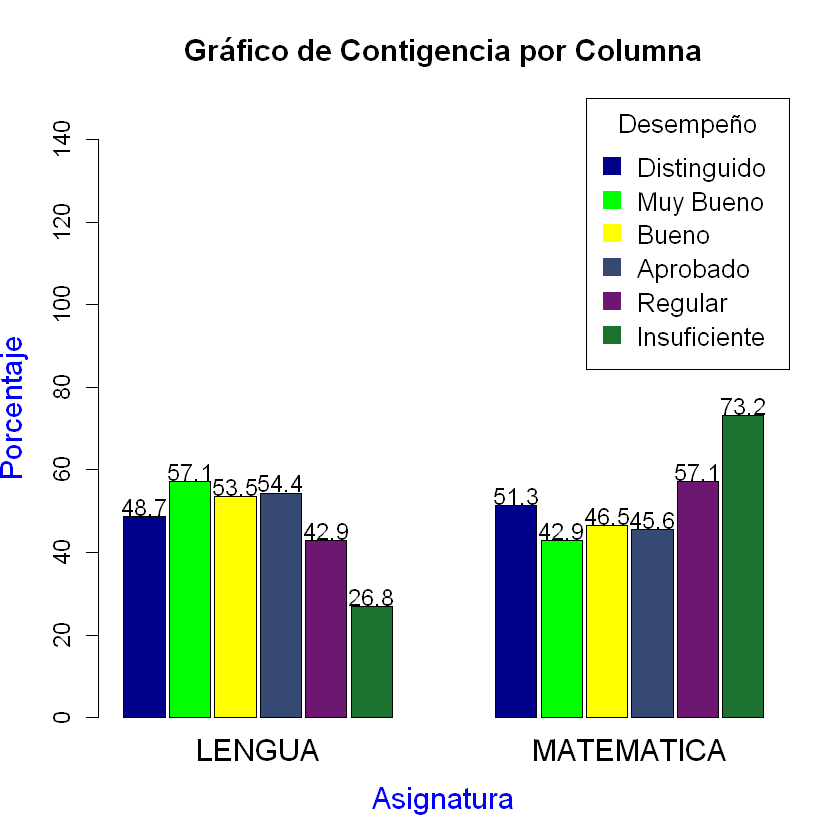

In [158]:
bpc<-barplot(t2_materia,
        main = "Gráfico de Contigencia por Columna",
        beside = TRUE, # Barras agrupadas
        space = c(0.1, 2.5), # Espacio primer elemento es el espacio entre barras de cada grupo (0.1) y el segundo el espacio entre grupos (2.5).
        ylim = c(0,150),
        cex.axis = 1.2, #tamaño etiquetas eje y
        cex.names=1.5, #tamaño etiqueta eje x
        cex.main=1.5, #tamaño título gráfico
        col=c("darkblue","green", "yellow","#364972","#6E1772","#1E7230"),
        xlab = "Asignatura",
        cex.lab=1.5, #tamaño  xlab ylab
        ylab = "Porcentaje",
       col.lab = "blue") # Color xlab ylab

#leyenda
legend("topright", inset = c(0, 0), # Ajusta la posición de la leyenda
       legend = rownames(t2_materia),
       title = "Desempeño", # Título
       title.adj = 0.5,          # Ajuste horizontal del título
       title.col = "black",       # Color del título
       pch = 15,  # Cambia a cuadrados
       col = c("darkblue", "green", "yellow", "#364972", "#6E1772", "#1E7230"),
       pt.cex = 2,  # Tamaño de los cuadrados
       cex = 1.32)  # Cambiar el tamaño del texto

# valores sobre barras
TC <- t2_materia
text(bpc, TC+2.5,format(TC), cex=1.2)

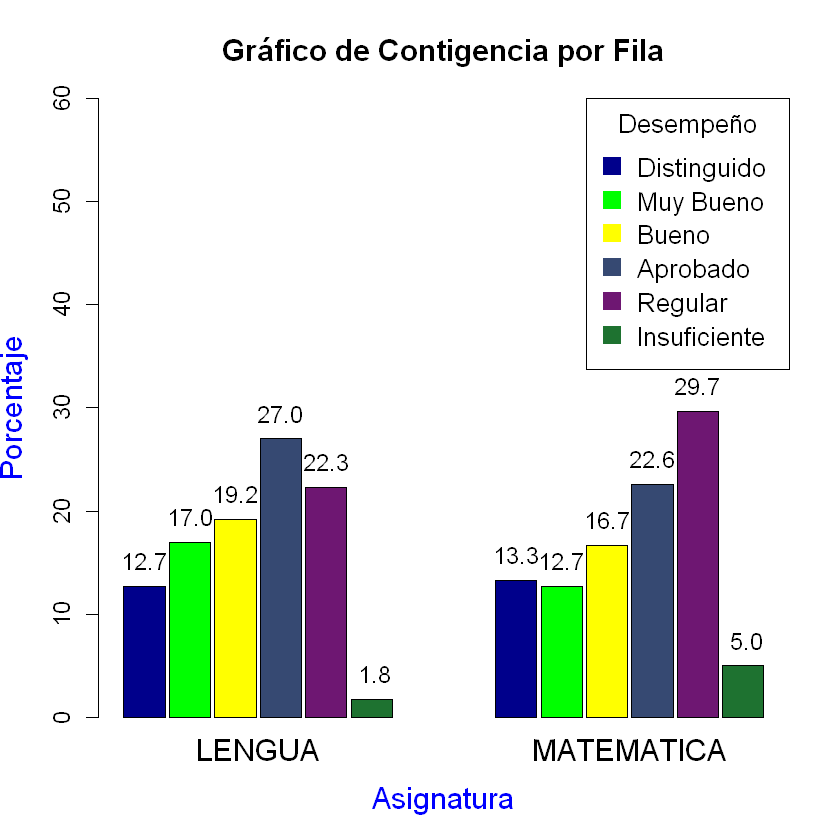

In [159]:
bpc<-barplot(t1_materia,
        main = "Gráfico de Contigencia por Fila",
        beside = TRUE, # Barras agrupadas
        space = c(0.1, 2.5), # Espacio primer elemento es el espacio entre barras de cada grupo (0.1) y el segundo el espacio entre grupos (2.5).
        ylim = c(0,60),
        cex.axis = 1.2, #tamaño etiquetas eje y
        cex.names=1.5, #tamaño etiqueta eje x
        cex.main=1.5, #tamaño título gráfico
        col=c("darkblue","green", "yellow","#364972","#6E1772","#1E7230"),
        xlab = "Asignatura",
        cex.lab=1.5, #tamaño  xlab ylab
        ylab = "Porcentaje",
       col.lab = "blue") # Color xlab ylab

#leyenda
legend("topright", inset = c(0, 0), # Ajusta la posición de la leyenda
       legend = rownames(t1_materia),
       title = "Desempeño", # Título
       title.adj = 0.5,          # Ajuste horizontal del título
       title.col = "black",       # Color del título
       pch = 15,  # Cambia a cuadrados
       col = c("darkblue", "green", "yellow", "#364972", "#6E1772", "#1E7230"),
       pt.cex = 2,  # Tamaño de los cuadrados
       cex = 1.32)  # Cambiar el tamaño del texto

# valores sobre barras
TC <- t1_materia
text(bpc, TC+2.5,format(TC), cex=1.2)

In [160]:
Tabla_segundo_materias1

            Desempeño
asignatura   Distinguido Muy Bueno Bueno Aprobado Regular Insuficiente
  LENGUA             153       205   232      327     270           22
  MATEMATICA         161       154   202      274     359           60

In [161]:
# H0: No hay asociacion entre Desempeño y las asignatura Matematica y Lengua
#H1: Hay asociacion entre Desempeño y las asignatura Matematica y Lengua
chi <- chisq.test(Tabla_segundo_materias)

# Mostrar el resultado de la prueba de chi-cuadrado
print(chi)


	Pearson's Chi-squared test

data:  Tabla_segundo_materias
X-squared = 44.399, df = 5, p-value = 1.922e-08



In [162]:
#frecuencias observadas
chi$observed

            Desempeño
asignatura   Aprobado Bueno Distinguido Insuficiente Muy Bueno Regular
  LENGUA          327   232         153           22       205     270
  MATEMATICA      274   202         161           60       154     359

In [163]:
# frecuencias esperadas si fueran independientes
round(chi$expected,0)

Desempeño
asignatura   Aprobado Bueno Distinguido Insuficiente Muy Bueno Regular
  LENGUA     300      217   157         41           179       314    
  MATEMATICA 301      217   157         41           180       315

In [164]:
#Residuos estandarizados o tipificados
round(chi$residuals, 1)

            Desempeño
asignatura   Aprobado Bueno Distinguido Insuficiente Muy Bueno Regular
  LENGUA          1.5   1.0        -0.3         -3.0       1.9    -2.5
  MATEMATICA     -1.5  -1.0         0.3          3.0      -1.9     2.5

In [165]:
#Residuos corregidos o ajustados
round(chi$stdres,1)

            Desempeño
asignatura   Aprobado Bueno Distinguido Insuficiente Muy Bueno Regular
  LENGUA          2.5   1.6        -0.5         -4.3       2.9    -4.1
  MATEMATICA     -2.5  -1.6         0.5          4.3      -2.9     4.1

In [166]:
cramer_v <- CramerV(Tabla_segundo_materias)

# Mostrar el resultado de la V de Cramer
print(cramer_v)

[1] 0.1354778


In [167]:
Tabla_segundo_materias_total

Distinguido Muy Bueno Bueno Aprobado Regular Insuficiente Total
LENGUA     153         205       232   327      270     22           1209 
MATEMATICA 161         154       202   274      359     60           1210 
Total      314         359       434   601      629     82           2419

In [168]:
prop.test(x=c(158,199,217,357,187,8), n=c(346,390,419,634,434,31), alternative="two.side", conf.level=0.95, correct=FALSE)


	6-sample test for equality of proportions without continuity
	correction

data:  c(158, 199, 217, 357, 187, 8) out of c(346, 390, 419, 634, 434, 31)
X-squared = 28.948, df = 5, p-value = 2.374e-05
alternative hypothesis: two.sided
sample estimates:
   prop 1    prop 2    prop 3    prop 4    prop 5    prop 6 
0.4566474 0.5102564 0.5178998 0.5630915 0.4308756 0.2580645 


In [169]:

# Filtrar los datos para el primer año y las asignaturas LENGUA y MATEMATICA
tercer_ano <- filter(SEC_NOTAS_MODIF, (asignatura == "LENGUA" | asignatura == "MATEMATICA") & Año_cursado == 3)

# Identificar los documentos de los alumnos que realizan ambas asignaturas
documentos_completos <- tercer_ano %>%
  group_by(Documento) %>%
  filter(n_distinct(asignatura) == 2) %>%
  distinct(Documento)

# Filtrar el dataset original para obtener solo los registros de los alumnos que realizan ambas asignaturas
tercer_anio_cm <- SEC_NOTAS_MODIF %>%
  filter(Documento %in% documentos_completos$Documento)

# Filtrar nuevamente para el primer año y las asignaturas LENGUA y MATEMATICA
auxTercero <- filter(tercer_anio_cm, (asignatura == "LENGUA" | asignatura == "MATEMATICA") & Año_cursado == 3)

# Eliminar filas con valores faltantes en las columnas 'Desempenio' y 'asignatura'
auxTercero <- aux %>%
  filter(!is.na(Desempeño) & !is.na(asignatura))

# Crear la tabla de contingencia

Tabla_tercero_materias <- auxTercero %>%
  dplyr::select(asignatura, Desempeño) %>%
  table()


# Reordenar los datos
Tabla_tercero_materias1 <- Tabla_tercero_materias[c("LENGUA", "MATEMATICA"), ]
Tabla_tercero_materias1 <- Tabla_tercero_materias[, c("Distinguido", "Muy Bueno", "Bueno", "Aprobado", "Regular", "Insuficiente")]

# sumar totales por fila para obtener distribución marginal por fila
row_marginals <- margin.table(Tabla_tercero_materias1, 1)
row_marginals
#sumar totales por columna para obtener distribución marginal por columna
col_marginals <- margin.table(Tabla_tercero_materias1, 2)
col_marginals

# tabla de contigencia con marginales fila y columna
Tabla_tercero_materias_total<-cbind(Tabla_tercero_materias1,"Total"=margin.table(Tabla_tercero_materias1, 1))
Tabla_tercero_materias_total<-rbind(Tabla_tercero_materias1,"Total"=margin.table(Tabla_tercero_materias1, 2))
Tabla_tercero_materias_total

# Calcular las proporciones totales
Tabla_Contingencia_Totales <- prop.table(Tabla_tercero_materias1) * 100
Tabla_Contingencia_Totales <- cbind(Tabla_Contingencia_Totales, "Total" = margin.table(Tabla_Contingencia_Totales, 1))
Tabla_Contingencia_Totales <- rbind(Tabla_Contingencia_Totales, "Total" = margin.table(Tabla_Contingencia_Totales, 2))
Tabla_Contingencia_Totales <- round(Tabla_Contingencia_Totales, 1)

# Calcular las proporciones por fila
Tabla_Contingencia_Filas <- prop.table(rbind(Tabla_tercero_materias1, "Total" = margin.table(Tabla_tercero_materias1, 2)), 1) * 100
Tabla_Contingencia_Filas <- cbind(Tabla_Contingencia_Filas, "Total" = margin.table(Tabla_Contingencia_Filas, 1))
Tabla_Contingencia_Filas <- round(Tabla_Contingencia_Filas, 1)

# Calcular las proporciones por columna
Tabla_Contingencia_Columnas <- prop.table(cbind(Tabla_tercero_materias1, "Total" = margin.table(Tabla_tercero_materias1, 1)), 2) * 100
Tabla_Contingencia_Columnas <- rbind(Tabla_Contingencia_Columnas, "Total" = margin.table(Tabla_Contingencia_Columnas, 2))
Tabla_Contingencia_Columnas <- round(Tabla_Contingencia_Columnas, 1)

Tabla_Contingencia_Totales
Tabla_Contingencia_Filas
Tabla_Contingencia_Columnas



asignatura
    LENGUA MATEMATICA 
      1209       1210 

Desempeño
 Distinguido    Muy Bueno        Bueno     Aprobado      Regular Insuficiente 
         314          359          434          601          629           82 

Distinguido Muy Bueno Bueno Aprobado Regular Insuficiente
LENGUA     153         205       232   327      270     22          
MATEMATICA 161         154       202   274      359     60          
Total      314         359       434   601      629     82

Distinguido Muy Bueno Bueno Aprobado Regular Insuficiente Total
LENGUA      6.3         8.5       9.6  13.5     11.2    0.9           50  
MATEMATICA  6.7         6.4       8.4  11.3     14.8    2.5           50  
Total      13.0        14.8      17.9  24.8     26.0    3.4          100

Distinguido Muy Bueno Bueno Aprobado Regular Insuficiente Total
LENGUA     12.7        17.0      19.2  27.0     22.3    1.8          100  
MATEMATICA 13.3        12.7      16.7  22.6     29.7    5.0          100  
Total      13.0        14.8      17.9  24.8     26.0    3.4          100

Distinguido Muy Bueno Bueno Aprobado Regular Insuficiente Total
LENGUA      48.7        57.1      53.5  54.4     42.9    26.8         50  
MATEMATICA  51.3        42.9      46.5  45.6     57.1    73.2         50  
Total      100.0       100.0     100.0 100.0    100.0   100.0        100

In [170]:
auxTercero$Desempeño<-factor(auxTercero$Desempeño, levels = c('Distinguido','Muy Bueno','Bueno','Aprobado','Regular','Insuficiente'))
t1_materiaTercero<-round(prop.table( table(auxTercero$asignatura, auxTercero$Desempeño),1)*100,1)
t1_materiaTercero<-t(t1_materiaTercero)
t1_materiaTercero

              
               LENGUA MATEMATICA
  Distinguido    12.7       13.3
  Muy Bueno      17.0       12.7
  Bueno          19.2       16.7
  Aprobado       27.0       22.6
  Regular        22.3       29.7
  Insuficiente    1.8        5.0

In [171]:
auxTercero$Desempeño<-factor(auxTercero$Desempeño, levels = c('Distinguido','Muy Bueno','Bueno','Aprobado','Regular','Insuficiente'))
t2_materiaTercero <- round(prop.table(table(auxTercero$asignatura, auxTercero$Desempeño), 2) * 100, 1)
t2_materiaTercero<-t(t2_materiaTercero)
t2_materiaTercero

              
               LENGUA MATEMATICA
  Distinguido    48.7       51.3
  Muy Bueno      57.1       42.9
  Bueno          53.5       46.5
  Aprobado       54.4       45.6
  Regular        42.9       57.1
  Insuficiente   26.8       73.2

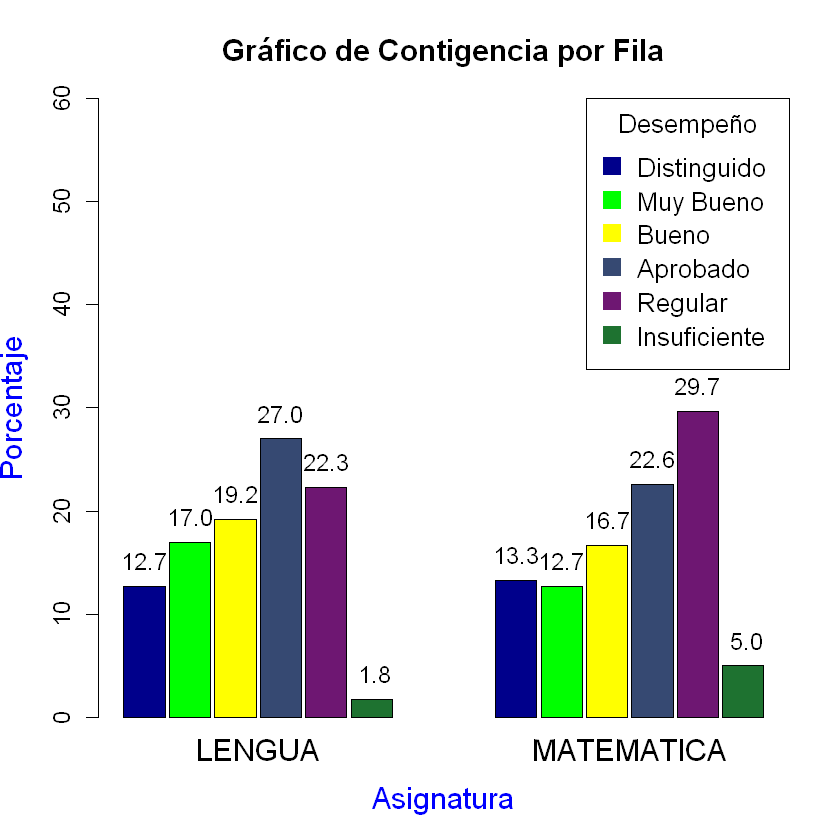

In [172]:
bpc<-barplot(t1_materiaTercero,
        main = "Gráfico de Contigencia por Fila",
        beside = TRUE, # Barras agrupadas
        space = c(0.1, 2.5), # Espacio primer elemento es el espacio entre barras de cada grupo (0.1) y el segundo el espacio entre grupos (2.5).
        ylim = c(0,60),
        cex.axis = 1.2, #tamaño etiquetas eje y
        cex.names=1.5, #tamaño etiqueta eje x
        cex.main=1.5, #tamaño título gráfico
        col=c("darkblue","green", "yellow","#364972","#6E1772","#1E7230"),
        xlab = "Asignatura",
        cex.lab=1.5, #tamaño  xlab ylab
        ylab = "Porcentaje",
       col.lab = "blue") # Color xlab ylab

#leyenda
legend("topright", inset = c(0, 0), # Ajusta la posición de la leyenda
       legend = rownames(t1_materiaTercero),
       title = "Desempeño", # Título
       title.adj = 0.5,          # Ajuste horizontal del título
       title.col = "black",       # Color del título
       pch = 15,  # Cambia a cuadrados
       col = c("darkblue", "green", "yellow", "#364972", "#6E1772", "#1E7230"),
       pt.cex = 2,  # Tamaño de los cuadrados
       cex = 1.32)  # Cambiar el tamaño del texto

# valores sobre barras
TC <- t1_materiaTercero
text(bpc, TC+2.5,format(TC), cex=1.2)

In [173]:
#AÑOS DE CURSADO


todos_los_años<- SEC_NOTAS_MODIF %>%
  filter(asignatura %in% c("HISTORIA", "MATEMATICA", "LENGUA", "GEOGRAFIA"))
# Identificar los documentos de los alumnos que realizan las 4 asignaturas
documentos_completos_alumnos_nivel <- todos_los_años %>%
  group_by(Documento) %>%
  filter(n_distinct(asignatura) == 4) %>%
  distinct(Documento)

# Filtrar el dataset original para obtener solo los registros de los alumnos que realizan las 4 asignaturas
nivel_completo <- todos_los_años%>%
  filter(Documento %in% documentos_completos_alumnos_nivel$Documento & asignatura %in% c("HISTORIA", "MATEMATICA", "LENGUA", "GEOGRAFIA"))

promedios_nivel <- nivel_completo%>%
  group_by(Documento, asignatura, Año_cursado) %>%
  summarise(Promedio = mean(Promedio, na.rm = TRUE), .groups = 'drop') %>%
  pivot_wider(names_from = asignatura, values_from = Promedio)

promedios_nivel

Documento Año_cursado GEOGRAFIA HISTORIA LENGUA MATEMATICA
1    43021949  3           6.67      7.00     7.33   7.33      
2    43027670  2           6.67      6.00     7.33   9.33      
3    43339616  3           8.67      7.67     6.67   9.67      
4    43339639  6           9.33      6.00     8.33   7.00      
5    43339768  2           6.33      7.33     6.67   8.00      
6    43347131  2           7.00      7.33     6.67   7.00      
7    43479582  2           8.00      7.67     9.33   8.00      
8    43479583  2           8.00      8.67     8.33   7.67      
9    43480546  3           8.00      6.00     7.67   7.00      
10   43480590  4           6.67      7.67     5.33   5.33      
11   43480607  2           8.33      8.33     8.67   8.33      
12   43480619  2           6.33      6.00     6.67   7.00      
13   43480767  3           8.67      7.67     6.67   8.00      
14   43480836  6           9.33      6.33     8.67   8.00      
15   43683111  1           8.67      8.00     8.67   7.00      
16   43934286  3           8.33      6.67     7.00   9.00      
17   43934318  3           6.00      6.00     5.00   6.00      
18   43934398  2           8.33      6.33     8.00   6.00      
19   44032321  3           8.33      6.67     6.67   9.33      
20   44032340  5           9.67      7.67     8.67   9.00      
21   44032382  6           6.33      6.00     6.33   6.67      
22   44150085  6           8.67      6.00     7.33   8.00      
23   44150110  5           7.00      6.67     7.33   4.00      
24   44150162  3           7.67      7.33     6.33   6.00      
25   44209502  6           7.67      6.67     6.67   4.00      
26   44280909  2           7.67      5.67     6.33   6.00      
27   44280963  6           6.67      6.00     6.67   7.33      
28   44280969  3           7.00      7.33     9.00   6.67      
29   44281593  2           6.67      6.67     7.00   9.00      
30   44281734  3           8.33      7.00     7.67   7.33      
...  ...       ...         ...       ...      ...    ...       
5267 52819364  2           6.33       6.67     6.33  8.67      
5268 53109728  3           5.00       7.33     7.33  4.33      
5269 53622643  2           5.33       6.00     4.67  4.67      
5270 53736936  2           6.00       7.33     6.33  7.00      
5271 53811354  1           5.33       4.33     6.00  4.67      
5272 54004185  1           7.00       7.67     6.00  6.00      
5273 54004205  2           6.33       5.33     6.00  6.33      
5274 54022392  1           9.33       9.67     8.67  9.00      
5275 54153298  1           5.67       6.33     7.00  6.00      
5276 55551524  3           4.33       7.00     6.00  5.33      
5277 59383472  1           5.33       5.33     5.33  5.00      
5278 94673743  6           9.17      10.00     7.67  8.33      
5279 94845388  5           9.67       9.00     9.67  9.00      
5280 94892619  3           3.67       5.00     4.67  7.00      
5281 94981182  6           8.00       5.00     8.67  6.00      
5282 95180449  3           5.00       6.00     5.67  5.33      
5283 95427833  3           6.00       8.67     5.33  6.00      
5284 95427834  6           7.33       6.00     6.00  6.00      
5285 95461175  3           9.33       9.67    10.00  9.33      
5286 95511230  2           5.00       4.67     6.67  6.67      
5287 95511261  5           6.00       7.00     7.67  7.00      
5288 95541690  3           4.67       7.33     8.00  8.00      
5289 95979128  2           5.00       7.67     4.00  4.33      
5290 96025478  5           6.33       9.00     8.33  8.00      
5291 96058680  1           5.67       5.67     5.67  5.33      
5292 96100455  3           5.67       5.00     6.00  4.33      
5293 96120564  1           9.33       9.33     8.67  9.00      
5294 96162043  5           8.67       9.00     7.67  4.00      
5295 96189429  6           7.67       5.33     7.33  6.67      
5296 96213905  3           3.00       4.33     3.33  6.33

In [174]:
#VECTOR DE MEDIAS
suppressWarnings({
  colnames_promedios_nivel <- c("Documento", "Año_cursado", "GEOGRAFIA", "HISTORIA", "LENGUA", "MATEMATICA")

  promedios_nivel$Documento <- as.factor(promedios_nivel$Documento)
  promedios_nivel$Año_cursado <- as.numeric(promedios_nivel$Año_cursado)
  promedios_nivel$GEOGRAFIA <- as.numeric(promedios_nivel$GEOGRAFIA)
  promedios_nivel$HISTORIA <- as.numeric(promedios_nivel$HISTORIA)
  promedios_nivel$LENGUA <- as.numeric(promedios_nivel$LENGUA)
  promedios_nivel$MATEMATICA <- as.numeric(promedios_nivel$MATEMATICA)

  medias_alumnos <- promedios_nivel %>% 
    group_by(Año_cursado) %>% 
    summarise_all(mean)
  medias_alumnos
})

Año_cursado Documento GEOGRAFIA HISTORIA LENGUA   MATEMATICA
1 1           NA        7.236048  7.335760 7.079003 7.044884  
2 2           NA        7.049311  7.265409 6.894931 6.594991  
3 3           NA        7.157939  7.303015 7.067104 6.644436  
4 4           NA        7.263163  7.462275 7.187469 6.808794  
5 5           NA        7.601172  7.627627 7.623777 6.937641  
6 6           NA        7.872858  7.827477 7.709424 7.134875

In [175]:
#VECTOR DE MEDIANAS

# Inicializar una lista vacía para almacenar las medianas
vector_medianas <- list()
for (i in 1:6) {
  medianas <- apply(filter(promedios_nivel, Año_cursado == as.character(i))[, 3:6], 2, median)
  vector_medianas[[i]] <- medianas
}

# Convertir la lista a una matriz
vector_medianas <- do.call(rbind, vector_medianas)
vector_medianas


#MATRIZ DE VARIANZA Y COVARIANZA

cov_list <- list()
for (i in 1:6) {
  Año <- filter(promedios_nivel, Año_cursado == as.character(i))
  cov_matrix <- round(cov(Año[, 3:6]), 2)
  cov_list[[paste("Año", i, sep = "")]] <- cov_matrix
}

# Mostrar las matrices de covarianza
cov_list

GEOGRAFIA HISTORIA LENGUA MATEMATICA
[1,] 7.00      7.33     7.00   7.00      
[2,] 7.00      7.33     6.67   6.67      
[3,] 7.33      7.33     7.00   6.33      
[4,] 7.33      7.67     7.33   6.67      
[5,] 7.67      7.67     7.67   7.00      
[6,] 8.00      8.00     7.67   7.33

$Año1
           GEOGRAFIA HISTORIA LENGUA MATEMATICA
GEOGRAFIA       2.26     1.86   1.79       1.89
HISTORIA        1.86     2.31   1.75       1.83
LENGUA          1.79     1.75   2.05       1.80
MATEMATICA      1.89     1.83   1.80       2.62

$Año2
           GEOGRAFIA HISTORIA LENGUA MATEMATICA
GEOGRAFIA       2.48     1.77   1.73       1.87
HISTORIA        1.77     2.59   1.75       1.87
LENGUA          1.73     1.75   2.52       1.89
MATEMATICA      1.87     1.87   1.89       3.20

$Año3
           GEOGRAFIA HISTORIA LENGUA MATEMATICA
GEOGRAFIA       2.43     1.61   1.54       1.66
HISTORIA        1.61     2.68   1.74       1.77
LENGUA          1.54     1.74   2.49       1.71
MATEMATICA      1.66     1.77   1.71       2.90

$Año4
           GEOGRAFIA HISTORIA LENGUA MATEMATICA
GEOGRAFIA       1.96     1.29   1.39       1.40
HISTORIA        1.29     2.14   1.28       1.54
LENGUA          1.39     1.28   2.50       1.41
MATEMATICA      1.40     1.54   1.41       3.11

$Año5
           GEOGRAFIA HISTORIA LENGUA MATEMATICA
GEOGRAFIA       2.04     1.03   1.48       1.42
HISTORIA        1.03     1.86   1.12       1.09
LENGUA          1.48     1.12   2.16       1.27
MATEMATICA      1.42     1.09   1.27       2.99

$Año6
           GEOGRAFIA HISTORIA LENGUA MATEMATICA
GEOGRAFIA       1.71     1.20   1.32       1.39
HISTORIA        1.20     1.95   1.25       1.34
LENGUA          1.32     1.25   2.04       1.37
MATEMATICA      1.39     1.34   1.37       2.97

In [176]:
#H0: existe una diferencia entre los promedios de los diferentes años en las asignaturas troncales.
#H1: NO existe una diferencia entre los promedios de los diferentes años en las asignaturas troncales.

mod1<-manova(cbind(GEOGRAFIA,HISTORIA,LENGUA,MATEMATICA)~Año_cursado,data=promedios_nivel)
summary(mod1)

              Df   Pillai approx F num Df den Df    Pr(>F)    
Año_cursado    1 0.038224    52.57      4   5291 < 2.2e-16 ***
Residuals   5294                                              
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [177]:
summary.aov(mod1)

 Response GEOGRAFIA :
              Df  Sum Sq Mean Sq F value    Pr(>F)    
Año_cursado    1   242.8  242.77  109.87 < 2.2e-16 ***
Residuals   5294 11697.6    2.21                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Response HISTORIA :
              Df  Sum Sq Mean Sq F value    Pr(>F)    
Año_cursado    1   142.6 142.602  61.791 4.593e-15 ***
Residuals   5294 12217.5   2.308                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Response LENGUA :
              Df Sum Sq Mean Sq F value    Pr(>F)    
Año_cursado    1    314  313.98  134.77 < 2.2e-16 ***
Residuals   5294  12334    2.33                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Response MATEMATICA :
              Df  Sum Sq Mean Sq F value  Pr(>F)  
Año_cursado    1    17.2 17.2381  5.7601 0.01643 *
Residuals   5294 15843.2  2.9927                  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [178]:
#Supuestos de normalidad

promedios_nivel %>% group_by(Año_cursado) %>%  shapiro_test(GEOGRAFIA,HISTORIA,LENGUA,MATEMATICA)

Año_cursado variable   statistic p           
1  1           GEOGRAFIA  0.9716772 1.251927e-13
2  1           HISTORIA   0.9713543 1.014665e-13
3  1           LENGUA     0.9761819 2.819182e-12
4  1           MATEMATICA 0.9765058 3.578235e-12
5  2           GEOGRAFIA  0.9776832 6.695609e-12
6  2           HISTORIA   0.9740194 4.596248e-13
7  2           LENGUA     0.9855254 6.409194e-09
8  2           MATEMATICA 0.9799228 3.974951e-11
9  3           GEOGRAFIA  0.9813098 1.745974e-09
10 3           HISTORIA   0.9720282 2.567603e-12
11 3           LENGUA     0.9831269 7.829460e-09
12 3           MATEMATICA 0.9804199 8.644308e-10
13 4           GEOGRAFIA  0.9805722 2.011748e-09
14 4           HISTORIA   0.9775736 2.233260e-10
15 4           LENGUA     0.9820194 6.258342e-09
16 4           MATEMATICA 0.9718710 5.420196e-12
17 5           GEOGRAFIA  0.9737372 8.425680e-10
18 5           HISTORIA   0.9691525 6.908168e-11
19 5           LENGUA     0.9698370 9.880860e-11
20 5           MATEMATICA 0.9790189 2.149781e-08
21 6           GEOGRAFIA  0.9709487 5.657745e-10
22 6           HISTORIA   0.9684513 1.586229e-10
23 6           LENGUA     0.9650610 3.113281e-11
24 6           MATEMATICA 0.9731490 1.837227e-09

In [179]:
#Supuestos de normalidad multivariante
mardia2(promedios_nivel[, c("GEOGRAFIA", "HISTORIA","LENGUA","MATEMATICA")])

Test de Normalidad Multivariada 
 Ho: Los datos siguen una Distribución Normal Multivariada 
---------------------------------------------------------------- 
Prueba de Mardia - Asimetría 
 Asimetría Multivariada = 0.344733 
 Valor de TAM = 304.2843 
 Valor p= 1.077147e-52 
---------------------------------------------------------------- 
Prueba de Mardia - Curtosis 
 Curtosis Multivariado = 25.19475 
 Valor de TKM = 39.37316 
 Valor p= 3.500759e-10 


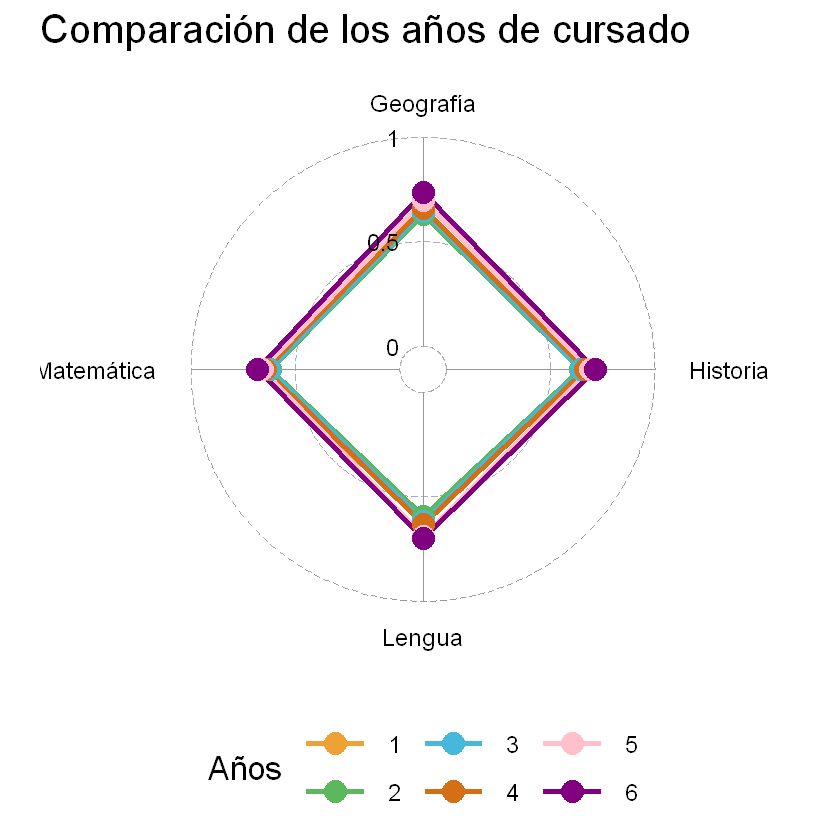

In [180]:


# Función para reescalar los datos al rango [0, 1]
rescale_01 <- function(x) {
  (x - min(x, na.rm = TRUE)) / (max(x, na.rm = TRUE) - min(x, na.rm = TRUE))
}

# Creación del DataFrame `dat`
dat <- data.frame(
  Años = promedios_nivel$Año_cursado, 
  Geografía = rescale_01(promedios_nivel$GEOGRAFIA),
  Historia = rescale_01(promedios_nivel$HISTORIA),
  Lengua = rescale_01(promedios_nivel$LENGUA),
  Matemática = rescale_01(promedios_nivel$MATEMATICA)
)

# Agrupar por "Años" y calcular el promedio escalado
perfil_medio_escalado <- dat %>% group_by(Años) %>% summarise_all(mean, na.rm = TRUE)

# Definir una paleta de colores con seis tonos distintos
lcols <- c("#EEA236", "#5CB85C", "#46B8DA", "#D46F15", "#FFC0CB", "#800080")

# Crear el gráfico radar con los seis colores diferentes
ggradar(perfil_medio_escalado, grid.min = 0, grid.max = 1,
        values.radar = c(0, 0.5, 1),
        background.circle.colour = "white",
        axis.line.colour = "gray60",
        gridline.min.colour = "gray60",
        gridline.mid.colour = "gray60",
        gridline.max.colour = "gray60",
        group.colours = lcols,
        legend.title = "Años",
        legend.position = "bottom") +
  labs(title = "Comparación de los años de cursado")


In [181]:


primer_año<- SEC_NOTAS_MODIF %>%
  filter(Año_cursado == 1 & asignatura %in% c("HISTORIA", "MATEMATICA", "LENGUA", "GEOGRAFIA"))

# Identificar los documentos de los alumnos que realizan las 4 asignaturas
documentos_completos_primero <- primer_año %>%
  group_by(Documento) %>%
  filter(n_distinct(asignatura) == 4) %>%
  distinct(Documento)

# Filtrar el dataset original para obtener solo los registros de los alumnos que realizan las 4 asignaturas
primer_anio_completo <- primer_año%>%
  filter(Año_cursado == 1 & Documento %in% documentos_completos_primero$Documento & asignatura %in% c("HISTORIA", "MATEMATICA", "LENGUA", "GEOGRAFIA"))

In [182]:
#ANALISIS DE ESCUELAS

promedios_escuelas <- primer_anio_completo %>%
  group_by(CUE, asignatura, EsPrivada) %>%
  summarise(Promedio = mean(Promedio, na.rm = TRUE), .groups = 'drop') %>%
  pivot_wider(names_from = asignatura, values_from = Promedio)



#VECTOR DE MEDIAS
colnames_promedios_nivel=c("CUE","EsPrivada","GEOGRAFIA","HISTORIA","LENGUA","MATEMATICA")

promedios_escuelas$CUE<-as.factor(promedios_escuelas$CUE)
promedios_escuelas$EsPrivada<-as.factor(promedios_escuelas$EsPrivada)
promedios_escuelas$'GEOGRAFIA'<-as.numeric(promedios_escuelas$'GEOGRAFIA')
promedios_escuelas$'HISTORIA'<-as.numeric(promedios_escuelas$'HISTORIA')
promedios_escuelas$'LENGUA'<-as.numeric(promedios_escuelas$'LENGUA')
promedios_escuelas$'MATEMATICA'<-as.numeric(promedios_escuelas$'MATEMATICA')

medias_alumnos_escuelas<- promedios_escuelas %>% group_by(CUE) %>% summarise_all(mean)
medias_alumnos_escuelas

suppressWarnings({
  mahalanobis_distance(data = promedios_escuelas[, c("GEOGRAFIA", "HISTORIA","LENGUA","MATEMATICA")])$is.outlier
})


Warning message:
"There were 38 warnings in `summarise()`.
The first warning was:
i In argument: `EsPrivada = (function (x, ...) ...`.
i In group 1: `CUE = 9000525`.
Caused by warning in `mean.default()`:
! argument is not numeric or logical: returning NA
i Run `dplyr::last_dplyr_warnings()` to see the 37 remaining warnings."


CUE     EsPrivada GEOGRAFIA HISTORIA LENGUA   MATEMATICA
1  9000525 NA        6.778000  7.311333 6.843333 6.866667  
2  9000615 NA        8.807368  8.770526 8.421579 8.720000  
3  9001017 NA        6.881429  7.429286 6.832857 6.475714  
4  9001020 NA        8.340667  7.859333 7.820889 7.792667  
5  9001026 NA        8.670000  8.000000 8.670000 7.000000  
6  9001263 NA        7.054054  7.469189 7.009730 6.873514  
7  9003342 NA        7.015783  7.526386 6.979518 7.016024  
8  9003735 NA        7.690769  8.628846 7.435769 7.115769  
9  9003744 NA        6.968438  6.855000 7.010000 6.719062  
10 9003750 NA        7.481111  7.297222 6.221667 6.777778  
11 9003762 NA        7.330000  4.670000 7.670000 6.330000  
12 9003777 NA        7.797879  7.585758 8.151212 7.414848  
13 9003780 NA        7.792813  8.406250 7.176875 7.260313  
14 9003825 NA        6.833455  7.017727 6.926909 6.458482  
15 9003834 NA        7.062812  6.979063 6.634375 6.510625  
16 9004434 NA        7.370000  7.194783 6.573043 6.927174  
17 9004518 NA        8.210286  7.981714 8.457143 8.714571  
18 9006942 NA        7.311702  7.701702 7.270000 7.439362  
19 9006945 NA        7.703333  6.368889 6.813333 7.183333  
20 9006957 NA        7.273929  7.048214 6.332857 6.523929  
21 9007551 NA        8.061481  8.197407 7.333704 8.024444  
22 9007707 NA        6.516552  6.655172 6.390345 6.459655  
23 9007713 NA        7.582500  8.582500 7.082500 7.332500  
24 9007716 NA        7.417500  7.791250 7.790000 7.416250  
25 9007758 NA        6.959375  6.541250 7.126250 7.563750  
26 9007761 NA        6.421333  6.888000 7.044000 8.533333  
27 9007887 NA        6.842632  7.034737 7.034737 6.913158  
28 9007923 NA        6.850345  7.057931 7.138276 6.966207  
29 9007926 NA        7.063810  6.317143 6.744762 7.017143  
30 9007965 NA        6.720556  7.555000 6.647778 6.685000  
31 9007980 NA        5.471667  5.415833 5.388333 5.944167  
32 9007983 NA        7.125909  7.479545 7.217121 6.766515  
33 9008421 NA        5.999375  6.375000 6.228125 6.311875  
34 9008502 NA        7.220000  6.443333 6.890000 8.110000  
35 9009048 NA        6.624375  6.688125 6.686875 6.770625  
36 9009150 NA        7.479455  7.266909 6.842000 6.697455  
37 9010053 NA        6.937500  6.676563 7.145937 6.875000  
38 9010146 NA        7.402069  7.252414 7.219310 6.988276

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[37] FALSE FALSE

In [183]:

etiqueta<-promedios_escuelas[,3:6]
cov1=cov.rob(etiqueta,method="mcd",nsamp="exact") #CalculaMCD
cov2=cov.rob(etiqueta,method="mve",nsamp="best") #CalculaMVE
cov3=cov.rob(etiqueta,method="classical",nsamp="best")
#Calculalamatrizdecovarianzasclásica
center1=apply(etiqueta,2,mean) #Calculaelvectordemedias
center2=apply(etiqueta,2,median) #Calculaelvectordemedianas
dcov1=0;dcov2=0;dcov3=0
for(i in 1:nrow(etiqueta)){
dcov1[i]=mahalanobis(etiqueta[i,],cov1$center,cov1$cov,inverted=FALSE)
dcov2[i]=mahalanobis(etiqueta[i,],cov2$center,cov2$cov,inverted=FALSE)
dcov3[i]=mahalanobis(etiqueta[i,],cov3$center,cov3$cov,inverted=FALSE)
}
#Calcula distancias de Mahalanobis utilizando las distintas estimaciones de la matriz de covarianzas
round(cbind(dcov1,dcov2,dcov3),2)

dcov1 dcov2 dcov3
 [1,]  1.53  1.64  1.10
 [2,] 18.38 35.67  7.53
 [3,]  2.61  2.97  1.92
 [4,]  6.68 16.86  3.06
 [5,] 47.13 73.36 10.99
 [6,]  0.47  0.36  0.66
 [7,]  1.02  1.02  0.72
 [8,]  5.58  5.77  3.79
 [9,]  1.40  1.91  0.60
[10,]  6.95  8.16  7.23
[11,] 62.38 93.77 19.81
[12,]  9.36 17.55  3.57
[13,]  3.75  4.37  2.83
[14,]  2.84  3.50  1.56
[15,]  2.11  2.10  1.17
[16,]  2.22  3.11  2.49
[17,] 21.21 35.23  7.23
[18,]  2.48  3.37  0.69
[19,]  8.98 16.52  6.96
[20,]  4.74  4.81  4.17
[21,]  9.50 16.33  4.15
[22,]  2.36  2.82  1.40
[23,]  6.12  7.20  3.59
[24,]  3.85  5.80  2.61
[25,]  9.34 10.71  2.55
[26,] 66.36 73.33 14.52
[27,]  1.02  0.85  0.85
[28,]  1.46  1.34  1.23
[29,]  3.83  5.51  1.96
[30,]  3.01  4.14  2.14
[31,] 18.13 24.75  8.12
[32,]  1.93  2.44  1.34
[33,]  6.45  8.85  3.66
[34,] 26.58 34.53  7.84
[35,]  1.85  1.65  0.90
[36,]  3.24  3.94  1.78
[37,]  2.22  3.05  1.05
[38,]  1.09  2.61  0.22

In [184]:
#Combina las tres distancias
distancias.outliers=lofactor(etiqueta,k=4)
#observaciones
outliers=order(distancias.outliers,decreasing=T)[1:4]
#Arroja las observaciones correspondientes a las cuatro distancias mayores
print(outliers)
promedios_escuelas[outliers,]
medias_alumnos_escuelas

[1] 11 31 26 33


CUE     EsPrivada GEOGRAFIA HISTORIA LENGUA   MATEMATICA
1 9003762 N         7.330000  4.670000 7.670000 6.330000  
2 9007980 N         5.471667  5.415833 5.388333 5.944167  
3 9007761 N         6.421333  6.888000 7.044000 8.533333  
4 9008421 N         5.999375  6.375000 6.228125 6.311875

CUE     EsPrivada GEOGRAFIA HISTORIA LENGUA   MATEMATICA
1  9000525 NA        6.778000  7.311333 6.843333 6.866667  
2  9000615 NA        8.807368  8.770526 8.421579 8.720000  
3  9001017 NA        6.881429  7.429286 6.832857 6.475714  
4  9001020 NA        8.340667  7.859333 7.820889 7.792667  
5  9001026 NA        8.670000  8.000000 8.670000 7.000000  
6  9001263 NA        7.054054  7.469189 7.009730 6.873514  
7  9003342 NA        7.015783  7.526386 6.979518 7.016024  
8  9003735 NA        7.690769  8.628846 7.435769 7.115769  
9  9003744 NA        6.968438  6.855000 7.010000 6.719062  
10 9003750 NA        7.481111  7.297222 6.221667 6.777778  
11 9003762 NA        7.330000  4.670000 7.670000 6.330000  
12 9003777 NA        7.797879  7.585758 8.151212 7.414848  
13 9003780 NA        7.792813  8.406250 7.176875 7.260313  
14 9003825 NA        6.833455  7.017727 6.926909 6.458482  
15 9003834 NA        7.062812  6.979063 6.634375 6.510625  
16 9004434 NA        7.370000  7.194783 6.573043 6.927174  
17 9004518 NA        8.210286  7.981714 8.457143 8.714571  
18 9006942 NA        7.311702  7.701702 7.270000 7.439362  
19 9006945 NA        7.703333  6.368889 6.813333 7.183333  
20 9006957 NA        7.273929  7.048214 6.332857 6.523929  
21 9007551 NA        8.061481  8.197407 7.333704 8.024444  
22 9007707 NA        6.516552  6.655172 6.390345 6.459655  
23 9007713 NA        7.582500  8.582500 7.082500 7.332500  
24 9007716 NA        7.417500  7.791250 7.790000 7.416250  
25 9007758 NA        6.959375  6.541250 7.126250 7.563750  
26 9007761 NA        6.421333  6.888000 7.044000 8.533333  
27 9007887 NA        6.842632  7.034737 7.034737 6.913158  
28 9007923 NA        6.850345  7.057931 7.138276 6.966207  
29 9007926 NA        7.063810  6.317143 6.744762 7.017143  
30 9007965 NA        6.720556  7.555000 6.647778 6.685000  
31 9007980 NA        5.471667  5.415833 5.388333 5.944167  
32 9007983 NA        7.125909  7.479545 7.217121 6.766515  
33 9008421 NA        5.999375  6.375000 6.228125 6.311875  
34 9008502 NA        7.220000  6.443333 6.890000 8.110000  
35 9009048 NA        6.624375  6.688125 6.686875 6.770625  
36 9009150 NA        7.479455  7.266909 6.842000 6.697455  
37 9010053 NA        6.937500  6.676563 7.145937 6.875000  
38 9010146 NA        7.402069  7.252414 7.219310 6.988276

In [185]:
#H0: existe una diferencia entre los promedios de las escuelas publicas y privadas en las asignaturas troncales.
#H1: NO existe una diferencia entre los promedios de las escuelas publicas y privadas  en las asignaturas troncales.


mod1<-manova(cbind(GEOGRAFIA,HISTORIA,LENGUA,MATEMATICA)~EsPrivada,data=promedios_escuelas)
summary(mod1) 

          Df  Pillai approx F num Df den Df  Pr(>F)  
EsPrivada  1 0.27523   3.1328      4     33 0.02735 *
Residuals 36                                         
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [186]:
summary.aov(mod1)

 Response GEOGRAFIA :
            Df  Sum Sq Mean Sq F value   Pr(>F)   
EsPrivada    1  2.8684 2.86842  7.6222 0.009015 **
Residuals   36 13.5477 0.37632                    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Response HISTORIA :
            Df  Sum Sq Mean Sq F value  Pr(>F)  
EsPrivada    1  3.1434 3.14339  5.0169 0.03137 *
Residuals   36 22.5563 0.62656                  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Response LENGUA :
            Df  Sum Sq Mean Sq F value  Pr(>F)  
EsPrivada    1  1.3185 1.31854  3.3117 0.07711 .
Residuals   36 14.3334 0.39815                  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Response MATEMATICA :
            Df  Sum Sq Mean Sq F value   Pr(>F)   
EsPrivada    1  3.3322  3.3322  9.6425 0.003695 **
Residuals   36 12.4407  0.3456                    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [187]:
#Supuestos de normalidad

promedios_escuelas %>% group_by(EsPrivada) %>%  shapiro_test(GEOGRAFIA,HISTORIA,LENGUA,MATEMATICA)

EsPrivada variable   statistic p          
1 N         GEOGRAFIA  0.9333675 0.054184130
2 N         HISTORIA   0.9405513 0.085467388
3 N         LENGUA     0.9291995 0.041700906
4 N         MATEMATICA 0.8766573 0.001979536
5 S         GEOGRAFIA  0.9586854 0.807379833
6 S         HISTORIA   0.9141367 0.425257899
7 S         LENGUA     0.9020445 0.343541973
8 S         MATEMATICA 0.9377533 0.618574450

In [188]:
library(psych)
#Supuestos de normalidad multivariante
mardia2(promedios_escuelas[, c("GEOGRAFIA", "HISTORIA", "LENGUA", "MATEMATICA")])

Test de Normalidad Multivariada 
 Ho: Los datos siguen una Distribución Normal Multivariada 
---------------------------------------------------------------- 
Prueba de Mardia - Asimetría 
 Asimetría Multivariada = 9.458857 
 Valor de TAM = 59.90609 
 Valor p= 7.364035e-06 
---------------------------------------------------------------- 
Prueba de Mardia - Curtosis 
 Curtosis Multivariado = 33.75602 
 Valor de TKM = 18.83769 
 Valor p= 1.42327e-05 


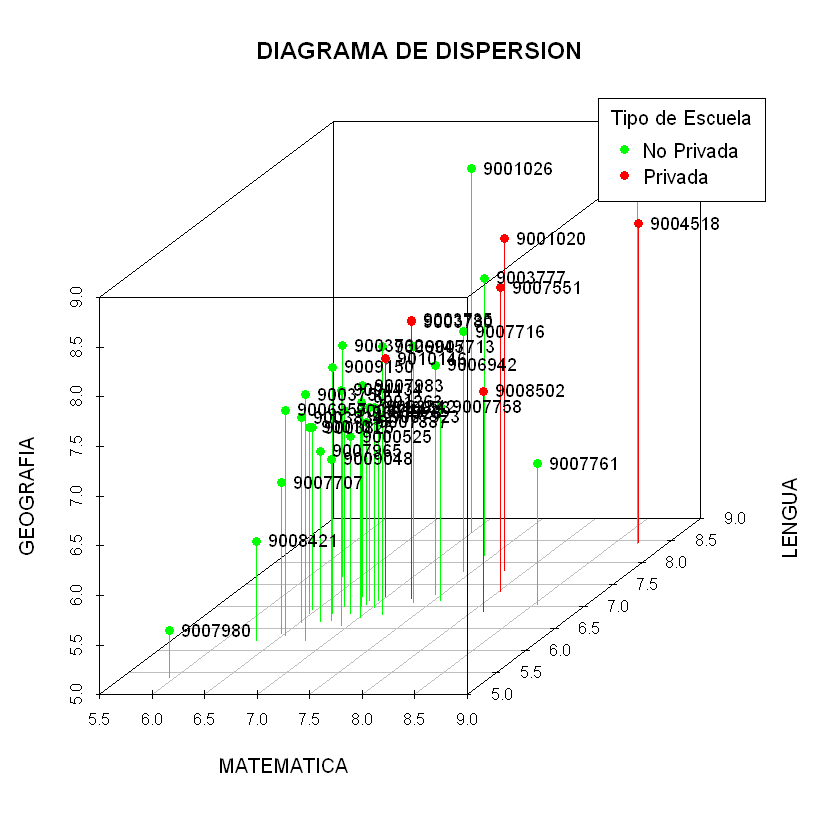

In [189]:


  colors <- c("green", "red")
  colors <- colors[as.factor(promedios_escuelas$EsPrivada)]
  with(promedios_escuelas, {
    s3d <- scatterplot3d(
      x = MATEMATICA,
      y = LENGUA,
      z = GEOGRAFIA,
      color = colors,
      pch = 16,
      type = "h",
      main = "DIAGRAMA DE DISPERSION",
      xlab = "MATEMATICA",
      ylab = "LENGUA",
      zlab = "GEOGRAFIA")

    # convert 3-D coords to 2D projection
    s3d.coords <- s3d$xyz.convert(MATEMATICA, LENGUA, GEOGRAFIA)

    # plot text with 50% shrink and place to right of points
    text(s3d.coords$x,
        s3d.coords$y,
        labels = promedios_escuelas$CUE,
        cex = .9,
        pos = 4)

      # Agregar la leyenda
  legend("topright", 
         legend = c("No Privada", "Privada"), 
         col = c("green", "red"), 
         pch = 16,
         title = "Tipo de Escuela")
  
  })

In [190]:


primer_año<- SEC_NOTAS_MODIF %>%
  filter(Año_cursado == 1 & asignatura %in% c("HISTORIA", "MATEMATICA", "LENGUA", "GEOGRAFIA"))

# Identificar los documentos de los alumnos que realizan las 4 asignaturas
documentos_completos_primero <- primer_año %>%
  group_by(Documento) %>%
  filter(n_distinct(asignatura) == 4) %>%
  distinct(Documento)

# Filtrar el dataset original para obtener solo los registros de los alumnos que realizan las 4 asignaturas
primer_anio_completo <- primer_año%>%
  filter(Año_cursado == 1 & Documento %in% documentos_completos_primero$Documento & asignatura %in% c("HISTORIA", "MATEMATICA", "LENGUA", "GEOGRAFIA"))
primer_anio_completo

CUE     Departamento EsPrivada turno      Documento asignatura IdAlumno
1    9001026 URUGUAY      N         NOCHE      43683111  GEOGRAFIA    15389 
2    9001026 URUGUAY      N         NOCHE      43683111  HISTORIA     15389 
3    9001026 URUGUAY      N         NOCHE      43683111  LENGUA       15389 
4    9001026 URUGUAY      N         NOCHE      43683111  MATEMATICA   15389 
5    9003750 URUGUAY      N         NOCHE      45165959  GEOGRAFIA  1142450 
6    9003750 URUGUAY      N         NOCHE      45165959  HISTORIA   1142450 
7    9003750 URUGUAY      N         NOCHE      45165959  LENGUA     1142450 
8    9003750 URUGUAY      N         NOCHE      45165959  MATEMATICA 1142450 
9    9003750 URUGUAY      N         NOCHE      45551380  GEOGRAFIA  1142455 
10   9003750 URUGUAY      N         NOCHE      45551380  HISTORIA   1142455 
11   9003750 URUGUAY      N         NOCHE      45551380  LENGUA     1142455 
12   9003750 URUGUAY      N         NOCHE      45551380  MATEMATICA 1142455 
13   9003762 URUGUAY      N         NOCHE      45846716  GEOGRAFIA   661047 
14   9003762 URUGUAY      N         NOCHE      45846716  HISTORIA    661047 
15   9003762 URUGUAY      N         NOCHE      45846716  LENGUA      661047 
16   9003762 URUGUAY      N         NOCHE      45846716  MATEMATICA  661047 
17   9007980 URUGUAY      N         MAÑANA     46858227  GEOGRAFIA     5319 
18   9007980 URUGUAY      N         MAÑANA     46858227  HISTORIA      5319 
19   9007980 URUGUAY      N         MAÑANA     46858227  LENGUA        5319 
20   9007980 URUGUAY      N         MAÑANA     46858227  MATEMATICA    5319 
21   9007758 URUGUAY      N         TARDE      46859519  GEOGRAFIA   800186 
22   9007758 URUGUAY      N         TARDE      46859519  HISTORIA    800186 
23   9007758 URUGUAY      N         TARDE      46859519  LENGUA      800186 
24   9007758 URUGUAY      N         TARDE      46859519  MATEMATICA  800186 
25   9008502 URUGUAY      S         NOCHE      46859567  GEOGRAFIA   712530 
26   9008502 URUGUAY      S         NOCHE      46859567  HISTORIA    712530 
27   9008502 URUGUAY      S         NOCHE      46859567  LENGUA      712530 
28   9008502 URUGUAY      S         NOCHE      46859567  MATEMATICA  712530 
29   9003750 URUGUAY      N         NOCHE      46924574  GEOGRAFIA   254038 
30   9003750 URUGUAY      N         NOCHE      46924574  HISTORIA    254038 
...  ...     ...          ...       ...        ...       ...        ...     
4285 9003342 URUGUAY      N         MAÑANA     52257562  LENGUA      562240 
4286 9003342 URUGUAY      N         MAÑANA     52257562  MATEMATICA  562240 
4287 9010146 URUGUAY      S         MAÑANA     53811354  GEOGRAFIA   492655 
4288 9010146 URUGUAY      S         MAÑANA     53811354  HISTORIA    492655 
4289 9010146 URUGUAY      S         MAÑANA     53811354  LENGUA      492655 
4290 9010146 URUGUAY      S         MAÑANA     53811354  MATEMATICA  492655 
4291 9003834 URUGUAY      N         VESPERTINO 54004185  GEOGRAFIA   529575 
4292 9003834 URUGUAY      N         VESPERTINO 54004185  HISTORIA    529575 
4293 9003834 URUGUAY      N         VESPERTINO 54004185  LENGUA      529575 
4294 9003834 URUGUAY      N         VESPERTINO 54004185  MATEMATICA  529575 
4295 9003735 URUGUAY      S         MAÑANA     54022392  GEOGRAFIA  1131110 
4296 9003735 URUGUAY      S         MAÑANA     54022392  HISTORIA   1131110 
4297 9003735 URUGUAY      S         MAÑANA     54022392  LENGUA     1131110 
4298 9003735 URUGUAY      S         MAÑANA     54022392  MATEMATICA 1131110 
4299 9010146 URUGUAY      S         MAÑANA     54153298  GEOGRAFIA  1045309 
4300 9010146 URUGUAY      S         MAÑANA     54153298  HISTORIA   1045309 
4301 9010146 URUGUAY      S         MAÑANA     54153298  LENGUA     1045309 
4302 9010146 URUGUAY      S         MAÑANA     54153298  MATEMATICA 1045309 
4303 9007707 URUGUAY      N         TARDE      59383472  GEOGRAFIA  1121751 
4304 9007707 URUGUAY      N         TARDE      59383472  HISTORIA   1121751 
4

In [191]:
#TURNO

promedios_alumnos_turno <- primer_anio_completo %>%
  group_by(Documento, asignatura,turno) %>%
  summarise(Promedio = mean(Promedio, na.rm = TRUE), .groups = 'drop') %>%
  pivot_wider(names_from = asignatura, values_from = Promedio)
promedios_alumnos_turno

promedios_alumnos_sin_documento <- promedios_alumnos_turno %>%
  select(-Documento)
promedios_alumnos_sin_documento 

# Crear dos datasets separados por turno
promedios_alumnos_manana <- promedios_alumnos_sin_documento %>%
  filter(turno == "MAÑANA")
promedios_alumnos_manana

promedios_alumnos_tarde <- promedios_alumnos_sin_documento %>%
  filter(turno == "TARDE") 

promedios_alumnos_tarde

Documento turno      GEOGRAFIA HISTORIA LENGUA MATEMATICA
1    43683111  NOCHE       8.67      8.00     8.67   7.00     
2    45165959  NOCHE       8.00      8.00     7.67   8.33     
3    45551380  NOCHE       7.67      6.67     6.00   6.33     
4    45846716  NOCHE       7.33      4.67     7.67   6.33     
5    46858227  MAÑANA      3.00      3.00     3.00   4.00     
6    46859519  TARDE       8.33      5.33     8.00   9.00     
7    46859567  NOCHE       7.00      4.33     6.33   8.33     
8    46924574  NOCHE       5.00      4.67     4.33   5.00     
9    47705579  NOCHE       8.00      7.67     6.33   8.67     
10   47782097  NOCHE       9.33      9.33     7.67   8.00     
11   47782104  TARDE       6.00      5.33     6.67   6.67     
12   47924007  TARDE       4.67      5.00     4.67   5.00     
13   48139338  TARDE       5.00      5.00     5.00   3.00     
14   48199145  TARDE       7.33      6.67     9.00   6.67     
15   48200122  VESPERTINO  9.33      9.00     8.00   7.67     
16   48261990  TARDE       3.00      4.67     3.00   3.33     
17   48263772  TARDE       7.67      7.00     8.67   8.00     
18   48333791  TARDE       6.33      7.33     6.00   6.00     
19   48335094  VESPERTINO  6.67      6.00     6.33   7.33     
20   48335097  TARDE       4.67      4.67     5.00   3.67     
21   48335203  TARDE       5.67      5.00     6.00   6.67     
22   48335253  TARDE       6.67      6.00     7.00   7.00     
23   48379671  NOCHE       5.33      5.67     6.67   8.00     
24   48459252  MAÑANA      7.33      7.33     7.33   7.00     
25   48475177  TARDE       5.67      5.33     6.00   5.33     
26   48549953  TARDE       4.67      6.00     6.67   4.33     
27   48619888  MAÑANA      5.33      5.67     6.00   5.67     
28   48619924  TARDE       7.33      5.33     7.67   6.33     
29   48822486  TARDE       8.67      9.00     8.00   8.00     
30   48822509  VESPERTINO 10.00     10.00    10.00  10.00     
...  ...       ...        ...       ...      ...    ...       
1044 51114532  COMPLETO   7.00      7.00     6.00    6.00     
1045 51114875  TARDE      9.33      8.00     8.00    8.33     
1046 51114876  MAÑANA     9.33      9.00     9.00    7.67     
1047 51114878  MAÑANA     9.33      8.67     8.33    8.67     
1048 51114879  MAÑANA     8.33      7.67     7.67    8.33     
1049 51116586  MAÑANA     6.00      6.33     6.00    6.00     
1050 51116587  MAÑANA     5.67      5.33     6.00    5.00     
1051 51116633  MAÑANA     7.67      7.00     8.33    8.67     
1052 51117375  TARDE      7.33      7.00     5.33    7.00     
1053 51117377  TARDE      6.00      5.33     6.00    6.33     
1054 51117380  MAÑANA     6.33      6.00     6.00    6.33     
1055 51117383  MAÑANA     4.33      4.33     4.33    4.00     
1056 51117384  MAÑANA     5.33      6.00     5.33    6.33     
1057 51117402  MAÑANA     6.00      7.33     6.33   10.00     
1058 51117410  TARDE      7.67      8.00     6.33    9.00     
1059 51120251  MAÑANA     9.00      9.67     8.33    9.33     
1060 51137516  DIURNO     8.00      8.33     7.00    9.00     
1061 51149474  MAÑANA     5.67      5.67     5.33    6.00     
1062 51165392  TARDE      6.00      9.00     6.67    6.67     
1063 51217545  COMPLETO   8.67      9.00     8.00    8.33     
1064 51368410  MAÑANA     9.00      8.67     9.33    9.33     
1065 51368423  TARDE      7.67      7.67     8.00    7.67     
1066 52257562  MAÑANA     7.33      7.67     8.00    7.33     
1067 53811354  MAÑANA     5.33      4.33     6.00    4.67     
1068 54004185  VESPERTINO 7.00      7.67     6.00    6.00     
1069 54022392  MAÑANA     9.33      9.67     8.67    9.00     
1070 54153298  MAÑANA     5.67      6.33     7.00    6.00     
1071 59383472  TARDE      5.33      5.33     5.33    5.00     
1072 96058680  TARDE      5.67      5.67     5.67    5.33     
1073 96120564  MAÑANA     9.33      9.33     8.67    9.00

turno      GEOGRAFIA HISTORIA LENGUA MATEMATICA
1    NOCHE       8.67      8.00     8.67   7.00     
2    NOCHE       8.00      8.00     7.67   8.33     
3    NOCHE       7.67      6.67     6.00   6.33     
4    NOCHE       7.33      4.67     7.67   6.33     
5    MAÑANA      3.00      3.00     3.00   4.00     
6    TARDE       8.33      5.33     8.00   9.00     
7    NOCHE       7.00      4.33     6.33   8.33     
8    NOCHE       5.00      4.67     4.33   5.00     
9    NOCHE       8.00      7.67     6.33   8.67     
10   NOCHE       9.33      9.33     7.67   8.00     
11   TARDE       6.00      5.33     6.67   6.67     
12   TARDE       4.67      5.00     4.67   5.00     
13   TARDE       5.00      5.00     5.00   3.00     
14   TARDE       7.33      6.67     9.00   6.67     
15   VESPERTINO  9.33      9.00     8.00   7.67     
16   TARDE       3.00      4.67     3.00   3.33     
17   TARDE       7.67      7.00     8.67   8.00     
18   TARDE       6.33      7.33     6.00   6.00     
19   VESPERTINO  6.67      6.00     6.33   7.33     
20   TARDE       4.67      4.67     5.00   3.67     
21   TARDE       5.67      5.00     6.00   6.67     
22   TARDE       6.67      6.00     7.00   7.00     
23   NOCHE       5.33      5.67     6.67   8.00     
24   MAÑANA      7.33      7.33     7.33   7.00     
25   TARDE       5.67      5.33     6.00   5.33     
26   TARDE       4.67      6.00     6.67   4.33     
27   MAÑANA      5.33      5.67     6.00   5.67     
28   TARDE       7.33      5.33     7.67   6.33     
29   TARDE       8.67      9.00     8.00   8.00     
30   VESPERTINO 10.00     10.00    10.00  10.00     
...  ...        ...       ...      ...    ...       
1044 COMPLETO   7.00      7.00     6.00    6.00     
1045 TARDE      9.33      8.00     8.00    8.33     
1046 MAÑANA     9.33      9.00     9.00    7.67     
1047 MAÑANA     9.33      8.67     8.33    8.67     
1048 MAÑANA     8.33      7.67     7.67    8.33     
1049 MAÑANA     6.00      6.33     6.00    6.00     
1050 MAÑANA     5.67      5.33     6.00    5.00     
1051 MAÑANA     7.67      7.00     8.33    8.67     
1052 TARDE      7.33      7.00     5.33    7.00     
1053 TARDE      6.00      5.33     6.00    6.33     
1054 MAÑANA     6.33      6.00     6.00    6.33     
1055 MAÑANA     4.33      4.33     4.33    4.00     
1056 MAÑANA     5.33      6.00     5.33    6.33     
1057 MAÑANA     6.00      7.33     6.33   10.00     
1058 TARDE      7.67      8.00     6.33    9.00     
1059 MAÑANA     9.00      9.67     8.33    9.33     
1060 DIURNO     8.00      8.33     7.00    9.00     
1061 MAÑANA     5.67      5.67     5.33    6.00     
1062 TARDE      6.00      9.00     6.67    6.67     
1063 COMPLETO   8.67      9.00     8.00    8.33     
1064 MAÑANA     9.00      8.67     9.33    9.33     
1065 TARDE      7.67      7.67     8.00    7.67     
1066 MAÑANA     7.33      7.67     8.00    7.33     
1067 MAÑANA     5.33      4.33     6.00    4.67     
1068 VESPERTINO 7.00      7.67     6.00    6.00     
1069 MAÑANA     9.33      9.67     8.67    9.00     
1070 MAÑANA     5.67      6.33     7.00    6.00     
1071 TARDE      5.33      5.33     5.33    5.00     
1072 TARDE      5.67      5.67     5.67    5.33     
1073 MAÑANA     9.33      9.33     8.67    9.00

turno  GEOGRAFIA HISTORIA LENGUA MATEMATICA
1   MAÑANA 3.00      3.00     3.00   4.00      
2   MAÑANA 7.33      7.33     7.33   7.00      
3   MAÑANA 5.33      5.67     6.00   5.67      
4   MAÑANA 4.67      4.33     4.33   3.67      
5   MAÑANA 3.33      3.33     3.00   3.67      
6   MAÑANA 6.33      5.00     5.33   5.67      
7   MAÑANA 6.00      6.67     6.00   5.33      
8   MAÑANA 8.33      7.67     8.33   7.67      
9   MAÑANA 6.00      8.00     6.00   5.00      
10  MAÑANA 9.00      9.00     8.00   7.33      
11  MAÑANA 9.33      9.67     8.67   9.00      
12  MAÑANA 9.33      9.67     8.67   8.67      
13  MAÑANA 7.33      8.33     6.33   6.33      
14  MAÑANA 9.33      9.67     8.67   8.67      
15  MAÑANA 8.00      8.67     7.33   6.67      
16  MAÑANA 8.00      9.33     8.00   6.67      
17  MAÑANA 9.33      9.67     8.67   9.00      
18  MAÑANA 8.33      9.33     8.33   8.33      
19  MAÑANA 9.33      9.67     8.67   8.67      
20  MAÑANA 5.33      7.00     6.00   5.67      
21  MAÑANA 7.67      9.33     7.33   7.00      
22  MAÑANA 7.33      9.00     7.33   6.00      
23  MAÑANA 6.33      7.67     6.33   7.00      
24  MAÑANA 6.33      7.67     7.00   6.33      
25  MAÑANA 6.67      6.67     6.33   5.33      
26  MAÑANA 6.33      7.00     6.67   6.00      
27  MAÑANA 6.00      6.33     6.00   6.00      
28  MAÑANA 4.67      4.67     4.67   5.33      
29  MAÑANA 6.00      5.67     6.00   5.67      
30  MAÑANA 4.67      4.33     4.33   4.67      
... ...    ...       ...      ...    ...       
450 MAÑANA  5.33      5.00    6.00    4.33     
451 MAÑANA  8.00      8.67    8.33    6.67     
452 MAÑANA  7.00      5.00    5.33    5.67     
453 MAÑANA  6.00      6.00    6.00    6.33     
454 MAÑANA  6.00      6.00    6.00    4.33     
455 MAÑANA  6.67      6.67    6.67    6.67     
456 MAÑANA  5.33      6.00    6.33    4.33     
457 MAÑANA  6.67      6.33    7.33    6.67     
458 MAÑANA  6.67      7.00    8.00    5.00     
459 MAÑANA 10.00     10.00    9.33    9.33     
460 MAÑANA  9.00      7.67    6.67    8.67     
461 MAÑANA  9.00      9.33    7.33    7.00     
462 MAÑANA  9.33      9.00    9.00    7.67     
463 MAÑANA  9.33      8.67    8.33    8.67     
464 MAÑANA  8.33      7.67    7.67    8.33     
465 MAÑANA  6.00      6.33    6.00    6.00     
466 MAÑANA  5.67      5.33    6.00    5.00     
467 MAÑANA  7.67      7.00    8.33    8.67     
468 MAÑANA  6.33      6.00    6.00    6.33     
469 MAÑANA  4.33      4.33    4.33    4.00     
470 MAÑANA  5.33      6.00    5.33    6.33     
471 MAÑANA  6.00      7.33    6.33   10.00     
472 MAÑANA  9.00      9.67    8.33    9.33     
473 MAÑANA  5.67      5.67    5.33    6.00     
474 MAÑANA  9.00      8.67    9.33    9.33     
475 MAÑANA  7.33      7.67    8.00    7.33     
476 MAÑANA  5.33      4.33    6.00    4.67     
477 MAÑANA  9.33      9.67    8.67    9.00     
478 MAÑANA  5.67      6.33    7.00    6.00     
479 MAÑANA  9.33      9.33    8.67    9.00

turno GEOGRAFIA HISTORIA LENGUA MATEMATICA
1   TARDE 8.33      5.33     8.00   9.00      
2   TARDE 6.00      5.33     6.67   6.67      
3   TARDE 4.67      5.00     4.67   5.00      
4   TARDE 5.00      5.00     5.00   3.00      
5   TARDE 7.33      6.67     9.00   6.67      
6   TARDE 3.00      4.67     3.00   3.33      
7   TARDE 7.67      7.00     8.67   8.00      
8   TARDE 6.33      7.33     6.00   6.00      
9   TARDE 4.67      4.67     5.00   3.67      
10  TARDE 5.67      5.00     6.00   6.67      
11  TARDE 6.67      6.00     7.00   7.00      
12  TARDE 5.67      5.33     6.00   5.33      
13  TARDE 4.67      6.00     6.67   4.33      
14  TARDE 7.33      5.33     7.67   6.33      
15  TARDE 8.67      9.00     8.00   8.00      
16  TARDE 6.00      5.33     5.67   4.00      
17  TARDE 5.33      5.67     5.00   3.67      
18  TARDE 8.67      7.67     7.67   9.33      
19  TARDE 8.00      8.33     8.33   7.00      
20  TARDE 8.00      7.67     7.33   8.33      
21  TARDE 7.00      6.67     6.00   6.67      
22  TARDE 8.33      9.00     8.00   9.00      
23  TARDE 6.00      7.33     6.33   5.67      
24  TARDE 5.33      6.00     5.33   5.67      
25  TARDE 6.00      6.00     6.33   6.00      
26  TARDE 6.00      6.67     6.00   6.00      
27  TARDE 4.33      6.00     4.00   4.33      
28  TARDE 4.33      4.67     4.33   4.33      
29  TARDE 5.33      5.67     5.33   3.33      
30  TARDE 5.67      6.00     5.00   8.33      
... ...   ...       ...      ...    ...       
414 TARDE  8.67      8.33    8.00   9.00      
415 TARDE  9.33      9.67    9.67   8.33      
416 TARDE  8.00      7.67    7.00   6.33      
417 TARDE 10.00     10.00    9.67   9.33      
418 TARDE  7.00      7.33    6.00   6.67      
419 TARDE  9.33      9.00    9.00   9.00      
420 TARDE  8.67      9.00    9.00   8.00      
421 TARDE  6.33      6.33    5.67   6.33      
422 TARDE  8.00      9.33    8.67   6.67      
423 TARDE  9.33      9.33    8.67   9.33      
424 TARDE  7.67      7.33    7.67   7.67      
425 TARDE  7.67      7.00    7.33   6.67      
426 TARDE  6.33      8.00    6.00   6.33      
427 TARDE  4.67      6.00    6.33   5.33      
428 TARDE  6.67      6.33    6.00   8.67      
429 TARDE  6.00      4.00    6.33   6.00      
430 TARDE  5.00      5.00    5.00   4.67      
431 TARDE  7.33      8.00    6.00   6.67      
432 TARDE  7.67      7.67    7.33   7.67      
433 TARDE  4.67      8.33    6.33   6.67      
434 TARDE  9.67      9.67    9.67   9.67      
435 TARDE  7.33      6.67    8.33   8.00      
436 TARDE  9.33      8.00    8.00   8.33      
437 TARDE  7.33      7.00    5.33   7.00      
438 TARDE  6.00      5.33    6.00   6.33      
439 TARDE  7.67      8.00    6.33   9.00      
440 TARDE  6.00      9.00    6.67   6.67      
441 TARDE  7.67      7.67    8.00   7.67      
442 TARDE  5.33      5.33    5.33   5.00      
443 TARDE  5.67      5.67    5.67   5.33

In [192]:
#MANOVA MULTIVARIANTE TURNOS

#H0: existe una diferencia entre los promedios de los diferentes turnos en las asignaturas troncales.
#H1: NO existe una diferencia entre los promedios de los diferentes turnos en las asignaturas troncales.



mod1<-manova(cbind(GEOGRAFIA,HISTORIA,LENGUA,MATEMATICA)~turno,data=promedios_alumnos_sin_documento)
summary(mod1)


            Df  Pillai approx F num Df den Df    Pr(>F)    
turno        5 0.10352   5.6694     20   4268 7.974e-15 ***
Residuals 1067                                             
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [193]:
summary.aov(mod1)

 Response GEOGRAFIA :
              Df  Sum Sq Mean Sq F value   Pr(>F)   
turno          5   36.34  7.2671  3.2457 0.006485 **
Residuals   1067 2388.99  2.2390                    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Response HISTORIA :
              Df  Sum Sq Mean Sq F value    Pr(>F)    
turno          5   71.94 14.3883  6.3852 7.455e-06 ***
Residuals   1067 2404.34  2.2534                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Response LENGUA :
              Df  Sum Sq Mean Sq F value  Pr(>F)  
turno          5   20.45  4.0906  2.0051 0.07545 .
Residuals   1067 2176.84  2.0402                  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Response MATEMATICA :
              Df  Sum Sq Mean Sq F value Pr(>F)
turno          5   16.11  3.2216  1.2321 0.2917
Residuals   1067 2789.83  2.6146               


In [194]:
#Supuestos de normalidad
 
promedios_alumnos_sin_documento %>% group_by(turno) %>%  shapiro_test(GEOGRAFIA,HISTORIA,LENGUA,MATEMATICA)

turno      variable   statistic p           
1  COMPLETO   GEOGRAFIA  0.9650636 3.753382e-01
2  COMPLETO   HISTORIA   0.9305791 4.064558e-02
3  COMPLETO   LENGUA     0.9801934 8.052180e-01
4  COMPLETO   MATEMATICA 0.9515274 1.592434e-01
5  DIURNO     GEOGRAFIA  0.9448680 2.984449e-02
6  DIURNO     HISTORIA   0.9490066 4.294514e-02
7  DIURNO     LENGUA     0.9557725 7.847488e-02
8  DIURNO     MATEMATICA 0.9656788 1.901705e-01
9  MAÑANA     GEOGRAFIA  0.9658532 4.102487e-09
10 MAÑANA     HISTORIA   0.9677637 9.218956e-09
11 MAÑANA     LENGUA     0.9765354 5.749879e-07
12 MAÑANA     MATEMATICA 0.9768355 6.718035e-07
13 NOCHE      GEOGRAFIA  0.9283758 4.660357e-01
14 NOCHE      HISTORIA   0.9143537 3.475457e-01
15 NOCHE      LENGUA     0.9391053 5.725125e-01
16 NOCHE      MATEMATICA 0.8905628 2.022019e-01
17 TARDE      GEOGRAFIA  0.9588161 8.519517e-10
18 TARDE      HISTORIA   0.9657787 1.195507e-08
19 TARDE      LENGUA     0.9683505 3.440429e-08
20 TARDE      MATEMATICA 0.9718184 1.553718e-07
21 VESPERTINO GEOGRAFIA  0.9233380 6.872053e-04
22 VESPERTINO HISTORIA   0.9244626 7.674628e-04
23 VESPERTINO LENGUA     0.9269828 9.854444e-04
24 VESPERTINO MATEMATICA 0.9582488 2.969761e-02

In [195]:
#Supuestos de normalidad multivariante
mardia2(promedios_alumnos_sin_documento[, c("GEOGRAFIA", "HISTORIA", "LENGUA", "MATEMATICA")])

Test de Normalidad Multivariada 
 Ho: Los datos siguen una Distribución Normal Multivariada 
---------------------------------------------------------------- 
Prueba de Mardia - Asimetría 
 Asimetría Multivariada = 0.2586082 
 Valor de TAM = 46.24776 
 Valor p= 0.0007452443 
---------------------------------------------------------------- 
Prueba de Mardia - Curtosis 
 Curtosis Multivariado = 26.78757 
 Valor de TKM = 43.42609 
 Valor p= 4.402779e-11 


In [196]:

datos <- promedios_alumnos_manana[, c("GEOGRAFIA", "HISTORIA", "LENGUA", "MATEMATICA")]

# Llama a la función con el data frame
mardia2(datos)

Test de Normalidad Multivariada 
 Ho: Los datos siguen una Distribución Normal Multivariada 
---------------------------------------------------------------- 
Prueba de Mardia - Asimetría 
 Asimetría Multivariada = 0.7690719 
 Valor de TAM = 61.39757 
 Valor p= 4.31868e-06 
---------------------------------------------------------------- 
Prueba de Mardia - Curtosis 
 Curtosis Multivariado = 27.65473 
 Valor de TKM = 33.32301 
 Valor p= 7.805345e-09 


In [197]:

datos <- promedios_alumnos_tarde[, c("GEOGRAFIA", "HISTORIA", "LENGUA", "MATEMATICA")]

# Llama a la función con el data frame
mardia2(datos)

Test de Normalidad Multivariada 
 Ho: Los datos siguen una Distribución Normal Multivariada 
---------------------------------------------------------------- 
Prueba de Mardia - Asimetría 
 Asimetría Multivariada = 0.7876523 
 Valor de TAM = 58.155 
 Valor p= 1.36904e-05 
---------------------------------------------------------------- 
Prueba de Mardia - Curtosis 
 Curtosis Multivariado = 25.81374 
 Valor de TKM = 7.590215 
 Valor p= 0.005868595 


In [198]:
#H0: existe una diferencia entre los promedios de los turnos mañana y tarde en las asignaturas troncales.
#H1: NO existe una diferencia entre los promedios de los turnos mañana y tarde en las asignaturas troncales.



head(promedios_alumnos_sin_documento)
tarde=filter(promedios_alumnos_sin_documento, turno=="TARDE")[,2:5]
mañana=filter(promedios_alumnos_sin_documento, turno=="MAÑANA")[,2:5]
prom.tarde =apply(tarde, 2, mean)
prom.tarde
prom.mañana= apply(mañana, 2, mean)
prom.mañana

s1 = cov(tarde)
s1
s2 = cov(mañana)
s2

n1 = nrow(tarde)
n1
n2 = nrow(mañana)
n2
p = ncol(tarde)

s = ((n1-1)*s1 + (n2-1)*s2) / (n1 + n2 - 2)
s

d2 = t(prom.tarde-prom.mañana)%*%solve(s)%*%(prom.tarde-prom.mañana)
d2
t2 = d2*((n1*n2) / (n1+n2))
t2
f = (n1+n2-p-1)/((n1+n2-2)*p) * t2
f
alfa = 0.05

qf(p=0.05, df1=5, df2=11, lower.tail=FALSE) #valor de constraste F

pf(f, p, n1+n2-p-1 ,lower.tail = F)  # p valor

turno  GEOGRAFIA HISTORIA LENGUA MATEMATICA
1 NOCHE  8.67      8.00     8.67   7.00      
2 NOCHE  8.00      8.00     7.67   8.33      
3 NOCHE  7.67      6.67     6.00   6.33      
4 NOCHE  7.33      4.67     7.67   6.33      
5 MAÑANA 3.00      3.00     3.00   4.00      
6 TARDE  8.33      5.33     8.00   9.00

GEOGRAFIA   HISTORIA     LENGUA MATEMATICA 
  7.065372   7.228736   7.046637   6.988804

GEOGRAFIA   HISTORIA     LENGUA MATEMATICA 
  7.372839   7.459269   7.181169   7.135303

GEOGRAFIA HISTORIA LENGUA   MATEMATICA
GEOGRAFIA  2.450394  1.942803 1.944361 2.113615  
HISTORIA   1.942803  2.385874 1.819456 1.955297  
LENGUA     1.944361  1.819456 2.117063 1.831860  
MATEMATICA 2.113615  1.955297 1.831860 2.753551

GEOGRAFIA HISTORIA LENGUA   MATEMATICA
GEOGRAFIA  2.291581  1.908692 1.849696 1.839636  
HISTORIA   1.908692  2.327884 1.826665 1.823181  
LENGUA     1.849696  1.826665 2.104052 1.838206  
MATEMATICA 1.839636  1.823181 1.838206 2.569391

[1] 443

[1] 479

GEOGRAFIA HISTORIA LENGUA   MATEMATICA
GEOGRAFIA  2.367880  1.925080 1.895176 1.971265  
HISTORIA   1.925080  2.355744 1.823202 1.886654  
LENGUA     1.895176  1.823202 2.110303 1.835157  
MATEMATICA 1.971265  1.886654 1.835157 2.657868

[,1]      
[1,] 0.06817851

[,1]    
[1,] 15.69119

[,1]    
[1,] 3.910005

[1] 3.203874

[,1]      
[1,] 0.00372746

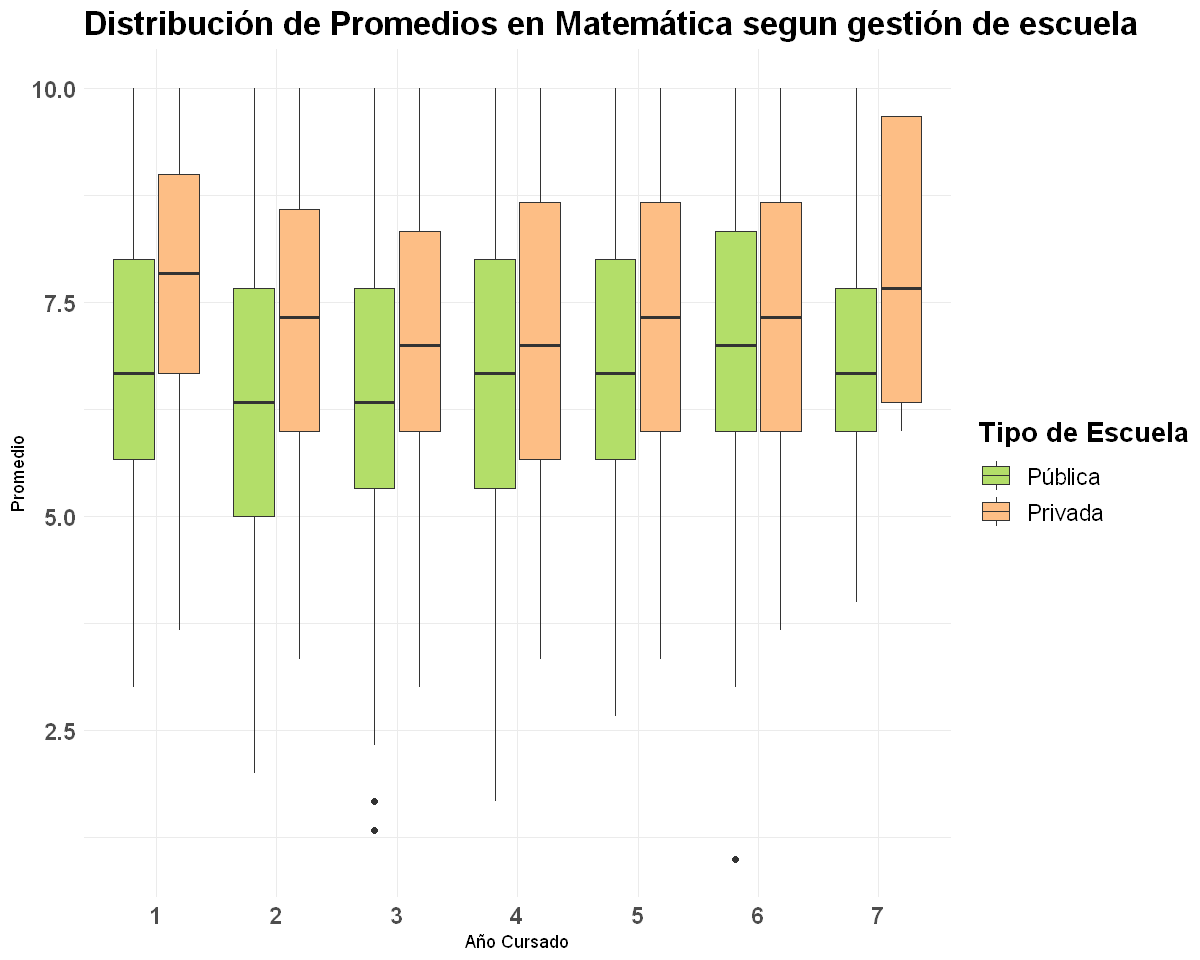

In [199]:


# Filtrar el dataset para que solo incluya los alumnos de la asignatura "MATEMATICA"
SEC_NOTAS_MODIF_FILTRADO <- SEC_NOTAS_MODIF %>%
  filter(asignatura == "MATEMATICA")

# Establecer el tamaño del gráfico
options(repr.plot.width = 10, repr.plot.height = 8)

# Crear el gráfico de caja
ggplot(SEC_NOTAS_MODIF_FILTRADO, aes(x = factor(Año_cursado), y = Promedio, fill = EsPrivada)) +
  geom_boxplot() +
  labs(title = "Distribución de Promedios en Matemática segun gestión de escuela",
       x = "Año Cursado",
       y = "Promedio",
       fill = "Tipo de Escuela") +
  scale_fill_manual(labels = c("N" = "Pública", "S" = "Privada"), 
                    values = c("N" = "#B3DE69", "S" = "#FDBE85")) +  # Colores verde y naranja pastel
  theme_minimal() +
  theme(axis.text.x = element_text(face = "bold", size = 14),  # Agrandar los números del eje x
        axis.text.y = element_text(face = "bold", size = 14),  # Agrandar los números del eje y
        legend.text = element_text(size = 14),                 # Agrandar el texto de la leyenda
        legend.title = element_text(size = 16, face = "bold"), # Agrandar el título de la leyenda
        plot.title = element_text(size = 20, face = "bold"),   # Agrandar el título del gráfico
        legend.key.size = unit(1.5, "lines"))                  # Agrandar la leyenda


`summarise()` has grouped output by 'turno'. You can override using the `.groups` argument.


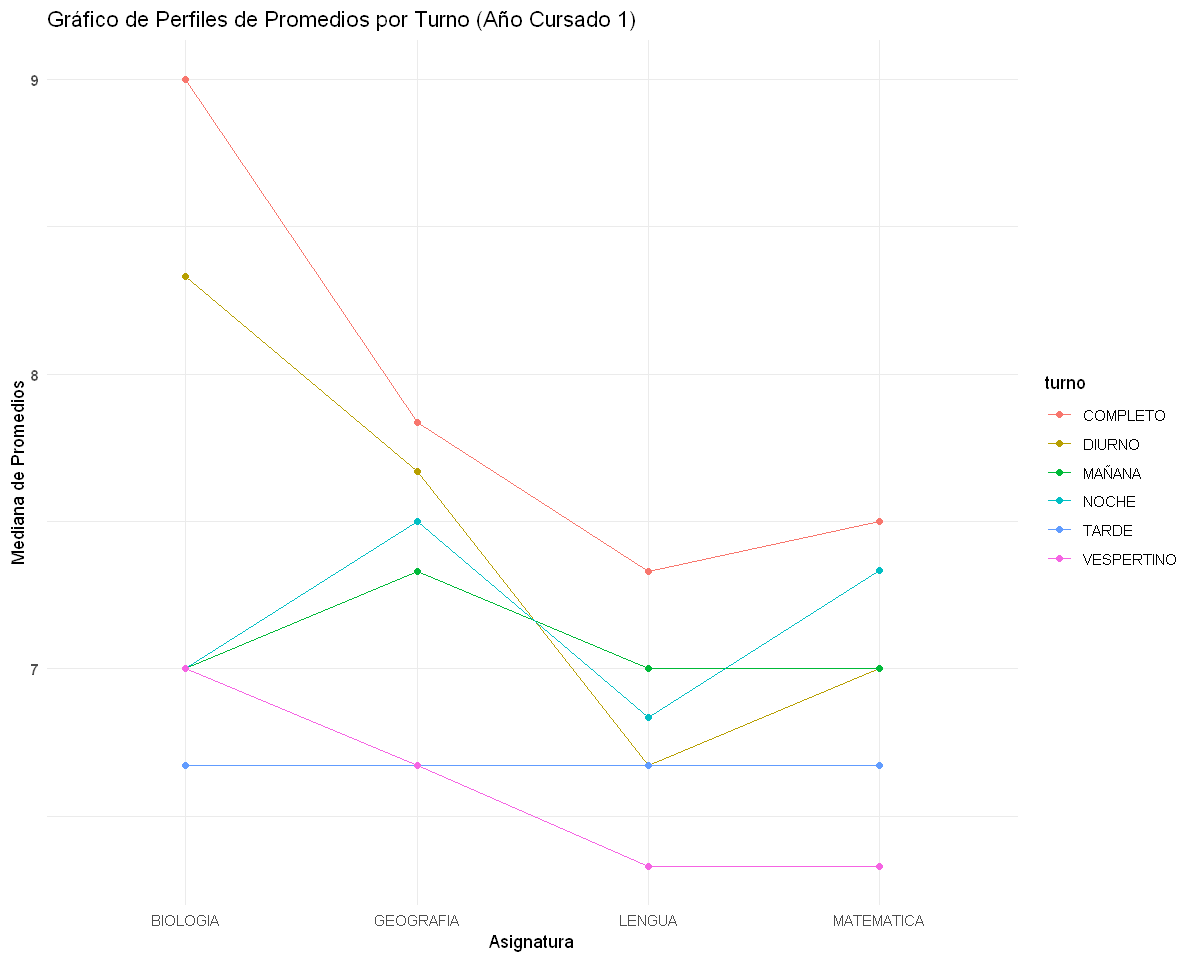

In [200]:
#coordenadas paralelas

# Filtrar SEC_NOTAS_MODIF para tomar solo el año cursado 1 y las asignaturas específicas
asignaturas_interes <- c("MATEMATICA", "LENGUA", "BIOLOGIA", "GEOGRAFIA")
SEC_NOTAS_MODIF_año_1_asignaturas <- filter(SEC_NOTAS_MODIF, Año_cursado == 1 & asignatura %in% asignaturas_interes)


medianas_df <- SEC_NOTAS_MODIF_año_1_asignaturas %>%
  group_by(turno, asignatura) %>%
  summarize(mediana_promedio = median(Promedio, na.rm = TRUE)) %>%
  ungroup()

# Crear el gráfico de perfiles con ajustes de tema y etiquetas
ggplot(medianas_df, aes(x = asignatura, y = mediana_promedio, group = turno, color = turno)) +
  geom_line() +
  geom_point() +
  labs(title = "Gráfico de Perfiles de Promedios por Turno (Año Cursado 1)",
       x = "Asignatura",
       y = "Mediana de Promedios") +
  theme_minimal() +
  theme(axis.text.y = element_text(face = "bold"))

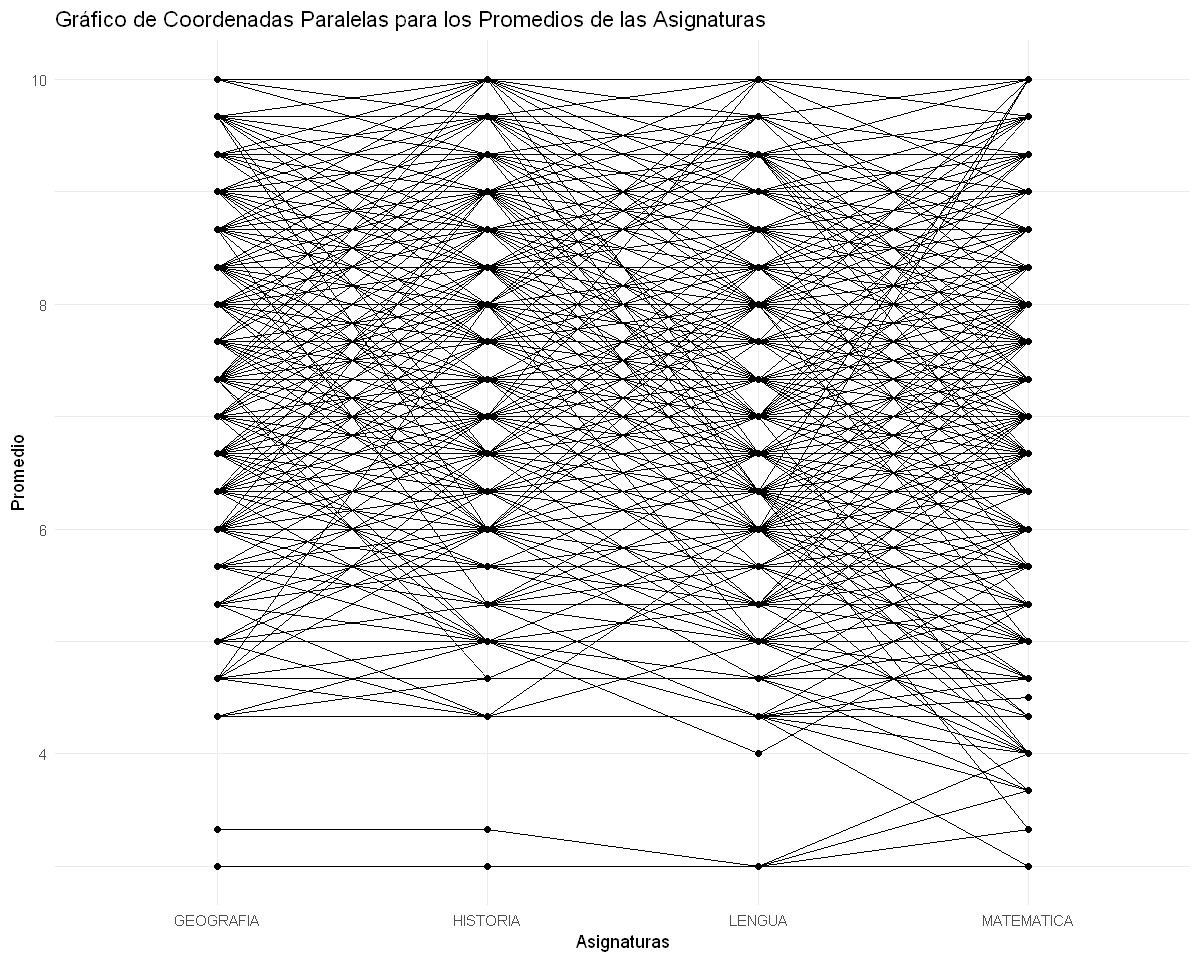

In [201]:


# Crear un gráfico de coordenadas paralelas sin una columna de agrupamiento
ggparcoord(data = promedios_alumnos_manana,
           columns = 2:5,  # columnas 1 a 4 son los promedios de las asignaturas
           showPoints = TRUE,
           scale = "globalminmax") +
  labs(title = "Gráfico de Coordenadas Paralelas para los Promedios de las Asignaturas",
       x = "Asignaturas",
       y = "Promedio") +
  theme_minimal()

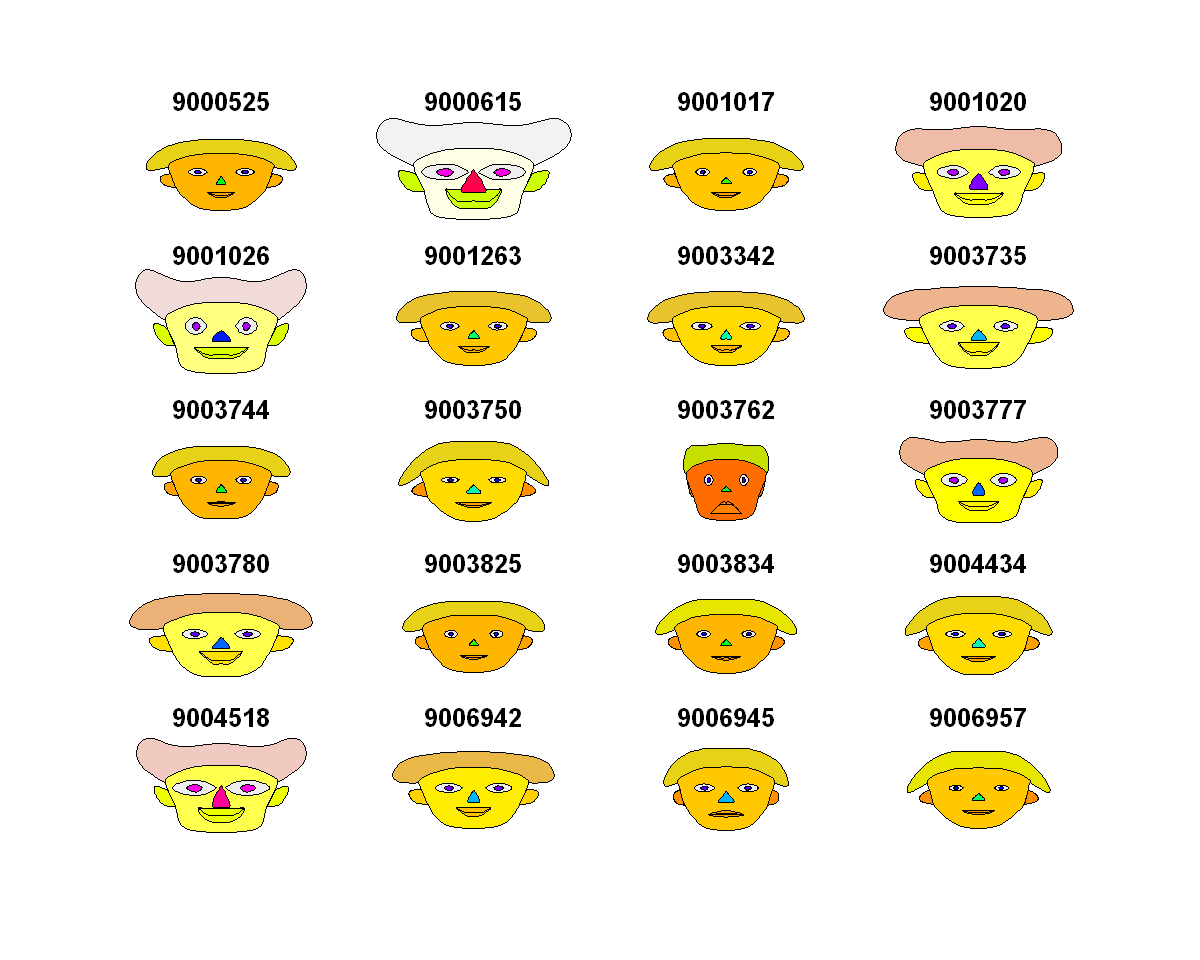

effect of variables:
 modified item       Var         
 "height of face   " "GEOGRAFIA" 
 "width of face    " "HISTORIA"  
 "structure of face" "LENGUA"    
 "height of mouth  " "MATEMATICA"
 "width of mouth   " "GEOGRAFIA" 
 "smiling          " "HISTORIA"  
 "height of eyes   " "LENGUA"    
 "width of eyes    " "MATEMATICA"
 "height of hair   " "GEOGRAFIA" 
 "width of hair   "  "HISTORIA"  
 "style of hair   "  "LENGUA"    
 "height of nose  "  "MATEMATICA"
 "width of nose   "  "GEOGRAFIA" 
 "width of ear    "  "HISTORIA"  
 "height of ear   "  "LENGUA"    


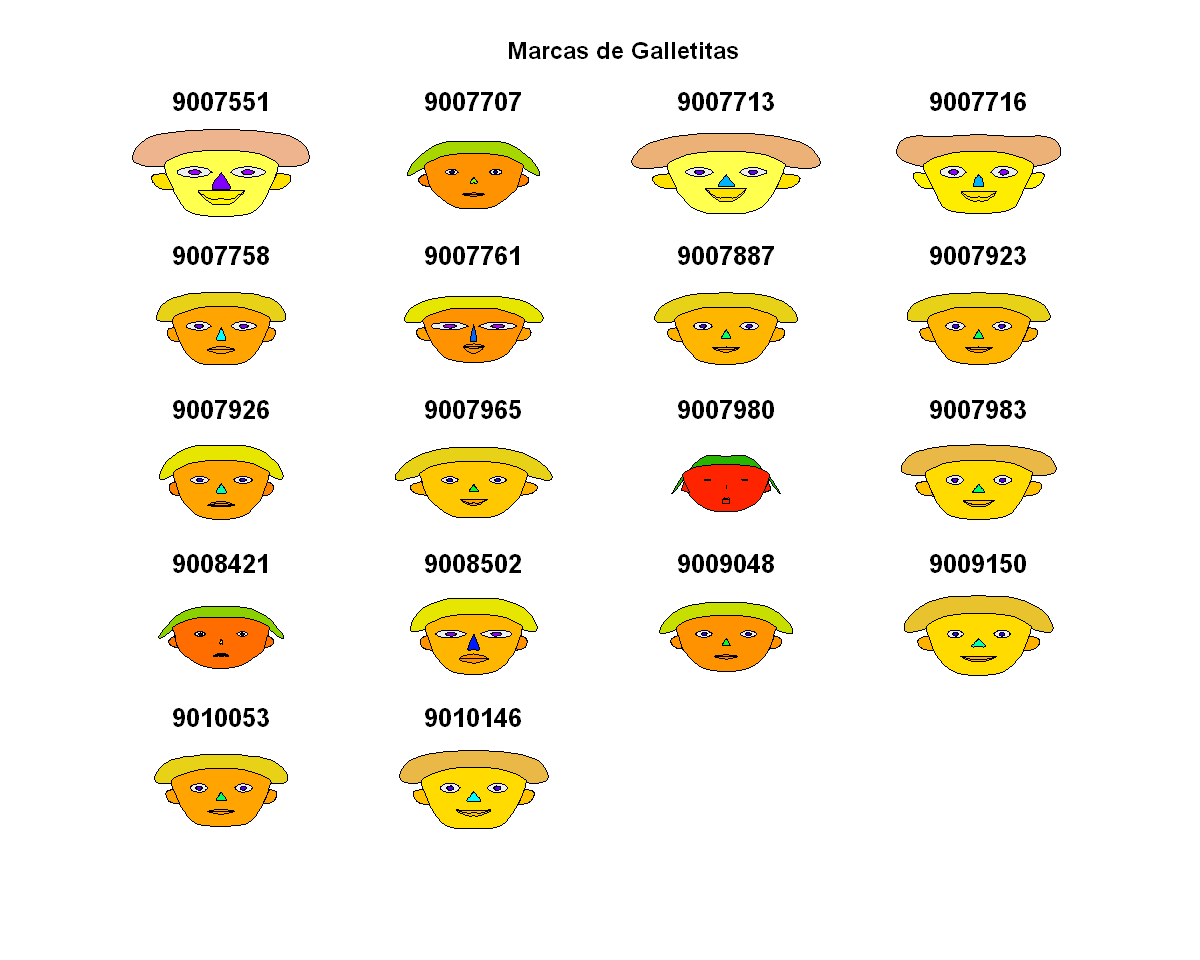

In [202]:
Caras<-faces(promedios_escuelas[,3:6],face.type=1, main ="Marcas de Galletitas", labels=promedios_escuelas$CUE,
    print.info = 1, nrow.plot = 5, ncol.plot = 4, plot.faces = TRUE, cex = 2)